#**Microscopic Droplet Analysis (MIDAS)**

# About this notebook:

This notebook is runs an image analysis workflow to segment and quantify droplets in microscopy images (MIcroscopic Droplet AnalysiS-MIDAS). It is based on the existing segmentation algorithm Cellpose. The notebook segments and then extracts data from the images. It has been specifically adapted to segment droplets with large variations in size within the same image.

A Google account is needed to run this notebook. The user should save a copy in their Google Drive (File>  Save a copy in Drive).

This Google Colab notebook is split into four main sections (0-3):

**0. Notebook set-up**

This section downloads and installs the requirements to run the notebook

**1. Segmentation**

This section segments droplet-like images by adapting the Cellpose algorithm to run with a specified amount of diameter inputs, allowing the user to account for more of the size range if the range is broad.

**2. Extracting droplet data**

This section converts the segmented image into a diverse dataset of droplet descriptors. Including data from all droplets in the image

**3. Additional droplet data**

This section adds two different microstructural analysis:

i. Nearest neighbour. It performs an analysis of droplet packing by measuring the distance of each droplet to its nearest neighibor droplet. The distance can be measured from edge-to-edge, or from centroid-to-centroid.

ii. Curvature/Contour analysis. It analyzes the curvature of each droplet's contour in order to obtain a quantitative parameter of their geometrical shape.


For more information on MIDAS & examples of how to use the generated droplet shape descriptors, please see the publication here *link to publication*

This collab can also be accessed in the github repository *link*

# Guide for running and navigating Google Colab notebooks


Notebooks are split into 'Text' cells & 'Code' cells, text cells are intended to describe and guide the user through sections, whereas code cells run the actual code & calculations. Code cells are run by pressing the 'play' button in the upper left corner. (The cell has to be run again when redefining parameters) Indication of when a cell is finished running after pressing is shown with a green tick mark.

Within code cells, there is green text starting with a #; this is to keep track of what the program is doing, which is used for development.

In order to choose parameters and copy filepaths into the code, this notebook uses Markdown fields. These will look like text fields with an input field next to the code, which will automatically insert into the code cell when changed in the text field for ease of use, however the code has to be run (press play) after typing the values or re-teyping new values.



#**Notebook set-up**
This section downloads and installs the requirements to run the notebook


#Install dependancies
**Always run this cell to initilaize the python libraries used by the notebook!**

In [2]:
!pip install cellpose
!pip install SimpleITK
!pip install tabulate
!pip install google.colab
from IPython.display import Markdown
from google.colab import files

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.2/215.2 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.3 MB/s eta 0:00:00


#Download & import the required .py files & optional modelfile from github repository
The .py files are required to run the notebook. Also, a pre-trained segmentation model for droplets in colloidal matrices is downloaded. The user can later select if they want to use the model or run the cellpose predefined cyto3 model

In [1]:
# Download the .py files directly from github into the Colab file system
!wget https://raw.githubusercontent.com/JensSaalbrink/MIDAS/main/midassegmentation.py -P /content/
!wget https://raw.githubusercontent.com/JensSaalbrink/MIDAS/main/pystatistics.py -P /content/
!wget https://raw.githubusercontent.com/JensSaalbrink/MIDAS/main/food_model_cyto_2_II.zip -P /content/
!unzip /content/food_model_cyto_2_II.zip -d /content/
from midassegmentation import *
from pystatistics import *


--2025-01-06 09:49:58--  https://raw.githubusercontent.com/JensSaalbrink/MIDAS/main/midassegmentation.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7989 (7.8K) [text/plain]
Saving to: ‘/content/midassegmentation.py.4’

midassegmentation.p 100%[===================>]   7.80K  --.-KB/s    in 0s      

2025-01-06 09:49:58 (61.3 MB/s) - ‘/content/midassegmentation.py.4’ saved [7989/7989]

--2025-01-06 09:49:58--  https://raw.githubusercontent.com/JensSaalbrink/MIDAS/main/pystatistics.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Leng

# **Section 1. Segmentation**


This section segments droplet-like images by adapting the Cellpose algorithm to run with a specified amount of diameter inputs, allowing the user to account for more of the size range if the range is broad.

# Run the cell below to link your Google Drive

The images to be segmented can be imported from the user's Google Drive to this notebook. The cell below gives access to the user's Google Drive in order to import the images.
It will be shown as a folder called "Drive" under the 'file icon' in the left column of the notebook.
Note: The image can also be dragged to the files (file icon on the left) without giving access to the user's Google Drive. However, they will be deleted every time this notebook is opened/closed by the user.

In [ ]:
from google.colab import drive
from google.colab import files

drive.mount('/content/drive')

Mounted at /content/drive


# Define the Image Path & Cellpose model file
In the markdown fields below to the right, copy the file path directory of the image to be segmented. The path is found by right-clicking on the image file and clicking "copy path". (File to be found under the file icon on the left of this notebook).

Note: .png image files in 8-bit  or 16- bit are preferable. Other formats can be run as well, although issues seem to arise with .tiff files.

A file path can also be defined in the same way for the segmentation model. Here, the user can select to run the preloaded food_cyto_2 model trained for colloidal matrices or to run cellpose's default model. If the model_file box is left blank or the file path is not found, the notebook will run the cellpose cyto3 model by default.  

In [ ]:
img_file_path = "/content/Mauricio_trial_PA_day6.tif"  # @param {type:"string"}
img_to_seg = np.array(Image.open(img_file_path))

model_file = ""  # @param {type:"string"}

#Choose parameters
In the markdown fields below (to the right), indicate a range of droplet sizes to run the segmentation. The size refers to the diameter in pixels. Therefore, the user should know the diameters of their droplets in pixels; this can be easily obtained by drawing a line on top of the droplets using the 'straight' function in FIJI/ImageJ, for example. Also, indicate the number of segmentation steps (in between the lower end of the range and the higher end of the range) and the flow threshold parameter (standard is 0.4).

Keep in mind that for every run at the different diamaters droplets above and below that diameter are being segmented, too. Therefore, the range does not have to strictly be set up from the smallest droplet to the largest. A good starting point when defining the values is to set up the lower end of the range (smallest input) to the size of the medium-sized droplet (determined visually by the user) and the higher-end of the range (largest input) to the size one of the largest droplet (not the largest). This will vary deping on each image, therefore in the following step, the user will evaulute (visually) the segmentation, and if the segmentation seems innacuarte, then these parameters should be redefined and the segmentation should be run again until it is accurate.

Note: Large variations in droplet size would require more steps

The user can also choose to delete border labels to not count incomplete droplets into the data (for example, their size and shape data would be inaccurate if counted in).

**Run this cell to define the parameters**

In [ ]:
#@markdown ###Droplet size range to detect: (in pixels):
smallest = 60 #@param {type:"number"}
largest = 500 #@param {type:"number"}

#@markdown ###Segmentation steps:
amount_of_steps = 4 #@param {type:"number"}

#@markdown ###Flow threshold:
flowthreshold = 0.4 #@param {type:"number"}

#@markdown ###Color channels to segment (Grayscale is default):
channel_greyscale = True #@param {type:"boolean"}
channel_red = False #@param {type:"boolean"}
channel_green = False #@param {type:"boolean"}
channel_blue = False #@param {type:"boolean"}
channels_to_segment = {'Greyscale': channel_greyscale, 'Red': channel_red, 'Green': channel_green, 'Blue': channel_blue}

#@markdown ###Delete border labels:
delete_border_labels = False #@param {type:"boolean"}

#@markdown ###Optional developer steps (unchecked as default)
view_pre_merged_layers = False #@param {type:"boolean"}
save_pre_merged_layers = False #@param {type:"boolean"}

#Segment Image & Post Process Merging
Run the cell below to initate segmentation, its progression can be tracked in the terminal below the cell.

When done, an overlay of the original image with the segmented droplets on top will be shown. The droplets will appear in randomly assigned colors. The user should ensure that the segmentation is done properly (visually). Depending on the image, it is likely that readjustment of the paraments in the cell above is needed in order to acquire an accurate segmentation of all the droplets seen in the image. If so, then re-adjust the parameters above, re-define them (by pressing 'play' in the cell above) and run the segmentation again (cell below)

Running cellpose (1/4)
Running cellpose (2/4)
Running cellpose (3/4)
Running cellpose (4/4)
Segmentation done

Closing operation...


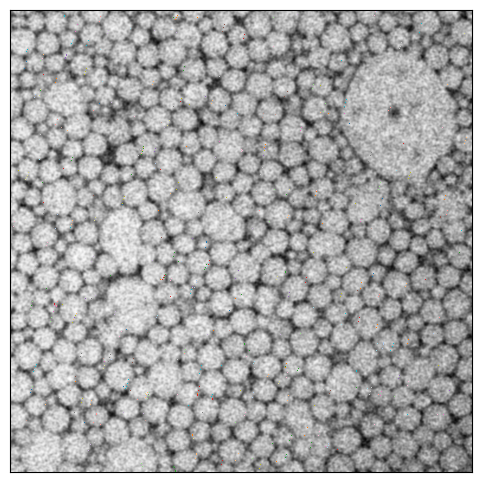

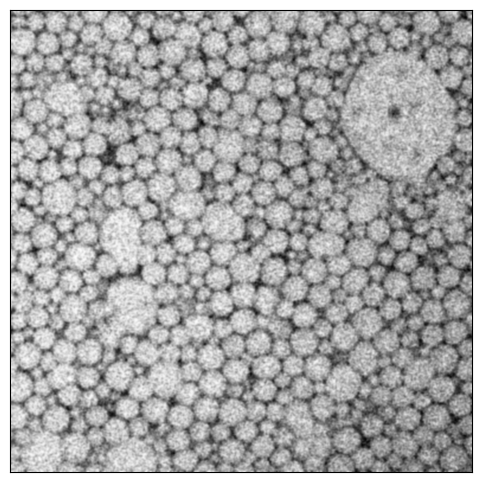

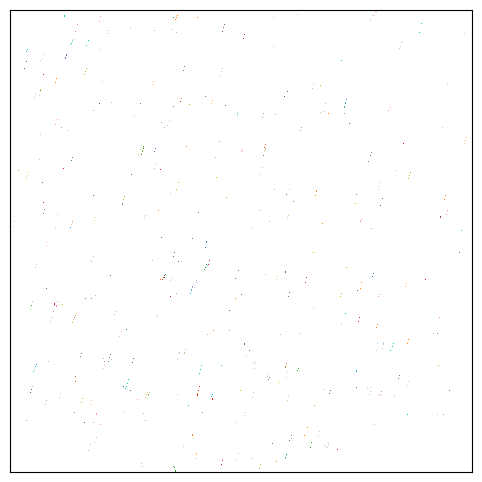

In [ ]:
try:
    model = models.CellposeModel(pretrained_model=model_file, gpu=True)
    # model = models.CellposeModel(model_type="cyto3", gpu=True) for cyto3 or 2.
except:
    print("Failed to load pretrained model, please verify that the provided path is correct")
    print("Using default cyto3 model instead")
    model = models.Cellpose(model_type='cyto3', gpu=True)

local_img = img_to_seg  # this is unnecessary, but just kept here for further check

layers = []
count = 1
total_steps = amount_of_steps
even_dist_nums = list(np.linspace(smallest, largest, total_steps, dtype=int))
for i in even_dist_nums:
    print(f"Running cellpose ({count}/{total_steps})", flush=True)
    count += 1
    if channels_to_segment['Greyscale']:
        output = model.eval(local_img, diameter=i, channels=[0, 0], flow_threshold=flowthreshold)
        layers.append(output[0])
    if channels_to_segment['Red']:
        output = model.eval(local_img, diameter=i, channels=[1, 0], flow_threshold=flowthreshold)
        layers.append(output[0])
    if channels_to_segment['Green']:
        output = model.eval(local_img, diameter=i, channels=[2, 0], flow_threshold=flowthreshold)
        layers.append(output[0])
    if channels_to_segment['Blue']:
        output = model.eval(local_img, diameter=i, channels=[3, 0], flow_threshold=flowthreshold)
        layers.append(output[0])

print("Segmentation done\n", flush=True)

# to numpy array for fast process
if view_pre_merged_layers:
    plottings_structures(np.sum(layers, axis=0))
    plt.title('combined_raw')  # will plot all raw unmerged segmentation steps on top of each other for visual inspection.
    plt.show()
if save_pre_merged_layers:
    np.save('layers_before_combine.npy', layers)  # will save all raw unmerged segmentation steps instead
    layers = np.load('layers_before_combine.npy')

# Post processing steps

combined_layer_full = merge_labels(layers)
#plottings_structures(combined_layer_full)

# Closing operation
print("Closing operation...")
combined_layer_full = closing(combined_layer_full)

# Delete border
if delete_border_labels:
    print("Deleting border labels...")
    combined_layer_full = clear_border(combined_layer_full)

    # Further post processing step to ensure no connected artifact labels
    min_size = smallest * 0.1  # 25?
    combined_layer_full = skimage.morphology.remove_small_objects(combined_layer_full, min_size=min_size,
                                                                  connectivity=1)
    combined_layer_full = ccd_largest_part(combined_layer_full, keep_continuous=True)

   # plottings_structures(combined_layer_full)
   # plt.show()
#PRELIMINARY
# Randomize the values in combined_layer_full except the first one
#first_value = combined_layer_full[0, 0]  # Get the first value
first_value = 0  # Get the first value
unique_labels = np.unique(combined_layer_full)
unique_labels = unique_labels[unique_labels != first_value]  # Exclude background value
for label in unique_labels:
    indices_to_randomize = np.where(combined_layer_full == label)
    new_value = np.random.randint(1, 65535)
    combined_layer_full[indices_to_randomize] = new_value

# Plotting
num_labels = len(np.unique(combined_layer_full))
colors = plt.cm.tab20(np.linspace(0, 1, num_labels))  # Using Viridis colormap for better color differentiation

# Create a colormap from the colors
cmap = ListedColormap(colors)

# Set the background color (label 0) to be transparent
colors_rgba = colors.copy()
colors_rgba[0, 3] = 0  # Set alpha channel of the background color to 0 (transparent)

# Create a colormap with transparent background
cmap_with_transparent_bg = ListedColormap(colors_rgba)

# Plot the image
plt.figure(figsize=(8, 6))
plt.imshow(local_img, cmap='gray')

# Plot the overlay with different colors for each label and transparent background
plt.imshow(combined_layer_full, cmap=cmap_with_transparent_bg, alpha=1,interpolation='nearest')
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(local_img, cmap='gray')
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()


plt.figure(figsize=(8, 6))
plt.imshow(combined_layer_full, cmap=cmap_with_transparent_bg, alpha=1,interpolation='nearest')
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()


# Optional: Download the segmented image as a .tiff


A copy of the segmented image can be downloaded by ticking the box to the right (before running the code in the cell)

In [ ]:
np.save('combined_layer_full.npy', combined_layer_full)

Download_as_tiff = True #@param {type:"boolean"}
if Download_as_tiff:
  from tifffile import imsave
  imsave('combined_layer_full.tiff', combined_layer_full)
  files.download('combined_layer_full.tiff')


NameError: name 'np' is not defined

# **Section 2. Extracting droplet data**

This section converts the segmented image into a diverse dataset of droplet descriptors. Including data from all droplets in the image

#Optional: Upload previously segmented images

If the notebook has been followed from the beginning ignore this step.

The cell below allows to upload an already segmented image (for example an image that has not been segmented through this notebook, or that has been segmented before and saved)


In the cell below define the file path for the pre-segmented image to be uploaded, ideally a .tiff where each droplet has a unique ROI label. Remember to run the cell to define the path

In [ ]:
load_seg_from_tiff = True
load_seg_from_numpy = False

if load_seg_from_tiff:
    #presegmented_img_file_path = "/content/drive/MyDrive/10juni/curvetest-1.tif"
    #combined_layer_full = np.array(Image.open(presegmented_img_file_path))
    img_file_path = "/content/combined_layer_full.npy"  # @param {type:"string"}
    img_to_seg = np.array(Image.open(img_file_path))
    combined_layer_full=(np.array(Image.open(img_file_path)))

# Load images
if load_seg_from_numpy:
    combined_layer_full = np.load('combined_layer_full.npy')


#Generation of dataset (Label statistics)

The cell below will extract a large dataset for all droplets in the image, including many size and shape descriptors. It wil automatically download the generated dataset as a .csv file. It will also generate a table for preinspection in the terminal below the cell.

The scale can be defined in the box to the right. By setting the scale in terms of number of pixels per unit of length. (For example, in an image with a scale of 25 pixels = 1 micrometer, the input number should be 25. Then, the data in the table will be given in micrometers).

As a default, it is set to 1.0; in this case, the data related to length and area are given in a number of pixels and can always be converted to units of length later by the user.

Note: the unit of length for the scale does not have to be micrometeres. It can be any unit of lenght. The code will divide the number of pixels by the number in the box. Then the user should know to what unit of length corresponds to the set scale.

The user can tick boxes with the type of data needed.

In [ ]:
#@markdown ###Label scale:
lstat_scale = 1.0 #@param {type:"number"}

#@markdown ###Label size:
lstat_size = True #@param {type:"boolean"}

lstat_intensity = False

#@markdown ###Label perimeter:
lstat_perimeter = True #@param {type:"boolean"}

#@markdown ###Label shape:
lstat_shape = True #@param {type:"boolean"}

#@markdown ###Label position:
lstat_position = True #@param {type:"boolean"}

#@markdown ###Label moments:
lstat_moments = True #@param {type:"boolean"}

pd.set_option('display.max_columns', None)

table = label_statistics(rgb2grey(img_to_seg), combined_layer_full, size=lstat_size, intensity=lstat_intensity, perimeter=lstat_perimeter, shape=lstat_shape, position=lstat_position, moments=lstat_moments, lstat_scale=lstat_scale)
# Save table to csv (Download promt)
table.to_csv('label_statistics.csv')
files.download('label_statistics.csv')
markdown_table = table.to_markdown()
display(Markdown(markdown_table))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

|      |   label |   bbox_0 |   bbox_1 |   bbox_2 |   bbox_3 |   centroid_0 |   centroid_1 |   elongation |   feret_diameter [μm] |   flatness |   roundness |   equivalent_ellipsoid_diameter_0 [μm] |   equivalent_ellipsoid_diameter_1 [μm] |   equivalent_spherical_perimeter [μm] |   equivalent_spherical_radius [μm] |   number_of_pixels |   number_of_pixels_on_border |   perimeter [μm] |   perimeter_on_border [μm] |   perimeter_on_border_ratio |   principal_axes0 |   principal_axes1 |   principal_axes2 |   principal_axes3 |   principal_moments0 |   principal_moments1 |
|-----:|--------:|---------:|---------:|---------:|---------:|-------------:|-------------:|-------------:|----------------------:|-----------:|------------:|---------------------------------------:|---------------------------------------:|--------------------------------------:|-----------------------------------:|-------------------:|-----------------------------:|-----------------:|---------------------------:|----------------------------:|------------------:|------------------:|------------------:|------------------:|---------------------:|---------------------:|
|    0 |     138 |     1606 |     1611 |       77 |       79 |   1643.85    |   1651.11    |      1.04063 |               80.1311 |    1.04063 |    0.98109  |                               76.0016  |                                79.0899 |                              243.569  |                           38.7652  |               4721 |                            0 |         248.264  |                          0 |                   0         |       0.880829    |        0.473435   |       -0.473435   |       0.880829    |            362.494   |        392.552       |
|    1 |     386 |     1155 |     1052 |       34 |       36 |   1171.12    |   1070.23    |      1.05647 |               35.0571 |    1.05647 |    0.994416 |                               33.0073  |                                34.8713 |                              106.583  |                           16.9633  |                904 |                            0 |         107.182  |                          0 |                   0         |       0.741686    |       -0.670747   |        0.670747   |       0.741686    |             68.2715  |         76.2002      |
|    2 |     522 |     1769 |     2543 |       13 |       17 |   1775.13    |   2551.18    |      1.23756 |               16.1245 |    1.23756 |    0.960308 |                               13.3412  |                                16.5105 |                               46.626  |                            7.42076 |                173 |                            0 |          48.5532 |                          0 |                   0         |       0.999729    |       -0.0232659  |        0.0232659  |       0.999729    |             11.1641  |         17.0983      |
|    3 |     944 |     1780 |      304 |       45 |       45 |   1801.14    |    326.728   |      1.11704 |               45.31   |    1.11704 |    0.967802 |                               40.5137  |                                45.2555 |                              134.52   |                           21.4095  |               1440 |                            0 |         138.995  |                          0 |                   0         |       0.913097    |        0.407742   |       -0.407742   |       0.913097    |            102.882   |        128.374       |
|    4 |    1171 |      599 |      198 |       25 |       19 |    610.553   |    206.745   |      1.41554 |               24.1868 |    1.41554 |    0.952995 |                               17.3067  |                                24.4985 |                               64.6885 |                           10.2955  |                333 |                            0 |          67.8791 |                          0 |                   0         |      -0.149267    |       -0.988797   |        0.988797   |      -0.149267    |             18.7909  |         37.6525      |
|    5 |    1182 |     1354 |     2561 |       17 |       15 |   1361.94    |   2568.22    |      1.09293 |               16.6433 |    1.09293 |    0.991901 |                               15.6412  |                                17.0947 |                               51.3706 |                            8.17588 |                210 |                           11 |          51.79   |                         11 |                   0.212396  |      -0.327953    |       -0.944694   |        0.944694   |      -0.327953    |             15.3386  |         18.3218      |
|    6 |    1185 |     1145 |     1122 |       32 |       44 |   1160.94    |   1143.86    |      1.36548 |               43.2897 |    1.36548 |    0.975315 |                               31.6457  |                                43.2116 |                              116.173  |                           18.4896  |               1074 |                            0 |         119.114  |                          0 |                   0         |       0.996041    |       -0.088897   |        0.088897   |       0.996041    |             62.7605  |        117.02        |
|    7 |    1205 |     1212 |     1303 |       49 |       48 |   1236.86    |   1327.1     |      1.01551 |               48.8262 |    1.01551 |    0.970902 |                               47.1086  |                                47.8391 |                              149.139  |                           23.7362  |               1770 |                            0 |         153.609  |                          0 |                   0         |       0.947811    |        0.318834   |       -0.318834   |       0.947811    |            138.856   |        143.196       |
|    8 |    1206 |     1025 |      176 |       60 |       60 |   1054.32    |    205.536   |      1.0379  |               61.6117 |    1.0379  |    0.967224 |                               58.0613  |                                60.2615 |                              185.829  |                           29.5756  |               2748 |                            0 |         192.126  |                          0 |                   0         |      -0.0188192   |       -0.999823   |        0.999823   |      -0.0188192   |            211.101   |        227.404       |
|    9 |    1242 |      558 |     1314 |       92 |       93 |    602.669   |   1359.7     |      1.03992 |               93.9415 |    1.03992 |    0.957777 |                               88.6795  |                                92.22   |                              284.102  |                           45.2162  |               6423 |                            0 |         296.626  |                          0 |                   0         |       0.754834    |        0.655915   |       -0.655915   |       0.754834    |            493.13    |        533.292       |
|   10 |    1290 |      682 |     1828 |       72 |       71 |    717.819   |   1863.44    |      1.07943 |               73.0616 |    1.07943 |    0.987594 |                               67.7294  |                                73.109  |                              221.067  |                           35.1839  |               3889 |                            0 |         223.844  |                          0 |                   0         |      -0.628299    |       -0.777972   |        0.777972   |      -0.628299    |            286.981   |        334.38        |
|   11 |    1305 |       82 |      568 |       93 |       90 |    129.672   |    610.95    |      1.02835 |               98.2344 |    1.02835 |    0.928803 |                               89.958   |                                92.5087 |                              286.59   |                           45.6122  |               6536 |                            0 |         308.558  |                          0 |                   0         |      -0.12965     |       -0.99156    |        0.99156    |      -0.12965     |            510.585   |        539.95        |
|   12 |    1415 |      357 |      696 |       36 |       34 |    373.956   |    712.954   |      1.068   |               35.3553 |    1.068   |    0.965014 |                               33.0819  |                                35.3316 |                              107.405  |                           17.0941  |                918 |                            0 |         111.299  |                          0 |                   0         |      -0.373673    |       -0.92756    |        0.92756    |      -0.373673    |             68.8058  |         78.4821      |
|   13 |    1497 |     2384 |     1466 |       40 |       39 |   2403.31    |   1485.1     |      1.06953 |               40.4969 |    1.06953 |    0.974191 |                               37.5593  |                                40.1708 |                              122.029  |                           19.4216  |               1185 |                            0 |         125.262  |                          0 |                   0         |       0.871934    |       -0.489623   |        0.489623   |       0.871934    |             88.2664  |        100.967       |
|   14 |    1801 |      751 |      158 |       43 |       43 |    772.362   |    178.92    |      1.01358 |               43.0813 |    1.01358 |    0.994524 |                               42.3684  |                                42.9438 |                              134.005  |                           21.3276  |               1429 |                            0 |         134.743  |                          0 |                   0         |       0.81037     |        0.585918   |       -0.585918   |       0.81037     |            112.231   |        115.301       |
|   15 |    1853 |      885 |     2396 |       68 |       66 |    918.528   |   2429.12    |      1.05421 |               68.4471 |    1.05421 |    0.968778 |                               64.4102  |                                67.9019 |                              207.763  |                           33.0665  |               3435 |                            0 |         214.459  |                          0 |                   0         |       0.513328    |       -0.858192   |        0.858192   |       0.513328    |            259.49    |        288.387       |
|   16 |    2118 |     2552 |      380 |       24 |       98 |   2565.83    |    428.67    |      3.71563 |               97      |    3.71563 |    0.699571 |                               23.9005  |                                88.8053 |                              144.735  |                           23.0352  |               1667 |                           96 |         206.891  |                         96 |                   0.464013  |       1           |        0.00054247 |       -0.00054247 |       1           |             38.8919  |        536.937       |
|   17 |    2186 |     2413 |      548 |       73 |       72 |   2448.73    |    583.3     |      1.03203 |               73.1642 |    1.03203 |    0.998792 |                               71.0954  |                                73.3727 |                              226.902  |                           36.1125  |               4097 |                            0 |         227.176  |                          0 |                   0         |       0.504999    |       -0.86312    |        0.86312    |       0.504999    |            315.979   |        336.546       |
|   18 |    2193 |     1374 |      270 |       29 |       27 |   1387.92    |    283.091   |      1.09551 |               29.4109 |    1.09551 |    0.999318 |                               27.0379  |                                29.6202 |                               88.9058 |                           14.1498  |                629 |                            0 |          88.9665 |                          0 |                   0         |      -0.148222    |       -0.988954   |        0.988954   |      -0.148222    |             45.7192  |         54.8693      |
|   19 |    2430 |     1066 |     2004 |       84 |       83 |   1107.87    |   2045.09    |      1.02624 |               85      |    1.02624 |    0.984968 |                               82.2297  |                                84.3875 |                              261.7    |                           41.6508  |               5450 |                            0 |         265.693  |                          0 |                   0         |      -0.294203    |       -0.955743   |        0.955743   |      -0.294203    |            422.794   |        445.275       |
|   20 |    2460 |     2176 |        0 |       51 |       35 |   2200.9     |     14.8746  |      1.44129 |               51.4198 |    1.44129 |    0.957869 |                               36.1951  |                                52.1676 |                              136.513  |                           21.7268  |               1483 |                           46 |         142.518  |                         46 |                   0.322766  |       0.0206997   |       -0.999786   |        0.999786   |       0.0206997   |             84.4631  |        175.456       |
|   21 |    2481 |      785 |      578 |       70 |       67 |    819.069   |    611.648   |      1.03449 |               70.4344 |    1.03449 |    0.984993 |                               67.7921  |                                70.1302 |                              216.617  |                           34.4756  |               3734 |                            0 |         219.917  |                          0 |                   0         |      -0.102398    |       -0.994743   |        0.994743   |      -0.102398    |            287.736   |        307.926       |
|   22 |    2509 |      710 |      917 |       85 |       87 |    751.561   |    960.421   |      1.0377  |               86.977  |    1.0377  |    0.957072 |                               81.7667  |                                84.8497 |                              261.676  |                           41.647   |               5449 |                            0 |         273.413  |                          0 |                   0         |       0.958756    |       -0.284229   |        0.284229   |       0.958756    |            419.345   |        451.564       |
|   23 |    2608 |     2416 |      994 |       28 |       29 |   2429.53    |   1007.81    |      1.04206 |               28.7924 |    1.04206 |    0.983548 |                               27.2559  |                                28.4023 |                               87.4091 |                           13.9116  |                608 |                            0 |          88.8712 |                          0 |                   0         |      -0.256201    |       -0.966623   |        0.966623   |      -0.256201    |             46.4975  |         50.4914      |
|   24 |    2709 |     1684 |     1487 |       92 |       90 |   1728.27    |   1531.52    |      1.10597 |               93.1504 |    1.10597 |    0.93289  |                               83.1942  |                                92.0103 |                              274.862  |                           43.7456  |               6012 |                            0 |         294.635  |                          0 |                   0         |      -0.479918    |       -0.877313   |        0.877313   |      -0.479918    |            439.794   |        537.943       |
|   25 |    2755 |      607 |      750 |       85 |       83 |    648.592   |    791.648   |      1.06317 |               84.3445 |    1.06317 |    0.953603 |                               78.4193  |                                83.3734 |                              254.024  |                           40.4292  |               5135 |                            0 |         266.384  |                          0 |                   0         |      -0.60726     |       -0.794503   |        0.794503   |      -0.60726     |            385.602   |        435.861       |
|   26 |    2819 |     1503 |      848 |       20 |       20 |   1511.95    |    857.765   |      1.09485 |               20.2485 |    1.09485 |    0.985409 |                               18.7405  |                                20.5181 |                               61.6039 |                            9.80457 |                302 |                            0 |          62.5161 |                          0 |                   0         |       0.794934    |       -0.606697   |        0.606697   |       0.794934    |             22.0531  |         26.4351      |
|   27 |    2851 |     2365 |     1593 |       78 |       81 |   2403.47    |   1632.83    |      1.06074 |               81.2158 |    1.06074 |    0.98555  |                               76.6759  |                                81.3336 |                              248.093  |                           39.4852  |               4898 |                            0 |         251.731  |                          0 |                   0         |       0.891312    |        0.45339    |       -0.45339    |       0.891312    |            367.955   |        414.015       |
|   28 |    2928 |      985 |      746 |       32 |       31 |   1000.23    |    760.68    |      1.04803 |               31.5753 |    1.04803 |    0.972624 |                               29.1411  |                                30.5409 |                               93.7224 |                           14.9164  |                699 |                            0 |          96.3604 |                          0 |                   0         |       0.611447    |       -0.791286   |        0.791286   |       0.611447    |             53.2493  |         58.4877      |
|   29 |    2954 |     2228 |      568 |       41 |       41 |   2247.94    |    587.668   |      1.00447 |               40.8044 |    1.00447 |    0.998239 |                               40.8426  |                                41.0253 |                              128.598  |                           20.4669  |               1316 |                            0 |         128.824  |                          0 |                   0         |      -0.235469    |       -0.971882   |        0.971882   |      -0.235469    |            104.264   |        105.199       |
|   30 |    2985 |     1265 |      608 |       95 |       98 |   1312.07    |    656.606   |      1.03591 |               98.0051 |    1.03591 |    0.987295 |                               94.2744  |                                97.6596 |                              301.442  |                           47.976   |               7231 |                            0 |         305.321  |                          0 |                   0         |       0.985749    |       -0.16822    |        0.16822    |       0.985749    |            555.719   |        596.345       |
|   31 |    3099 |     2117 |      838 |       85 |       84 |   2158.81    |    880.075   |      1.01956 |               89.6939 |    1.01956 |    0.989041 |                               84.643   |                                86.2987 |                              268.502  |                           42.7334  |               5737 |                            0 |         271.477  |                          0 |                   0         |      -0.593347    |       -0.804947   |        0.804947   |      -0.593347    |            448.579   |        466.3         |
|   32 |    3193 |     1713 |      818 |       43 |       37 |   1733.09    |    836.952   |      1.83048 |               48.8262 |    1.83048 |    0.927117 |                               26.909   |                                49.2565 |                              114.375  |                           18.2033  |               1041 |                            0 |         123.366  |                          0 |                   0         |       0.574367    |       -0.818598   |        0.818598   |       0.574367    |             45.546   |        152.61        |
|   33 |    3194 |      545 |      444 |       57 |       54 |    573.415   |    471.204   |      1.33737 |               61.7171 |    1.33737 |    0.980375 |                               46.7537  |                                62.5268 |                              169.86   |                           27.034   |               2296 |                            0 |         173.26   |                          0 |                   0         |      -0.62704     |       -0.778987   |        0.778987   |      -0.62704     |            136.796   |        244.666       |
|   34 |    3197 |     1301 |     2205 |       51 |       49 |   1325.88    |   2228.96    |      1.03506 |               51.3128 |    1.03506 |    0.980462 |                               49.2772  |                                51.0048 |                              157.499  |                           25.0668  |               1974 |                            0 |         160.638  |                          0 |                   0         |      -0.201229    |       -0.979544   |        0.979544   |      -0.201229    |            151.901   |        162.739       |
|   35 |    3218 |      812 |     1764 |       68 |       67 |    846.077   |   1797.1     |      1.02376 |               67.2681 |    1.02376 |    0.982365 |                               65.8635  |                                67.4282 |                              209.36   |                           33.3206  |               3488 |                            0 |         213.118  |                          0 |                   0         |       0.637392    |       -0.77054    |        0.77054    |       0.637392    |            271.301   |        284.344       |
|   36 |    3225 |     1373 |     1979 |       24 |       23 |   1384.91    |   1989.88    |      1.00548 |               23.7697 |    1.00548 |    0.996851 |                               23.6313  |                                23.7608 |                               74.4431 |                           11.848   |                441 |                            0 |          74.6782 |                          0 |                   0         |       0.785295    |       -0.619122   |        0.619122   |       0.785295    |             34.924   |         35.3078      |
|   37 |    3246 |        0 |     2191 |       58 |       68 |     27.2384  |   2224       |      1.14399 |               68.4105 |    1.14399 |    0.974383 |                               60.3001  |                                68.9829 |                              202.619  |                           32.2478  |               3267 |                           44 |         207.946  |                         44 |                   0.211594  |       0.98759     |       -0.157053   |        0.157053   |       0.98759     |            228.458   |        298.987       |
|   38 |    3247 |     2434 |      851 |       83 |       85 |   2474.7     |    892.579   |      1.02811 |               84.7172 |    1.02811 |    0.961511 |                               81.5801  |                                83.8732 |                              259.869  |                           41.3594  |               5374 |                            0 |         270.271  |                          0 |                   0         |       0.996942    |       -0.0781397  |        0.0781397  |       0.996942    |            416.819   |        440.581       |
|   39 |    3288 |     1369 |        5 |       30 |       30 |   1383.73    |     19.5345  |      1.01225 |               31.1448 |    1.01225 |    0.976674 |                               29.9051  |                                30.2715 |                               94.5235 |                           15.0439  |                711 |                            0 |          96.781  |                          0 |                   0         |      -0.233985    |       -0.97224    |        0.97224    |      -0.233985    |             56.0101  |         57.3907      |
|   40 |    3304 |     1969 |      822 |       26 |       25 |   1981.72    |    834.5     |      1.07903 |               26      |    1.07903 |    0.979126 |                               23.8485  |                                25.7333 |                               77.8267 |                           12.3865  |                482 |                            0 |          79.4859 |                          0 |                   0         |       0.734338    |       -0.678784   |        0.678784   |       0.734338    |             35.6665  |         41.5269      |
|   41 |    3348 |     2367 |     1010 |       70 |       68 |   2401.01    |   1043.74    |      1.01543 |               69.3542 |    1.01543 |    0.99315  |                               67.2797  |                                68.3177 |                              212.99   |                           33.8984  |               3610 |                            0 |         214.459  |                          0 |                   0         |      -0.136929    |       -0.990581   |        0.990581   |      -0.136929    |            283.149   |        291.953       |
|   42 |    3365 |     1933 |      313 |       30 |       29 |   1947.61    |    327.034   |      1.01739 |               29.0689 |    1.01739 |    0.99264  |                               28.4333  |                                28.9278 |                               90.0993 |                           14.3397  |                646 |                            0 |          90.7673 |                          0 |                   0         |      -0.308289    |       -0.951293   |        0.951293   |      -0.308289    |             50.5979  |         52.3733      |
|   43 |    3705 |      937 |     2262 |       84 |       79 |    978.422   |   2301.2     |      1.11044 |               85.5862 |    1.11044 |    0.948274 |                               75.1241  |                                83.4204 |                              248.7    |                           39.5818  |               4922 |                            0 |         262.266  |                          0 |                   0         |      -0.405031    |       -0.914303   |        0.914303   |      -0.405031    |            353.466   |        435.847       |
|   44 |    3786 |      742 |     1186 |      120 |      123 |    800.945   |   1247.35    |      1.10757 |              127.318  |    1.10757 |    0.968828 |                              112.569   |                               124.678  |                              372.182  |                           59.2345  |              11023 |                            0 |         384.157  |                          0 |                   0         |       0.775771    |       -0.631014   |        0.631014   |       0.775771    |            795.901   |        976.334       |
|   45 |    3889 |      794 |      940 |       36 |       36 |    811.41    |    957.886   |      1.09671 |               36.2491 |    1.09671 |    0.96522  |                               32.788   |                                35.9589 |                              107.872  |                           17.1684  |                926 |                            0 |         111.759  |                          0 |                   0         |      -0.497003    |       -0.867749   |        0.867749   |      -0.497003    |             67.4941  |         81.1797      |
|   46 |    3906 |     1879 |     1112 |       69 |       66 |   1912.87    |   1144.57    |      1.05003 |               69.2892 |    1.05003 |    0.997459 |                               66.2352  |                                69.5488 |                              213.226  |                           33.9359  |               3618 |                            0 |         213.769  |                          0 |                   0         |       0.0525446   |       -0.998619   |        0.998619   |       0.0525446   |            274.665   |        302.835       |
|   47 |    3990 |     1617 |     1432 |       35 |       36 |   1633.77    |   1449.59    |      1.03314 |               36.1248 |    1.03314 |    0.992743 |                               34.9472  |                                36.1053 |                              111.594  |                           17.7608  |                991 |                            0 |         112.41   |                          0 |                   0         |       0.853995    |       -0.520281   |        0.520281   |       0.853995    |             76.4428  |         81.5933      |
|   48 |    4085 |      956 |      211 |       83 |       84 |    996.474   |    252.536   |      1.02887 |               84.386  |    1.02887 |    0.98846  |                               81.9285  |                                84.2936 |                              261.075  |                           41.5513  |               5424 |                            0 |         264.123  |                          0 |                   0         |       0.936229    |       -0.35139    |        0.35139    |       0.936229    |            419.828   |        444.416       |
|   49 |    4108 |      434 |     1093 |       46 |       45 |    456.911   |   1114.86    |      1.03641 |               47.8853 |    1.03641 |    0.959158 |                               44.6253  |                                46.25   |                              142.724  |                           22.7152  |               1621 |                            0 |         148.801  |                          0 |                   0         |       0.368577    |       -0.929597   |        0.929597   |       0.368577    |            124.7     |        133.946       |
|   50 |    4165 |     1753 |     1666 |      114 |      112 |   1808.47    |   1722.8     |      1.11135 |              117.337  |    1.11135 |    0.966718 |                              104.183   |                               115.784  |                              345.042  |                           54.9151  |               9474 |                            0 |         356.921  |                          0 |                   0         |       0.675876    |       -0.737015   |        0.737015   |       0.675876    |            681.212   |        841.367       |
|   51 |    4183 |     1160 |      681 |       49 |       50 |   1184.5     |    705.643   |      1.02783 |               50.2494 |    1.02783 |    0.998685 |                               48.9339  |                                50.2958 |                              155.855  |                           24.8051  |               1933 |                            0 |         156.06   |                          0 |                   0         |       0.951182    |        0.308631   |       -0.308631   |       0.951182    |            149.769   |        158.221       |
|   52 |    4211 |      233 |     2506 |       49 |       56 |    257.079   |   2534.04    |      1.18246 |               55.9017 |    1.18246 |    0.979023 |                               45.2788  |                                53.5405 |                              154.682  |                           24.6183  |               1904 |                            0 |         157.996  |                          0 |                   0         |       0.969152    |        0.246464   |       -0.246464   |       0.969152    |            129.153   |        180.585       |
|   53 |    4242 |     1646 |      990 |       26 |       29 |   1659.19    |   1004.01    |      1.1779  |               30.2324 |    1.1779  |    0.976462 |                               25.2539  |                                29.7464 |                               86.1055 |                           13.7041  |                590 |                            0 |          88.1811 |                          0 |                   0         |       0.955615    |        0.29462    |       -0.29462    |       0.955615    |             40.2555  |         55.8521      |
|   54 |    4278 |     1160 |     2022 |       35 |       36 |   1175.12    |   2037.71    |      1.20231 |               35.8469 |    1.20231 |    0.966711 |                               30.1432  |                                36.2416 |                              103.836  |                           16.526   |                858 |                            0 |         107.412  |                          0 |                   0         |       0.783243    |        0.621715   |       -0.621715   |       0.783243    |             57.9938  |         83.8333      |
|   55 |    4376 |     1173 |      769 |       67 |       68 |   1206.09    |    802.568   |      1.00601 |               68.6003 |    1.00601 |    0.989636 |                               67.6315  |                                68.0376 |                              213.108  |                           33.9171  |               3614 |                            0 |         215.339  |                          0 |                   0         |       0.989763    |        0.142721   |       -0.142721   |       0.989763    |            285.971   |        289.416       |
|   56 |    4397 |      179 |     2236 |       28 |       26 |    192.087   |   2248.48    |      1.06512 |               29.5296 |    1.06512 |    0.942566 |                               25.4069  |                                27.0615 |                               82.3762 |                           13.1106  |                540 |                            0 |          87.3957 |                          0 |                   0         |      -0.39523     |       -0.918582   |        0.918582   |      -0.39523     |             41.0175  |         46.5337      |
|   57 |    4409 |     1853 |      963 |       21 |       22 |   1862.69    |    973.573   |      1.70601 |               25      |    1.70601 |    0.933473 |                               15.1368  |                                25.8235 |                               62.1118 |                            9.8854  |                307 |                            0 |          66.5384 |                          0 |                   0         |       0.692297    |       -0.721612   |        0.721612   |       0.692297    |             14.4178  |         41.9624      |
|   58 |    4411 |      223 |      354 |       29 |       28 |    237.061   |    367.02    |      1.06501 |               28.1603 |    1.06501 |    0.972159 |                               26.6485  |                                28.3808 |                               86.3969 |                           13.7505  |                594 |                            0 |          88.8712 |                          0 |                   0         |       0.480689    |       -0.876891   |        0.876891   |       0.480689    |             44.4884  |         50.4604      |
|   59 |    4463 |     1856 |      656 |      648 |      531 |   2194.76    |    933.497   |     25.5784  |              815.865  |   25.5784  |    0.693938 |                               16.4694  |                               421.26   |                              261.676  |                           41.647   |               5449 |                            0 |         377.088  |                          0 |                   0         |       0.62711     |       -0.778931   |        0.778931   |       0.62711     |            218.101   |     142694           |
|   60 |    4485 |      250 |      585 |       69 |       68 |    284.457   |    618.411   |      1.02349 |               69.3397 |    1.02349 |    0.974752 |                               66.5952  |                                68.1596 |                              211.658  |                           33.6864  |               3565 |                            0 |         217.14   |                          0 |                   0         |      -0.704759    |       -0.709446   |        0.709446   |      -0.704759    |            277.405   |        290.592       |
|   61 |    4694 |     1071 |      903 |       84 |       82 |   1114.36    |    943.698   |      1.06455 |               84.0119 |    1.06455 |    0.937467 |                               78.2997  |                                83.3544 |                              253.802  |                           40.3938  |               5126 |                            0 |         270.731  |                          0 |                   0         |       0.782857    |        0.622202   |       -0.622202   |       0.782857    |            385.222   |        436.563       |
|   62 |    4794 |     1246 |       69 |       71 |       72 |   1280.36    |    104.589   |      1.10064 |               74.6525 |    1.10064 |    0.96784  |                               66.6149  |                                73.3192 |                              219.555  |                           34.9433  |               3836 |                            0 |         226.851  |                          0 |                   0         |       0.820232    |        0.572031   |       -0.572031   |       0.820232    |            277.563   |        336.243       |
|   63 |    4807 |     1761 |     1105 |      114 |      104 |   1817.34    |   1157.57    |      1.10649 |              116.456  |    1.10649 |    0.986881 |                              104.146   |                               115.237  |                              344.167  |                           54.7758  |               9426 |                            0 |         348.742  |                          0 |                   0         |      -0.0655281   |       -0.997851   |        0.997851   |      -0.0655281   |            679.161   |        831.518       |
|   64 |    4831 |       44 |      916 |       21 |       19 |     54.5417  |    924.997   |      1.06684 |               20.8087 |    1.06684 |    0.963797 |                               19.2967  |                                20.5865 |                               62.6156 |                            9.96557 |                312 |                            0 |          64.9676 |                          0 |                   0         |       0.0224246   |       -0.999749   |        0.999749   |       0.0224246   |             23.3285  |         26.5512      |
|   65 |    4878 |     1061 |      603 |       71 |       70 |   1096.27    |    637.952   |      1.02381 |               71.6938 |    1.02381 |    0.975585 |                               69.0694  |                                70.7137 |                              219.555  |                           34.9433  |               3836 |                            0 |         225.05   |                          0 |                   0         |      -0.297242    |       -0.954802   |        0.954802   |      -0.297242    |            298.683   |        313.074       |
|   66 |    4996 |      604 |     1707 |       89 |       85 |    648.336   |   1748.89    |      1.00422 |               89.202  |    1.00422 |    0.953311 |                               85.7616  |                                86.1232 |                              269.995  |                           42.9711  |               5801 |                            0 |         283.219  |                          0 |                   0         |       0.726016    |        0.687677   |       -0.687677   |       0.726016    |            461.047   |        464.942       |
|   67 |    5058 |     1767 |     1465 |       63 |       66 |   1798.32    |   1497.92    |      1.02685 |               66.7083 |    1.02685 |    0.986645 |                               64.0738  |                                65.7944 |                              203.979  |                           32.4642  |               3311 |                            0 |         206.74   |                          0 |                   0         |       0.974051    |        0.226327   |       -0.226327   |       0.974051    |            256.931   |        270.915       |
|   68 |    5090 |      824 |      754 |       41 |       37 |    842.233   |    771.172   |      1.14048 |               40.3113 |    1.14048 |    0.943828 |                               34.1072  |                                38.8984 |                              114.43   |                           18.2121  |               1042 |                            0 |         121.24   |                          0 |                   0         |      -0.200934    |       -0.979605   |        0.979605   |      -0.200934    |             74.2599  |         96.589       |
|   69 |    5201 |     1420 |     2220 |       32 |       29 |   1436.2     |   2233.6     |      1.15009 |               32.6956 |    1.15009 |    0.98523  |                               27.9768  |                                32.176  |                               94.2572 |                           15.0015  |                707 |                            0 |          95.6703 |                          0 |                   0         |       0.451249    |       -0.892398   |        0.892398   |       0.451249    |             49.2893  |         65.1958      |
|   70 |    5230 |     1917 |     2190 |       16 |       20 |   1923.95    |   2199.47    |      2.1204  |               20.8087 |    2.1204  |    0.83916  |                               10.2802  |                                21.7982 |                               47.0285 |                            7.48482 |                176 |                            0 |          56.0424 |                          0 |                   0         |       0.881506    |       -0.472173   |        0.472173   |       0.881506    |              6.94337 |         31.218       |
|   71 |    5255 |     2100 |        0 |       64 |       32 |   2131.47    |     12.9805  |      1.9134  |               63.1981 |    1.9134  |    0.884048 |                               32.5582  |                                62.2969 |                              141.486  |                           22.5182  |               1593 |                           61 |         160.043  |                         61 |                   0.381147  |       0.01203     |       -0.999928   |        0.999928   |       0.01203     |             69.8829  |        255.849       |
|   72 |    5417 |     1768 |      569 |       70 |       65 |   1803.32    |    601.416   |      1.03984 |               69.0652 |    1.03984 |    0.961443 |                               64.5983  |                                67.1721 |                              206.945  |                           32.9363  |               3408 |                            0 |         215.244  |                          0 |                   0         |      -0.187065    |       -0.982348   |        0.982348   |      -0.187065    |            261.399   |        282.643       |
|   73 |    5587 |       23 |     1471 |       62 |       59 |     53.0225  |   1499.88    |      1.08864 |               62.5859 |    1.08864 |    0.946392 |                               55.3771  |                                60.2855 |                              181.519  |                           28.8896  |               2622 |                            0 |         191.801  |                          0 |                   0         |      -0.310667    |       -0.950519   |        0.950519   |      -0.310667    |            194.972   |        231.067       |
|   74 |    5600 |     1651 |      177 |       28 |       28 |   1664.76    |    189.952   |      1.08628 |               27.6586 |    1.08628 |    0.974488 |                               25.3208  |                                27.5055 |                               82.9084 |                           13.1953  |                547 |                            0 |          85.079  |                          0 |                   0         |      -0.492304    |       -0.870423   |        0.870423   |      -0.492304    |             40.2245  |         47.4654      |
|   75 |    5601 |      797 |     2053 |      125 |      119 |    861.23    |   2109.84    |      1.09926 |              127.264  |    1.09926 |    0.952417 |                              114.718   |                               126.105  |                              377.861  |                           60.1385  |              11362 |                            0 |         396.739  |                          0 |                   0         |       0.500385    |       -0.865803   |        0.865803   |       0.500385    |            825.543   |        997.556       |
|   76 |    5642 |      601 |      175 |       18 |       18 |    609.306   |    183.392   |      1.04695 |               17.8045 |    1.04695 |    0.980368 |                               17.2614  |                                18.0717 |                               55.4866 |                            8.83096 |                245 |                            0 |          56.5977 |                          0 |                   0         |       0.845229    |        0.534405   |       -0.534405   |       0.845229    |             18.6555  |         20.4482      |
|   77 |    5669 |      252 |      646 |       28 |       30 |    265.202   |    660.667   |      1.0476  |               30.0167 |    1.0476  |    0.971871 |                               27.8681  |                                29.1947 |                               89.6098 |                           14.2618  |                639 |                            0 |          92.2034 |                          0 |                   0         |       0.993687    |       -0.11219    |        0.11219    |       0.993687    |             48.9649  |         53.7377      |
|   78 |    5731 |      425 |     2153 |       47 |       47 |    448.066   |   2175.74    |      1.01075 |               48.0208 |    1.01075 |    0.984491 |                               46.8713  |                                47.375  |                              148.04   |                           23.5612  |               1744 |                            0 |         150.372  |                          0 |                   0         |      -0.091919    |       -0.995766   |        0.995766   |      -0.091919    |            137.575   |        140.548       |
|   79 |    5745 |     2320 |     1584 |       53 |       55 |   2345.95    |   1611.16    |      1.10908 |               55.2268 |    1.10908 |    0.976968 |                               50.4382  |                                55.9397 |                              166.874  |                           26.5589  |               2216 |                            0 |         170.809  |                          0 |                   0         |       0.859039    |        0.511911   |       -0.511911   |       0.859039    |            159.426   |        196.102       |
|   80 |    5846 |      304 |     1327 |       48 |       48 |    327.539   |   1350.46    |      1.05043 |               48.4149 |    1.05043 |    0.964021 |                               45.9907  |                                48.3099 |                              148.082  |                           23.568   |               1745 |                            0 |         153.609  |                          0 |                   0         |       0.950697    |        0.310122   |       -0.310122   |       0.950697    |            132.382   |        146.07        |
|   81 |    5896 |      106 |     2217 |       77 |       78 |    144.111   |   2255.77    |      1.05532 |               78.7464 |    1.05532 |    0.970568 |                               73.7978  |                                77.8804 |                              238.169  |                           37.9058  |               4514 |                            0 |         245.392  |                          0 |                   0         |       0.975757    |       -0.218856   |        0.218856   |       0.975757    |            340.85    |        379.606       |
|   82 |    5915 |     2349 |      805 |       38 |       38 |   2368.1     |    822.766   |      1.02858 |               37.6962 |    1.02858 |    0.957177 |                               36.3939  |                                37.4339 |                              115.957  |                           18.4551  |               1070 |                            0 |         121.145  |                          0 |                   0         |      -0.23718     |       -0.971466   |        0.971466   |      -0.23718     |             83.0633  |         87.8786      |
|   83 |    5935 |      768 |      702 |       67 |       68 |    800.928   |    735.774   |      1.02647 |               69.6419 |    1.02647 |    0.969255 |                               66.1525  |                                67.9035 |                              210.557  |                           33.5112  |               3528 |                            0 |         217.236  |                          0 |                   0         |       0.202644    |       -0.979252   |        0.979252   |       0.202644    |            273.946   |        288.64        |
|   84 |    5952 |     1998 |     1461 |       34 |       33 |   2015.47    |   1478.12    |      1.38546 |               36.4005 |    1.38546 |    0.962788 |                               26.8592  |                                37.2123 |                               99.3207 |                           15.8074  |                785 |                            0 |         103.159  |                          0 |                   0         |      -0.686553    |       -0.727079   |        0.727079   |      -0.686553    |             45.7215  |         87.7621      |
|   85 |    6009 |      557 |     1766 |       31 |       31 |    571.955   |   1778.74    |      1.08432 |               34.1321 |    1.08432 |    0.945794 |                               29.2376  |                                31.703  |                               95.6468 |                           15.2227  |                728 |                            0 |         101.129  |                          0 |                   0         |       0.77923     |        0.626738   |       -0.626738   |       0.77923     |             55.0608  |         64.7379      |
|   86 |    6100 |     1911 |     1265 |       39 |       41 |   1929.94    |   1285       |      1.04117 |               40.05   |    1.04117 |    0.983321 |                               38.0835  |                                39.6514 |                              122.081  |                           19.4298  |               1186 |                            0 |         124.152  |                          0 |                   0         |       0.538665    |       -0.84252    |        0.84252    |       0.538665    |             90.7493  |         98.3753      |
|   87 |    6185 |     1105 |      538 |       48 |       51 |   1128.7     |    562.279   |      1.0787  |               51.1957 |    1.0787  |    0.998008 |                               47.394   |                                51.124  |                              154.641  |                           24.6119  |               1903 |                            0 |         154.95   |                          0 |                   0         |       0.979658    |        0.200677   |       -0.200677   |       0.979658    |            140.601   |        163.604       |
|   88 |    6212 |      178 |      524 |       29 |       29 |    191.85    |    537.474   |      1.07591 |               28.8444 |    1.07591 |    0.960623 |                               26.7574  |                                28.7887 |                               87.1932 |                           13.8772  |                605 |                            0 |          90.7673 |                          0 |                   0         |       0.0215476   |       -0.999768   |        0.999768   |       0.0215476   |             44.8742  |         51.9459      |
|   89 |    6364 |     1557 |     1432 |       64 |       62 |   1587.86    |   1462.47    |      1.024   |               64.0078 |    1.024   |    0.988647 |                               61.9345  |                                63.421  |                              196.894  |                           31.3367  |               3085 |                            0 |         199.155  |                          0 |                   0         |      -0.391399    |       -0.920221   |        0.920221   |      -0.391399    |            239.887   |        251.54        |
|   90 |    6385 |      628 |       63 |       25 |       24 |    639.229   |     73.9705  |      1.26959 |               26.4008 |    1.26959 |    0.936557 |                               21.0302  |                                26.6997 |                               74.4431 |                           11.848   |                441 |                            0 |          79.4859 |                          0 |                   0         |      -0.628687    |       -0.777658   |        0.777658   |      -0.628687    |             27.9716  |         45.0862      |
|   91 |    6401 |     2343 |       38 |       23 |       24 |   2353.72    |     49.2388  |      1.05972 |               24.7588 |    1.05972 |    0.966134 |                               22.544   |                                23.8902 |                               72.908  |                           11.6037  |                423 |                            0 |          75.4636 |                          0 |                   0         |       0.856732    |       -0.515762   |        0.515762   |       0.856732    |             31.8804  |         35.8017      |
|   92 |    6435 |     2524 |     2284 |       52 |      114 |   2553.97    |   2340.56    |      1.98456 |              113.018  |    1.98456 |    0.846553 |                               52.8588  |                               104.901  |                              233.937  |                           37.2322  |               4355 |                          112 |         276.341  |                        112 |                   0.405297  |       0.999997    |        0.00243955 |       -0.00243955 |       0.999997    |            187.998   |        740.426       |
|   93 |    6511 |     1526 |       78 |       30 |       29 |   1540.71    |     91.8087  |      1.0715  |               29.8329 |    1.0715  |    0.997944 |                               28.195   |                                30.2109 |                               91.6892 |                           14.5928  |                669 |                            0 |          91.878  |                          0 |                   0         |      -0.393654    |       -0.919259   |        0.919259   |      -0.393654    |             49.7425  |         57.1096      |
|   94 |    6626 |      229 |      818 |       92 |      983 |    268.901   |    949.685   |     16.6084  |              983.077  |   16.6084  |    0.771699 |                               18.6847  |                               310.324  |                              239.222  |                           38.0734  |               4554 |                            0 |         309.994  |                          0 |                   0         |       0.998907    |       -0.0467353  |        0.0467353  |       0.998907    |            292.448   |      80669           |
|   95 |    6670 |     1368 |     1360 |       26 |       25 |   1380.33    |   1371.87    |      1.06939 |               26.0768 |    1.06939 |    0.9652   |                               24.1784  |                                25.8562 |                               78.5499 |                           12.5016  |                491 |                            0 |          81.382  |                          0 |                   0         |       0.00562105  |       -0.999984   |        0.999984   |       0.00562105  |             36.605   |         41.8614      |
|   96 |    6684 |      147 |     1864 |       25 |       24 |    158.831   |   1875.67    |      1.02459 |               25.0799 |    1.02459 |    1.0102   |                               24.5752  |                                25.1796 |                               78.1489 |                           12.4378  |                486 |                            0 |          77.3597 |                          0 |                   0         |       0.148647    |       -0.98889    |        0.98889    |       0.148647    |             37.7705  |         39.6509      |
|   97 |    6799 |      437 |     1479 |       29 |       28 |    451.56    |   1492.39    |      1.05097 |               29.0689 |    1.05097 |    0.922909 |                               26.7127  |                                28.0742 |                               86.0325 |                           13.6925  |                589 |                            0 |          93.2188 |                          0 |                   0         |       0.849327    |       -0.527868   |        0.527868   |       0.849327    |             44.812   |         49.4965      |
|   98 |    6829 |      771 |     2122 |       45 |       52 |    792.086   |   2145.78    |      1.20744 |               53.4509 |    1.20744 |    0.946805 |                               41.9517  |                                50.6543 |                              144.822  |                           23.0491  |               1669 |                            0 |         152.958  |                          0 |                   0         |       0.885832    |        0.464007   |       -0.464007   |       0.885832    |            111.702   |        162.853       |
|   99 |    6848 |     1393 |     1954 |       11 |       11 |   1398.02    |   1959.32    |      1.03578 |               12.2066 |    1.03578 |    0.890064 |                               11.0316  |                                11.4263 |                               35.2714 |                            5.61362 |                 99 |                            0 |          39.6279 |                          0 |                   0         |       0.83854     |        0.54484    |       -0.54484    |       0.83854     |              8.08733 |          8.67647     |
|  100 |    6927 |      723 |     2234 |       27 |       28 |    735.586   |   2247.74    |      1.04833 |               28.4605 |    1.04833 |    0.996433 |                               26.9725  |                                28.2759 |                               86.7598 |                           13.8082  |                599 |                            0 |          87.0704 |                          0 |                   0         |       0.999742    |       -0.0227156  |        0.0227156  |       0.999742    |             45.7361  |         50.2633      |
|  101 |    6949 |     1927 |     2176 |       35 |       33 |   1943.47    |   2192.61    |      1.08726 |               34.3657 |    1.08726 |    0.962716 |                               30.8745  |                                33.5687 |                              101.139  |                           16.0967  |                814 |                            0 |         105.056  |                          0 |                   0         |      -0.159501    |       -0.987198   |        0.987198   |      -0.159501    |             60.1977  |         71.1619      |
|  102 |    6958 |     1765 |     1808 |       50 |       52 |   1789.56    |   1833.22    |      1.05668 |               52.1728 |    1.05668 |    0.989869 |                               49.4087  |                                52.2091 |                              159.56   |                           25.3948  |               2026 |                            0 |         161.193  |                          0 |                   0         |       0.94328     |       -0.331999   |        0.331999   |       0.94328     |            152.671   |        170.468       |
|  103 |    6965 |     2304 |      756 |       23 |       25 |   2315.64    |    767.804   |      1.07101 |               24.6982 |    1.07101 |    0.980945 |                               23.1037  |                                24.7443 |                               75.1152 |                           11.955   |                449 |                            0 |          76.5743 |                          0 |                   0         |       0.972344    |        0.233553   |       -0.233553   |       0.972344    |             33.582   |         38.5205      |
|  104 |    7002 |     1055 |     2196 |       76 |       72 |   1092.86    |   2231.68    |      1.06888 |               75.6637 |    1.06888 |    0.994946 |                               70.9924  |                                75.8824 |                              230.583  |                           36.6984  |               4231 |                            0 |         231.754  |                          0 |                   0         |      -0.19596     |       -0.980612   |        0.980612   |      -0.19596     |            315.106   |        360.01        |
|  105 |    7040 |      592 |     2193 |      100 |       94 |    640.494   |   2236.82    |      1.06304 |              100.13   |    1.06304 |    0.950718 |                               90.3469  |                                96.0424 |                              292.643  |                           46.5756  |               6815 |                            0 |         307.812  |                          0 |                   0         |      -0.238351    |       -0.971179   |        0.971179   |      -0.238351    |            513.778   |        580.597       |
|  106 |    7061 |     1069 |      214 |       58 |       58 |   1098.06    |    242.323   |      1.02769 |               59.6825 |    1.02769 |    0.964816 |                               55.9756  |                                57.5254 |                              178.27   |                           28.3726  |               2529 |                            0 |         184.772  |                          0 |                   0         |      -0.305809    |       -0.952093   |        0.952093   |      -0.305809    |            196.372   |        207.396       |
|  107 |    7085 |     2149 |      509 |       29 |       26 |   2162.59    |    521.431   |      1.08546 |               29.0689 |    1.08546 |    0.974382 |                               26.485   |                                28.7483 |                               86.6873 |                           13.7967  |                598 |                            0 |          88.9665 |                          0 |                   0         |      -0.03536     |       -0.999375   |        0.999375   |      -0.03536     |             43.891   |         51.7132      |
|  108 |    7101 |     1541 |     2016 |       48 |       47 |   1564.99    |   2039.43    |      1.00723 |               47.8539 |    1.00723 |    0.97989  |                               46.561   |                                46.8977 |                              146.804  |                           23.3645  |               1715 |                            0 |         149.817  |                          0 |                   0         |       0.0730615   |       -0.997327   |        0.997327   |       0.0730615   |            135.696   |        137.666       |
|  109 |    7115 |     1670 |      977 |       49 |       49 |   1694.23    |   1001.83    |      1.0049  |               49.4773 |    1.0049  |    0.960736 |                               47.41    |                                47.6424 |                              149.308  |                           23.763   |               1774 |                            0 |         155.41   |                          0 |                   0         |       0.127351    |       -0.991858   |        0.991858   |       0.127351    |            140.977   |        142.362       |
|  110 |    7121 |      846 |      487 |      135 |      137 |    912.643   |    555.42    |      1.00915 |              136.297  |    1.00915 |    0.989808 |                              133.19    |                               134.408  |                              420.337  |                           66.8987  |              14060 |                            0 |         424.665  |                          0 |                   0         |      -0.51439     |       -0.857557   |        0.857557   |      -0.51439     |           1109.4     |       1129.79        |
|  111 |    7167 |     2055 |     1302 |       31 |       32 |   2070.34    |   1317.77    |      1.03029 |               32.28   |    1.03029 |    0.974875 |                               30.8876  |                                31.8232 |                               98.4949 |                           15.6759  |                772 |                            0 |         101.033  |                          0 |                   0         |       0.990064    |        0.140615   |       -0.140615   |       0.990064    |             59.7194  |         63.3918      |
|  112 |    7204 |     1954 |     1483 |       43 |       44 |   1974.79    |   1503.66    |      1.04315 |               43.6005 |    1.04315 |    0.951611 |                               41.4555  |                                43.2445 |                              133.017  |                           21.1703  |               1408 |                            0 |         139.781  |                          0 |                   0         |      -0.519099    |       -0.854714   |        0.854714   |      -0.519099    |            107.554   |        117.037       |
|  113 |    7207 |     1576 |      279 |       55 |       55 |   1603.07    |    304.918   |      1.03447 |               54.7449 |    1.03447 |    0.981669 |                               52.7179  |                                54.5351 |                              168.448  |                           26.8094  |               2258 |                            0 |         171.594  |                          0 |                   0         |      -0.375713    |       -0.926736   |        0.926736   |      -0.375713    |            173.978   |        186.179       |
|  114 |    7277 |     1198 |      111 |       58 |       56 |   1226.5     |    138.832   |      1.04218 |               57.4891 |    1.04218 |    0.992857 |                               55.3979  |                                57.7346 |                              177.67   |                           28.2771  |               2512 |                            0 |         178.948  |                          0 |                   0         |       0.149842    |       -0.98871    |        0.98871    |       0.149842    |            191.855   |        208.382       |
|  115 |    7316 |      587 |      723 |       48 |       50 |    610.116   |    746.936   |      1.03079 |               49.7393 |    1.03079 |    0.97018  |                               47.4399  |                                48.9006 |                              151.314  |                           24.0824  |               1822 |                            0 |         155.965  |                          0 |                   0         |       0.905252    |        0.424875   |       -0.424875   |       0.905252    |            140.891   |        149.7         |
|  116 |    7373 |     2439 |      363 |       45 |       44 |   2461.91    |    383.968   |      1.02775 |               45.1221 |    1.02775 |    0.954777 |                               42.2369  |                                43.409  |                              134.52   |                           21.4095  |               1440 |                            0 |         140.891  |                          0 |                   0         |      -0.107563    |       -0.994198   |        0.994198   |      -0.107563    |            111.742   |        118.029       |
|  117 |    7450 |     2526 |       98 |       33 |       32 |   2542.12    |    113.54    |      1.0313  |               32.7567 |    1.0313  |    0.995011 |                               31.8566  |                                32.8536 |                              101.634  |                           16.1756  |                822 |                            0 |         102.144  |                          0 |                   0         |       0.539278    |       -0.842128   |        0.842128   |       0.539278    |             63.438   |         67.471       |
|  118 |    7475 |      600 |     2062 |       35 |       34 |    617.852   |   2077.64    |      1.07263 |               34.5254 |    1.07263 |    0.968399 |                               31.5016  |                                33.7897 |                              102.496  |                           16.3128  |                836 |                            0 |         105.841  |                          0 |                   0         |       0.114753    |       -0.993394   |        0.993394   |       0.114753    |             62.2972  |         71.6757      |
|  119 |    7515 |      780 |      471 |       34 |       35 |    796.599   |    487.584   |      1.02488 |               34.2345 |    1.02488 |    0.958849 |                               32.6484  |                                33.4608 |                              103.836  |                           16.526   |                858 |                            0 |         108.292  |                          0 |                   0         |       0.374991    |       -0.927028   |        0.927028   |       0.374991    |             66.7953  |         70.161       |
|  120 |    7537 |      653 |     2022 |       43 |       43 |    673.77    |   2043.28    |      1.04801 |               43.909  |    1.04801 |    0.995668 |                               42.0584  |                                44.0777 |                              135.265  |                           21.5281  |               1456 |                            0 |         135.854  |                          0 |                   0         |       0.97356     |       -0.228432   |        0.228432   |       0.97356     |            110.806   |        121.702       |
|  121 |    7585 |     1524 |      802 |       33 |       31 |   1539.76    |    816.943   |      1.22296 |               34.2053 |    1.22296 |    0.981876 |                               28.3319  |                                34.6489 |                               98.4311 |                           15.6658  |                771 |                            0 |         100.248  |                          0 |                   0         |      -0.593132    |       -0.805106   |        0.805106   |      -0.593132    |             50.3795  |         75.3495      |
|  122 |    7644 |     1132 |     1005 |       50 |       50 |   1156.38    |   1029.82    |      1.02592 |               51.0882 |    1.02592 |    0.9578   |                               48.9921  |                                50.2621 |                              155.895  |                           24.8115  |               1934 |                            0 |         162.764  |                          0 |                   0         |       0.811814    |        0.583916   |       -0.583916   |       0.811814    |            150.426   |        158.326       |
|  123 |    7649 |     2298 |     1366 |       24 |       23 |   2309.65    |   1376.93    |      1.05244 |               24.0416 |    1.05244 |    0.999755 |                               22.9931  |                                24.1988 |                               74.1047 |                           11.7941  |                437 |                            0 |          74.1229 |                          0 |                   0         |       0.105382    |       -0.994432   |        0.994432   |       0.105382    |             33.0522  |         36.6096      |
|  124 |    7692 |       18 |     1354 |       24 |       23 |     29.1598  |   1364.99    |      1.0816  |               23.3452 |    1.0816  |    0.986699 |                               22.0494  |                                23.8486 |                               72.041  |                           11.4657  |                413 |                            0 |          73.0121 |                          0 |                   0         |      -0.177316    |       -0.984154   |        0.984154   |      -0.177316    |             30.4307  |         35.5994      |
|  125 |    7788 |     1857 |     1183 |       90 |       93 |   1901.4     |   1229.97    |      1.03252 |               93.2148 |    1.03252 |    0.980045 |                               88.8374  |                                91.7264 |                              283.593  |                           45.1352  |               6400 |                            0 |         289.367  |                          0 |                   0         |       0.829737    |        0.558155   |       -0.558155   |       0.829737    |            493.868   |        526.511       |
|  126 |    7837 |      742 |     1155 |       41 |       38 |    761.779   |   1172.87    |      1.04032 |               40.8044 |    1.04032 |    0.999752 |                               39.2852  |                                40.8692 |                              125.882  |                           20.0347  |               1261 |                            0 |         125.913  |                          0 |                   0         |       0.0447941   |       -0.998996   |        0.998996   |       0.0447941   |             96.6864  |        104.64        |
|  127 |    7874 |     1997 |      755 |       26 |       25 |   2009.35    |    766.502   |      1.06662 |               26.4197 |    1.06662 |    0.964216 |                               24.1851  |                                25.7963 |                               78.4699 |                           12.4889  |                490 |                            0 |          81.382  |                          0 |                   0         |      -0.509656    |       -0.860378   |        0.860378   |      -0.509656    |             36.622   |         41.664       |
|  128 |    7896 |     2509 |      856 |       34 |       33 |   2526.01    |    871.418   |      1.08883 |               33.8378 |    1.08883 |    0.972827 |                               31.3411  |                                34.1252 |                              102.741  |                           16.3518  |                840 |                            0 |         105.611  |                          0 |                   0         |      -0.517297    |       -0.855806   |        0.855806   |      -0.517297    |             61.4878  |         72.897       |
|  129 |    7930 |     1152 |       26 |       26 |       25 |   1164.59    |     37.8836  |      1.04079 |               25.7099 |    1.04079 |    0.997229 |                               24.9045  |                                25.9203 |                               79.8195 |                           12.7037  |                507 |                            0 |          80.0413 |                          0 |                   0         |      -0.371836    |       -0.928298   |        0.928298   |      -0.371836    |             38.7807  |         42.0091      |
|  130 |    7988 |      486 |     1230 |       39 |       46 |    505.252   |   1247.22    |      1.13554 |               48.4665 |    1.13554 |    0.801347 |                               35.4533  |                                40.2586 |                              118.688  |                           18.8898  |               1121 |                            0 |         148.111  |                          0 |                   0         |       0.924191    |       -0.381931   |        0.381931   |       0.924191    |             86.9099  |        112.066       |
|  131 |    8021 |     1045 |      740 |       22 |       18 |   1056.21    |    748.765   |      1.37244 |               21.2132 |    1.37244 |    0.908128 |                               15.0145  |                                20.6065 |                               55.2596 |                            8.79485 |                243 |                            0 |          60.85   |                          0 |                   0         |       0.179756    |       -0.983711   |        0.983711   |       0.179756    |             14.3861  |         27.0975      |
|  132 |    8040 |     1188 |     1227 |       80 |       78 |   1228.41    |   1265.66    |      1.02162 |               80.7775 |    1.02162 |    0.967984 |                               77.7947  |                                79.4765 |                              247.027  |                           39.3156  |               4856 |                            0 |         255.197  |                          0 |                   0         |       0.724021    |       -0.689778   |        0.689778   |       0.724021    |            379.509   |        396.095       |
|  133 |    8215 |     1634 |     2004 |       92 |       93 |   1679.87    |   2050.69    |      1.01791 |               94.4034 |    1.01791 |    0.985391 |                               92.3483  |                                94.0023 |                              292.707  |                           46.5858  |               6818 |                            0 |         297.047  |                          0 |                   0         |       0.945734    |        0.324942   |       -0.324942   |       0.945734    |            533.535   |        552.819       |
|  134 |    8270 |     2540 |     2525 |       36 |       50 |   2558.57    |   2550.36    |      1.37861 |               50.9215 |    1.37861 |    0.941169 |                               36.4809  |                                50.2931 |                              134.566  |                           21.4169  |               1441 |                           20 |         142.978  |                         20 |                   0.139882  |       0.997636    |        0.068716   |       -0.068716   |       0.997636    |             84.255   |        160.133       |
|  135 |    8444 |      204 |     1556 |       72 |       72 |    240.019   |   1591.6     |      1.03413 |               72.7805 |    1.03413 |    0.978894 |                               70.0897  |                                72.4817 |                              223.919  |                           35.6379  |               3990 |                            0 |         228.747  |                          0 |                   0         |       0.767084    |        0.641547   |       -0.641547   |       0.767084    |            307.322   |        328.656       |
|  136 |    8552 |     2517 |     1357 |       57 |       58 |   2545.05    |   1385.2     |      1.00807 |               57.4282 |    1.00807 |    0.969493 |                               55.9675  |                                56.4191 |                              176.535  |                           28.0964  |               2480 |                            0 |         182.09   |                          0 |                   0         |       0.489972    |       -0.871738   |        0.871738   |       0.489972    |            196.161   |        199.34        |
|  137 |    8615 |        0 |     1690 |      610 |      454 |    374.949   |   1867.19    |     18.1193  |              736.088  |   18.1193  |    0.662709 |                               22.9585  |                               415.992  |                              307.018  |                           48.8635  |               7501 |                           29 |         463.278  |                         29 |                   0.0625974 |      -0.581267    |       -0.813713   |        0.813713   |      -0.581267    |            311.827   |     102376           |
|  138 |    8704 |      449 |     1346 |       83 |       82 |    490.594   |   1383.38    |      1.05327 |               83.2406 |    1.05327 |    0.915989 |                               75.4564  |                                79.4758 |                              243.285  |                           38.72    |               4710 |                            0 |         265.598  |                          0 |                   0         |       0.722308    |       -0.691572   |        0.691572   |       0.722308    |            362.791   |        402.471       |
|  139 |    8744 |       26 |      933 |       42 |       43 |     46.7148  |    954.207   |      1.03871 |               42.638  |    1.03871 |    0.990555 |                               41.0992  |                                42.69   |                              131.592  |                           20.9435  |               1378 |                            0 |         132.847  |                          0 |                   0         |       0.955476    |        0.295069   |       -0.295069   |       0.955476    |            105.704   |        114.046       |
|  140 |    8828 |     2452 |     1485 |       72 |       72 |   2487.48    |   1520.82    |      1.03857 |               73.4098 |    1.03857 |    0.99992  |                               70.3591  |                                73.0729 |                              225.262  |                           35.8516  |               4038 |                            0 |         225.28   |                          0 |                   0         |       0.707692    |        0.706521   |       -0.706521   |       0.707692    |            309.557   |        333.897       |
|  141 |    8846 |      296 |     1484 |       69 |       67 |    330.433   |   1517.05    |      1.05837 |               68.884  |    1.05837 |    0.962473 |                               64.926   |                                68.7157 |                              209.839  |                           33.397   |               3504 |                            0 |         218.021  |                          0 |                   0         |       0.374035    |       -0.927415   |        0.927415   |       0.374035    |            263.923   |        295.633       |
|  142 |    8875 |     1075 |      791 |      107 |      104 |   1126.98    |    842.621   |      1.03544 |              106.381  |    1.03544 |    0.984842 |                              100.983   |                               104.562  |                              322.82   |                           51.3784  |               8293 |                            0 |         327.789  |                          0 |                   0         |       0.778127    |       -0.628106   |        0.628106   |       0.778127    |            638.187   |        684.229       |
|  143 |    8938 |     1262 |     2252 |       79 |       75 |   1300.15    |   2289.41    |      1.06288 |               78.2624 |    1.06288 |    0.965776 |                               73.5999  |                                78.2282 |                              238.38   |                           37.9394  |               4522 |                            0 |         246.828  |                          0 |                   0         |      -0.49482     |       -0.868995   |        0.868995   |      -0.49482     |            339.313   |        383.33        |
|  144 |    8979 |       31 |      480 |     1222 |      454 |   1029.49    |    832.04    |     24.7723  |             1287.76   |   24.7723  |    0.746096 |                               17.1523  |                               424.902  |                              268.198  |                           42.685   |               5724 |                            0 |         359.468  |                          0 |                   0         |       0.323838    |       -0.946113   |        0.946113   |       0.323838    |            327.233   |     200812           |
|  145 |    8989 |      875 |     1535 |       25 |       25 |    887.368   |   1546.95    |      1.00928 |               24.5153 |    1.00928 |    0.997629 |                               24.35    |                                24.5759 |                               76.8518 |                           12.2313  |                470 |                            0 |          77.0344 |                          0 |                   0         |      -0.261322    |       -0.965252   |        0.965252   |      -0.261322    |             37.0698  |         37.7606      |
|  146 |    9126 |     2361 |     2358 |       36 |       36 |   2378.66    |   2375.82    |      1.07539 |               37.0135 |    1.07539 |    1.00067  |                               34.7684  |                                37.3896 |                              113.271  |                           18.0276  |               1021 |                            0 |         113.195  |                          0 |                   0         |       0.744395    |        0.667739   |       -0.667739   |       0.744395    |             75.5728  |         87.397       |
|  147 |    9187 |      727 |     1691 |       49 |       47 |    750.786   |   1713.98    |      1.05136 |               49.2443 |    1.05136 |    0.985494 |                               46.7538  |                                49.1553 |                              150.606  |                           23.9698  |               1805 |                            0 |         152.823  |                          0 |                   0         |       0.0606418   |       -0.99816    |        0.99816    |       0.0606418   |            136.817   |        151.233       |
|  148 |    9222 |     1422 |      768 |       23 |       24 |   1433.34    |    779.244   |      1.01406 |               24.0416 |    1.01406 |    0.942911 |                               22.3264  |                                22.6403 |                               70.6318 |                           11.2414  |                397 |                            0 |          74.9083 |                          0 |                   0         |       0.918189    |        0.396143   |       -0.396143   |       0.918189    |             31.3554  |         32.2434      |
|  149 |    9279 |      443 |     2043 |       85 |       88 |    485.177   |   2086.31    |      1.06026 |               87.9659 |    1.06026 |    0.970584 |                               83.2699  |                                88.2874 |                              269.366  |                           42.871   |               5774 |                            0 |         277.53   |                          0 |                   0         |       0.91508     |        0.403273   |       -0.403273   |       0.91508     |            434.3     |        488.215       |
|  150 |    9367 |     1997 |       96 |      125 |      119 |   2058.51    |    155.045   |      1.06128 |              127.91   |    1.06128 |    0.989018 |                              117.183   |                               124.365  |                              379.255  |                           60.3604  |              11446 |                            0 |         383.467  |                          0 |                   0         |       0.352139    |       -0.935948   |        0.935948   |       0.352139    |            858.665   |        967.135       |
|  151 |    9423 |     2206 |       33 |       94 |       96 |   2252.66    |     78.2242  |      1.02968 |               95.8853 |    1.02968 |    0.989761 |                               89.9551  |                                92.6249 |                              286.765  |                           45.6401  |               6544 |                            0 |         289.732  |                          0 |                   0         |      -0.329028    |       -0.94432    |        0.94432    |      -0.329028    |            507.583   |        538.159       |
|  152 |    9472 |     1335 |     1048 |       59 |       58 |   1363.53    |   1076.36    |      1.01989 |               59.5399 |    1.01989 |    0.993741 |                               57.8316  |                                58.9817 |                              183.481  |                           29.2019  |               2679 |                            0 |         184.637  |                          0 |                   0         |       0.07777     |       -0.996971   |        0.996971   |       0.07777     |            209.273   |        217.679       |
|  153 |    9519 |      537 |        0 |       79 |       62 |    575.645   |     27.6848  |      1.26252 |               79.712  |    1.26252 |    0.977755 |                               64.67    |                                81.6472 |                              228.282  |                           36.3322  |               4147 |                           63 |         233.476  |                         63 |                   0.269835  |      -0.0432482   |       -0.999064   |        0.999064   |      -0.0432482   |            266.049   |        424.069       |
|  154 |    9564 |      370 |      810 |       36 |       34 |    386.923   |    826.349   |      1.0198  |               35.3553 |    1.0198  |    1.00009  |                               34.3126  |                                34.9919 |                              108.858  |                           17.3253  |                943 |                            0 |         108.848  |                          0 |                   0         |       0.071332    |       -0.997453   |        0.997453   |       0.071332    |             73.6077  |         76.5509      |
|  155 |    9594 |       47 |      634 |       75 |       78 |     83.1021  |    672.279   |      1.03401 |               77.4145 |    1.03401 |    0.980512 |                               73.431   |                                75.9287 |                              234.581  |                           37.3347  |               4379 |                            0 |         239.243  |                          0 |                   0         |       0.917974    |       -0.39664    |        0.39664    |       0.917974    |            337.717   |        361.082       |
|  156 |    9633 |     2085 |     1611 |       69 |       73 |   2117.49    |   1648.43    |      1.08951 |               75.3923 |    1.08951 |    0.975762 |                               66.4023  |                                72.3459 |                              217.745  |                           34.6552  |               3773 |                            0 |         223.154  |                          0 |                   0         |       0.737327    |       -0.675536   |        0.675536   |       0.737327    |            279.848   |        332.188       |
|  157 |    9691 |     2498 |     1910 |       61 |       61 |   2527.79    |   1939.16    |      1.02439 |               60.8769 |    1.02439 |    0.962168 |                               59.088   |                                60.5289 |                              187.88   |                           29.902   |               2809 |                            0 |         195.268  |                          0 |                   0         |      -0.379304    |       -0.925272   |        0.925272   |      -0.379304    |            218.376   |        229.156       |
|  158 |    9741 |      387 |      694 |       48 |       41 |    409.922   |    713.263   |      1.26599 |               49.98   |    1.26599 |    0.909971 |                               37.0786  |                                46.9413 |                              131.066  |                           20.8598  |               1367 |                            0 |         144.033  |                          0 |                   0         |       0.514856    |       -0.857277   |        0.857277   |       0.514856    |             87.7322  |        140.612       |
|  159 |    9774 |      231 |      522 |       51 |       54 |    256       |    548.605   |      1.06201 |               53.9351 |    1.06201 |    0.984983 |                               50.9118  |                                54.0688 |                              164.829  |                           26.2333  |               2162 |                            0 |         167.342  |                          0 |                   0         |       0.999998    |        0.0018291  |       -0.0018291  |       0.999998    |            162.17    |        182.906       |
|  160 |    9777 |      851 |     1560 |       26 |       27 |    863.426   |   1573.28    |      1.04265 |               26.3059 |    1.04265 |    0.976105 |                               24.8331  |                                25.8923 |                               79.6619 |                           12.6786  |                505 |                            0 |          81.612  |                          0 |                   0         |       0.996812    |       -0.0797851  |        0.0797851  |       0.996812    |             38.7339  |         42.1088      |
|  161 |    9825 |       84 |     2349 |       73 |       70 |    121.055   |   2383.33    |      1.018   |               72.2496 |    1.018   |    0.984735 |                               69.8145  |                                71.0715 |                              221.294  |                           35.2201  |               3897 |                            0 |         224.725  |                          0 |                   0         |       0.402179    |       -0.915561   |        0.915561   |       0.402179    |            304.831   |        315.907       |
|  162 |    9908 |     1574 |     1782 |       84 |       85 |   1617.24    |   1823.83    |      1.02228 |               89.0505 |    1.02228 |    0.962239 |                               83.261   |                                85.1161 |                              264.47   |                           42.0917  |               5566 |                            0 |         274.849  |                          0 |                   0         |      -0.458573    |       -0.888657   |        0.888657   |      -0.458573    |            434.59    |        454.17        |
|  163 |    9935 |      541 |      147 |       18 |       16 |    549.256   |    154.829   |      1.33906 |               18.868  |    1.33906 |    0.89735  |                               14.1643  |                                18.9669 |                               51.4928 |                            8.19533 |                211 |                            0 |          57.3831 |                          0 |                   0         |       0.428797    |       -0.903401   |        0.903401   |       0.428797    |             12.8382  |         23.0198      |
|  164 |    9960 |     2001 |     2211 |       24 |       25 |   2012.78    |   2223.17    |      1.09862 |               25.0799 |    1.09862 |    0.992065 |                               23.1394  |                                25.4214 |                               76.1949 |                           12.1268  |                462 |                            0 |          76.8044 |                          0 |                   0         |       0.887851    |        0.460132   |       -0.460132   |       0.887851    |             33.4828  |         40.4127      |
|  165 |    9996 |        0 |      959 |       26 |       88 |      9.97647 |   1002.69    |      3.05617 |               87.023  |    3.05617 |    0.751764 |                               25.9389  |                                79.2739 |                              142.459  |                           22.6731  |               1615 |                           86 |         189.5    |                         86 |                   0.453825  |       0.999936    |       -0.0112714  |        0.0112714  |       0.999936    |             45.947   |        429.154       |
|  166 |    9999 |      555 |     2264 |       81 |       80 |    594.713   |   2303.77    |      1.05176 |               82.2982 |    1.05176 |    0.987412 |                               77.8704  |                                81.9009 |                              250.888  |                           39.9301  |               5009 |                            0 |         254.087  |                          0 |                   0         |       0.681915    |       -0.731432   |        0.731432   |       0.681915    |            379.356   |        419.642       |
|  167 |   10033 |     2271 |     2128 |       83 |       82 |   2311.81    |   2168.46    |      1.04259 |               84.4808 |    1.04259 |    0.991058 |                               80.0869  |                                83.4975 |                              256.902  |                           40.8872  |               5252 |                            0 |         259.22   |                          0 |                   0         |       0.782966    |        0.622065   |       -0.622065   |       0.782966    |            401.405   |        436.323       |
|  168 |   10048 |     1569 |      128 |       56 |       57 |   1596.98    |    156.8     |      1.08565 |               58.6003 |    1.08565 |    0.956377 |                               52.8766  |                                57.4055 |                              173.084  |                           27.5472  |               2384 |                            0 |         180.979  |                          0 |                   0         |       0.818213    |        0.574915   |       -0.574915   |       0.818213    |            175.626   |        206.999       |
|  169 |   10069 |     2379 |     1674 |       43 |       42 |   2399.89    |   1694.01    |      1.03353 |               43.4626 |    1.03353 |    0.996757 |                               41.6332  |                                43.0293 |                              132.969  |                           21.1628  |               1407 |                            0 |         133.402  |                          0 |                   0         |      -0.302226    |       -0.953236   |        0.953236   |      -0.302226    |            108.391   |        115.782       |
|  170 |   10075 |     1990 |        0 |       57 |       57 |   2017.33    |     28.6789  |      1.00464 |               57.28   |    1.00464 |    0.996741 |                               56.4683  |                                56.7304 |                              177.812  |                           28.2996  |               2516 |                           11 |         178.393  |                         11 |                   0.0616616 |       0.976934    |       -0.213541   |        0.213541   |       0.976934    |            199.515   |        201.372       |
|  171 |   10177 |     2391 |     2268 |      104 |      102 |   2441.54    |   2318.35    |      1.04576 |              104.087  |    1.04576 |    0.994612 |                               99.7783  |                               104.344  |                              320.555  |                           51.0178  |               8177 |                            0 |         322.291  |                          0 |                   0         |      -0.259662    |       -0.9657     |        0.9657     |      -0.259662    |            622.932   |        681.248       |
|  172 |   10211 |     1350 |      781 |       25 |       25 |   1361.89    |    792.605   |      1.04769 |               24.5153 |    1.04769 |    0.984811 |                               23.5924  |                                24.7175 |                               75.8643 |                           12.0742  |                458 |                            0 |          77.0344 |                          0 |                   0         |      -0.331432    |       -0.943479   |        0.943479   |      -0.331432    |             34.8607  |         38.265       |
|  173 |   10219 |        0 |     1048 |       26 |       67 |     10.0008  |   1081.45    |      2.39801 |               66      |    2.39801 |    0.813924 |                               25.7314  |                                61.704  |                              125.181  |                           19.9232  |               1247 |                           64 |         153.799  |                         64 |                   0.416127  |       0.999969    |       -0.00786542 |        0.00786542 |       0.999969    |             44.4833  |        255.798       |
|  174 |   10313 |      661 |      814 |       59 |       62 |    689.952   |    844.654   |      1.05536 |               62.9365 |    1.05536 |    0.970259 |                               58.5658  |                                61.8078 |                              189.014  |                           30.0825  |               2843 |                            0 |         194.807  |                          0 |                   0         |       0.96033     |        0.278865   |       -0.278865   |       0.96033     |            214.641   |        239.062       |
|  175 |   10382 |     2398 |        0 |       76 |       71 |   2436.22    |     34.2684  |      1.06855 |               79.8499 |    1.06855 |    0.979215 |                               70.4813  |                                75.3127 |                              228.887  |                           36.4285  |               4169 |                           18 |         233.745  |                         18 |                   0.0770069 |       0.324563    |       -0.945864   |        0.945864   |       0.324563    |            312.517   |        356.83        |
|  176 |   10388 |     2499 |     1540 |       77 |       94 |   2540.41    |   1587.15    |      1.20448 |               95.9635 |    1.20448 |    0.981048 |                               80.0898  |                                96.4669 |                              276.139  |                           43.9489  |               6068 |                           74 |         281.474  |                         74 |                   0.262902  |       0.996973    |        0.0777493  |       -0.0777493  |       0.996973    |            407.382   |        591.023       |
|  177 |   10451 |     1993 |     2338 |       36 |       35 |   2010.29    |   2354.92    |      1.10049 |               37.8021 |    1.10049 |    0.99294  |                               34.3696  |                                37.8234 |                              113.271  |                           18.0276  |               1021 |                            0 |         114.076  |                          0 |                   0         |       0.4869      |       -0.873458   |        0.873458   |       0.4869      |             74.0827  |         89.7199      |
|  178 |   10656 |     1212 |     1700 |       39 |       37 |   1231.49    |   1718.24    |      1.08714 |               38.833  |    1.08714 |    0.959135 |                               34.8499  |                                37.8868 |                              114.155  |                           18.1683  |               1037 |                            0 |         119.019  |                          0 |                   0         |       0.721848    |       -0.692052   |        0.692052   |       0.721848    |             76.2004  |         90.0597      |
|  179 |   10668 |       11 |      162 |       82 |       81 |     51.9483  |    201.58    |      1.04646 |               83.1986 |    1.04646 |    0.998719 |                               78.7889  |                                82.449  |                              253.207  |                           40.2991  |               5102 |                            0 |         253.531  |                          0 |                   0         |      -0.595983    |       -0.802997   |        0.802997   |      -0.595983    |            388.276   |        425.189       |
|  180 |   10824 |     2516 |      964 |       33 |       32 |   2531.75    |    979.157   |      1.06201 |               33.6155 |    1.06201 |    0.995011 |                               31.3926  |                                33.3392 |                              101.634  |                           16.1756  |                822 |                            0 |         102.144  |                          0 |                   0         |       0.106873    |       -0.994273   |        0.994273   |       0.106873    |             61.6603  |         69.5443      |
|  181 |   10967 |      990 |      458 |       86 |       86 |   1032.37    |    500.403   |      1.02685 |               87.9318 |    1.02685 |    0.996422 |                               84.8695  |                                87.1484 |                              270.182  |                           43.0007  |               5809 |                            0 |         271.152  |                          0 |                   0         |      -0.654164    |       -0.756353   |        0.756353   |      -0.654164    |            450.454   |        474.97        |
|  182 |   11032 |     1143 |     1461 |       15 |       16 |   1149.5     |   1468.2     |      1.14893 |               16.2788 |    1.14893 |    0.851088 |                               13.9658  |                                16.0456 |                               47.0285 |                            7.48482 |                176 |                            0 |          55.257  |                          0 |                   0         |       0.994987    |       -0.100005   |        0.100005   |       0.994987    |             12.9359  |         17.0757      |
|  183 |   11181 |     1632 |     2477 |       87 |       89 |   1674.3     |   2519.13    |      1.06995 |               90.824  |    1.06995 |    0.93086  |                               79.9764  |                                85.571  |                              259.893  |                           41.3632  |               5375 |                            0 |         279.196  |                          0 |                   0         |       0.94185     |       -0.336035   |        0.336035   |       0.94185     |            405.019   |        463.666       |
|  184 |   11307 |        0 |      733 |       17 |       20 |      7.28571 |    742.523   |      1.15261 |               20.2485 |    1.15261 |    0.989118 |                               17.8055  |                                20.5228 |                               60.0545 |                            9.55798 |                287 |                           15 |          60.7153 |                         15 |                   0.247055  |       0.994674    |       -0.103068   |        0.103068   |       0.994674    |             20.1894  |         26.8217      |
|  185 |   11346 |      499 |       77 |       56 |       55 |    526.707   |    104.26    |      1.0394  |               58.1893 |    1.0394  |    0.997047 |                               54.108   |                                56.2401 |                              173.302  |                           27.5819  |               2390 |                            0 |         173.815  |                          0 |                   0         |      -0.360318    |       -0.932829   |        0.932829   |      -0.360318    |            183.25    |        197.976       |
|  186 |   11374 |      988 |      553 |       84 |       85 |   1030.12    |    595.692   |      1.0365  |               92.3147 |    1.0365  |    0.966839 |                               83.7142  |                                86.7694 |                              267.752  |                           42.6141  |               5705 |                            0 |         276.935  |                          0 |                   0         |       0.889255    |       -0.457412   |        0.457412   |       0.889255    |            440.122   |        472.834       |
|  187 |   11393 |      586 |     1750 |       28 |       31 |    600.506   |   1766.97    |      1.07595 |               30.4138 |    1.07595 |    0.883282 |                               25.0908  |                                26.9965 |                               81.7637 |                           13.0131  |                532 |                            0 |          92.5682 |                          0 |                   0         |       0.999926    |       -0.0121532  |        0.0121532  |       0.999926    |             41.2904  |         47.8008      |
|  188 |   11424 |      692 |      670 |       29 |       36 |    707.91    |    686.567   |      1.31818 |               35.171  |    1.31818 |    0.886884 |                               25.1721  |                                33.1814 |                               90.7939 |                           14.4503  |                656 |                            0 |         102.374  |                          0 |                   0         |       0.99366     |       -0.112425   |        0.112425   |       0.99366     |             42.3365  |         73.564       |
|  189 |   11746 |     2403 |     1510 |       16 |       15 |   2410.54    |   1516.35    |      1.1197  |               15.8114 |    1.1197  |    0.948756 |                               14.1469  |                                15.8402 |                               47.0285 |                            7.48482 |                176 |                            0 |          49.5686 |                          0 |                   0         |       0.4161      |       -0.909319   |        0.909319   |       0.4161      |             12.6699  |         15.8846      |
|  190 |   11801 |      683 |     2228 |       42 |       40 |    702.689   |   2246.75    |      1.07664 |               42.5441 |    1.07664 |    0.928005 |                               38.2012  |                                41.129  |                              124.527  |                           19.819   |               1234 |                            0 |         134.187  |                          0 |                   0         |       0.00602191  |       -0.999982   |        0.999982   |       0.00602191  |             91.4526  |        106.007       |
|  191 |   11984 |     1023 |      882 |     1548 |      343 |   1547.85    |   1094.91    |     40.7972  |             1574.13   |   40.7972  |    0.704685 |                               14.3726  |                               586.363  |                              288.404  |                           45.9009  |               6619 |                            0 |         409.266  |                          0 |                   0         |      -0.184358    |       -0.982859   |        0.982859   |      -0.184358    |            303.031   |     504367           |
|  192 |   11991 |     1889 |       66 |       72 |       67 |   1924.4     |     99.5145  |      1.06069 |               71.6101 |    1.06069 |    0.986078 |                               67.4319  |                                71.5245 |                              218.177  |                           34.724   |               3788 |                            0 |         221.258  |                          0 |                   0         |       0.162493    |       -0.98671    |        0.98671    |       0.162493    |            284.332   |        319.893       |
|  193 |   12059 |     2141 |     1042 |      108 |      107 |   2194.63    |   1095.03    |      1.02747 |              108.227  |    1.02747 |    0.988182 |                              105.278   |                               108.17   |                              335.252  |                           53.3569  |               8944 |                            0 |         339.261  |                          0 |                   0         |      -0.651258    |       -0.758856   |        0.758856   |      -0.651258    |            693.231   |        731.843       |
|  194 |   12115 |      736 |      633 |       79 |       78 |    774.272   |    671.203   |      1.02058 |               78.8543 |    1.02058 |    0.966542 |                               75.6479  |                                77.2044 |                              240.087  |                           38.2111  |               4587 |                            0 |         248.398  |                          0 |                   0         |       0.503733    |       -0.863859   |        0.863859   |       0.503733    |            358.714   |        373.628       |
|  195 |   12120 |      890 |      241 |       65 |       65 |    921.943   |    273.167   |      1.00699 |               65.4599 |    1.00699 |    0.992511 |                               64.8101  |                                65.263  |                              204.317  |                           32.5181  |               3322 |                            0 |         205.859  |                          0 |                   0         |       0.980749    |        0.195274   |       -0.195274   |       0.980749    |            262.592   |        266.276       |
|  196 |   12145 |     1256 |      871 |       88 |       89 |   1300.12    |    914.978   |      1.03159 |               89.9389 |    1.03159 |    0.983511 |                               86.4703  |                                89.2015 |                              275.911  |                           43.9127  |               6058 |                            0 |         280.537  |                          0 |                   0         |       0.744752    |       -0.667342   |        0.667342   |       0.744752    |            467.691   |        497.702       |
|  197 |   12207 |     1844 |     2374 |      121 |      117 |   1904       |   2432.36    |      1.11703 |              127.059  |    1.11703 |    0.983788 |                              111.796   |                               124.88   |                              371.201  |                           59.0785  |              10965 |                            0 |         377.318  |                          0 |                   0         |      -0.554371    |       -0.83227    |        0.83227    |      -0.554371    |            782.387   |        976.228       |
|  198 |   12216 |     1742 |     1180 |       43 |       57 |   1762.95    |   1208.25    |      1.30425 |               56.3205 |    1.30425 |    0.779631 |                               34.1411  |                                44.5284 |                              122.492  |                           19.4952  |               1194 |                            0 |         157.115  |                          0 |                   0         |       0.999667    |        0.025801   |       -0.025801   |       0.999667    |             79.8763  |        135.874       |
|  199 |   12407 |     2201 |     1879 |       30 |       31 |   2215.4     |   1893.83    |      1.02422 |               30.5941 |    1.02422 |    0.976591 |                               29.4568  |                                30.1703 |                               93.6554 |                           14.9057  |                698 |                            0 |          95.9003 |                          0 |                   0         |       0.999841    |       -0.017812   |        0.017812   |       0.999841    |             54.3084  |         56.9713      |
|  200 |   12481 |      808 |     2536 |       26 |       22 |    820.922   |   2546.45    |      1.21171 |               28.0179 |    1.21171 |    0.97364  |                               22.341   |                                27.0708 |                               77.2595 |                           12.2962  |                475 |                            0 |          79.3511 |                          0 |                   0         |      -0.313309    |       -0.949651   |        0.949651   |      -0.313309    |             31.3778  |         46.0698      |
|  201 |   12549 |     1152 |      936 |       79 |       77 |   1190.3     |    974.292   |      1.02668 |               81.4923 |    1.02668 |    0.951585 |                               77.0897  |                                79.1463 |                              245.394  |                           39.0556  |               4792 |                            0 |         257.879  |                          0 |                   0         |       0.585266    |       -0.810841   |        0.810841   |       0.585266    |            372.313   |        392.443       |
|  202 |   12592 |     2336 |      842 |       83 |       84 |   2377.2     |    882.606   |      1.01951 |               84.9294 |    1.01951 |    0.979761 |                               81.8928  |                                83.4908 |                              259.772  |                           41.344   |               5370 |                            0 |         265.138  |                          0 |                   0         |       0.96863     |        0.248508   |       -0.248508   |       0.96863     |            419.631   |        436.166       |
|  203 |   12616 |     2109 |      304 |       27 |       27 |   2121.57    |    317.228   |      1.02952 |               27.313  |    1.02952 |    0.967255 |                               25.7467  |                                26.5066 |                               82.0705 |                           13.0619  |                536 |                            0 |          84.8489 |                          0 |                   0         |      -0.382448    |       -0.923977   |        0.923977   |      -0.382448    |             41.5284  |         44.0161      |
|  204 |   12703 |     1795 |      705 |       86 |       87 |   1837.15    |    747.375   |      1.0562  |               87.8465 |    1.0562  |    0.977726 |                               83.1617  |                                87.8358 |                              268.502  |                           42.7334  |               5737 |                            0 |         274.619  |                          0 |                   0         |       0.910098    |        0.414394   |       -0.414394   |       0.910098    |            434.417   |        484.621       |
|  205 |   12761 |     2460 |      620 |       80 |       73 |   2497.89    |    656.301   |      1.07617 |               80.7775 |    1.07617 |    0.982143 |                               71.3594  |                                76.7947 |                              232.563  |                           37.0136  |               4304 |                            0 |         236.792  |                          0 |                   0         |       0.317119    |       -0.948386   |        0.948386   |       0.317119    |            319.341   |        369.841       |
|  206 |   12808 |      416 |     2362 |       45 |       46 |    438.073   |   2383.76    |      1.05113 |               45.8803 |    1.05113 |    0.977753 |                               43.2465  |                                45.4576 |                              139.293  |                           22.1691  |               1544 |                            0 |         142.462  |                          0 |                   0         |       0.749869    |       -0.661587   |        0.661587   |       0.749869    |            117.409   |        129.722       |
|  207 |   12840 |     1557 |     1284 |       72 |       73 |   1592.03    |   1320.31    |      1.02643 |               72.9932 |    1.02643 |    0.978109 |                               70.9491  |                                72.8241 |                              225.819  |                           35.9402  |               4058 |                            0 |         230.873  |                          0 |                   0         |       0.845734    |       -0.533605   |        0.533605   |       0.845734    |            315.131   |        332.007       |
|  208 |   12855 |     2162 |     2519 |       34 |       36 |   2178.67    |   2536.41    |      1.02936 |               35.609  |    1.02936 |    0.991459 |                               34.5489  |                                35.5634 |                              110.121  |                           17.5262  |                965 |                            0 |         111.069  |                          0 |                   0         |       0.878296    |       -0.478118   |        0.478118   |       0.878296    |             74.6803  |         79.1306      |
|  209 |   12880 |      523 |      792 |       75 |       75 |    559.81    |    828.246   |      1.025   |               77.6209 |    1.025   |    0.936421 |                               72.4105  |                                74.2205 |                              230.31   |                           36.655   |               4221 |                            0 |         245.947  |                          0 |                   0         |      -0.646724    |       -0.762724   |        0.762724   |      -0.646724    |            331.979   |        348.783       |
|  210 |   12932 |        3 |      559 |       20 |       20 |     12.3107  |    568.615   |      1.01114 |               19.7231 |    1.01114 |    0.996764 |                               19.7255  |                                19.9453 |                               62.3138 |                            9.91755 |                309 |                            0 |          62.5161 |                          0 |                   0         |       0.643362    |       -0.765562   |        0.765562   |       0.643362    |             24.3348  |         24.8799      |
|  211 |   12959 |     1231 |      803 |       76 |       74 |   1268.21    |    838.974   |      1.02547 |               75.9539 |    1.02547 |    1.00336  |                               73.9381  |                                75.8212 |                              235.223  |                           37.4369  |               4403 |                            0 |         234.435  |                          0 |                   0         |      -0.146515    |       -0.989208   |        0.989208   |      -0.146515    |            341.805   |        359.437       |
|  212 |   12964 |     2341 |      157 |      100 |       97 |   2390.57    |    204.345   |      1.03892 |               99.5038 |    1.03892 |    0.995519 |                               94.5467  |                                98.2266 |                              302.753  |                           48.1846  |               7294 |                            0 |         304.115  |                          0 |                   0         |       0.233513    |       -0.972354   |        0.972354   |       0.233513    |            559.637   |        604.049       |
|  213 |   13011 |      228 |      588 |       20 |       20 |    238.055   |    598.007   |      1.15586 |               20.6155 |    1.15586 |    0.962555 |                               17.3414  |                                20.0442 |                               58.5715 |                            9.32194 |                273 |                            0 |          60.85   |                          0 |                   0         |      -0.649801    |       -0.760105   |        0.760105   |      -0.649801    |             18.9392  |         25.3031      |
|  214 |   13027 |       24 |     1023 |       46 |       53 |     46.4278  |   1049.51    |      1.23851 |               55.7136 |    1.23851 |    0.992824 |                               44.4741  |                                55.0818 |                              155.492  |                           24.7473  |               1924 |                            0 |         156.616  |                          0 |                   0         |       0.909204    |       -0.416352   |        0.416352   |       0.909204    |            123.744   |        189.813       |
|  215 |   13028 |     1403 |     2189 |       32 |       33 |   1418.33    |   2205.14    |      1.02001 |               33.6006 |    1.02001 |    0.975314 |                               32.0519  |                                32.6931 |                              101.696  |                           16.1855  |                823 |                            0 |         104.27   |                          0 |                   0         |       0.852793    |        0.52225    |       -0.52225    |       0.852793    |             64.2718  |         66.8693      |
|  216 |   13087 |      401 |     1312 |       60 |       61 |    430.874   |   1342.41    |      1.04684 |               62.1691 |    1.04684 |    0.972645 |                               58.948   |                                61.7094 |                              189.479  |                           30.1564  |               2857 |                            0 |         194.807  |                          0 |                   0         |       0.864937    |       -0.501881   |        0.501881   |       0.864937    |            217.518   |        238.374       |
|  217 |   13184 |     2148 |     1791 |       26 |       29 |   2160.65    |   1804.86    |      1.12707 |               28.7924 |    1.12707 |    1.00199  |                               25.9914  |                                29.2942 |                               86.6873 |                           13.7967  |                598 |                            0 |          86.515  |                          0 |                   0         |       0.999394    |       -0.034817   |        0.034817   |       0.999394    |             42.3071  |         53.7423      |
|  218 |   13185 |      467 |       74 |       15 |       15 |    473.649   |     81.0877  |      1.02528 |               14.8661 |    1.02528 |    0.988666 |                               14.5725  |                                14.9408 |                               46.3557 |                            7.37774 |                171 |                            0 |          46.8871 |                          0 |                   0         |      -0.55311     |       -0.833108   |        0.833108   |      -0.55311     |             13.3217  |         14.0036      |
|  219 |   13239 |      588 |       60 |       24 |       24 |    599.493   |     71.1584  |      1.09424 |               25      |    1.09424 |    0.970354 |                               22.6782  |                                24.8155 |                               74.5274 |                           11.8614  |                442 |                            0 |          76.8044 |                          0 |                   0         |      -0.50176     |       -0.865007   |        0.865007   |      -0.50176     |             32.3149  |         38.6928      |
|  220 |   13258 |     2394 |      461 |       75 |       76 |   2431.75    |    498.098   |      1.02194 |               79.6304 |    1.02194 |    0.987492 |                               75.1096  |                                76.7576 |                              238.538  |                           37.9646  |               4528 |                            0 |         241.56   |                          0 |                   0         |      -0.566972    |       -0.823737   |        0.823737   |      -0.566972    |            353.289   |        368.963       |
|  221 |   13274 |      685 |     2392 |       86 |       93 |    727.077   |   2438.54    |      1.09641 |               92.5743 |    1.09641 |    0.973294 |                               84.262   |                                92.3854 |                              277.184  |                           44.1152  |               6114 |                            0 |         284.789  |                          0 |                   0         |       0.998389    |       -0.0567367  |        0.0567367  |       0.998389    |            444.584   |        534.437       |
|  222 |   13279 |     2288 |      955 |       75 |       75 |   2325       |    992.982   |      1.01805 |               75.2861 |    1.01805 |    0.999477 |                               73.92    |                                75.2541 |                              234.313  |                           37.292   |               4369 |                            0 |         234.435  |                          0 |                   0         |       0.480329    |       -0.877088   |        0.877088   |       0.480329    |            341.626   |        354.069       |
|  223 |   13312 |     2231 |      181 |       54 |       52 |   2256.53    |    206.773   |      1.02923 |               53.0848 |    1.02923 |    0.957059 |                               50.555   |                                52.0327 |                              161.128  |                           25.6443  |               2066 |                            0 |         168.357  |                          0 |                   0         |       0.47344     |       -0.880826   |        0.880826   |       0.47344     |            160.156   |        169.655       |
|  224 |   13337 |        9 |      517 |       37 |       36 |     27.2754  |    534.633   |      1.03979 |               37.3363 |    1.03979 |    0.995709 |                               35.6003  |                                37.0167 |                              114.045  |                           18.1508  |               1035 |                            0 |         114.536  |                          0 |                   0         |      -0.326569    |       -0.945173   |        0.945173   |      -0.326569    |             79.2374  |         85.668       |
|  225 |   13412 |     2289 |     1043 |       68 |       68 |   2322.47    |   1076.74    |      1.0808  |               68.884  |    1.0808  |    0.989371 |                               63.8165  |                                68.9726 |                              208.427  |                           33.1722  |               3457 |                            0 |         210.667  |                          0 |                   0         |      -0.703992    |       -0.710208   |        0.710208   |      -0.703992    |            254.811   |        297.65        |
|  226 |   13568 |     2527 |     1639 |       49 |       65 |   2553.42    |   1670.97    |      1.3088  |               66.1891 |    1.3088  |    0.971124 |                               51.2033  |                                67.0148 |                              184.028  |                           29.289   |               2695 |                           55 |         189.5    |                         55 |                   0.290237  |       0.998927    |        0.0463154  |       -0.0463154  |       0.998927    |            167.589   |        287.071       |
|  227 |   13594 |     1749 |      525 |       23 |       19 |   1759.2     |    534.408   |      1.28574 |               23.0868 |    1.28574 |    0.95647  |                               17.2074  |                                22.1242 |                               61.2972 |                            9.75575 |                299 |                            0 |          64.0869 |                          0 |                   0         |       0.378419    |       -0.925634   |        0.925634   |       0.378419    |             18.8896  |         31.2267      |
|  228 |   13601 |     1440 |      950 |       58 |       60 |   1468.2     |    978.832   |      1.02705 |               60.803  |    1.02705 |    0.958099 |                               57.9834  |                                59.552  |                              184.608  |                           29.3812  |               2712 |                            0 |         192.681  |                          0 |                   0         |       0.994921    |        0.100654   |       -0.100654   |       0.994921    |            210.645   |        222.196       |
|  229 |   13604 |     1959 |      214 |       89 |       85 |   2002.91    |    256.212   |      1.06269 |               88.8144 |    1.06269 |    0.99003  |                               83.541   |                                88.7782 |                              270.553  |                           43.0599  |               5825 |                            0 |         273.278  |                          0 |                   0         |      -0.0976874   |       -0.995217   |        0.995217   |      -0.0976874   |            436.44    |        492.877       |
|  230 |   13607 |     2317 |     2020 |       34 |       32 |   2331.6     |   2034.26    |      1.35547 |               35.4683 |    1.35547 |    0.974088 |                               26.5248  |                                35.9534 |                               97.0166 |                           15.4407  |                749 |                            0 |          99.5973 |                          0 |                   0         |      -0.638277    |       -0.769807   |        0.769807   |      -0.638277    |             44.8219  |         82.351       |
|  231 |   13646 |      563 |      760 |       38 |       38 |    581.55    |    778.282   |      1.03288 |               38.9487 |    1.03288 |    0.977308 |                               37.0406  |                                38.2585 |                              118.264  |                           18.8223  |               1113 |                            0 |         121.01   |                          0 |                   0         |       0.781574    |        0.623813   |       -0.623813   |       0.781574    |             85.8457  |         91.5836      |
|  232 |   13758 |     1880 |      703 |       63 |       63 |   1912.5     |    733.107   |      1.00762 |               62.514  |    1.00762 |    0.952927 |                               60.3887  |                                60.8486 |                              190.438  |                           30.3091  |               2886 |                            0 |         199.845  |                          0 |                   0         |       0.275604    |       -0.961271   |        0.961271   |       0.275604    |            228.44    |        231.933       |
|  233 |   13782 |      572 |     2021 |       49 |       49 |    596.557   |   2044.36    |      1.03014 |               49.6588 |    1.03014 |    0.970693 |                               47.8182  |                                49.2593 |                              152.472  |                           24.2667  |               1850 |                            0 |         157.076  |                          0 |                   0         |      -0.413239    |       -0.910623   |        0.910623   |      -0.413239    |            143.069   |        151.823       |
|  234 |   13923 |      519 |     2071 |      105 |      106 |    571.385   |   2122.7     |      1.067   |              107.336  |    1.067   |    0.949059 |                               99.2861  |                               105.939  |                              322.197  |                           51.2792  |               8261 |                            0 |         339.491  |                          0 |                   0         |       0.961697    |        0.274116   |       -0.274116   |       0.961697    |            619.014   |        704.744       |
|  235 |   14054 |     1199 |     1938 |       91 |       91 |   1244.56    |   1982.41    |      1.04516 |               91.6079 |    1.04516 |    0.975185 |                               86.1334  |                                90.0235 |                              276.639  |                           44.0285  |               6090 |                            0 |         283.679  |                          0 |                   0         |      -0.639553    |       -0.768747   |        0.768747   |      -0.639553    |            465.371   |        508.356       |
|  236 |   14062 |     1817 |        0 |       24 |       11 |   1828.15    |      4.24528 |      2.12245 |               23.1948 |    2.12245 |    0.85011  |                               11.2773  |                                23.9355 |                               51.6146 |                            8.21472 |                212 |                           23 |          60.7153 |                         23 |                   0.378817  |      -0.0152351   |       -0.999884   |        0.999884   |      -0.0152351   |              8.29158 |         37.3519      |
|  237 |   14081 |     1413 |      686 |       33 |       34 |   1429.05    |    702.88    |      1.03518 |               33.9411 |    1.03518 |    0.98814  |                               32.7496  |                                33.9016 |                              104.68   |                           16.6603  |                872 |                            0 |         105.936  |                          0 |                   0         |       0.793567    |        0.608483   |       -0.608483   |       0.793567    |             67.0509  |         71.8511      |
|  238 |   14141 |     1631 |     2105 |      107 |      107 |   1684.65    |   2158.11    |      1.00724 |              108.467  |    1.00724 |    0.991009 |                              106.068   |                               106.836  |                              334.426  |                           53.2255  |               8900 |                            0 |         337.46   |                          0 |                   0         |       0.719149    |        0.694855   |       -0.694855   |       0.719149    |            703.373   |        713.601       |
|  239 |   14287 |     2177 |      512 |       34 |       35 |   2193.94    |    529.217   |      1.01527 |               34.7851 |    1.01527 |    1.00556  |                               34.1512  |                                34.6727 |                              108.105  |                           17.2055  |                930 |                            0 |         107.507  |                          0 |                   0         |       0.960524    |       -0.278197   |        0.278197   |       0.960524    |             72.9795  |         75.2256      |
|  240 |   14390 |     1835 |      591 |       52 |       51 |   1860.46    |    616.158   |      1.04879 |               54.2033 |    1.04879 |    0.989615 |                               50.6477  |                                53.119  |                              162.95   |                           25.9343  |               2113 |                            0 |         164.66   |                          0 |                   0         |      -0.62672     |       -0.779245   |        0.779245   |      -0.62672     |            160.418   |        176.455       |
|  241 |   14400 |      813 |     1537 |       36 |       36 |    830.772   |   1554.7     |      1.04104 |               36.1386 |    1.04104 |    0.997548 |                               34.7088  |                                36.1332 |                              111.256  |                           17.7069  |                985 |                            0 |         111.529  |                          0 |                   0         |      -0.549999    |       -0.835166   |        0.835166   |      -0.549999    |             75.4189  |         81.7358      |
|  242 |   14404 |      109 |      733 |       48 |       47 |    132.925   |    755.969   |      1.05256 |               47.7598 |    1.05256 |    0.951457 |                               44.6894  |                                47.0384 |                              144.038  |                           22.9244  |               1651 |                            0 |         151.387  |                          0 |                   0         |      -0.040055    |       -0.999197   |        0.999197   |      -0.040055    |            125.246   |        138.759       |
|  243 |   14406 |     1736 |      271 |       34 |       43 |   1752.47    |    294.183   |      1.23926 |               42.19   |    1.23926 |    0.947825 |                               31.8927  |                                39.5234 |                              111.538  |                           17.7518  |                990 |                            0 |         117.678  |                          0 |                   0         |       0.999731    |       -0.0231969  |        0.0231969  |       0.999731    |             65.5315  |        100.641       |
|  244 |   14427 |      151 |     2416 |       25 |       24 |    163.199   |   2428.03    |      1.139   |               25.2982 |    1.139   |    0.992065 |                               22.7255  |                                25.8844 |                               76.1949 |                           12.1268  |                462 |                            0 |          76.8044 |                          0 |                   0         |       0.430145    |       -0.90276    |        0.90276    |       0.430145    |             32.302   |         41.9062      |
|  245 |   14582 |     1548 |     2104 |       78 |       79 |   1587.16    |   2141.89    |      1.0609  |               79.925  |    1.0609  |    0.960026 |                               75.3839  |                                79.9744 |                              243.93   |                           38.8226  |               4735 |                            0 |         254.087  |                          0 |                   0         |       0.706305    |       -0.707908   |        0.707908   |       0.706305    |            355.707   |        400.348       |
|  246 |   14648 |     1847 |     1584 |       39 |       37 |   1866.65    |   1601.11    |      1.10267 |               38.2099 |    1.10267 |    0.958772 |                               34.2008  |                                37.7123 |                              112.826  |                           17.9568  |               1013 |                            0 |         117.678  |                          0 |                   0         |       0.371633    |       -0.92838    |        0.92838    |       0.371633    |             73.4446  |         89.3003      |
|  247 |   14823 |     1239 |     1037 |       26 |       32 |   1251.18    |   1052.71    |      1.20237 |               31.0644 |    1.20237 |    0.929508 |                               25.6024  |                                30.7836 |                               88.1963 |                           14.0369  |                619 |                            0 |          94.8849 |                          0 |                   0         |       0.999551    |        0.029962   |       -0.029962   |       0.999551    |             41.466   |         59.9475      |
|  248 |   14847 |      246 |      405 |       27 |       26 |    258.652   |    416.884   |      1.07352 |               27.2029 |    1.07352 |    0.998573 |                               25.3776  |                                27.2433 |                               82.6047 |                           13.1469  |                543 |                            0 |          82.7228 |                          0 |                   0         |       0.254132    |       -0.967169   |        0.967169   |       0.254132    |             40.3061  |         46.4506      |
|  249 |   14883 |     1677 |     1447 |       22 |       21 |   1687.51    |   1457.05    |      1.01171 |               21.5407 |    1.01171 |    1.00664  |                               21.3738  |                                21.624  |                               67.5396 |                           10.7493  |                363 |                            0 |          67.0937 |                          0 |                   0         |       0.560875    |       -0.8279     |        0.8279     |       0.560875    |             28.5494  |         29.2218      |
|  250 |   14886 |      861 |      142 |       29 |       29 |    875.183   |    155.704   |      1.04331 |               28.8617 |    1.04331 |    0.988981 |                               27.9035  |                                29.112  |                               89.5396 |                           14.2507  |                638 |                            0 |          90.5373 |                          0 |                   0         |       0.993726    |       -0.11184    |        0.11184    |       0.993726    |             48.7103  |         53.021       |
|  251 |   14931 |     2105 |     1342 |       40 |       38 |   2124.69    |   1361.16    |      1.08509 |               40.8534 |    1.08509 |    1.00535  |                               37.9286  |                                41.156  |                              124.122  |                           19.7547  |               1226 |                            0 |         123.461  |                          0 |                   0         |      -0.389483    |       -0.921034   |        0.921034   |      -0.389483    |             90.0102  |        105.98        |
|  252 |   15019 |     1219 |      547 |       31 |       30 |   1234.29    |    561.909   |      1.04747 |               30.8058 |    1.04747 |    0.993782 |                               29.3981  |                                30.7936 |                               94.5235 |                           15.0439  |                711 |                            0 |          95.1149 |                          0 |                   0         |      -0.0139175   |       -0.999903   |        0.999903   |      -0.0139175   |             54.0595  |         59.3135      |
|  253 |   15023 |     2217 |     2287 |       36 |       35 |   2234.9     |   2304.2     |      1.00603 |               35.609  |    1.00603 |    0.996664 |                               35.3792  |                                35.5925 |                              111.482  |                           17.7428  |                989 |                            0 |         111.855  |                          0 |                   0         |      -0.535025    |       -0.844836   |        0.844836   |      -0.535025    |             78.2655  |         79.2119      |
|  254 |   15035 |        0 |      422 |       23 |       54 |      9.017   |    448.693   |      2.20514 |               53.2353 |    2.20514 |    0.851719 |                               23.3095  |                                51.4005 |                              108.743  |                           17.3069  |                941 |                           54 |         127.674  |                         54 |                   0.422951  |       0.999961    |       -0.00883394 |        0.00883394 |       0.999961    |             36.4372  |        177.18        |
|  255 |   15071 |      245 |      443 |       43 |       46 |    265.087   |    465.125   |      1.0524  |               45.0999 |    1.0524  |    0.964531 |                               42.4008  |                                44.6226 |                              136.651  |                           21.7488  |               1486 |                            0 |         141.677  |                          0 |                   0         |       0.99654     |        0.0831142  |       -0.0831142  |       0.99654     |            112.588   |        124.697       |
|  256 |   15117 |     1357 |      718 |       70 |       69 |   1391.12    |    751.7     |      1.06838 |               71.8679 |    1.06838 |    0.989982 |                               67.2155  |                                71.8115 |                              218.264  |                           34.7378  |               3791 |                            0 |         220.472  |                          0 |                   0         |      -0.518962    |       -0.854797   |        0.854797   |      -0.518962    |            282.697   |        322.679       |
|  257 |   15133 |     1027 |     2112 |       95 |       93 |   1072.89    |   2158.31    |      1.04744 |               95.7549 |    1.04744 |    0.970419 |                               90.7697  |                                95.076  |                              291.847  |                           46.4489  |               6778 |                            0 |         300.744  |                          0 |                   0         |       0.0409775   |       -0.99916    |        0.99916    |       0.0409775   |            517.149   |        567.383       |
|  258 |   15162 |     1272 |      265 |       39 |       38 |   1291.15    |    283.401   |      1.06944 |               40.1622 |    1.06944 |    0.990026 |                               37.3544  |                                39.9481 |                              121.358  |                           19.3147  |               1172 |                            0 |         122.581  |                          0 |                   0         |      -0.421769    |       -0.906703   |        0.906703   |      -0.421769    |             87.3005  |         99.845       |
|  259 |   15283 |      612 |     1645 |       59 |       58 |    640.397   |   1673.06    |      1.01922 |               59.4643 |    1.01922 |    0.995694 |                               58.3131  |                                59.4336 |                              184.948  |                           29.4353  |               2722 |                            0 |         185.747  |                          0 |                   0         |       0.25925     |       -0.96581    |        0.96581    |       0.25925     |            212.605   |        220.854       |
|  260 |   15289 |      170 |      602 |       89 |       88 |    213.144   |    645.275   |      1.03248 |               89.6939 |    1.03248 |    0.977522 |                               86.1469  |                                88.9453 |                              274.999  |                           43.7674  |               6018 |                            0 |         281.322  |                          0 |                   0         |       0.942125    |       -0.335261   |        0.335261   |       0.942125    |            464.356   |        495.014       |
|  261 |   15301 |      515 |     1945 |       30 |       32 |    529.096   |   1960.95    |      1.10363 |               32.311  |    1.10363 |    0.986836 |                               28.841   |                                31.8299 |                               95.1859 |                           15.1493  |                721 |                            0 |          96.4557 |                          0 |                   0         |       0.958602    |       -0.284749   |        0.284749   |       0.958602    |             52.2367  |         63.6244      |
|  262 |   15342 |     1846 |     2488 |       91 |       83 |   1890.58    |   2528.86    |      1.09871 |               90.3549 |    1.09871 |    0.987577 |                               82.4279  |                                90.5641 |                              271.434  |                           43.2001  |               5863 |                            0 |         274.849  |                          0 |                   0         |      -0.116901    |       -0.993144   |        0.993144   |      -0.116901    |            424.865   |        512.879       |
|  263 |   15372 |     1341 |     1853 |       17 |       18 |   1348.99    |   1860.8     |      1.02016 |               17.2627 |    1.02016 |    0.91002  |                               16.457   |                                16.7888 |                               52.2198 |                            8.31103 |                217 |                            0 |          57.3831 |                          0 |                   0         |       0.703632    |       -0.710565   |        0.710565   |       0.703632    |             17.3393  |         18.0453      |
|  264 |   15376 |      644 |     1468 |       27 |       33 |    657.067   |   1484.45    |      1.27078 |               32.5576 |    1.27078 |    0.977766 |                               25.8901  |                                32.9005 |                               91.6892 |                           14.5928  |                669 |                            0 |          93.7742 |                          0 |                   0         |       0.992844    |       -0.119417   |        0.119417   |       0.992844    |             41.9283  |         67.709       |
|  265 |   15415 |     1077 |      410 |       77 |       77 |   1115.03    |    447.929   |      1.01538 |               77.2528 |    1.01538 |    0.992343 |                               75.518   |                                76.6797 |                              239.065  |                           38.0483  |               4548 |                            0 |         240.909  |                          0 |                   0         |      -0.630353    |       -0.776309   |        0.776309   |      -0.630353    |            356.621   |        367.678       |
|  266 |   15444 |      939 |     1702 |       48 |       47 |    962.18    |   1725.71    |      1.01688 |               47.2017 |    1.01688 |    0.975308 |                               46.1229  |                                46.9015 |                              146.117  |                           23.2553  |               1699 |                            0 |         149.817  |                          0 |                   0         |      -0.481055    |       -0.876691   |        0.876691   |      -0.481055    |            133.048   |        137.579       |
|  267 |   15490 |      522 |     1612 |       83 |       81 |    563.237   |   1651.77    |      1.02187 |               82.3893 |    1.02187 |    0.978047 |                               79.8324  |                                81.5787 |                              253.529  |                           40.3504  |               5115 |                            0 |         259.22   |                          0 |                   0         |      -0.303993    |       -0.952674   |        0.952674   |      -0.303993    |            398.795   |        416.432       |
|  268 |   15545 |     2345 |     1081 |       73 |       73 |   2381.04    |   1117.89    |      1.02017 |               75.213  |    1.02017 |    0.993181 |                               71.873   |                                73.3229 |                              228.062  |                           36.2972  |               4139 |                            0 |         229.628  |                          0 |                   0         |       0.722553    |        0.691316   |       -0.691316   |       0.722553    |            323.369   |        336.547       |
|  269 |   15549 |      903 |      632 |       99 |      100 |    950.617   |    682.498   |      1.02096 |              101.237  |    1.02096 |    0.994802 |                               97.7129  |                                99.7608 |                              310.174  |                           49.3658  |               7656 |                            0 |         311.795  |                          0 |                   0         |       0.969388    |        0.245535   |       -0.245535   |       0.969388    |            597.726   |        623.043       |
|  270 |   15588 |     1422 |     1333 |       24 |       23 |   1432.7     |   1344.47    |      1.2251  |               24.0416 |    1.2251  |    0.948439 |                               19.9772  |                                24.4741 |                               69.4657 |                           11.0558  |                384 |                            0 |          73.2422 |                          0 |                   0         |       0.681636    |       -0.731691   |        0.731691   |       0.681636    |             25.4975  |         38.2686      |
|  271 |   15612 |     1725 |     2547 |       29 |       29 |   1737.91    |   2559.89    |      1.19073 |               29.7321 |    1.19073 |    0.956358 |                               25.4767  |                                30.3358 |                               87.3372 |                           13.9001  |                607 |                            3 |          91.3227 |                          3 |                   0.0328505 |      -0.622282    |       -0.782793   |        0.782793   |      -0.622282    |             41.2733  |         58.5184      |
|  272 |   15663 |     1364 |      964 |       27 |       16 |   1376.52    |    971.716   |      1.77952 |               26.6833 |    1.77952 |    0.901799 |                               14.965   |                                26.6305 |                               62.7158 |                            9.98153 |                313 |                            0 |          69.5452 |                          0 |                   0         |       0.181602    |       -0.983372   |        0.983372   |       0.181602    |             14.2403  |         45.0944      |
|  273 |   15678 |     1194 |      207 |       32 |       32 |   1209.66    |    222.618   |      1.00644 |               32.28   |    1.00644 |    1.00148  |                               32.0311  |                                32.2373 |                              100.952  |                           16.067   |                811 |                            0 |         100.803  |                          0 |                   0         |      -0.276154    |       -0.961113   |        0.961113   |      -0.276154    |             64.136   |         64.9641      |
|  274 |   15837 |      659 |      210 |      164 |     1976 |    722.9     |   2095.66    |      7.02908 |             1977.58   |    7.02908 |    0.857658 |                               46.799   |                               328.954  |                              389.795  |                           62.0378  |              12091 |                            0 |         454.487  |                          0 |                   0         |       0.998842    |        0.0481102  |       -0.0481102  |       0.998842    |            931.018   |      45999.7         |
|  275 |   15893 |      661 |      403 |       41 |       41 |    680.902   |    422.919   |      1.01174 |               40.8534 |    1.01174 |    1.00078  |                               40.4476  |                                40.9224 |                              127.813  |                           20.3421  |               1300 |                            0 |         127.714  |                          0 |                   0         |       0.7715      |        0.636229   |       -0.636229   |       0.7715      |            102.272   |        104.687       |
|  276 |   16013 |      336 |     1448 |       50 |       50 |    361.026   |   1472.78    |      1.04425 |               49.163  |    1.04425 |    0.970464 |                               46.1397  |                                48.1814 |                              148.125  |                           23.5748  |               1746 |                            0 |         152.633  |                          0 |                   0         |      -0.655897    |       -0.754851   |        0.754851   |      -0.655897    |            133.741   |        145.838       |
|  277 |   16352 |      901 |     2139 |       68 |       70 |    934.726   |   2173.07    |      1.03842 |               70.1783 |    1.03842 |    0.974719 |                               67.1269  |                                69.7061 |                              214.899  |                           34.2022  |               3675 |                            0 |         220.472  |                          0 |                   0         |       0.921078    |       -0.389379   |        0.389379   |       0.921078    |            281.984   |        304.07        |
|  278 |   16377 |     1188 |      281 |      109 |      106 |   1241.88    |    334.597   |      1.03308 |              109.179  |    1.03308 |    0.99201  |                              105.255   |                               108.737  |                              336.094  |                           53.491   |               8989 |                            0 |         338.801  |                          0 |                   0         |      -0.106816    |       -0.994279   |        0.994279   |      -0.106816    |            693.194   |        739.812       |
|  279 |   16440 |     1153 |     1701 |       65 |       62 |   1185.37    |   1731.82    |      1.0345  |               65.5515 |    1.0345  |    0.979738 |                               62.7377  |                                64.9023 |                              200.468  |                           31.9054  |               3198 |                            0 |         204.613  |                          0 |                   0         |      -0.154179    |       -0.988043   |        0.988043   |      -0.154179    |            246.723   |        264.041       |
|  280 |   16675 |      801 |        0 |       50 |       12 |    825.998   |      4.46552 |      4.10707 |               49.0918 |    4.10707 |    0.709907 |                               11.9936  |                                49.2584 |                               76.3596 |                           12.153   |                464 |                           50 |         107.563  |                         50 |                   0.464844  |       0.00228238  |       -0.999997   |        0.999997   |       0.00228238  |              9.48941 |        160.068       |
|  281 |   16865 |        0 |     2245 |       23 |       80 |      9.17231 |   2284.76    |      3.15246 |               79.0253 |    3.15246 |    0.765204 |                               23.6684  |                                74.6136 |                              132.021  |                           21.0118  |               1387 |                           78 |         172.53   |                         78 |                   0.452094  |       0.999978    |        0.00661324 |       -0.00661324 |       0.999978    |             37.5382  |        373.055       |
|  282 |   16915 |       40 |     1671 |       88 |       87 |     83.0996  |   1714.22    |      1.021   |               87.5728 |    1.021   |    0.997824 |                               85.7983  |                                87.6    |                              272.359  |                           43.3472  |               5903 |                            0 |         272.953  |                          0 |                   0         |       0.556748    |       -0.830682   |        0.830682   |       0.556748    |            460.255   |        479.788       |
|  283 |   16972 |     1047 |      906 |       37 |       36 |   1065.93    |    923.267   |      1.10332 |               36.6879 |    1.10332 |    0.961844 |                               33.128   |                                36.5507 |                              109.319  |                           17.3986  |                951 |                            0 |         113.656  |                          0 |                   0         |       0.352685    |       -0.935742   |        0.935742   |       0.352685    |             69.2001  |         84.2379      |
|  284 |   17032 |     2423 |     2101 |       70 |       70 |   2457.57    |   2135.14    |      1.05221 |               70.4911 |    1.05221 |    0.994378 |                               67.1737  |                                70.681  |                              216.472  |                           34.4525  |               3729 |                            0 |         217.696  |                          0 |                   0         |       0.747159    |        0.664645   |       -0.664645   |       0.747159    |            282.311   |        312.561       |
|  285 |   17061 |     1752 |      218 |       76 |       73 |   1789.35    |    254.393   |      1.05402 |               78.7718 |    1.05402 |    0.976247 |                               72.6809  |                                76.6071 |                              234.42   |                           37.3091  |               4373 |                            0 |         240.124  |                          0 |                   0         |      -0.555027    |       -0.831832   |        0.831832   |      -0.555027    |            330.56    |        367.238       |
|  286 |   17074 |     1490 |     1928 |       98 |       96 |   1538.6     |   1976.01    |      1.03658 |               99.0404 |    1.03658 |    0.978839 |                               94.4976  |                                97.9544 |                              302.254  |                           48.1052  |               7270 |                            0 |         308.788  |                          0 |                   0         |      -0.17599     |       -0.984392   |        0.984392   |      -0.17599     |            559.023   |        600.67        |
|  287 |   17090 |      293 |     2511 |       38 |       35 |    312.098   |   2528.12    |      1.13457 |               38.4187 |    1.13457 |    0.98448  |                               33.5331  |                                38.0455 |                              112.212  |                           17.8591  |               1002 |                            0 |         113.981  |                          0 |                   0         |       0.585217    |       -0.810877   |        0.810877   |       0.585217    |             70.4813  |         90.7263      |
|  288 |   17095 |     2556 |      138 |       20 |       33 |   2566.87    |    154.112   |      1.59475 |               32.1403 |    1.59475 |    0.932722 |                               20.4928  |                                32.6809 |                               81.3014 |                           12.9395  |                526 |                           30 |          87.1657 |                         30 |                   0.344172  |       0.999581    |        0.028949   |       -0.028949   |       0.999581    |             27.2722  |         69.3592      |
|  289 |   17162 |      215 |     1636 |       18 |       20 |    224.125   |   1645.31    |      1.19527 |               19.4165 |    1.19527 |    0.948346 |                               16.7379  |                                20.0062 |                               57.4887 |                            9.14962 |                263 |                            0 |          60.62   |                          0 |                   0         |       0.976431    |       -0.215828   |        0.215828   |       0.976431    |             17.7552  |         25.3661      |
|  290 |   17391 |     1254 |     1047 |       78 |       77 |   1292.72    |   1085.46    |      1.02297 |               78.339  |    1.02297 |    0.99799  |                               76.4355  |                                78.1912 |                              242.871  |                           38.6542  |               4694 |                            0 |         243.361  |                          0 |                   0         |      -0.454589    |       -0.890701   |        0.890701   |      -0.454589    |            365.246   |        382.218       |
|  291 |   17394 |     2404 |      902 |       34 |       35 |   2420.44    |    919.258   |      1.0229  |               34.7851 |    1.0229  |    0.99851  |                               33.7849  |                                34.5587 |                              107.347  |                           17.0848  |                917 |                            0 |         107.507  |                          0 |                   0         |       0.338759    |       -0.940873   |        0.940873   |       0.338759    |             71.4302  |         74.7398      |
|  292 |   17403 |     2075 |     1857 |       36 |       35 |   2093.05    |   1873.4     |      1.08343 |               35.9026 |    1.08343 |    0.950543 |                               32.6482  |                                35.3719 |                              106.76   |                           16.9914  |                907 |                            0 |         112.315  |                          0 |                   0         |       0.241929    |       -0.970294   |        0.970294   |       0.241929    |             66.7914  |         78.4005      |
|  293 |   17410 |      652 |     2263 |       74 |       71 |    688.641   |   2298.18    |      1.09979 |               74.2428 |    1.09979 |    0.98044  |                               68.1693  |                                74.9719 |                              224.592  |                           35.7449  |               4014 |                            0 |         229.072  |                          0 |                   0         |       0.07282     |       -0.997345   |        0.997345   |       0.07282     |            291.406   |        352.467       |
|  294 |   17454 |      489 |      709 |       84 |       91 |    529.71    |    754.157   |      1.11325 |               90.4434 |    1.11325 |    0.958061 |                               81.6989  |                                90.9514 |                              270.809  |                           43.1005  |               5836 |                            0 |         282.663  |                          0 |                   0         |       0.946216    |        0.323537   |       -0.323537   |       0.946216    |            418.479   |        518.632       |
|  295 |   17634 |        0 |     1645 |       24 |       49 |      9.54372 |   1668.06    |      1.89753 |               48.2597 |    1.89753 |    0.88162  |                               24.4649  |                                46.4229 |                              105.874  |                           16.8503  |                892 |                           47 |         120.09   |                         47 |                   0.391374  |       0.999554    |        0.0298712  |       -0.0298712  |       0.999554    |             39.9267  |        143.761       |
|  296 |   17690 |     2047 |     1412 |       29 |       29 |   2060.73    |   1426.43    |      1.07876 |               30.4138 |    1.07876 |    0.998132 |                               28.2047  |                                30.4262 |                               92.0312 |                           14.6472  |                674 |                            0 |          92.2034 |                          0 |                   0         |       0.717541    |        0.696516   |       -0.696516   |       0.717541    |             49.8118  |         57.9676      |
|  297 |   17716 |      210 |     2482 |       42 |       41 |    229.431   |   2502.64    |      1.10817 |               43.0116 |    1.10817 |    0.986391 |                               38.2292  |                                42.3645 |                              126.43   |                           20.1219  |               1272 |                            0 |         128.174  |                          0 |                   0         |       0.605676    |       -0.795711   |        0.795711   |       0.605676    |             91.9186  |        112.88        |
|  298 |   17734 |     2101 |       28 |       30 |       30 |   2115.53    |     42.7137  |      1.03876 |               30.4631 |    1.03876 |    0.971901 |                               29.0396  |                                30.1653 |                               92.9821 |                           14.7986  |                688 |                            0 |          95.6703 |                          0 |                   0         |       0.147953    |       -0.988994   |        0.988994   |       0.147953    |             52.8745  |         57.053       |
|  299 |   17762 |     1762 |     1540 |       41 |       42 |   1782.31    |   1560.81    |      1.02547 |               42.72   |    1.02547 |    0.967279 |                               40.3917  |                                41.4203 |                              128.5    |                           20.4514  |               1314 |                            0 |         132.847  |                          0 |                   0         |       0.897131    |       -0.441764   |        0.441764   |       0.897131    |            102.188   |        107.459       |
|  300 |   17778 |      767 |      900 |       33 |       34 |    783.84    |    916.536   |      1.00578 |               33.2415 |    1.00578 |    0.984749 |                               32.59    |                                32.7784 |                              102.68   |                           16.342   |                839 |                            0 |         104.27   |                          0 |                   0         |       0.877763    |        0.479095   |       -0.479095   |       0.877763    |             66.5102  |         67.2815      |
|  301 |   17978 |     2110 |       44 |       77 |       76 |   2148.38    |     81.5229  |      1.05681 |               80.4114 |    1.05681 |    0.990298 |                               73.4592  |                                77.6327 |                              237.244  |                           37.7586  |               4479 |                            0 |         239.568  |                          0 |                   0         |      -0.398616    |       -0.917118   |        0.917118   |      -0.398616    |            338       |        377.498       |
|  302 |   18024 |     1947 |      716 |       41 |       42 |   1967.4     |    736.227   |      1.01017 |               41.9762 |    1.01017 |    0.97192  |                               40.6499  |                                41.0632 |                              128.353  |                           20.428   |               1311 |                            0 |         132.061  |                          0 |                   0         |       0.0467754   |       -0.998905   |        0.998905   |       0.0467754   |            103.382   |        105.495       |
|  303 |   18073 |     2358 |        0 |       44 |       23 |   2379.62    |      9.21301 |      1.82337 |               43.1856 |    1.82337 |    0.882246 |                               23.3978  |                                42.6629 |                               99.2574 |                           15.7973  |                784 |                           41 |         112.505  |                         41 |                   0.364427  |       0.0280179   |       -0.999607   |        0.999607   |       0.0280179   |             36.061   |        119.891       |
|  304 |   18188 |     1234 |      533 |       21 |       20 |   1244.15    |    541.811   |      1.1722  |               20.8806 |    1.1722  |    0.972672 |                               18.2609  |                                21.4055 |                               62.1118 |                            9.8854  |                307 |                            0 |          63.8569 |                          0 |                   0         |       0.281295    |       -0.959621   |        0.959621   |       0.281295    |             21.0292  |         28.8954      |
|  305 |   18244 |       16 |      707 |       66 |       69 |     47.4485  |    741.541   |      1.04483 |               68.1836 |    1.04483 |    0.970487 |                               64.9807  |                                67.8936 |                              208.668  |                           33.2106  |               3465 |                            0 |         215.014  |                          0 |                   0         |       0.988936    |       -0.148345   |        0.148345   |       0.988936    |            264.359   |        288.592       |
|  306 |   18388 |        0 |      587 |       49 |       53 |     21.918   |    612.93    |      1.06249 |               55.9017 |    1.06249 |    0.984303 |                               50.8531  |                                54.0311 |                              164.676  |                           26.209   |               2158 |                           40 |         167.302  |                         40 |                   0.239088  |       0.977796    |        0.209561   |       -0.209561   |       0.977796    |            163.949   |        185.081       |
|  307 |   18389 |     1788 |      631 |       73 |       70 |   1823.99    |    666.041   |      1.03748 |               72.8011 |    1.03748 |    0.994313 |                               69.4838  |                                72.0877 |                              222.342  |                           35.3869  |               3934 |                            0 |         223.614  |                          0 |                   0         |      -0.393774    |       -0.919207   |        0.919207   |      -0.393774    |            302.217   |        325.293       |
|  308 |   18424 |     1770 |      755 |       33 |       31 |   1785.56    |    770.057   |      1.06005 |               32.9848 |    1.06005 |    0.995375 |                               31.1914  |                                33.0643 |                              100.89   |                           16.0571  |                810 |                            0 |         101.359  |                          0 |                   0         |       0.194323    |       -0.980938   |        0.980938   |       0.194323    |             60.8434  |         68.3696      |
|  309 |   18708 |      278 |      552 |       35 |       35 |    294.9     |    568.562   |      1.09186 |               35.3553 |    1.09186 |    0.96899  |                               32.1975  |                                35.1552 |                              105.695  |                           16.8219  |                889 |                            0 |         109.078  |                          0 |                   0         |      -0.623948    |       -0.781465   |        0.781465   |      -0.623948    |             64.9256  |         77.4015      |
|  310 |   18863 |      471 |     1908 |       55 |       53 |    497.92    |   1933.92    |      1.03392 |               55.1543 |    1.03392 |    0.973193 |                               52.615   |                                54.3997 |                              168.075  |                           26.75    |               2248 |                            0 |         172.705  |                          0 |                   0         |      -0.335407    |       -0.942073   |        0.942073   |      -0.335407    |            173.278   |        185.233       |
|  311 |   18939 |      495 |      801 |       36 |       37 |    511.959   |    818.953   |      1.02324 |               37.2022 |    1.02324 |    0.998455 |                               36.3349  |                                37.1793 |                              115.468  |                           18.3773  |               1061 |                            0 |         115.647  |                          0 |                   0         |       0.922378    |       -0.386288   |        0.386288   |       0.922378    |             82.7028  |         86.5912      |
|  312 |   18960 |     1397 |     1948 |       92 |       90 |   1443.75    |   1992.67    |      1.01736 |               92.0706 |    1.01736 |    0.988705 |                               88.0946  |                                89.6236 |                              279.149  |                           44.4279  |               6201 |                            0 |         282.338  |                          0 |                   0         |      -0.0551601   |       -0.998478   |        0.998478   |      -0.0551601   |            485.916   |        502.93        |
|  313 |   18980 |     2204 |     2534 |       32 |       31 |   2219.82    |   2548.97    |      1.01887 |               31.7805 |    1.01887 |    1.00081  |                               31.0401  |                                31.6258 |                               98.4311 |                           15.6658  |                771 |                            0 |          98.3518 |                          0 |                   0         |      -0.158       |       -0.987439   |        0.987439   |      -0.158       |             60.2622  |         62.5579      |
|  314 |   19023 |     1946 |     2435 |      112 |      108 |   2000.3     |   2488.93    |      1.1166  |              114.634  |    1.1166  |    0.968281 |                              102.368   |                               114.304  |                              339.831  |                           54.0857  |               9190 |                            0 |         350.963  |                          0 |                   0         |      -0.649533    |       -0.760333   |        0.760333   |      -0.649533    |            657.811   |        820.151       |
|  315 |   19032 |     1629 |     1146 |       35 |       34 |   1646.36    |   1162.19    |      1.04948 |               35.8469 |    1.04948 |    0.998699 |                               33.8777  |                                35.5539 |                              109.031  |                           17.3528  |                946 |                            0 |         109.173  |                          0 |                   0         |      -0.511028    |       -0.859564   |        0.859564   |      -0.511028    |             71.8068  |         79.0887      |
|  316 |   19116 |     2510 |     2068 |       43 |       49 |   2532.01    |   2093.01    |      1.1389  |               48.6621 |    1.1389  |    0.986196 |                               42.4911  |                                48.3933 |                              142.459  |                           22.6731  |               1615 |                            0 |         144.453  |                          0 |                   0         |       0.999656    |       -0.0262361  |        0.0262361  |       0.999656    |            113.289   |        146.948       |
|  317 |   19167 |     2278 |      189 |       18 |       18 |   2286.94    |    197.106   |      1.07874 |               18.6011 |    1.07874 |    0.960152 |                               16.6545  |                                17.9658 |                               54.3424 |                            8.64886 |                235 |                            0 |          56.5977 |                          0 |                   0         |       0.890589    |        0.45481    |       -0.45481    |       0.890589    |             17.4848  |         20.3466      |
|  318 |   19228 |     2247 |     1192 |       36 |       35 |   2264.1     |   1209.33    |      1.03372 |               36.1248 |    1.03372 |    0.992625 |                               34.7606  |                                35.9329 |                              111.03   |                           17.6709  |                981 |                            0 |         111.855  |                          0 |                   0         |      -0.372372    |       -0.928084   |        0.928084   |      -0.372372    |             75.6068  |         80.7922      |
|  319 |   19294 |     2099 |     1529 |       87 |      100 |   2143.91    |   1576.85    |      1.1458  |              100.424  |    1.1458  |    0.969007 |                               86.395   |                                98.9912 |                              290.531  |                           46.2395  |               6717 |                            0 |         299.824  |                          0 |                   0         |       0.975232    |        0.221185   |       -0.221185   |       0.975232    |            470.6     |        617.828       |
|  320 |   19363 |     1017 |     2264 |       55 |       56 |   1044.63    |   2292.07    |      1.71053 |               61.2944 |    1.71053 |    0.879774 |                               37.0083  |                                63.3036 |                              152.06   |                           24.201   |               1840 |                            0 |         172.839  |                          0 |                   0         |       0.662619    |       -0.748956   |        0.748956   |       0.662619    |             87.9586  |        257.358       |
|  321 |   19368 |      847 |      745 |       17 |       16 |    855.494   |    752.206   |      1.0848  |               16.4924 |    1.0848  |    0.955045 |                               14.5351  |                                15.7676 |                               47.5599 |                            7.5694  |                180 |                            0 |          49.7986 |                          0 |                   0         |      -0.0596754   |       -0.998218   |        0.998218   |      -0.0596754   |             13.3438  |         15.7028      |
|  322 |   19396 |     2222 |      270 |       70 |       69 |   2256.9     |    303.878   |      1.01214 |               69.6419 |    1.01214 |    0.992489 |                               68.2883  |                                69.1173 |                              215.832  |                           34.3508  |               3707 |                            0 |         217.466  |                          0 |                   0         |       0.977151    |        0.212547   |       -0.212547   |       0.977151    |            291.712   |        298.838       |
|  323 |   19488 |      640 |      563 |       51 |       52 |    665.005   |    587.885   |      1.018   |               51.788  |    1.018   |    0.959387 |                               49.9769  |                                50.8767 |                              158.414  |                           25.2124  |               1997 |                            0 |         165.12   |                          0 |                   0         |      -0.638933    |       -0.769263   |        0.769263   |      -0.638933    |            156.219   |        161.895       |
|  324 |   19600 |      124 |      453 |       41 |       39 |    143.913   |    472.396   |      1.03793 |               41.4005 |    1.03793 |    0.980954 |                               39.1429  |                                40.6275 |                              125.281  |                           19.9391  |               1249 |                            0 |         127.714  |                          0 |                   0         |      -0.141204    |       -0.98998    |        0.98998    |      -0.141204    |             95.8768  |        103.287       |
|  325 |   19654 |      337 |     1633 |       91 |       88 |    381.498   |   1676.58    |      1.03834 |               91.2853 |    1.03834 |    0.976859 |                               86.7627  |                                90.0896 |                              277.75   |                           44.2053  |               6139 |                            0 |         284.329  |                          0 |                   0         |       0.0995319   |       -0.995034   |        0.995034   |       0.0995319   |            471.379   |        508.221       |
|  326 |   19694 |     1163 |     1554 |       66 |       64 |   1196.51    |   1585.46    |      1.00948 |               65.4905 |    1.00948 |    0.964167 |                               63.3615  |                                63.9619 |                              199.997  |                           31.8305  |               3183 |                            0 |         207.43   |                          0 |                   0         |      -0.0540797   |       -0.998537   |        0.998537   |      -0.0540797   |            251.177   |        255.96        |
|  327 |   19808 |     2547 |     2205 |       29 |       70 |   2563.54    |   2238.46    |      2.30531 |               69.1158 |    2.30531 |    0.830753 |                               29.0979  |                                67.0796 |                              138.796  |                           22.09    |               1533 |                           68 |         167.072  |                         68 |                   0.40701   |       0.999461    |       -0.0328317  |        0.0328317  |       0.999461    |             56.492   |        300.224       |
|  328 |   19843 |      962 |     1549 |      113 |      116 |   1017.52    |   1606.85    |      1.04728 |              116.619  |    1.04728 |    0.981888 |                              110.773   |                               116.011  |                              356.135  |                           56.6807  |              10093 |                            0 |         362.704  |                          0 |                   0         |       0.988909    |        0.14852    |       -0.14852    |       0.988909    |            767.907   |        842.244       |
|  329 |   19863 |      161 |      426 |       86 |       94 |    201.978   |    472.043   |      1.1143  |               99.6393 |    1.1143  |    0.934261 |                               85.7024  |                                95.4978 |                              284.212  |                           45.2338  |               6428 |                            0 |         304.211  |                          0 |                   0         |       0.963349    |       -0.268253   |        0.268253   |       0.963349    |            463.436   |        575.427       |
|  330 |   19950 |     1003 |     1286 |       34 |       50 |   1019.93    |   1311.91    |      2.02811 |               53.7122 |    2.02811 |    0.890747 |                               26.3384  |                                53.4173 |                              117.838  |                           18.7545  |               1105 |                            0 |         132.291  |                          0 |                   0         |       0.896243    |        0.443563   |       -0.443563   |       0.896243    |             43.6753  |        179.647       |
|  331 |   19956 |     1828 |     1457 |       77 |       78 |   1865.79    |   1496.47    |      1.0522  |               79.3221 |    1.0522  |    0.975193 |                               74.9315  |                                78.8431 |                              241.47   |                           38.4312  |               4640 |                            0 |         247.613  |                          0 |                   0         |       0.747271    |       -0.664519   |        0.664519   |       0.747271    |            351.719   |        389.398       |
|  332 |   20034 |     1358 |        0 |       25 |       10 |   1369.96    |      3.48889 |      2.54965 |               24.3311 |    2.54965 |    0.82744  |                                9.48094 |                                24.173  |                               47.5599 |                            7.5694  |                180 |                           23 |          57.4784 |                         23 |                   0.40015   |       0.0280283   |       -0.999607   |        0.999607   |       0.0280283   |              5.89109 |         38.2962      |
|  333 |   20036 |      833 |     1074 |       19 |       19 |    841.344   |   1082.52    |      1.04325 |               19.7231 |    1.04325 |    0.958966 |                               17.8818  |                                18.6552 |                               57.3793 |                            9.13221 |                262 |                            0 |          59.8346 |                          0 |                   0         |       0.143448    |       -0.989658   |        0.989658   |       0.143448    |             20.1672  |         21.9492      |
|  334 |   20050 |       70 |      293 |       20 |       22 |     79.9578  |    303.87    |      1.17391 |               21.9545 |    1.17391 |    0.982332 |                               18.976   |                                22.2763 |                               64.5913 |                           10.28    |                332 |                            0 |          65.753  |                          0 |                   0         |       0.941772    |        0.336253   |       -0.336253   |       0.941772    |             22.5869  |         31.1265      |
|  335 |   20051 |       91 |        0 |       54 |       16 |    117.226   |      6.30723 |      3.08478 |               53.0377 |    3.08478 |    0.783259 |                               16.5549  |                                51.0683 |                               91.3459 |                           14.5381  |                664 |                           51 |         116.623  |                         51 |                   0.437307  |      -0.00664501  |       -0.999978   |        0.999978   |      -0.00664501  |             18.2331  |        173.504       |
|  336 |   20096 |     1233 |      386 |       62 |       61 |   1263.4     |    415.221   |      1.05683 |               61.8466 |    1.05683 |    0.981129 |                               58.8431  |                                62.1872 |                              190.041  |                           30.246   |               2874 |                            0 |         193.697  |                          0 |                   0         |      -0.677549    |       -0.735478   |        0.735478   |      -0.677549    |            216.641   |        241.964       |
|  337 |   20166 |     2034 |     1062 |       23 |       19 |   2044.5     |   1071.17    |      1.31541 |               22.3607 |    1.31541 |    0.938259 |                               17.182   |                                22.6014 |                               61.9092 |                            9.85315 |                305 |                            0 |          65.983  |                          0 |                   0         |       0.223101    |       -0.974795   |        0.974795   |       0.223101    |             18.6356  |         32.2454      |
|  338 |   20225 |      329 |     1841 |       31 |       31 |    343.309   |   1856.01    |      1.14939 |               36.1248 |    1.14939 |    0.971781 |                               29.4323  |                                33.8293 |                               99.1307 |                           15.7771  |                782 |                            0 |         102.009  |                          0 |                   0         |       0.609111    |       -0.793085   |        0.793085   |       0.609111    |             54.777   |         72.3662      |
|  339 |   20234 |     1231 |     1887 |       53 |       55 |   1257.31    |   1913.19    |      1.00571 |               54.3323 |    1.00571 |    0.956632 |                               52.847   |                                53.149  |                              166.497  |                           26.4989  |               2206 |                            0 |         174.045  |                          0 |                   0         |       0.721286    |        0.692637   |       -0.692637   |       0.721286    |            174.73    |        176.732       |
|  340 |   20350 |     2327 |     1343 |       50 |       49 |   2351.01    |   1367.07    |      1.06971 |               49.6488 |    1.06971 |    0.978662 |                               46.9761  |                                50.2508 |                              152.637  |                           24.2929  |               1854 |                            0 |         155.965  |                          0 |                   0         |      -0.509648    |       -0.860383   |        0.860383   |      -0.509648    |            138.16    |        158.093       |
|  341 |   20358 |     1855 |      260 |       84 |       85 |   1896.6     |    302.72    |      1.02938 |               86.4523 |    1.02938 |    0.975278 |                               82.697   |                                85.127  |                              263.59   |                           41.9516  |               5529 |                            0 |         270.271  |                          0 |                   0         |       0.846089    |        0.533042   |       -0.533042   |       0.846089    |            427.936   |        453.454       |
|  342 |   20574 |     1471 |     2232 |       48 |       44 |   1494.4     |   2254.06    |      1.0681  |               47.1699 |    1.0681  |    0.978189 |                               44.1613  |                                47.1685 |                              143.383  |                           22.8201  |               1636 |                            0 |         146.58   |                          0 |                   0         |      -0.0401477   |       -0.999194   |        0.999194   |      -0.0401477   |            122.038   |        139.224       |
|  343 |   20600 |     2270 |      215 |       62 |       62 |   2300.78    |    245.867   |      1.0117  |               62.3939 |    1.0117  |    0.990039 |                               61.2095  |                                61.9256 |                              193.417  |                           30.7833  |               2977 |                            0 |         195.363  |                          0 |                   0         |       0.305426    |       -0.952216   |        0.952216   |       0.305426    |            234.364   |        239.879       |
|  344 |   20668 |       87 |      474 |       32 |       34 |    101.663   |    490.143   |      1.10142 |               33.6006 |    1.10142 |    0.981998 |                               30.6566  |                                33.7658 |                              101.077  |                           16.0868  |                813 |                            0 |         102.929  |                          0 |                   0         |       0.834763    |       -0.550609   |        0.550609   |       0.834763    |             58.8168  |         71.3519      |
|  345 |   20704 |     2322 |       60 |       74 |       68 |   2358.47    |     93.6435  |      1.09297 |               73.9256 |    1.09297 |    0.993297 |                               67.1524  |                                73.3959 |                              220.555  |                           35.1024  |               3871 |                            0 |         222.043  |                          0 |                   0         |       0.221188    |       -0.975231   |        0.975231   |       0.221188    |            282.202   |        337.116       |
|  346 |   20904 |     1313 |      500 |       44 |       43 |   1334.1     |    520.694   |      1.03355 |               43.9318 |    1.03355 |    0.994355 |                               42.5402  |                                43.9676 |                              135.868  |                           21.624   |               1469 |                            0 |         136.639  |                          0 |                   0         |      -0.137632    |       -0.990483   |        0.990483   |      -0.137632    |            113.124   |        120.843       |
|  347 |   20926 |     1004 |     1786 |      116 |      122 |   1061.32    |   1844.58    |      1.04108 |              121.926  |    1.04108 |    0.96014  |                              113.891   |                               118.57   |                              365.074  |                           58.1033  |              10606 |                            0 |         380.23   |                          0 |                   0         |       0.943957    |        0.33007    |       -0.33007    |       0.943957    |            812.784   |        880.938       |
|  348 |   20956 |     1132 |      882 |       48 |       58 |   1158.85    |    911.447   |      1.57431 |               57.7062 |    1.57431 |    0.838511 |                               35.2227  |                                55.4514 |                              138.841  |                           22.0972  |               1534 |                            0 |         165.58   |                          0 |                   0         |       0.910101    |       -0.414386   |        0.414386   |       0.910101    |             82.7941  |        205.201       |
|  349 |   21035 |     1965 |      775 |       55 |       54 |   1992.3     |    801.344   |      1.06701 |               54.7449 |    1.06701 |    0.962554 |                               51.0618  |                                54.4835 |                              165.703  |                           26.3725  |               2185 |                            0 |         172.149  |                          0 |                   0         |      -0.0376344   |       -0.999292   |        0.999292   |      -0.0376344   |            164.051   |        186.774       |
|  350 |   21131 |     2070 |     1691 |       58 |       61 |   2098.94    |   1721.48    |      1.1498  |               61.8466 |    1.1498  |    0.995367 |                               54.5276  |                                62.6958 |                              183.686  |                           29.2346  |               2685 |                            0 |         184.541  |                          0 |                   0         |       0.833943    |        0.55185    |       -0.55185    |       0.833943    |            186.153   |        246.102       |
|  351 |   21218 |     1106 |     1655 |       42 |       42 |   1125.72    |   1675.58    |      1.00924 |               41.7852 |    1.00924 |    0.991902 |                               41.3302  |                                41.712  |                              130.441  |                           20.7603  |               1354 |                            0 |         131.506  |                          0 |                   0         |       0.881461    |        0.472258   |       -0.472258   |       0.881461    |            106.861   |        108.845       |
|  352 |   21252 |      748 |      765 |       68 |       65 |    782.703   |    796.387   |      1.02098 |               68.0661 |    1.02098 |    0.953157 |                               64.8664  |                                66.2271 |                              205.91   |                           32.7716  |               3374 |                            0 |         216.03   |                          0 |                   0         |      -0.303598    |       -0.9528     |        0.9528     |      -0.303598    |            263.326   |        274.489       |
|  353 |   21346 |     1474 |     2125 |       77 |       76 |   1511.18    |   2162.26    |      1.01595 |               76.6942 |    1.01595 |    0.980647 |                               75.0224  |                                76.2188 |                              237.562  |                           37.8091  |               4491 |                            0 |         242.25   |                          0 |                   0         |       0.824924    |        0.565243   |       -0.565243   |       0.824924    |            352.335   |        363.663       |
|  354 |   21395 |      507 |      500 |       19 |       19 |    515.659   |    508.868   |      1.09856 |               20.2485 |    1.09856 |    0.957436 |                               17.7879  |                                19.5411 |                               58.5715 |                            9.32194 |                273 |                            0 |          61.1753 |                          0 |                   0         |       0.366163    |       -0.930551   |        0.930551   |       0.366163    |             19.8925  |         24.007       |
|  355 |   21436 |     2372 |     1236 |       65 |       63 |   2403.42    |   1266.79    |      1.05627 |               65.1153 |    1.05627 |    0.955416 |                               61.8448  |                                65.3247 |                              199.682  |                           31.7805  |               3173 |                            0 |         209      |                          0 |                   0         |      -0.253727    |       -0.967276   |        0.967276   |      -0.253727    |            239.279   |        266.964       |
|  356 |   21497 |     2246 |     1900 |       58 |       54 |   2273.73    |   1926.81    |      1.06532 |               57.1402 |    1.06532 |    0.996146 |                               53.4683  |                                56.9607 |                              173.375  |                           27.5934  |               2392 |                            0 |         174.045  |                          0 |                   0         |       0.424892    |       -0.905244   |        0.905244   |       0.424892    |            178.87    |        203           |
|  357 |   21498 |      172 |      203 |       36 |       37 |    189.306   |    220.946   |      1.0203  |               36.6879 |    1.0203  |    0.99955  |                               36.0772  |                                36.8097 |                              114.485  |                           18.2208  |               1043 |                            0 |         114.536  |                          0 |                   0         |       0.942685    |        0.333683   |       -0.333683   |       0.942685    |             81.3594  |         84.6966      |
|  358 |   21569 |     1412 |      508 |       44 |       40 |   1433.64    |    527.616   |      1.07873 |               43.1856 |    1.07873 |    0.993531 |                               39.8733  |                                43.0126 |                              130.103  |                           20.7066  |               1347 |                            0 |         130.951  |                          0 |                   0         |       0.0244252   |       -0.999702   |        0.999702   |       0.0244252   |             99.4295  |        115.702       |
|  359 |   21580 |      873 |     2203 |       92 |       94 |    917.934   |   2250.32    |      1.09839 |               94.5145 |    1.09839 |    0.981771 |                               86.4215  |                                94.9241 |                              284.544  |                           45.2865  |               6443 |                            0 |         289.827  |                          0 |                   0         |       0.7152      |        0.69892    |       -0.69892    |       0.7152      |            467.463   |        563.971       |
|  360 |   21590 |      508 |     1320 |       45 |       45 |    530.019   |   1342.02    |      1.01704 |               44.9222 |    1.01704 |    0.986784 |                               43.3631  |                                44.1022 |                              137.385  |                           21.8655  |               1502 |                            0 |         139.225  |                          0 |                   0         |      -0.271405    |       -0.962465   |        0.962465   |      -0.271405    |            117.687   |        121.733       |
|  361 |   21648 |      300 |     1727 |       49 |       49 |    324.578   |   1750.69    |      1.07529 |               49.6488 |    1.07529 |    0.982659 |                               45.9997  |                                49.4629 |                              149.854  |                           23.8499  |               1787 |                            0 |         152.498  |                          0 |                   0         |      -0.609725    |       -0.792613   |        0.792613   |      -0.609725    |            132.564   |        153.276       |
|  362 |   21650 |     1084 |      876 |       23 |       23 |   1093.44    |    888.119   |      1.27532 |               23.7065 |    1.27532 |    0.944572 |                               18.3426  |                                23.3927 |                               65.0759 |                           10.3571  |                337 |                            0 |          68.8946 |                          0 |                   0         |       0.778573    |       -0.627554   |        0.627554   |       0.778573    |             21.6427  |         35.2008      |
|  363 |   21665 |      336 |     2482 |       67 |       67 |    369.23    |   2514.96    |      1.00666 |               66.9403 |    1.00666 |    0.983593 |                               66.2584  |                                66.6997 |                              208.849  |                           33.2393  |               3471 |                            0 |         212.333  |                          0 |                   0         |       0.372797    |       -0.927913   |        0.927913   |       0.372797    |            274.587   |        278.258       |
|  364 |   21703 |      718 |     1396 |       58 |       58 |    746.384   |   1425.27    |      1.17334 |               61.7738 |    1.17334 |    0.989368 |                               52.6446  |                                61.7699 |                              179.149  |                           28.5125  |               2554 |                            0 |         181.075  |                          0 |                   0         |       0.69532     |       -0.7187     |        0.7187     |       0.69532     |            173.522   |        238.891       |
|  365 |   21721 |     2420 |     1867 |       78 |       77 |   2457.09    |   1905.63    |      1.05857 |               79.0569 |    1.05857 |    0.976223 |                               73.6682  |                                77.9829 |                              238.116  |                           37.8974  |               4512 |                            0 |         243.916  |                          0 |                   0         |       0.481465    |       -0.876465   |        0.876465   |       0.481465    |            342.406   |        383.69        |
|  366 |   21726 |     1585 |     1925 |       71 |       69 |   1620.75    |   1959.38    |      1.0285  |               70.8308 |    1.0285  |    0.971196 |                               67.4867  |                                69.4099 |                              215.016  |                           34.2208  |               3679 |                            0 |         221.393  |                          0 |                   0         |      -0.632148    |       -0.774847   |        0.774847   |      -0.632148    |            284.953   |        301.425       |
|  367 |   21765 |      681 |        0 |       82 |       55 |    721.297   |     23.9547  |      1.44581 |               81.5843 |    1.44581 |    0.949578 |                               57.4819  |                                83.1079 |                              217.138  |                           34.5586  |               3752 |                           72 |         228.668  |                         72 |                   0.314867  |      -0.0216389   |       -0.999766   |        0.999766   |      -0.0216389   |            212.852   |        444.939       |
|  368 |   21771 |     2000 |      294 |       69 |       69 |   2034.21    |    328.043   |      1.03176 |               69.6419 |    1.03176 |    0.989982 |                               66.9482  |                                69.0744 |                              213.638  |                           34.0015  |               3632 |                            0 |         215.8    |                          0 |                   0         |      -0.419228    |       -0.907881   |        0.907881   |      -0.419228    |            280.431   |        298.527       |
|  369 |   21776 |      861 |      733 |       56 |       55 |    889.458   |    759.866   |      1.01121 |               56.4358 |    1.01121 |    0.933435 |                               53.9662  |                                54.5713 |                              170.488  |                           27.1339  |               2313 |                            0 |         182.645  |                          0 |                   0         |      -0.687883    |       -0.725822   |        0.725822   |      -0.687883    |            182.462   |        186.576       |
|  370 |   22037 |      395 |        0 |       59 |       25 |    423.095   |      8.28891 |      2.37401 |               58.0775 |    2.37401 |    0.772896 |                               21.8846  |                                51.9544 |                              105.933  |                           16.8597  |                893 |                           58 |         137.06   |                         58 |                   0.423174  |      -0.0636361   |       -0.997973   |        0.997973   |      -0.0636361   |             34.5116  |        194.506       |
|  371 |   22059 |      221 |      173 |       32 |       33 |    236.579   |    189.525   |      1.01312 |               32.249  |    1.01312 |    0.997346 |                               31.8661  |                                32.2844 |                              100.765  |                           16.0373  |                808 |                            0 |         101.033  |                          0 |                   0         |       0.928349    |        0.37171    |       -0.37171    |       0.928349    |             63.4724  |         65.1494      |
|  372 |   22094 |     2034 |     2512 |       33 |       32 |   2049.67    |   2527.83    |      1.18066 |               34.4093 |    1.18066 |    0.978027 |                               28.947   |                                34.1765 |                               98.8133 |                           15.7266  |                777 |                            0 |         101.033  |                          0 |                   0         |       0.614602    |       -0.788837   |        0.788837   |       0.614602    |             52.7107  |         73.4762      |
|  373 |   22133 |     1895 |      762 |       66 |       68 |   1927.82    |    795.083   |      1.04474 |               67.2681 |    1.04474 |    0.963057 |                               63.4462  |                                66.2847 |                              203.732  |                           32.425   |               3303 |                            0 |         211.547  |                          0 |                   0         |       0.968616    |        0.24856    |       -0.24856    |       0.968616    |            252.733   |        275.852       |
|  374 |   22151 |     1083 |     1562 |      164 |      351 |   1158.98    |   1711.74    |      6.75987 |              363.208  |    6.75987 |    0.68797  |                               44.0714  |                               297.917  |                              359.978  |                           57.2923  |              10312 |                            0 |         523.247  |                          0 |                   0         |       0.95618     |       -0.292778   |        0.292778   |       0.95618     |            422.793   |      19319.9         |
|  375 |   22162 |      504 |      516 |       41 |       43 |    523.939   |    536.813   |      1.05146 |               42.2019 |    1.05146 |    0.994636 |                               40.432   |                                42.5127 |                              130.248  |                           20.7296  |               1350 |                            0 |         130.951  |                          0 |                   0         |       0.881419    |        0.472334   |       -0.472334   |       0.881419    |            102.206   |        112.996       |
|  376 |   22431 |     2194 |      407 |       85 |       86 |   2235.64    |    450.699   |      1.01957 |               85.703  |    1.01957 |    0.991622 |                               83.6482  |                                85.2853 |                              265.348  |                           42.2314  |               5603 |                            0 |         267.59   |                          0 |                   0         |       0.976313    |        0.216363   |       -0.216363   |       0.976313    |            437.551   |        454.846       |
|  377 |   22450 |     1530 |     1575 |       87 |       88 |   1572.64    |   1618.35    |      1.04603 |               89.627  |    1.04603 |    0.970186 |                               84.442   |                                88.3286 |                              271.319  |                           43.1817  |               5858 |                            0 |         279.656  |                          0 |                   0         |       0.708118    |        0.706094   |       -0.706094   |       0.708118    |            446.969   |        489.062       |
|  378 |   22487 |     1501 |     1669 |      129 |      132 |   1564.52    |   1733.93    |      1.06245 |              134.272  |    1.06245 |    0.975222 |                              125.176   |                               132.993  |                              405.346  |                           64.5128  |              13075 |                            0 |         415.645  |                          0 |                   0         |       0.774516    |        0.632554   |       -0.632554   |       0.774516    |            981.271   |       1107.65        |
|  379 |   22502 |     1231 |       99 |       16 |       17 |   1239.03    |    107.015   |      1.11976 |               16.6433 |    1.11976 |    0.963716 |                               15.0802  |                                16.8862 |                               50.1326 |                            7.97885 |                200 |                            0 |          52.0201 |                          0 |                   0         |       0.615694    |       -0.787985   |        0.787985   |       0.615694    |             14.4904  |         18.1688      |
|  380 |   22678 |     1095 |      340 |       65 |       65 |   1126.93    |    371.359   |      1.02208 |               66.4003 |    1.02208 |    0.996379 |                               64.4361  |                                65.8591 |                              204.655  |                           32.5719  |               3333 |                            0 |         205.399  |                          0 |                   0         |      -0.412195    |       -0.911096   |        0.911096   |      -0.412195    |            259.539   |        271.129       |
|  381 |   22704 |       73 |      745 |       38 |       40 |     91.9619  |    764.313   |      1.0384  |               39.6232 |    1.0384  |    0.949541 |                               35.8641  |                                37.2414 |                              114.813  |                           18.2731  |               1049 |                            0 |         120.915  |                          0 |                   0         |       0.566392    |       -0.824136   |        0.824136   |       0.566392    |             81.1735  |         87.528       |
|  382 |   22833 |        0 |     1614 |        8 |       25 |      3.13772 |   1625.92    |      2.91153 |               24.0832 |    2.91153 |    0.827614 |                                8.54581 |                                24.8813 |                               45.8103 |                            7.29094 |                167 |                           23 |          55.3522 |                         23 |                   0.415521  |       0.99977     |       -0.0214563  |        0.0214563  |       0.99977     |              4.70138 |         39.8535      |
|  383 |   22845 |      456 |     1845 |       68 |       67 |    489.589   |   1877.83    |      1.02842 |               68.4763 |    1.02842 |    0.977118 |                               65.874   |                                67.746  |                              209.869  |                           33.4017  |               3505 |                            0 |         214.784  |                          0 |                   0         |       0.253691    |       -0.967285   |        0.967285   |       0.253691    |            271.556   |        287.209       |
|  384 |   22902 |      441 |        8 |       62 |       62 |    471.444   |     39.4316  |      1.01404 |               62.1772 |    1.01404 |    0.993655 |                               60.592   |                                61.443  |                              191.687  |                           30.508   |               2924 |                            0 |         192.911  |                          0 |                   0         |      -0.30363     |       -0.95279    |        0.95279    |      -0.30363     |            229.7     |        236.197       |
|  385 |   22926 |      334 |        0 |       54 |       36 |    361.514   |     15.1541  |      1.45114 |               55.7136 |    1.45114 |    0.929317 |                               37.2684  |                                54.0817 |                              141.041  |                           22.4474  |               1583 |                           53 |         151.768  |                         53 |                   0.349216  |       0.0344102   |       -0.999408   |        0.999408   |       0.0344102   |             90.4087  |        190.383       |
|  386 |   23019 |      220 |     2099 |       58 |       60 |    248.637   |   2128.2     |      1.02428 |               59.8415 |    1.02428 |    0.989234 |                               57.5889  |                                58.9871 |                              183.104  |                           29.1419  |               2668 |                            0 |         185.097  |                          0 |                   0         |       0.945293    |        0.326222   |       -0.326222   |       0.945293    |            207.48    |        217.677       |
|  387 |   23038 |      874 |     1259 |       40 |       41 |    893.325   |   1279.77    |      1.16007 |               44.8219 |    1.16007 |    0.99033  |                               37.9617  |                                44.0381 |                              128.451  |                           20.4436  |               1313 |                            0 |         129.705  |                          0 |                   0         |       0.766136    |       -0.642678   |        0.642678   |       0.766136    |             90.2882  |        121.506       |
|  388 |   23039 |      912 |     1930 |       89 |       91 |    956.564   |   1973.59    |      1.02842 |               93.7763 |    1.02842 |    0.971069 |                               86.9029  |                                89.3729 |                              276.866  |                           44.0646  |               6100 |                            0 |         285.115  |                          0 |                   0         |       0.865921    |       -0.50018    |        0.50018    |       0.865921    |            474.577   |        501.938       |
|  389 |   23074 |      612 |     2389 |       66 |       68 |    645.159   |   2421.87    |      1.44445 |               76.6094 |    1.44445 |    0.960203 |                               52.61    |                                75.9927 |                              198.641  |                           31.6148  |               3140 |                            0 |         206.874  |                          0 |                   0         |       0.738368    |       -0.674398   |        0.674398   |       0.738368    |            174.131   |        363.315       |
|  390 |   23142 |      520 |     1509 |       30 |       28 |    534.526   |   1523.56    |      1.16057 |               32.8024 |    1.16057 |    0.909021 |                               26.1435  |                                30.3413 |                               88.4808 |                           14.0822  |                623 |                            0 |          97.3364 |                          0 |                   0         |       0.714606    |       -0.699527   |        0.699527   |       0.714606    |             44.2769  |         59.6375      |
|  391 |   23228 |       77 |      705 |       47 |       46 |     99.8227  |    726.854   |      1.06022 |               48.1041 |    1.06022 |    0.93559  |                               44.0122  |                                46.6628 |                              142.371  |                           22.6591  |               1613 |                            0 |         152.173  |                          0 |                   0         |       0.164509    |       -0.986376   |        0.986376   |       0.164509    |            121.637   |        136.729       |
|  392 |   23239 |     1251 |       45 |       32 |       30 |   1267.09    |     59.1954  |      1.06872 |               31.1448 |    1.06872 |    0.956283 |                               28.7957  |                                30.7746 |                               93.5211 |                           14.8843  |                696 |                            0 |          97.7964 |                          0 |                   0         |      -0.201504    |       -0.979488   |        0.979488   |      -0.201504    |             51.9464  |         59.3316      |
|  393 |   23279 |      698 |      319 |      255 |      305 |    873.796   |    408.912   |     10.4396  |              376.076  |   10.4396  |    0.733999 |                               20.7138  |                               216.245  |                              210.258  |                           33.4636  |               3518 |                            0 |         286.455  |                          0 |                   0         |       0.776985    |        0.629519   |       -0.629519   |       0.776985    |            182.461   |      19885.7         |
|  394 |   23314 |     2290 |      625 |       55 |       54 |   2316.43    |    651.422   |      1.03736 |               55.0727 |    1.03736 |    0.998387 |                               53.0509  |                                55.0328 |                              169.749  |                           27.0164  |               2293 |                            0 |         170.023  |                          0 |                   0         |      -0.550617    |       -0.834758   |        0.834758   |      -0.550617    |            176.008   |        189.405       |
|  395 |   23340 |        0 |     1959 |       16 |       71 |      5.47676 |   1995.12    |      4.36127 |               70.0643 |    4.36127 |    0.650052 |                               14.8267  |                                64.6635 |                               97.2753 |                           15.4818  |                753 |                           70 |         149.642  |                         70 |                   0.467782  |       0.999887    |       -0.0150092  |        0.0150092  |       0.999887    |             15.287   |        290.77        |
|  396 |   23394 |     1993 |     1848 |       54 |       54 |   2019.75    |   1874.5     |      1.03799 |               54.8179 |    1.03799 |    0.981922 |                               52.2308  |                                54.2149 |                              167.175  |                           26.6068  |               2224 |                            0 |         170.253  |                          0 |                   0         |      -0.214042    |       -0.976824   |        0.976824   |      -0.214042    |            170.616   |        183.825       |
|  397 |   23447 |      659 |      144 |       80 |       80 |    698.452   |    183.288   |      1.01709 |               80.6536 |    1.01709 |    1.00009  |                               78.7585  |                                80.1044 |                              249.532  |                           39.7143  |               4955 |                            0 |         249.509  |                          0 |                   0         |      -0.333726    |       -0.94267    |        0.94267    |      -0.333726    |            387.789   |        401.156       |
|  398 |   23458 |     1951 |     2138 |       62 |       60 |   1981.54    |   2167.79    |      1.05402 |               62.9682 |    1.05402 |    0.974886 |                               59.218   |                                62.4171 |                              190.998  |                           30.3982  |               2903 |                            0 |         195.918  |                          0 |                   0         |       0.566427    |       -0.824112   |        0.824112   |       0.566427    |            219.429   |        243.778       |
|  399 |   23482 |     1910 |      880 |       37 |       36 |   1928.01    |    898.102   |      1.04874 |               36.3456 |    1.04874 |    0.99078  |                               34.9304  |                                36.633  |                              112.38   |                           17.8858  |               1005 |                            0 |         113.425  |                          0 |                   0         |      -0.473512    |       -0.880787   |        0.880787   |      -0.473512    |             76.2962  |         83.915       |
|  400 |   23525 |      419 |     1214 |       69 |       67 |    453.525   |   1246.94    |      1.04763 |               69.9714 |    1.04763 |    0.951505 |                               65.4438  |                                68.5611 |                              210.437  |                           33.4921  |               3524 |                            0 |         221.163  |                          0 |                   0         |      -0.598356    |       -0.80123    |        0.80123    |      -0.598356    |            268.052   |        294.197       |
|  401 |   23624 |     2262 |      126 |       69 |       66 |   2296.1     |    158.368   |      1.06019 |               69.0507 |    1.06019 |    0.9948   |                               65.1289  |                                69.049  |                              210.676  |                           33.5301  |               3532 |                            0 |         211.777  |                          0 |                   0         |       0.161835    |       -0.986818   |        0.986818   |       0.161835    |            265.217   |        298.104       |
|  402 |   23645 |     1049 |      983 |       83 |       84 |   1089.44    |   1025.56    |      1.0601  |               84.7231 |    1.0601  |    0.990038 |                               79.5811  |                                84.3642 |                              257.415  |                           40.9689  |               5273 |                            0 |         260.005  |                          0 |                   0         |       0.795101    |       -0.606477   |        0.606477   |       0.795101    |            396.606   |        445.713       |
|  403 |   23647 |      137 |     2031 |      108 |      105 |    190.07    |   2082.28    |      1.06371 |              107.703  |    1.06371 |    0.948239 |                               98.2834  |                               104.545  |                              318.45   |                           50.6829  |               8070 |                            0 |         335.834  |                          0 |                   0         |      -0.268205    |       -0.963362   |        0.963362   |      -0.268205    |            608.679   |        688.707       |
|  404 |   23707 |     2517 |     1414 |       59 |       72 |   2548.43    |   1450.06    |      1.21138 |               73.8173 |    1.21138 |    0.985174 |                               61.4359  |                                74.4224 |                              212.428  |                           33.809   |               3591 |                           55 |         215.625  |                         55 |                   0.255072  |       0.993877    |        0.110489   |       -0.110489   |       0.993877    |            239.419   |        351.335       |
|  405 |   23778 |     1758 |      380 |      109 |      107 |   1811.25    |    434.739   |      1.05376 |              110.887  |    1.05376 |    0.981252 |                              104.171   |                               109.771  |                              335.944  |                           53.4672  |               8981 |                            0 |         342.363  |                          0 |                   0         |      -0.24076     |       -0.970585   |        0.970585   |      -0.24076     |            679.407   |        754.417       |
|  406 |   23802 |     1064 |     1572 |       21 |       22 |   1073.49    |   1581.95    |      1.14778 |               23.0217 |    1.14778 |    0.97613  |                               19.6196  |                                22.519  |                               66.0343 |                           10.5097  |                347 |                            0 |          67.6491 |                          0 |                   0         |       0.812272    |       -0.583278   |        0.583278   |       0.812272    |             24.3054  |         32.0199      |
|  407 |   23992 |      445 |     1269 |       77 |       76 |    484.251   |   1306.54    |      1.01538 |               80.0562 |    1.01538 |    0.961826 |                               74.3887  |                                75.5331 |                              235.49   |                           37.4793  |               4413 |                            0 |         244.836  |                          0 |                   0         |      -0.431077    |       -0.902315   |        0.902315   |      -0.431077    |            347.006   |        357.764       |
|  408 |   24053 |     1989 |     1534 |       24 |       32 |   2000.79    |   1549.1     |      1.28924 |               32.28   |    1.28924 |    0.94545  |                               23.7884  |                                30.669  |                               84.8559 |                           13.5052  |                573 |                            0 |          89.7519 |                          0 |                   0         |       0.987835    |       -0.155504   |        0.155504   |       0.987835    |             36.2685  |         60.2836      |
|  409 |   24078 |     1844 |      322 |       24 |       22 |   1854.55    |    332.892   |      1.24911 |               24.4131 |    1.24911 |    0.923353 |                               18.9689  |                                23.6942 |                               66.6028 |                           10.6002  |                353 |                            0 |          72.1315 |                          0 |                   0         |       0.619318    |       -0.785141   |        0.785141   |       0.619318    |             22.9585  |         35.8214      |
|  410 |   24084 |     1347 |     2211 |       78 |       79 |   1385.48    |   2250.32    |      1.01137 |               79.7559 |    1.01137 |    0.972967 |                               76.6676  |                                77.5394 |                              242.224  |                           38.5511  |               4669 |                            0 |         248.954  |                          0 |                   0         |       0.241877    |       -0.970307   |        0.970307   |       0.241877    |            368.076   |        376.495       |
|  411 |   24162 |     2322 |     1859 |       49 |       47 |   2345.71    |   1882.36    |      1.04112 |               49.0408 |    1.04112 |    1.00026  |                               47.2687  |                                49.2125 |                              151.521  |                           24.1154  |               1827 |                            0 |         151.483  |                          0 |                   0         |      -0.292969    |       -0.956122   |        0.956122   |      -0.292969    |            139.678   |        151.402       |
|  412 |   24224 |      134 |     1693 |       27 |       28 |    146.883   |   1706.73    |      1.02066 |               27.5136 |    1.02066 |    0.995737 |                               26.9681  |                                27.5251 |                               85.5932 |                           13.6226  |                583 |                            0 |          85.9596 |                          0 |                   0         |      -0.618291    |       -0.785949   |        0.785949   |      -0.618291    |             45.4593  |         47.3567      |
|  413 |   24430 |     2079 |     1324 |       32 |       30 |   2094.35    |   1338.25    |      1.16455 |               31.7805 |    1.16455 |    0.982356 |                               27.4663  |                                31.9859 |                               93.1171 |                           14.82    |                690 |                            0 |          94.7896 |                          0 |                   0         |      -0.542264    |       -0.840208   |        0.840208   |      -0.542264    |             47.3052  |         64.154       |
|  414 |   24431 |      132 |     2119 |       55 |       54 |    159.335   |   2145.62    |      1.06455 |               54.7449 |    1.06455 |    0.974165 |                               51.1676  |                                54.4704 |                              165.855  |                           26.3966  |               2189 |                            0 |         170.253  |                          0 |                   0         |       0.656306    |       -0.754495   |        0.754495   |       0.656306    |            163.787   |        185.614       |
|  415 |   24486 |      423 |      785 |       29 |       30 |    437.036   |    798.985   |      1.17334 |               29.4279 |    1.17334 |    0.976917 |                               25.2599  |                                29.6385 |                               85.9594 |                           13.6809  |                588 |                            0 |          87.9905 |                          0 |                   0         |       0.589943    |       -0.807445   |        0.807445   |       0.589943    |             40.2421  |         55.4026      |
|  416 |   24488 |      976 |     1145 |       52 |       51 |   1000.49    |   1169.67    |      1.01319 |               51.6624 |    1.01319 |    0.945053 |                               50.3832  |                                51.0477 |                              159.324  |                           25.3572  |               2020 |                            0 |         168.587  |                          0 |                   0         |       0.938219    |        0.346043   |       -0.346043   |       0.938219    |            158.827   |        163.044       |
|  417 |   24633 |     2303 |     1909 |      106 |      101 |   2354.8     |   1959.76    |      1.06222 |              106.888  |    1.06222 |    0.989478 |                              100.23    |                               106.466  |                              324.529  |                           51.6503  |               8381 |                            0 |         327.98   |                          0 |                   0         |      -0.383106    |       -0.923704   |        0.923704   |      -0.383106    |            628.284   |        708.894       |
|  418 |   24640 |     1170 |     1615 |       20 |       19 |   1179.43    |   1623.88    |      1.08288 |               19.9249 |    1.08288 |    0.979314 |                               18.5609  |                                20.0992 |                               60.679  |                            9.65737 |                293 |                            0 |          61.9607 |                          0 |                   0         |       0.247046    |       -0.969004   |        0.969004   |       0.247046    |             21.6154  |         25.347       |
|  419 |   24745 |     1356 |      207 |       64 |       64 |   1386.87    |    237.774   |      1.01873 |               64.622  |    1.01873 |    0.988245 |                               63.2511  |                                64.4359 |                              200.562  |                           31.9204  |               3201 |                            0 |         202.947  |                          0 |                   0         |      -0.180528    |       -0.98357    |        0.98357    |      -0.180528    |            250.196   |        259.657       |
|  420 |   24818 |       72 |      384 |       28 |       29 |     85.2674  |    398.266   |      1.02985 |               28.1603 |    1.02985 |    0.993372 |                               27.6192  |                                28.4436 |                               88.0537 |                           14.0142  |                617 |                            0 |          88.6412 |                          0 |                   0         |       0.790205    |       -0.612843   |        0.612843   |       0.790205    |             47.6815  |         50.5702      |
|  421 |   24822 |      906 |     1010 |       57 |       50 |    933.297   |   1034.3     |      1.23119 |               63.2851 |    1.23119 |    0.928799 |                               47.6442  |                                58.659  |                              166.082  |                           26.4327  |               2195 |                            0 |         178.814  |                          0 |                   0         |       0.34468     |       -0.93872    |        0.93872    |       0.34468     |            145.923   |        221.194       |
|  422 |   24848 |     2435 |     2239 |       34 |       32 |   2451.42    |   2254.58    |      1.08672 |               33.1361 |    1.08672 |    0.966739 |                               30.6155  |                                33.2704 |                              100.265  |                           15.9577  |                800 |                            0 |         103.715  |                          0 |                   0         |       0.539179    |       -0.842191   |        0.842191   |       0.539179    |             58.6909  |         69.3113      |
|  423 |   24990 |     1055 |      110 |       40 |       37 |   1074.22    |    127.936   |      1.06373 |               40.5216 |    1.06373 |    0.987566 |                               37.6297  |                                40.028  |                              121.926  |                           19.4052  |               1183 |                            0 |         123.461  |                          0 |                   0         |       0.180588    |       -0.983559   |        0.983559   |       0.180588    |             88.6166  |        100.272       |
|  424 |   25007 |      804 |     2417 |       90 |       93 |    849.258   |   2463.35    |      1.06838 |               92.6175 |    1.06838 |    0.947693 |                               86.0555  |                                91.9396 |                              279.441  |                           44.4745  |               6214 |                            0 |         294.865  |                          0 |                   0         |       0.839744    |        0.542983   |       -0.542983   |       0.839744    |            463.832   |        529.43        |
|  425 |   25018 |     1789 |      349 |       24 |       26 |   1800.51    |    361.669   |      1.05608 |               25.7099 |    1.05608 |    0.978109 |                               24.0813  |                                25.4317 |                               77.7459 |                           12.3736  |                481 |                            0 |          79.4859 |                          0 |                   0         |       0.998942    |       -0.0459924  |        0.0459924  |       0.998942    |             36.3658  |         40.5586      |
|  426 |   25104 |      419 |     1700 |       82 |       88 |    458.778   |   1741.04    |      1.06511 |               91.7061 |    1.06511 |    0.964149 |                               80.0684  |                                85.2819 |                              259.602  |                           41.317   |               5363 |                            0 |         269.256  |                          0 |                   0         |       0.982847    |        0.184424   |       -0.184424   |       0.982847    |            403.86    |        458.165       |
|  427 |   25117 |     1705 |      580 |       64 |       58 |   1734.98    |    608.372   |      1.08165 |               63.3482 |    1.08165 |    0.964937 |                               56.4802  |                                61.0918 |                              184.54   |                           29.3704  |               2710 |                            0 |         191.245  |                          0 |                   0         |       0.178422    |       -0.983954   |        0.983954   |       0.178422    |            200.727   |        234.844       |
|  428 |   25237 |     1659 |     2346 |       63 |       65 |   1690.58    |   2377.76    |      1.03663 |               65.521  |    1.03663 |    0.966014 |                               62.3391  |                                64.6229 |                              199.399  |                           31.7354  |               3164 |                            0 |         206.414  |                          0 |                   0         |       0.999894    |       -0.0145603  |        0.0145603  |       0.999894    |            243.497   |        261.664       |
|  429 |   25359 |     1208 |      673 |       71 |       71 |   1243.32    |    708.309   |      1.023   |               72.0069 |    1.023   |    0.990361 |                               70.0714  |                                71.6831 |                              222.653  |                           35.4363  |               3945 |                            0 |         224.82   |                          0 |                   0         |       0.986274    |        0.165117   |       -0.165117   |       0.986274    |            307.328   |        321.629       |
|  430 |   25394 |      540 |      993 |       90 |       93 |    584.954   |   1038.17    |      1.02549 |               92.7793 |    1.02549 |    0.978256 |                               89.0789  |                                91.3491 |                              283.393  |                           45.1034  |               6391 |                            0 |         289.692  |                          0 |                   0         |       0.647238    |       -0.762288   |        0.762288   |       0.647238    |            496.709   |        522.349       |
|  431 |   25417 |       85 |     1127 |       57 |       60 |    112.668   |   1156.09    |      1.05121 |               59.3043 |    1.05121 |    0.983898 |                               56.031   |                                58.9001 |                              180.477  |                           28.7238  |               2592 |                            0 |         183.431  |                          0 |                   0         |       0.999975    |       -0.00704924 |        0.00704924 |       0.999975    |            196.606   |        217.256       |
|  432 |   25447 |     2482 |     1944 |       20 |       19 |   2491.54    |   1953.42    |      1.04504 |               19.7231 |    1.04504 |    0.993578 |                               18.9261  |                                19.7786 |                               60.7825 |                            9.67384 |                294 |                            0 |          61.1753 |                          0 |                   0         |       0.261971    |       -0.965076   |        0.965076   |       0.261971    |             22.4827  |         24.5537      |
|  433 |   25496 |      154 |      735 |       62 |       61 |    183.571   |    765.541   |      1.02446 |               64.8845 |    1.02446 |    0.963292 |                               60.8373  |                                62.3254 |                              193.449  |                           30.7884  |               2978 |                            0 |         200.821  |                          0 |                   0         |      -0.575116    |       -0.818072   |        0.818072   |      -0.575116    |            232.788   |        244.316       |
|  434 |   25554 |     1814 |     1588 |       33 |       32 |   1829.46    |   1602.44    |      1.08216 |               32.28   |    1.08216 |    0.962108 |                               30.1383  |                                32.6144 |                               98.4949 |                           15.6759  |                772 |                            0 |         102.374  |                          0 |                   0         |      -0.238805    |       -0.971068   |        0.971068   |      -0.238805    |             57.171   |         66.951       |
|  435 |   25556 |      284 |      645 |       82 |       84 |    324.046   |    687.198   |      1.02433 |               83.863  |    1.02433 |    0.981222 |                               81.1659  |                                83.1404 |                              258.073  |                           41.0736  |               5300 |                            0 |         263.012  |                          0 |                   0         |       0.97165     |       -0.236425   |        0.236425   |       0.97165     |            412.047   |        432.338       |
|  436 |   25607 |     2102 |     1509 |       36 |       37 |   2118.21    |   1527.16    |      1.35373 |               39.1152 |    1.35373 |    0.948501 |                               28.9161  |                                39.1446 |                              105.695  |                           16.8219  |                889 |                            0 |         111.434  |                          0 |                   0         |      -0.68253     |       -0.730857   |        0.730857   |      -0.68253     |             53.0813  |         97.2761      |
|  437 |   25663 |        0 |     1489 |       15 |       43 |      5.61277 |   1510.17    |      2.7019  |               42.0476 |    2.7019  |    0.788776 |                               14.8823  |                                40.2104 |                               76.8518 |                           12.2313  |                470 |                           42 |          97.4316 |                         42 |                   0.431071  |       0.999885    |       -0.0151622  |        0.0151622  |       0.999885    |             14.7733  |        107.849       |
|  438 |   25693 |     2215 |      503 |       66 |       66 |   2247.36    |    535.546   |      1.03486 |               66.4906 |    1.03486 |    0.982427 |                               64.2767  |                                66.5177 |                              205.421  |                           32.6938  |               3358 |                            0 |         209.096  |                          0 |                   0         |       0.105229    |       -0.994448   |        0.994448   |       0.105229    |            258.4     |        276.732       |
|  439 |   25811 |     1677 |     1085 |       62 |       60 |   1707       |   1115.43    |      1.03277 |               61.9839 |    1.03277 |    0.987108 |                               59.4728  |                                61.4217 |                              189.876  |                           30.2197  |               2869 |                            0 |         192.356  |                          0 |                   0         |       0.288221    |       -0.957564   |        0.957564   |       0.288221    |            221.506   |        236.262       |
|  440 |   25888 |       24 |     2259 |      104 |      104 |     74.4428  |   2311.19    |      1.07427 |              107.815  |    1.07427 |    0.974751 |                               99.5526  |                               106.947  |                              324.16   |                           51.5917  |               8362 |                            0 |         332.557  |                          0 |                   0         |       0.516153    |       -0.856496   |        0.856496   |       0.516153    |            620.449   |        716.039       |
|  441 |   25913 |     1083 |     2325 |       26 |       26 |   1095.06    |   2337.59    |      1.01991 |               25.5539 |    1.01991 |    0.993365 |                               25.3065  |                                25.8104 |                               80.2904 |                           12.7786  |                513 |                            0 |          80.8267 |                          0 |                   0         |       0.105976    |       -0.994369   |        0.994369   |       0.105976    |             40.056   |         41.6672      |
|  442 |   26094 |     1834 |      789 |       55 |       56 |   1861.32    |    816.314   |      1.03112 |               55.4437 |    1.03112 |    0.993756 |                               53.7996  |                                55.4739 |                              171.626  |                           27.3152  |               2344 |                            0 |         172.705  |                          0 |                   0         |       0.771984    |        0.635642   |       -0.635642   |       0.771984    |            181.077   |        192.523       |
|  443 |   26215 |      513 |     2292 |       46 |       46 |    535.584   |   2314.96    |      1.02251 |               46.2385 |    1.02251 |    0.99783  |                               45.0244  |                                46.038  |                              143.032  |                           22.7642  |               1628 |                            0 |         143.343  |                          0 |                   0         |       0.78091     |       -0.624644   |        0.624644   |       0.78091     |            126.79    |        132.563       |
|  444 |   26252 |     1169 |     1423 |       18 |       16 |   1176.98    |   1430.35    |      1.12155 |               18.0278 |    1.12155 |    0.985505 |                               15.477   |                                17.3582 |                               51.4928 |                            8.19533 |                211 |                            0 |          52.2501 |                          0 |                   0         |       0.320442    |       -0.947268   |        0.947268   |       0.320442    |             15.0597  |         18.9432      |
|  445 |   26328 |     1358 |     2490 |       64 |       61 |   1389.22    |   2519.82    |      1.06758 |               64.5368 |    1.06758 |    0.998116 |                               60.2428  |                                64.3142 |                              195.549  |                           31.1226  |               3043 |                            0 |         195.918  |                          0 |                   0         |       0.305945    |       -0.952049   |        0.952049   |       0.305945    |            226.969   |        258.683       |
|  446 |   26448 |     2304 |      268 |       81 |       92 |   2343.7     |    317.192   |      1.08025 |               91.5915 |    1.08025 |    0.961147 |                               79.2977  |                                85.6612 |                              258.924  |                           41.209   |               5335 |                            0 |         269.39   |                          0 |                   0         |       0.991391    |       -0.130931   |        0.130931   |       0.991391    |            396.174   |        462.31        |
|  447 |   26616 |     1192 |     1912 |       40 |       40 |   1211.54    |   1931.45    |      1.01861 |               40.2492 |    1.01861 |    0.988473 |                               39.0508  |                                39.7777 |                              123.818  |                           19.7063  |               1220 |                            0 |         125.262  |                          0 |                   0         |       0.100821    |       -0.994905   |        0.994905   |       0.100821    |             95.3716  |         98.9552      |
|  448 |   26759 |     2061 |      322 |       83 |       84 |   2102.31    |    364.111   |      1.01716 |               84.7231 |    1.01716 |    0.966911 |                               81.0817  |                                82.4731 |                              256.902  |                           40.8872  |               5252 |                            0 |         265.693  |                          0 |                   0         |      -0.15449     |       -0.987994   |        0.987994   |      -0.15449     |            411.692   |        425.944       |
|  449 |   26791 |     1821 |      212 |       47 |       47 |   1844.87    |    234.421   |      1.01564 |               47.2969 |    1.01564 |    0.947394 |                               44.968   |                                45.6711 |                              142.371  |                           22.6591  |               1613 |                            0 |         150.277  |                          0 |                   0         |       0.921647    |       -0.38803    |        0.38803    |       0.921647    |            126.575   |        130.564       |
|  450 |   26811 |       10 |     1422 |       35 |       31 |     27.2465  |   1436.97    |      1.13409 |               34.9285 |    1.13409 |    0.996205 |                               31.1451  |                                35.3211 |                              104.199  |                           16.5837  |                864 |                            0 |         104.596  |                          0 |                   0         |       0.119005    |       -0.992894   |        0.992894   |       0.119005    |             60.6722  |         78.0335      |
|  451 |   26865 |     1175 |     2033 |       64 |       63 |   1206.77    |   2064.08    |      1.02358 |               63.6003 |    1.02358 |    0.967456 |                               60.7303  |                                62.1626 |                              193.027  |                           30.7211  |               2965 |                            0 |         199.52   |                          0 |                   0         |      -0.643439    |       -0.765497   |        0.765497   |      -0.643439    |            231.498   |        242.546       |
|  452 |   26871 |      514 |     1611 |       25 |       25 |    524.5     |   1622.18    |      1.02933 |               24.6982 |    1.02933 |    0.933536 |                               22.9553  |                                23.6285 |                               73.1661 |                           11.6447  |                426 |                            0 |          78.3752 |                          0 |                   0         |      -0.362035    |       -0.932164   |        0.932164   |      -0.362035    |             33.8916  |         35.9088      |
|  453 |   27130 |     2248 |     1110 |       93 |       91 |   2294.84    |   1155.14    |      1.01226 |               92.9139 |    1.01226 |    0.984993 |                               90.0019  |                                91.1054 |                              284.477  |                           45.276   |               6440 |                            0 |         288.812  |                          0 |                   0         |      -0.158167    |       -0.987412   |        0.987412   |      -0.158167    |            506.831   |        519.336       |
|  454 |   27171 |      885 |      407 |       74 |       74 |    921.116   |    443.767   |      1.02244 |               74.793  |    1.02244 |    0.956942 |                               72.0702  |                                73.6876 |                              228.942  |                           36.4372  |               4171 |                            0 |         239.243  |                          0 |                   0         |       0.813849    |       -0.581077   |        0.581077   |       0.813849    |            324.908   |        339.655       |
|  455 |   27229 |     1915 |     1480 |       39 |       39 |   1933.5     |   1498.86    |      1.03268 |               39.5601 |    1.03268 |    0.982191 |                               37.8833  |                                39.1215 |                              120.943  |                           19.2487  |               1164 |                            0 |         123.136  |                          0 |                   0         |       0.981797    |       -0.189934   |        0.189934   |       0.981797    |             89.8285  |         95.7965      |
|  456 |   27272 |     1709 |     1003 |      108 |      102 |   1762.79    |   1052.42    |      1.076   |              108.683  |    1.076   |    0.979566 |                              100.937   |                               108.608  |                              328.932  |                           52.3512  |               8610 |                            0 |         335.794  |                          0 |                   0         |      -0.0962715   |       -0.995355   |        0.995355   |      -0.0962715   |            637.797   |        738.427       |
|  457 |   27305 |     1942 |     1461 |       31 |       28 |   1957.88    |   1475.32    |      1.13269 |               30.2655 |    1.13269 |    0.941156 |                               26.0567  |                                29.514  |                               87.1211 |                           13.8658  |                604 |                            0 |          92.5682 |                          0 |                   0         |      -0.28731     |       -0.957838   |        0.957838   |      -0.28731     |             42.896   |         55.0346      |
|  458 |   27387 |     1202 |        0 |       90 |       42 |   1243.31    |     17.1955  |      2.0496  |               89.8053 |    2.0496  |    0.874055 |                               42.4882  |                                87.0837 |                              191.097  |                           30.414   |               2906 |                           86 |         218.632  |                         86 |                   0.393355  |      -0.0655265   |       -0.997851   |        0.997851   |      -0.0655265   |            119.048   |        500.104       |
|  459 |   27393 |     1464 |     2466 |       31 |       32 |   1479.36    |   2481.31    |      1.02319 |               31.5753 |    1.02319 |    0.998626 |                               30.7326  |                                31.4451 |                               97.662  |                           15.5434  |                759 |                            0 |          97.7964 |                          0 |                   0         |       0.964808    |        0.262955   |       -0.262955   |       0.964808    |             59.0724  |         61.8434      |
|  460 |   27400 |       87 |      118 |       72 |       69 |    123.381   |    152.222   |      1.09841 |               73.5731 |    1.09841 |    0.964315 |                               65.357   |                                71.7887 |                              215.191  |                           34.2487  |               3685 |                            0 |         223.154  |                          0 |                   0         |       0.579227    |       -0.815166   |        0.815166   |       0.579227    |            268.502   |        323.948       |
|  461 |   27401 |      951 |      451 |       47 |       45 |    973.384   |    472.47    |      1.03446 |               46.6154 |    1.03446 |    0.979009 |                               44.5708  |                                46.1066 |                              142.415  |                           22.6661  |               1614 |                            0 |         145.469  |                          0 |                   0         |      -0.159502    |       -0.987198   |        0.987198   |      -0.159502    |            124.364   |        133.083       |
|  462 |   27463 |     1413 |     1869 |       21 |       20 |   1423.27    |   1878.28    |      1.13221 |               20.6155 |    1.13221 |    0.954869 |                               18.3063  |                                20.7265 |                               61.1946 |                            9.73942 |                298 |                            0 |          64.0869 |                          0 |                   0         |       0.51645     |       -0.856317   |        0.856317   |       0.51645     |             21.1027  |         27.0515      |
|  463 |   27468 |      778 |      975 |       78 |       77 |    816.741   |   1012.87    |      1.02386 |               78.8162 |    1.02386 |    0.973615 |                               75.8388  |                                77.648  |                              241.08   |                           38.369   |               4625 |                            0 |         247.613  |                          0 |                   0         |       0.86374     |       -0.503938   |        0.503938   |       0.86374     |            359.693   |        377.059       |
|  464 |   27482 |     1822 |     1020 |       95 |     1074 |   1866.68    |   1297.12    |     20.8058  |             1073.45   |   20.8058  |    0.723387 |                               22.2614  |                               463.165  |                              319.002  |                           50.7708  |               8098 |                            0 |         440.984  |                          0 |                   0         |       0.999655    |        0.0262672  |       -0.0262672  |       0.999655    |            407.969   |     176601           |
|  465 |   27490 |     1310 |     1309 |       74 |       76 |   1344.89    |   1346.71    |      1.01838 |               78.7718 |    1.01838 |    0.947803 |                               71.7187  |                                73.0369 |                              227.372  |                           36.1874  |               4114 |                            0 |         239.894  |                          0 |                   0         |       0.547564    |       -0.836764   |        0.836764   |       0.547564    |            325.728   |        337.812       |
|  466 |   27747 |     1281 |     2384 |       33 |       30 |   1296.09    |   2398.1     |      1.12824 |               32.9848 |    1.12824 |    0.972996 |                               28.8396  |                                32.5379 |                               96.2362 |                           15.3165  |                737 |                            0 |          98.9072 |                          0 |                   0         |       0.200286    |       -0.979737   |        0.979737   |       0.200286    |             52.5028  |         66.8317      |
|  467 |   27789 |      213 |     1678 |       41 |       37 |    233.997   |   1696.12    |      1.06688 |               41.1096 |    1.06688 |    0.983744 |                               36.7554  |                                39.2135 |                              119.269  |                           18.9823  |               1132 |                            0 |         121.24   |                          0 |                   0         |       0.289569    |       -0.957157   |        0.957157   |       0.289569    |             84.9309  |         96.6708      |
|  468 |   27858 |     1805 |     1963 |       82 |       79 |   1845.56    |   2002.67    |      1.04621 |               82.8553 |    1.04621 |    0.962894 |                               77.8426  |                                81.4394 |                              250.136  |                           39.8104  |               4979 |                            0 |         259.775  |                          0 |                   0         |       0.697412    |       -0.71667    |        0.71667    |       0.697412    |            379.593   |        415.483       |
|  469 |   27999 |     1687 |     2246 |       94 |       92 |   1733.45    |   2292.15    |      1.03682 |               93.8136 |    1.03682 |    0.977612 |                               90.9908  |                                94.3412 |                              291.071  |                           46.3254  |               6742 |                            0 |         297.737  |                          0 |                   0         |      -0.213064    |       -0.977038   |        0.977038   |      -0.213064    |            518.234   |        557.102       |
|  470 |   28063 |     2541 |     1749 |       35 |       63 |   2560.7     |   1780.9     |      1.72128 |               62.514  |    1.72128 |    0.914658 |                               35.6899  |                                61.4324 |                              147.103  |                           23.4122  |               1722 |                           59 |         160.828  |                         59 |                   0.366851  |       0.999555    |        0.029814   |       -0.029814   |       0.999555    |             83.9326  |        248.677       |
|  471 |   28066 |      393 |      792 |       50 |       49 |    417.894   |    816.709   |      1.686   |               54.4059 |    1.686   |    0.903838 |                               33.5218  |                                56.5178 |                              136.743  |                           21.7634  |               1488 |                            0 |         151.292  |                          0 |                   0         |       0.774084    |       -0.633082   |        0.633082   |       0.774084    |             72.2526  |        205.385       |
|  472 |   28165 |     2331 |      235 |       21 |       21 |   2340.6     |    245.169   |      1.02564 |               21.0238 |    1.02564 |    0.999612 |                               20.484   |                                21.0093 |                               65.1723 |                           10.3725  |                338 |                            0 |          65.1976 |                          0 |                   0         |       0.304489    |       -0.952516   |        0.952516   |       0.304489    |             26.2681  |         27.6327      |
|  473 |   28282 |     1465 |     1894 |       54 |       53 |   1491.89    |   1920.02    |      1.01213 |               54.231  |    1.01213 |    0.994156 |                               53.1311  |                                53.7754 |                              167.925  |                           26.7262  |               2244 |                            0 |         168.912  |                          0 |                   0         |       0.335581    |       -0.942011   |        0.942011   |       0.335581    |            176.487   |        180.794       |
|  474 |   28328 |     2407 |      274 |       83 |       84 |   2447.66    |    315.868   |      1.00836 |               84.7585 |    1.00836 |    1.0021   |                               83.2971  |                                83.9939 |                              262.778  |                           41.8224  |               5495 |                            0 |         262.227  |                          0 |                   0         |       0.847025    |       -0.531554   |        0.531554   |       0.847025    |            433.907   |        441.197       |
|  475 |   28403 |      573 |     1780 |       56 |       55 |    600.951   |   1807.18    |      1.04473 |               56.3205 |    1.04473 |    0.995265 |                               54.2177  |                                56.6431 |                              174.098  |                           27.7085  |               2412 |                            0 |         174.926  |                          0 |                   0         |      -0.450693    |       -0.892679   |        0.892679   |      -0.450693    |            183.954   |        200.78        |
|  476 |   28546 |     2317 |     2022 |      122 |      119 |   2377.98    |   2081.88    |      1.05278 |              122.801  |    1.05278 |    0.989531 |                              116.582   |                               122.735  |                              375.794  |                           59.8094  |              11238 |                            0 |         379.77   |                          0 |                   0         |      -0.477093    |       -0.878853   |        0.878853   |      -0.477093    |            850.644   |        942.803       |
|  477 |   28557 |      835 |     1033 |       50 |       48 |    859.95    |   1056.58    |      1.03344 |               49.4975 |    1.03344 |    0.984749 |                               47.6771  |                                49.2716 |                              152.266  |                           24.2339  |               1845 |                            0 |         154.624  |                          0 |                   0         |      -0.140588    |       -0.990068   |        0.990068   |      -0.140588    |            142.224   |        151.896       |
|  478 |   28582 |      568 |      886 |       47 |       47 |    590.969   |    909.209   |      1.05047 |               46.6905 |    1.05047 |    0.972846 |                               44.1888  |                                46.4188 |                              142.283  |                           22.645   |               1611 |                            0 |         146.254  |                          0 |                   0         |      -0.26674     |       -0.963769   |        0.963769   |      -0.26674     |            122.284   |        134.938       |
|  479 |   28643 |      854 |      615 |       69 |       55 |    887.427   |    638.969   |      1.47022 |               69.1231 |    1.47022 |    0.879008 |                               45.9871  |                                67.6113 |                              175.177  |                           27.8803  |               2442 |                            0 |         199.29   |                          0 |                   0         |       0.317233    |       -0.948348   |        0.948348   |       0.317233    |            137.303   |        296.789       |
|  480 |   28671 |      826 |     1175 |       36 |       40 |    843.772   |   1195.6     |      1.61556 |               41.7732 |    1.61556 |    0.89296  |                               25.9432  |                                41.9126 |                              103.594  |                           16.4875  |                854 |                            0 |         116.012  |                          0 |                   0         |       0.761374    |       -0.648313   |        0.648313   |       0.761374    |             44.3216  |        115.68        |
|  481 |   28717 |     1088 |      102 |       21 |       23 |   1098.51    |    112.532   |      1.09494 |               22.3607 |    1.09494 |    0.941828 |                               20.3748  |                                22.3093 |                               66.9791 |                           10.66    |                357 |                            0 |          71.116  |                          0 |                   0         |       0.988951    |       -0.148241   |        0.148241   |       0.988951    |             26.0967  |         31.2874      |
|  482 |   28800 |     1013 |     2391 |       55 |       52 |   1039.85    |   2416.64    |      1.05431 |               54.4885 |    1.05431 |    0.984579 |                               51.4154  |                                54.2079 |                              165.855  |                           26.3966  |               2189 |                            0 |         168.452  |                          0 |                   0         |       0.511991    |       -0.858991   |        0.858991   |       0.511991    |            165.413   |        183.869       |
|  483 |   28807 |     2484 |      827 |       30 |       31 |   2498.29    |    842.132   |      1.04751 |               31.6228 |    1.04751 |    0.979824 |                               29.5625  |                                30.967  |                               95.0538 |                           15.1283  |                719 |                            0 |          97.011  |                          0 |                   0         |       0.72064     |        0.69331    |       -0.69331    |       0.72064     |             54.6793  |         59.9982      |
|  484 |   28921 |     1501 |      905 |      103 |      104 |   1551.46    |    955.271   |      1.07578 |              109.986  |    1.07578 |    0.968226 |                               98.9819  |                               106.483  |                              322.528  |                           51.332   |               8278 |                            0 |         333.113  |                          0 |                   0         |       0.777929    |       -0.628352   |        0.628352   |       0.777929    |            615.005   |        711.747       |
|  485 |   28953 |      634 |     1786 |       69 |       71 |    667.444   |   1821.21    |      1.02604 |               71.6938 |    1.02604 |    0.980268 |                               68.5701  |                                70.3558 |                              218.206  |                           34.7286  |               3789 |                            0 |         222.599  |                          0 |                   0         |       0.983183    |        0.182624   |       -0.182624   |       0.983183    |            294.145   |        309.664       |
|  486 |   28991 |      560 |     1395 |       37 |       33 |    577.191   |   1410.97    |      1.15453 |               36.0555 |    1.15453 |    0.953295 |                               30.4906  |                                35.2023 |                              102.924  |                           16.3809  |                843 |                            0 |         107.967  |                          0 |                   0         |       0.217849    |       -0.975982   |        0.975982   |       0.217849    |             58.4739  |         77.942       |
|  487 |   29021 |      451 |      800 |       24 |       25 |    461.702   |    812.295   |      1.07431 |               24.7386 |    1.07431 |    0.982363 |                               22.8358  |                                24.5327 |                               74.3586 |                           11.8345  |                440 |                            0 |          75.6937 |                          0 |                   0         |       0.997797    |        0.066341   |       -0.066341   |       0.997797    |             32.8096  |         37.8668      |
|  488 |   29023 |     2061 |      401 |       17 |       17 |   2068.95    |    408.955   |      1.05257 |               18.0278 |    1.05257 |    0.970842 |                               17.2152  |                                18.1202 |                               55.4866 |                            8.83096 |                245 |                            0 |          57.1531 |                          0 |                   0         |       0.963003    |       -0.269492   |        0.269492   |       0.963003    |             18.7243  |         20.7447      |
|  489 |   29060 |      207 |      378 |       38 |       37 |    225.182   |    395.402   |      1.0551  |               37.855  |    1.0551  |    0.986026 |                               35.6469  |                                37.6112 |                              115.032  |                           18.3079  |               1053 |                            0 |         116.662  |                          0 |                   0         |      -0.221036    |       -0.975266   |        0.975266   |      -0.221036    |             79.5212  |         88.5264      |
|  490 |   29118 |     1466 |     1268 |       26 |       26 |   1478.41    |   1280.85    |      1.0086  |               26.2488 |    1.0086  |    1.00442  |                               26.085   |                                26.3092 |                               82.2999 |                           13.0984  |                539 |                            0 |          81.9374 |                          0 |                   0         |      -0.146528    |       -0.989207   |        0.989207   |      -0.146528    |             42.5362  |         43.2707      |
|  491 |   29254 |     1192 |     1623 |       28 |       28 |   1205.15    |   1636.62    |      1.02227 |               28.4605 |    1.02227 |    0.970991 |                               27.6764  |                                28.2928 |                               87.9109 |                           13.9914  |                615 |                            0 |          90.5373 |                          0 |                   0         |       0.669344    |       -0.742953   |        0.742953   |       0.669344    |             47.9965  |         50.1581      |
|  492 |   29279 |     2321 |      666 |       72 |       69 |   2357.85    |    700.555   |      1.00577 |               71.5891 |    1.00577 |    0.980134 |                               69.5223  |                                69.9233 |                              219.04   |                           34.8613  |               3818 |                            0 |         223.479  |                          0 |                   0         |       0.872354    |       -0.488875   |        0.488875   |       0.872354    |            302.815   |        306.318       |
|  493 |   29341 |      951 |     1354 |       43 |       52 |    971.686   |   1381.15    |      1.32307 |               51.4782 |    1.32307 |    0.948725 |                               38.9811  |                                51.5749 |                              140.863  |                           22.419   |               1579 |                            0 |         148.476  |                          0 |                   0         |       0.982199    |        0.187841   |       -0.187841   |       0.982199    |             97.7584  |        171.128       |
|  494 |   29399 |      136 |        5 |       80 |       80 |    175.01    |     45.3816  |      1.00712 |               80.604  |    1.00712 |    0.996057 |                               79.5296  |                                80.0962 |                              250.738  |                           39.9062  |               5003 |                            0 |         251.731  |                          0 |                   0         |       0.174747    |       -0.984613   |        0.984613   |       0.174747    |            395.622   |        401.279       |
|  495 |   29429 |     2477 |      450 |       64 |       65 |   2508.31    |    482.529   |      1.01504 |               64.7765 |    1.01504 |    0.994332 |                               63.0583  |                                64.0069 |                              199.588  |                           31.7654  |               3170 |                            0 |         200.726  |                          0 |                   0         |       0.923829    |       -0.382805   |        0.382805   |       0.923829    |            248.732   |        256.272       |
|  496 |   29579 |      855 |      902 |       63 |       64 |    885.698   |    933.722   |      1.01542 |               65.192  |    1.01542 |    0.974389 |                               62.7076  |                                63.6746 |                              198.515  |                           31.5946  |               3136 |                            0 |         203.733  |                          0 |                   0         |       0.877811    |        0.479007   |       -0.479007   |       0.877811    |            246.076   |        253.724       |
|  497 |   29581 |      244 |      377 |       31 |       28 |    259.666   |    389.905   |      1.10163 |               30.0167 |    1.10163 |    0.926906 |                               25.6445  |                                28.2506 |                               84.5592 |                           13.458   |                569 |                            0 |          91.2274 |                          0 |                   0         |       0.133235    |       -0.991085   |        0.991085   |       0.133235    |             41.5628  |         50.4398      |
|  498 |   29684 |     1948 |      116 |       39 |       39 |   1967.31    |    135.157   |      1.01799 |               38.833  |    1.01799 |    0.997684 |                               38.3355  |                                39.0253 |                              121.513  |                           19.3394  |               1175 |                            0 |         121.795  |                          0 |                   0         |      -0.624537    |       -0.780995   |        0.780995   |      -0.624537    |             91.8608  |         95.1965      |
|  499 |   29693 |     2155 |      319 |       80 |       78 |   2192.62    |    357.445   |      1.04015 |               80.4114 |    1.04015 |    0.983852 |                               74.7691  |                                77.7712 |                              239.563  |                           38.1277  |               4567 |                            0 |         243.495  |                          0 |                   0         |       0.490093    |       -0.87167    |        0.87167    |       0.490093    |            350.021   |        378.693       |
|  500 |   29719 |      225 |      409 |       21 |       21 |    235.733   |    419.034   |      1.15171 |               21.4709 |    1.15171 |    0.973416 |                               18.9842  |                                21.8643 |                               64.005  |                           10.1867  |                326 |                            0 |          65.753  |                          0 |                   0         |      -0.533411    |       -0.845856   |        0.845856   |      -0.533411    |             22.7031  |         30.1141      |
|  501 |   29734 |      388 |     2170 |       41 |       40 |    408.16    |   2189.63    |      1.01605 |               40.1123 |    1.01605 |    0.992919 |                               39.2758  |                                39.9064 |                              124.375  |                           19.7949  |               1231 |                            0 |         125.262  |                          0 |                   0         |       0.519341    |       -0.854567   |        0.854567   |       0.519341    |             96.4747  |         99.5973      |
|  502 |   29749 |     1089 |     1063 |       70 |       71 |   1123.5     |   1097.87    |      1.01029 |               70.6116 |    1.01029 |    0.999229 |                               69.3122  |                                70.0251 |                              218.868  |                           34.8339  |               3812 |                            0 |         219.036  |                          0 |                   0         |       0.709577    |        0.704628   |       -0.704628   |       0.709577    |            300.415   |        306.626       |
|  503 |   29793 |     2488 |     1083 |       63 |       66 |   2519.13    |   1114.72    |      1.00456 |               65.3758 |    1.00456 |    0.959917 |                               63.2364  |                                63.5247 |                              199.115  |                           31.6902  |               3155 |                            0 |         207.43   |                          0 |                   0         |       0.851838    |       -0.523805   |        0.523805   |       0.851838    |            250.207   |        252.493       |
|  504 |   29865 |     2041 |     1740 |       31 |       29 |   2056.38    |   1754.5     |      1.13051 |               30.4631 |    1.13051 |    0.987265 |                               27.3877  |                                30.962  |                               91.4833 |                           14.56    |                666 |                            0 |          92.6634 |                          0 |                   0         |      -0.524773    |       -0.851242   |        0.851242   |      -0.524773    |             46.9382  |         59.9892      |
|  505 |   30090 |      142 |     1087 |       86 |       84 |    184.58    |   1129.94    |      1.03012 |               85.1469 |    1.03012 |    0.982415 |                               81.3485  |                                83.799  |                              259.385  |                           41.2823  |               5354 |                            0 |         264.027  |                          0 |                   0         |       0.877261    |        0.480014   |       -0.480014   |       0.877261    |            415.331   |        440.731       |
|  506 |   30091 |      779 |     1653 |       19 |       19 |    787.814   |   1661.94    |      1.13611 |               19.4165 |    1.13611 |    0.926971 |                               17.5234  |                                19.9086 |                               58.6787 |                            9.339   |                274 |                            0 |          63.3015 |                          0 |                   0         |       0.786672    |        0.617371   |       -0.617371   |       0.786672    |             19.4093  |         25.0526      |
|  507 |   30483 |     2466 |     1392 |       31 |       29 |   2480.61    |   1405.8     |      1.01529 |               30.4138 |    1.01529 |    0.972539 |                               29.0514  |                                29.4957 |                               91.9629 |                           14.6363  |                673 |                            0 |          94.5596 |                          0 |                   0         |       0.425405    |       -0.905003   |        0.905003   |       0.425405    |             52.8501  |         54.479       |
|  508 |   30528 |      840 |     2168 |       64 |       62 |    871.202   |   2198.39    |      1.09298 |               66.242  |    1.09298 |    0.989014 |                               60.3743  |                                65.9878 |                              198.293  |                           31.5593  |               3129 |                            0 |         200.496  |                          0 |                   0         |      -0.694716    |       -0.719284   |        0.719284   |      -0.694716    |            228.438   |        272.892       |
|  509 |   30537 |     1539 |     1853 |       85 |       81 |   1580.1     |   1894.19    |      1.05753 |               85.3288 |    1.05753 |    0.983946 |                               80.2725  |                                84.8906 |                              259.336  |                           41.2746  |               5352 |                            0 |         263.567  |                          0 |                   0         |       0.205835    |       -0.978587   |        0.978587   |       0.205835    |            404.151   |        451.99        |
|  510 |   30567 |      663 |      880 |       55 |       52 |    689.448   |    904.446   |      1.10048 |               59.203  |    1.10048 |    0.944953 |                               50.4745  |                                55.5464 |                              166.346  |                           26.4749  |               2202 |                            0 |         176.037  |                          0 |                   0         |       0.51925     |       -0.854622   |        0.854622   |       0.51925     |            161.34    |        195.393       |
|  511 |   30639 |     1414 |     2344 |       37 |       34 |   1432.32    |   2360.78    |      1.08734 |               37.108  |    1.08734 |    1.00172  |                               34.3731  |                                37.3751 |                              112.603  |                           17.9213  |               1009 |                            0 |         112.41   |                          0 |                   0         |       0.0811581   |       -0.996701   |        0.996701   |       0.0811581   |             73.8807  |         87.3493      |
|  512 |   30809 |      984 |      105 |       79 |       78 |   1021.81    |    143.994   |      1.00589 |               78.8543 |    1.00589 |    0.984391 |                               77.1146  |                                77.5687 |                              242.975  |                           38.6707  |               4698 |                            0 |         246.828  |                          0 |                   0         |       0.946837    |       -0.321712   |        0.321712   |       0.946837    |            372.815   |        377.218       |
|  513 |   30834 |     2268 |     1362 |       24 |       24 |   2279.5     |   1373.42    |      1.08508 |               25      |    1.08508 |    1.00014  |                               23.2329  |                                25.2095 |                               76.0298 |                           12.1005  |                460 |                            0 |          76.019  |                          0 |                   0         |       0.631206    |       -0.775615   |        0.775615   |       0.631206    |             33.7289  |         39.7121      |
|  514 |   30882 |      353 |     2221 |      130 |      117 |    413.783   |   2277.78    |      1.08965 |              132.673  |    1.08965 |    0.939101 |                              111.413   |                               121.401  |                              365.366  |                           58.1499  |              10623 |                            0 |         389.06   |                          0 |                   0         |      -0.326181    |       -0.945307   |        0.945307   |      -0.326181    |            781.225   |        927.569       |
|  515 |   30922 |      773 |     1806 |       57 |       56 |    801.142   |   1834.1     |      1.01715 |               56.4358 |    1.01715 |    0.995769 |                               55.4693  |                                56.4208 |                              175.75   |                           27.9715  |               2458 |                            0 |         176.497  |                          0 |                   0         |       0.51688     |       -0.856058   |        0.856058   |       0.51688     |            192.442   |        199.101       |
|  516 |   30930 |      634 |     2286 |       19 |       24 |    642.929   |   2298.17    |      1.30584 |               23.5372 |    1.30584 |    0.967256 |                               18.526   |                                24.192  |                               66.5084 |                           10.5851  |                352 |                            0 |          68.7598 |                          0 |                   0         |       0.985537    |       -0.169461   |        0.169461   |       0.985537    |             21.6168  |         36.8614      |
|  517 |   30956 |      684 |     1733 |      104 |       99 |    736.364   |   1781.82    |      1.0351  |              103.392  |    1.0351  |    0.96222  |                               97.0939  |                               100.502  |                              310.336  |                           49.3916  |               7664 |                            0 |         322.521  |                          0 |                   0         |       0.446811    |       -0.894628   |        0.894628   |       0.446811    |            591.081   |        633.301       |
|  518 |   30966 |     1371 |     2077 |       90 |       92 |   1415.54    |   2122.75    |      1.03352 |               92.9624 |    1.03352 |    0.992217 |                               89.5816  |                                92.5846 |                              286.107  |                           45.5354  |               6514 |                            0 |         288.352  |                          0 |                   0         |       0.990569    |       -0.137014   |        0.137014   |       0.990569    |            502.105   |        536.333       |
|  519 |   30971 |     1205 |     1435 |       24 |       24 |   1215.87    |   1446.77    |      1.11268 |               24.1661 |    1.11268 |    0.981216 |                               21.6866  |                                24.1302 |                               71.8664 |                           11.4379  |                411 |                            0 |          73.2422 |                          0 |                   0         |       0.616685    |       -0.78721    |        0.78721    |       0.616685    |             29.6067  |         36.6546      |
|  520 |   30986 |      711 |     1257 |       45 |       44 |    733.326   |   1278.6     |      1.03167 |               44.4185 |    1.03167 |    0.995315 |                               43.2833  |                                44.6541 |                              138.115  |                           21.9817  |               1518 |                            0 |         138.765  |                          0 |                   0         |       0.731526    |        0.681814   |       -0.681814   |       0.731526    |            117.163   |        124.702       |
|  521 |   31021 |     1452 |     2024 |      103 |      102 |   1503.4     |   2075.15    |      1.03112 |              105.262  |    1.03112 |    0.995964 |                               99.5088  |                               102.605  |                              317.442  |                           50.5225  |               8019 |                            0 |         318.729  |                          0 |                   0         |       0.540029    |       -0.841646   |        0.841646   |       0.540029    |            619.727   |        658.895       |
|  522 |   31054 |      630 |       45 |      391 |     1382 |    861.24    |    581.589   |     45.0316  |             1422.74   |   45.0316  |    0.7066   |                               11.9847  |                               539.692  |                              252.66   |                           40.2121  |               5080 |                            0 |         357.571  |                          0 |                   0         |       0.96972     |        0.244218   |       -0.244218   |       0.96972     |            217.46    |     440975           |
|  523 |   31078 |       66 |     1174 |       31 |       31 |     80.3828  |   1188.55    |      1.03716 |               31.7805 |    1.03716 |    0.992689 |                               30.4443  |                                31.5756 |                               97.4044 |                           15.5024  |                755 |                            0 |          98.1218 |                          0 |                   0         |      -0.390148    |       -0.920752   |        0.920752   |      -0.390148    |             58.254   |         62.6638      |
|  524 |   31092 |     1571 |     1090 |       58 |       59 |   1599.76    |   1119.29    |      1.01566 |               58.6941 |    1.01566 |    0.996971 |                               57.6156  |                                58.5178 |                              182.416  |                           29.0325  |               2648 |                            0 |         182.971  |                          0 |                   0         |       0.981903    |       -0.189386   |        0.189386   |       0.981903    |            207.554   |        214.105       |
|  525 |   31095 |     1913 |     1064 |       27 |       25 |   1925.8     |   1076.09    |      1.05415 |               26.3059 |    1.05415 |    0.988364 |                               25.2773  |                                26.6462 |                               81.5329 |                           12.9764  |                529 |                            0 |          82.4927 |                          0 |                   0         |       0.077603    |       -0.996984   |        0.996984   |       0.077603    |             39.9552  |         44.3998      |
|  526 |   31136 |      561 |       83 |       61 |       61 |    590.662   |    113.017   |      1.0293  |               63.0714 |    1.0293  |    0.983401 |                               60.3773  |                                62.1465 |                              192.44   |                           30.6278  |               2947 |                            0 |         195.688  |                          0 |                   0         |      -0.518381    |       -0.85515    |        0.85515    |      -0.518381    |            228.05    |        241.611       |
|  527 |   31168 |     2364 |      369 |       79 |       81 |   2402.93    |    409.669   |      1.02565 |               81.3019 |    1.02565 |    1.00015  |                               78.9575  |                                80.9829 |                              251.214  |                           39.9819  |               5022 |                            0 |         251.175  |                          0 |                   0         |       0.855782    |        0.517337   |       -0.517337   |       0.855782    |            389.762   |        410.016       |
|  528 |   31361 |     1934 |     2026 |       24 |       24 |   1945.46    |   2037.55    |      1.09465 |               24.1868 |    1.09465 |    1.00531  |                               22.5712  |                                24.7075 |                               74.1894 |                           11.8076  |                438 |                            0 |          73.7975 |                          0 |                   0         |       0.747323    |        0.664461   |       -0.664461   |       0.747323    |             31.8698  |         38.1882      |
|  529 |   31376 |      290 |      439 |       27 |       26 |    303.375   |    451.099   |      1.0405  |               27.2029 |    1.0405  |    0.967166 |                               25.5386  |                                26.573  |                               81.8405 |                           13.0253  |                533 |                            0 |          84.6189 |                          0 |                   0         |      -0.457419    |       -0.889251   |        0.889251   |      -0.457419    |             40.9573  |         44.3423      |
|  530 |   31383 |     1540 |     1532 |       45 |       48 |   1561.85    |   1554.92    |      1.07663 |               48.2701 |    1.07663 |    0.986104 |                               43.8377  |                                47.1972 |                              142.9    |                           22.7432  |               1625 |                            0 |         144.914  |                          0 |                   0         |       0.992242    |        0.124323   |       -0.124323   |       0.992242    |            120.485   |        139.659       |
|  531 |   31454 |     2166 |     1444 |       27 |       29 |   2180.17    |   1457.37    |      1.14716 |               28.2843 |    1.14716 |    0.970978 |                               24.3908  |                                27.9801 |                               82.0705 |                           13.0619  |                536 |                            0 |          84.5236 |                          0 |                   0         |       0.929924    |       -0.367751   |        0.367751   |       0.929924    |             37.575   |         49.4478      |
|  532 |   31524 |      878 |     2481 |       40 |       36 |    898.069   |   2498.69    |      1.1072  |               39.6232 |    1.1072  |    0.964366 |                               35.0451  |                                38.802  |                              115.849  |                           18.4379  |               1068 |                            0 |         120.129  |                          0 |                   0         |      -0.109511    |       -0.993986   |        0.993986   |      -0.109511    |             77.1785  |         94.6125      |
|  533 |   31596 |     2386 |     1525 |       57 |       56 |   2413.92    |   1552.69    |      1.03417 |               56.6392 |    1.03417 |    0.995161 |                               54.9774  |                                56.8561 |                              175.643  |                           27.9544  |               2455 |                            0 |         176.497  |                          0 |                   0         |      -0.637125    |       -0.77076    |        0.77076    |      -0.637125    |            188.963   |        202.099       |
|  534 |   31704 |     1166 |     1982 |       42 |       42 |   1186.06    |   2002.2     |      1.03857 |               42.72   |    1.03857 |    0.978526 |                               40.7724  |                                42.3452 |                              130.537  |                           20.7757  |               1356 |                            0 |         133.402  |                          0 |                   0         |       0.374383    |       -0.927274   |        0.927274   |       0.374383    |            104.019   |        112.199       |
|  535 |   31747 |      990 |      684 |       73 |       69 |   1027.67    |    718.335   |      1.14283 |               78.3901 |    1.14283 |    0.91182  |                               63.9871  |                                73.1265 |                              214.899  |                           34.2022  |               3675 |                            0 |         235.681  |                          0 |                   0         |      -0.523418    |       -0.852076   |        0.852076   |      -0.523418    |            259.901   |        339.448       |
|  536 |   31771 |     1522 |      415 |       73 |       69 |   1557.99    |    449.159   |      1.06973 |               72.6154 |    1.06973 |    0.978623 |                               67.9481  |                                72.6863 |                              220.783  |                           35.1386  |               3879 |                            0 |         225.605  |                          0 |                   0         |      -0.201973    |       -0.979391   |        0.979391   |      -0.201973    |            288.916   |        330.616       |
|  537 |   31823 |     1457 |      801 |       55 |       55 |   1484.09    |    828.168   |      1.00631 |               54.4518 |    1.00631 |    0.992733 |                               53.9804  |                                54.3211 |                              170.119  |                           27.0752  |               2303 |                            0 |         171.364  |                          0 |                   0         |       0.721405    |        0.692514   |       -0.692514   |       0.721405    |            182.245   |        184.553       |
|  538 |   31875 |     1035 |      269 |       30 |       30 |   1049.3     |    283.352   |      1.06034 |               30.8869 |    1.06034 |    0.983835 |                               29.0956  |                                30.8512 |                               94.1238 |                           14.9803  |                705 |                            0 |          95.6703 |                          0 |                   0         |       0.53191     |       -0.846801   |        0.846801   |       0.53191     |             53.0513  |         59.6468      |
|  539 |   31924 |     1426 |     2262 |       40 |       40 |   1445.45    |   2281.61    |      1.09026 |               41.1825 |    1.09026 |    0.998375 |                               38.0541  |                                41.4887 |                              124.829  |                           19.8672  |               1240 |                            0 |         125.032  |                          0 |                   0         |      -0.702479    |       -0.711705   |        0.711705   |      -0.702479    |             90.532   |        107.612       |
|  540 |   31999 |      181 |      544 |       59 |       59 |    210.127   |    573.801   |      1.01693 |               60.7454 |    1.01693 |    0.970043 |                               57.6666  |                                58.6427 |                              182.692  |                           29.0763  |               2656 |                            0 |         188.334  |                          0 |                   0         |       0.982903    |       -0.184127   |        0.184127   |       0.982903    |            208.334   |        215.447       |
|  541 |   32095 |     1801 |     1524 |       69 |       68 |   1835.02    |   1557.83    |      1.06202 |               70.4344 |    1.06202 |    0.944674 |                               65.4767  |                                69.5378 |                              211.984  |                           33.7383  |               3576 |                            0 |         224.399  |                          0 |                   0         |       0.507325    |       -0.861755   |        0.861755   |       0.507325    |            268.752   |        303.124       |
|  542 |   32149 |      326 |     1936 |       50 |       49 |    349.875   |   1959.39    |      1.0402  |               49.6488 |    1.0402  |    0.976441 |                               47.121   |                                49.0155 |                              150.981  |                           24.0294  |               1814 |                            0 |         154.624  |                          0 |                   0         |      -0.154048    |       -0.988063   |        0.988063   |      -0.154048    |            139.082   |        150.49        |
|  543 |   32175 |     1624 |      365 |       61 |       60 |   1653.04    |    395.052   |      1.00951 |               61.9839 |    1.00951 |    0.999175 |                               60.1436  |                                60.7155 |                              189.843  |                           30.2144  |               2868 |                            0 |         190      |                          0 |                   0         |       0.0785842   |       -0.996907   |        0.996907   |       0.0785842   |            226.286   |        230.611       |
|  544 |   32205 |      468 |     2176 |      119 |      117 |    527.448   |   2233.92    |      1.00466 |              118.6    |    1.00466 |    0.967695 |                              116.237   |                               116.778  |                              366.019  |                           58.2538  |              10661 |                            0 |         378.238  |                          0 |                   0         |      -0.283058    |       -0.959103   |        0.959103   |      -0.283058    |            846.714   |        854.618       |
|  545 |   32233 |      263 |     1589 |       82 |       82 |    303.553   |   1629.18    |      1.02529 |               82.4924 |    1.02529 |    0.985803 |                               80.0879  |                                82.1133 |                              254.765  |                           40.5471  |               5165 |                            0 |         258.434  |                          0 |                   0         |      -0.208462    |       -0.97803    |        0.97803    |      -0.208462    |            401.378   |        421.936       |
|  546 |   32272 |     1625 |     1686 |       58 |       54 |   1653.87    |   1711.97    |      1.09831 |               57.9828 |    1.09831 |    0.993752 |                               52.8678  |                                58.0652 |                              174.062  |                           27.7028  |               2411 |                            0 |         175.156  |                          0 |                   0         |      -0.447499    |       -0.894285   |        0.894285   |      -0.447499    |            174.899   |        210.978       |
|  547 |   32490 |      196 |      946 |       20 |       16 |    205.753   |    953.637   |      1.39368 |               19.105  |    1.39368 |    0.944585 |                               14.2733  |                                19.8925 |                               52.9368 |                            8.42515 |                223 |                            0 |          56.0424 |                          0 |                   0         |       0.138616    |       -0.990346   |        0.990346   |       0.138616    |             12.9651  |         25.1829      |
|  548 |   32512 |     1623 |      269 |      113 |       99 |   1682.5     |    319.211   |      1.08048 |              112.641  |    1.08048 |    0.954153 |                               96.9786  |                               104.783  |                              316.689  |                           50.4027  |               7981 |                            0 |         331.907  |                          0 |                   0         |      -0.18533     |       -0.982676   |        0.982676   |      -0.18533     |            591.057   |        690.018       |
|  549 |   32607 |     1346 |     2201 |       24 |       23 |   1357.05    |   2211.44    |      1.04234 |               23.7697 |    1.04234 |    0.944971 |                               21.7423  |                                22.6629 |                               69.7365 |                           11.0989  |                387 |                            0 |          73.7975 |                          0 |                   0         |       0.235998    |       -0.971753   |        0.971753   |       0.235998    |             29.8182  |         32.3965      |
|  550 |   32666 |      957 |     1156 |      610 |     1114 |   1192.4     |   1856.51    |     25.3544  |             1239.31   |   25.3544  |    0.695328 |                               23.1966  |                               588.136  |                              366.945  |                           58.4011  |              10715 |                            0 |         527.729  |                          0 |                   0         |       0.892134    |        0.451771   |       -0.451771   |       0.892134    |            478.355   |     307509           |
|  551 |   32677 |       61 |     2049 |       78 |       78 |    100.253   |   2087.95    |      1.02796 |               77.7817 |    1.02796 |    0.988721 |                               75.0958  |                                77.1955 |                              239.196  |                           38.0692  |               4553 |                            0 |         241.925  |                          0 |                   0         |      -0.607563    |       -0.794271   |        0.794271   |      -0.607563    |            353.559   |        373.607       |
|  552 |   32686 |     1097 |     1165 |       75 |       78 |   1133.41    |   1204.7     |      1.03749 |               77.3175 |    1.03749 |    0.994164 |                               73.5668  |                                76.325  |                              235.41   |                           37.4666  |               4410 |                            0 |         236.792  |                          0 |                   0         |       0.966847    |        0.255355   |       -0.255355   |       0.966847    |            338.639   |        364.508       |
|  553 |   32756 |     1752 |     1216 |      102 |       97 |   1801.68    |   1263.41    |      1.06724 |              101.951  |    1.06724 |    0.996447 |                               95.5581  |                               101.984  |                              310.134  |                           49.3593  |               7654 |                            0 |         311.24   |                          0 |                   0         |       0.35271     |       -0.935733   |        0.935733   |       0.35271     |            571.214   |        650.617       |
|  554 |   32794 |     1466 |     1109 |       24 |       30 |   1477.6     |   1123.53    |      1.28506 |               29.7321 |    1.28506 |    0.986925 |                               23.4498  |                                30.1345 |                               83.5125 |                           13.2914  |                555 |                            0 |          84.6189 |                          0 |                   0         |       0.953029    |        0.302879   |       -0.302879   |       0.953029    |             34.4009  |         56.8093      |
|  555 |   32796 |      457 |     1427 |       92 |       92 |    502.863   |   1473.19    |      1.01732 |               92.0706 |    1.01732 |    0.955984 |                               88.1103  |                                89.6366 |                              279.194  |                           44.4351  |               6203 |                            0 |         292.049  |                          0 |                   0         |      -0.152337    |       -0.988329   |        0.988329   |      -0.152337    |            487.024   |        504.042       |
|  556 |   32848 |     2365 |     1157 |       77 |       76 |   2403.07    |   1194.85    |      1.00736 |               77.5242 |    1.00736 |    0.993175 |                               76.1592  |                                76.7195 |                              240.14   |                           38.2194  |               4589 |                            0 |         241.79   |                          0 |                   0         |       0.447623    |       -0.894222   |        0.894222   |       0.447623    |            362.751   |        368.108       |
|  557 |   32983 |      911 |      741 |       85 |       86 |    952.751   |    783.986   |      1.04706 |               87.0976 |    1.04706 |    0.984117 |                               82.4988  |                                86.3809 |                              265.206  |                           42.2088  |               5597 |                            0 |         269.486  |                          0 |                   0         |       0.999121    |       -0.0419189  |        0.0419189  |       0.999121    |            426.147   |        467.196       |
|  558 |   32996 |      127 |       86 |       34 |       33 |    143.366   |    102.149   |      1.0322  |               33.9559 |    1.0322  |    1.00508  |                               32.8344  |                                33.8916 |                              104.8    |                           16.6794  |                874 |                            0 |         104.27   |                          0 |                   0         |      -0.294093    |       -0.955777   |        0.955777   |      -0.294093    |             67.4133  |         71.8241      |
|  559 |   33071 |      967 |      978 |       69 |       68 |   1000.23    |   1011.44    |      1.03575 |               69.3542 |    1.03575 |    0.984832 |                               66.3297  |                                68.7011 |                              212.073  |                           33.7525  |               3579 |                            0 |         215.339  |                          0 |                   0         |      -0.294903    |       -0.955527   |        0.955527   |      -0.294903    |            275.876   |        295.955       |
|  560 |   33124 |     1166 |     1274 |       34 |       32 |   1181.88    |   1289.26    |      1.05284 |               34.1321 |    1.05284 |    0.996759 |                               32.5852  |                                34.3071 |                              105.039  |                           16.7175  |                878 |                            0 |         105.381  |                          0 |                   0         |      -0.298098    |       -0.954535   |        0.954535   |      -0.298098    |             66.4418  |         73.6492      |
|  561 |   33220 |       38 |      773 |       63 |       63 |     68.519   |    804.418   |      1.0096  |               63.1506 |    1.0096  |    0.993006 |                               61.704   |                                62.296  |                              194.776  |                           30.9996  |               3019 |                            0 |         196.148  |                          0 |                   0         |       0.812055    |       -0.583581   |        0.583581   |       0.812055    |            238.168   |        242.761       |
|  562 |   33273 |      319 |     1769 |       56 |       54 |    345.444   |   1796.09    |      1.0049  |               55.1453 |    1.0049  |    0.963778 |                               53.3336  |                                53.5951 |                              167.963  |                           26.7321  |               2245 |                            0 |         174.275  |                          0 |                   0         |      -0.648328    |       -0.761361   |        0.761361   |      -0.648328    |            177.954   |        179.704       |
|  563 |   33407 |     1954 |     1578 |       26 |       24 |   1966.51    |   1589.6     |      1.11851 |               25.9615 |    1.11851 |    0.995122 |                               23.7376  |                                26.5508 |                               78.8692 |                           12.5524  |                495 |                            0 |          79.2559 |                          0 |                   0         |      -0.297841    |       -0.954615   |        0.954615   |      -0.297841    |             35.2643  |         44.1182      |
|  564 |   33512 |     1519 |     1572 |       29 |       27 |   1531.52    |   1583.96    |      1.38971 |               29.5296 |    1.38971 |    0.935995 |                               21.7007  |                                30.1578 |                               80.3686 |                           12.7911  |                514 |                            0 |          85.8644 |                          0 |                   0         |      -0.584924    |       -0.811088   |        0.811088   |      -0.584924    |             29.9674  |         57.8761      |
|  565 |   33514 |      568 |      928 |       68 |       68 |    601.575   |    961.899   |      1.02898 |               69.3181 |    1.02898 |    0.976293 |                               66.6219  |                                68.5527 |                              212.31   |                           33.7902  |               3587 |                            0 |         217.466  |                          0 |                   0         |       0.400477    |       -0.916307   |        0.916307   |       0.400477    |            278.017   |        294.365       |
|  566 |   33535 |     1200 |     2077 |      108 |      106 |   1252.57    |   2130.34    |      1.01329 |              107.229  |    1.01329 |    0.969975 |                              103.036   |                               104.406  |                              325.842  |                           51.8594  |               8449 |                            0 |         335.929  |                          0 |                   0         |       0.976956    |       -0.21344    |        0.21344    |       0.976956    |            666.023   |        683.845       |
|  567 |   33579 |     1762 |     1578 |       61 |       80 |   1791.02    |   1615.08    |      1.39835 |               79.2023 |    1.39835 |    0.888831 |                               56.1449  |                                78.5103 |                              208.578  |                           33.1962  |               3462 |                            0 |         234.665  |                          0 |                   0         |       0.99552     |       -0.0945516  |        0.0945516  |       0.99552     |            202.501   |        395.967       |
|  568 |   33594 |      746 |      499 |       67 |       65 |    779.142   |    531.178   |      1.03492 |               67.624  |    1.03492 |    0.998221 |                               65.338   |                                67.6197 |                              208.819  |                           33.2345  |               3470 |                            0 |         209.191  |                          0 |                   0         |       0.0803678   |       -0.996765   |        0.996765   |       0.0803678   |            266.957   |        285.928       |
|  569 |   33614 |     1818 |     1809 |       71 |       71 |   1852.65    |   1844.58    |      1.02771 |               72.111  |    1.02771 |    0.997798 |                               70.0876  |                                72.0298 |                              223.217  |                           35.526   |               3965 |                            0 |         223.709  |                          0 |                   0         |      -0.411251    |       -0.911522   |        0.911522   |      -0.411251    |            307.13    |        324.388       |
|  570 |   33795 |     2212 |     2133 |       62 |       64 |   2242.9     |   2164.47    |      1.03619 |               65      |    1.03619 |    0.998915 |                               62.6571  |                                64.9248 |                              200.374  |                           31.8904  |               3195 |                            0 |         200.591  |                          0 |                   0         |       0.984062    |        0.177826   |       -0.177826   |       0.984062    |            245.521   |        263.615       |
|  571 |   33807 |     1072 |     1895 |       31 |       26 |   1086.76    |   1906.9     |      1.22193 |               30.6757 |    1.22193 |    0.955478 |                               24.5412  |                                29.9876 |                               85.2254 |                           13.564   |                578 |                            0 |          89.1965 |                          0 |                   0         |      -0.355658    |       -0.934616   |        0.934616   |      -0.355658    |             38.0622  |         56.831       |
|  572 |   33821 |      452 |     1114 |      117 |      119 |    510.403   |   1173.24    |      1.03901 |              119.239  |    1.03901 |    0.985667 |                              114.117   |                               118.569  |                              365.435  |                           58.1608  |              10627 |                            0 |         370.749  |                          0 |                   0         |       0.881462    |        0.472255   |       -0.472255   |       0.881462    |            814.53    |        879.324       |
|  573 |   33862 |     2011 |     1533 |       45 |       43 |   2033.06    |   1554.1     |      1.11976 |               48.0104 |    1.11976 |    0.971313 |                               41.4225  |                                46.3834 |                              137.705  |                           21.9164  |               1509 |                            0 |         141.772  |                          0 |                   0         |       0.486503    |       -0.873679   |        0.873679   |       0.486503    |            107.597   |        134.912       |
|  574 |   33913 |     1692 |     2397 |       76 |       77 |   1729.4     |   2435.86    |      1.03788 |               79.3788 |    1.03788 |    0.983421 |                               75.0472  |                                77.8902 |                              240.192  |                           38.2277  |               4591 |                            0 |         244.241  |                          0 |                   0         |      -0.601958    |       -0.798528   |        0.798528   |      -0.601958    |            352.373   |        379.577       |
|  575 |   33916 |      296 |     1978 |       72 |       73 |    331.363   |   2013.57    |      1.04073 |               72.2772 |    1.04073 |    0.983153 |                               69.4895  |                                72.3199 |                              222.709  |                           35.4453  |               3947 |                            0 |         226.526  |                          0 |                   0         |       0.667977    |       -0.744182   |        0.744182   |       0.667977    |            302.267   |        327.392       |
|  576 |   34039 |     1353 |      656 |       65 |       65 |   1384.42    |    688.016   |      1.01791 |               65.1153 |    1.01791 |    0.977682 |                               62.5708  |                                63.6917 |                              198.325  |                           31.5644  |               3130 |                            0 |         202.852  |                          0 |                   0         |       0.917366    |        0.398045   |       -0.398045   |       0.917366    |            245.048   |        253.906       |
|  577 |   34123 |      937 |      854 |       96 |       96 |    984.963   |    901.847   |      1.01446 |               96.566  |    1.01446 |    0.967682 |                               93.5842  |                                94.9377 |                              296.122  |                           47.1293  |               6978 |                            0 |         306.011  |                          0 |                   0         |       0.805552    |       -0.592525   |        0.592525   |       0.805552    |            548.835   |        564.826       |
|  578 |   34170 |      173 |      790 |       67 |       67 |    205.287   |    823.442   |      1.06208 |               67.6831 |    1.06208 |    0.983518 |                               63.4194  |                                67.3566 |                              205.329  |                           32.6792  |               3355 |                            0 |         208.77   |                          0 |                   0         |       0.854824    |       -0.518918   |        0.518918   |       0.854824    |            251.741   |        283.968       |
|  579 |   34249 |      650 |      468 |       22 |       23 |    660.598   |    478.908   |      1.02445 |               22.561  |    1.02445 |    1.00392  |                               22.3802  |                                22.9273 |                               71.1635 |                           11.326   |                403 |                            0 |          70.886  |                          0 |                   0         |       0.970138    |        0.242554   |       -0.242554   |       0.970138    |             31.2957  |         32.8445      |
|  580 |   34256 |       48 |     1253 |       26 |       40 |     60.7208  |   1273.94    |      1.74355 |               39.6232 |    1.74355 |    0.887882 |                               23.6048  |                                41.1562 |                               97.9191 |                           15.5843  |                763 |                            0 |         110.284  |                          0 |                   0         |       0.9986      |        0.0528974  |       -0.0528974  |       0.9986      |             36.3607  |        110.536       |
|  581 |   34310 |     1950 |      757 |       33 |       31 |   1966.48    |    771.234   |      1.08131 |               32.9848 |    1.08131 |    0.972978 |                               30.3254  |                                32.791  |                               99.0673 |                           15.7671  |                781 |                            0 |         101.819  |                          0 |                   0         |       0.223021    |       -0.974814   |        0.974814   |       0.223021    |             57.5795  |         67.3234      |
|  582 |   34343 |       77 |     1212 |       32 |       31 |     92.1888  |   1226.86    |      1.04802 |               32.2025 |    1.04802 |    1.00354  |                               30.8623  |                                32.3443 |                               99.2574 |                           15.7973  |                784 |                            0 |          98.9072 |                          0 |                   0         |       0.367172    |       -0.930153   |        0.930153   |       0.367172    |             59.5502  |         65.407       |
|  583 |   34386 |     1397 |      629 |       39 |       38 |   1415.79    |    647.61    |      1.0369  |               40.3113 |    1.0369  |    0.987113 |                               38.3384  |                                39.753  |                              122.646  |                           19.5197  |               1197 |                            0 |         124.247  |                          0 |                   0         |       0.193552    |       -0.98109    |        0.98109    |       0.193552    |             92.0606  |         98.9794      |
|  584 |   34600 |     1038 |     1394 |       23 |       22 |   1048.78    |   1404.66    |      1.04775 |               22.2036 |    1.04775 |    0.977068 |                               21.0318  |                                22.0361 |                               67.6325 |                           10.7641  |                364 |                            0 |          69.2199 |                          0 |                   0         |      -0.417711    |       -0.90858    |        0.90858    |      -0.417711    |             27.698   |         30.4062      |
|  585 |   34782 |      584 |     1404 |       66 |       68 |    616.541   |   1438.01    |      1.02854 |               67.3647 |    1.02854 |    0.974742 |                               64.7901  |                                66.6391 |                              206.428  |                           32.8541  |               3391 |                            0 |         211.777  |                          0 |                   0         |       0.848448    |       -0.529279   |        0.529279   |       0.848448    |            263.061   |        278.29        |
|  586 |   34950 |     1356 |       31 |       73 |       72 |   1391.8     |     66.1113  |      1.07879 |               74.0945 |    1.07879 |    0.973068 |                               68.615   |                                74.021  |                              223.891  |                           35.6334  |               3989 |                            0 |         230.088  |                          0 |                   0         |      -0.512457    |       -0.858713   |        0.858713   |      -0.512457    |            294.684   |        342.948       |
|  587 |   35042 |      725 |     1080 |       76 |       75 |    762.701   |   1116.87    |      1.00612 |               75.6902 |    1.00612 |    0.978875 |                               74.2461  |                                74.7007 |                              233.964  |                           37.2365  |               4356 |                            0 |         239.013  |                          0 |                   0         |       0.00254188  |       -0.999997   |        0.999997   |       0.00254188  |            344.838   |        349.073       |
|  588 |   35127 |     1111 |     1845 |       51 |       49 |   1135.33    |   1869.45    |      1.06323 |               54.037  |    1.06323 |    0.949685 |                               47.9754  |                                51.0088 |                              155.411  |                           24.7344  |               1922 |                            0 |         163.645  |                          0 |                   0         |       0.479173    |       -0.877721   |        0.877721   |       0.479173    |            144.332   |        163.16        |
|  589 |   35184 |      523 |     1067 |       41 |       41 |    543.439   |   1087.11    |      1.03763 |               41.7732 |    1.03763 |    0.986693 |                               40.0625  |                                41.57   |                              128.206  |                           20.4046  |               1308 |                            0 |         129.935  |                          0 |                   0         |       0.944503    |       -0.328504   |        0.328504   |       0.944503    |            100.452   |        108.154       |
|  590 |   35243 |     1104 |      254 |       82 |       81 |   1144.78    |    294.873   |      1.04369 |               84.8646 |    1.04369 |    0.988413 |                               79.8307  |                                83.3188 |                              256.216  |                           40.7781  |               5224 |                            0 |         259.22   |                          0 |                   0         |      -0.687861    |       -0.725842   |        0.725842   |      -0.687861    |            398.918   |        434.54        |
|  591 |   35278 |     1148 |     2158 |       80 |       79 |   1187.92    |   2196.21    |      1.02054 |               80.455  |    1.02054 |    0.986656 |                               78.2596  |                                79.8667 |                              248.371  |                           39.5295  |               4909 |                            0 |         251.731  |                          0 |                   0         |      -0.497856    |       -0.86726    |        0.86726    |      -0.497856    |            383.135   |        399.032       |
|  592 |   35364 |     1536 |     1811 |       40 |       51 |   1556.15    |   1836.59    |      1.65495 |               53.3104 |    1.65495 |    0.882051 |                               31.4055  |                                51.9747 |                              126.926  |                           20.2008  |               1282 |                            0 |         143.898  |                          0 |                   0         |       0.824695    |        0.565578   |       -0.565578   |       0.824695    |             64.1341  |        175.655       |
|  593 |   35373 |      159 |     1539 |       25 |       26 |    170.882   |   1551.46    |      1.0364  |               25.632  |    1.0364  |    0.997229 |                               24.9572  |                                25.8656 |                               79.8195 |                           12.7037  |                507 |                            0 |          80.0413 |                          0 |                   0         |       0.975051    |        0.22198    |       -0.22198    |       0.975051    |             38.9326  |         41.8182      |
|  594 |   35402 |      118 |     1409 |      112 |      104 |    172.139   |   1460.58    |      1.1439  |              113.296  |    1.1439  |    0.976794 |                               99.1775  |                               113.449  |                              333.24   |                           53.0368  |               8837 |                            0 |         341.157  |                          0 |                   0         |       0.46862     |       -0.8834     |        0.8834     |       0.46862     |            616.624   |        806.86        |
|  595 |   35560 |     1808 |     1398 |       64 |       66 |   1840.18    |   1430.98    |      1.04045 |               65.8635 |    1.04045 |    0.978678 |                               63.2102  |                                65.7667 |                              202.557  |                           32.2379  |               3265 |                            0 |         206.97   |                          0 |                   0         |       0.93196     |        0.36256    |       -0.36256    |       0.93196     |            250.024   |        270.658       |
|  596 |   35610 |      140 |     2276 |      121 |      120 |    200.492   |   2335.85    |      1.04521 |              123.458  |    1.04521 |    0.970881 |                              116.083   |                               121.332  |                              372.839  |                           59.3392  |              11062 |                            0 |         384.022  |                          0 |                   0         |       0.420254    |       -0.907406   |        0.907406   |       0.420254    |            843.987   |        922.029       |
|  597 |   35674 |     1552 |       65 |       23 |       21 |   1563.05    |     74.962   |      1.10558 |               22.561  |    1.10558 |    0.993696 |                               20.5866  |                                22.7601 |                               68.0031 |                           10.823   |                368 |                            0 |          68.4345 |                          0 |                   0         |      -0.3589      |       -0.933376   |        0.933376   |      -0.3589      |             26.5006  |         32.3918      |
|  598 |   35901 |     1106 |     2071 |       97 |       95 |   1153.65    |   2118.36    |      1.0163  |               97.4166 |    1.0163  |    0.960993 |                               93.667   |                                95.1936 |                              296.652  |                           47.2136  |               7003 |                            0 |         308.693  |                          0 |                   0         |       0.654833    |       -0.755773   |        0.755773   |       0.654833    |            548.898   |        566.936       |
|  599 |   35911 |     1585 |     2454 |       57 |       55 |   1612.46    |   2481.35    |      1.06947 |               58.5235 |    1.06947 |    0.98163  |                               53.5648  |                                57.2858 |                              174.026  |                           27.6971  |               2410 |                            0 |         177.282  |                          0 |                   0         |       0.152638    |       -0.988282   |        0.988282   |       0.152638    |            179.909   |        205.773       |
|  600 |   35932 |      386 |     2425 |       38 |       38 |    404.648   |   2443.93    |      1.03959 |               38.4838 |    1.03959 |    0.997316 |                               37.0863  |                                38.5547 |                              118.794  |                           18.9067  |               1123 |                            0 |         119.114  |                          0 |                   0         |       0.486979    |       -0.873414   |        0.873414   |       0.486979    |             86.0171  |         92.9635      |
|  601 |   36031 |     1475 |      730 |       81 |       81 |   1515.48    |    769.757   |      1.01859 |               80.8084 |    1.01859 |    0.973982 |                               78.9464  |                                80.4137 |                              250.312  |                           39.8383  |               4986 |                            0 |         256.998  |                          0 |                   0         |       0.15507     |       -0.987904   |        0.987904   |       0.15507     |            389.785   |        404.409       |
|  602 |   36053 |     2443 |      945 |       77 |       78 |   2480.29    |    983.922   |      1.03519 |               78.0897 |    1.03519 |    0.981958 |                               74.8332  |                                77.4665 |                              239.196  |                           38.0692  |               4553 |                            0 |         243.591  |                          0 |                   0         |       0.972021    |       -0.234895   |        0.234895   |       0.972021    |            350.571   |        375.678       |
|  603 |   36117 |      538 |     1417 |       47 |       48 |    562.708   |   1442.22    |      1.0312  |               48.0833 |    1.0312  |    0.918618 |                               43.5916  |                                44.9517 |                              139.067  |                           22.1332  |               1539 |                            0 |         151.387  |                          0 |                   0         |      -0.616721    |       -0.787182   |        0.787182   |      -0.616721    |            121.303   |        128.99        |
|  604 |   36157 |     1476 |     2279 |       34 |       35 |   1492.96    |   2296.34    |      1.0763  |               35.171  |    1.0763  |    0.977463 |                               32.575   |                                35.0605 |                              106.17   |                           16.8975  |                897 |                            0 |         108.618  |                          0 |                   0         |       0.988046    |       -0.154157   |        0.154157   |       0.988046    |             67.0194  |         77.6372      |
|  605 |   36181 |      183 |     1842 |       45 |       44 |    204.32    |   1864.04    |      1.0613  |               45.6946 |    1.0613  |    1.00303  |                               43.1779  |                                45.8247 |                              139.743  |                           22.2408  |               1554 |                            0 |         139.32   |                          0 |                   0         |       0.760729    |       -0.64907    |        0.64907    |       0.760729    |            116.818   |        131.579       |
|  606 |   36186 |     1950 |      841 |       90 |       89 |   1994.09    |    885.507   |      1.02968 |               90.4268 |    1.02968 |    0.984322 |                               86.935   |                                89.5156 |                              277.138  |                           44.1079  |               6112 |                            0 |         281.553  |                          0 |                   0         |      -0.0165269   |       -0.999863   |        0.999863   |      -0.0165269   |            473.046   |        501.546       |
|  607 |   36375 |     2048 |       25 |       58 |       58 |   2075.89    |     53.4725  |      1.04267 |               58.6003 |    1.04267 |    0.977685 |                               56.1731  |                                58.5699 |                              180.199  |                           28.6795  |               2584 |                            0 |         184.311  |                          0 |                   0         |       0.927438    |       -0.373977   |        0.373977   |       0.927438    |            197.54    |        214.758       |
|  608 |   36397 |     1305 |     1901 |       64 |       62 |   1336.34    |   1931.9     |      1.01608 |               63.6003 |    1.01608 |    1.00153  |                               62.7373  |                                63.7459 |                              198.673  |                           31.6198  |               3141 |                            0 |         198.37   |                          0 |                   0         |       0.367742    |       -0.929928   |        0.929928   |       0.367742    |            246.052   |        254.027       |
|  609 |   36401 |      443 |      231 |     1697 |     1346 |   1449.53    |    778.178   |     51.5493  |             2135.92   |   51.5493  |    0.623707 |                               14.8955  |                               767.851  |                              335.982  |                           53.4731  |               8983 |                            0 |         538.686  |                          0 |                   0         |      -0.616208    |       -0.787583   |        0.787583   |      -0.616208    |            381.589   |          1.01401e+06 |
|  610 |   36413 |      157 |     2144 |      113 |      111 |    213.383   |   2197.16    |      1.10599 |              112.539  |    1.10599 |    0.921867 |                              100.675   |                               111.345  |                              332.617  |                           52.9377  |               8804 |                            0 |         360.808  |                          0 |                   0         |       0.134036    |       -0.990977   |        0.990977   |       0.134036    |            641.168   |        784.282       |
|  611 |   36524 |     1221 |     2182 |       84 |       82 |   1262.67    |   2222.36    |      1.0452  |               85.44   |    1.0452  |    0.976188 |                               80.684   |                                84.3313 |                              259.142  |                           41.2438  |               5344 |                            0 |         265.463  |                          0 |                   0         |      -0.516896    |       -0.856048   |        0.856048   |      -0.516896    |            407.554   |        445.234       |
|  612 |   36571 |      991 |     2314 |       92 |       83 |   1036.9     |   2355.51    |      1.12656 |               92.1792 |    1.12656 |    0.967423 |                               82.1421  |                                92.5377 |                              273.9    |                           43.5925  |               5970 |                            0 |         283.123  |                          0 |                   0         |       0.15459     |       -0.987979   |        0.987979   |       0.15459     |            424.923   |        539.282       |
|  613 |   36627 |      932 |      226 |       15 |       14 |    938.911   |    232.643   |      1.08701 |               14.8661 |    1.08701 |    0.947331 |                               13.5609  |                                14.7408 |                               44.4176 |                            7.06928 |                157 |                            0 |          46.8871 |                          0 |                   0         |       0.599352    |       -0.800486   |        0.800486   |       0.599352    |             11.5524  |         13.65        |
|  614 |   36667 |      251 |      349 |       35 |       29 |    268.408   |    362.916   |      1.32544 |               35.1141 |    1.32544 |    0.965642 |                               26.9129  |                                35.6715 |                               97.3398 |                           15.4921  |                754 |                            0 |         100.803  |                          0 |                   0         |      -0.302353    |       -0.953196   |        0.953196   |      -0.302353    |             45.7099  |         80.3033      |
|  615 |   36729 |     1004 |      290 |       92 |       93 |   1049.3     |    339.026   |      1.03275 |               96.4624 |    1.03275 |    0.976746 |                               89.5186  |                                92.4507 |                              285.8    |                           45.4864  |               6500 |                            0 |         292.604  |                          0 |                   0         |      -0.412196    |       -0.911095   |        0.911095   |      -0.412196    |            502.7     |        536.17        |
|  616 |   36745 |     1829 |     1285 |      108 |      104 |   1882.9     |   1337.15    |      1.09233 |              110.277  |    1.09233 |    0.990437 |                               99.8123  |                               109.028  |                              327.727  |                           52.1593  |               8547 |                            0 |         330.891  |                          0 |                   0         |      -0.523335    |       -0.852127   |        0.852127   |      -0.523335    |            623.366   |        743.796       |
|  617 |   36760 |      681 |     1929 |       71 |       70 |    714.853   |   1963.6     |      1.01834 |               70.4557 |    1.01834 |    0.986764 |                               68.6654  |                                69.9244 |                              217.687  |                           34.646   |               3771 |                            0 |         220.607  |                          0 |                   0         |       0.821873    |        0.56967    |       -0.56967    |       0.821873    |            295.068   |        305.989       |
|  618 |   36829 |      387 |     2564 |       45 |       12 |    408.635   |   2570.46    |      3.63981 |               44.0114 |    3.63981 |    0.742973 |                               12.0777  |                                43.9605 |                               72.3891 |                           11.5211  |                417 |                           42 |          97.4316 |                         42 |                   0.431071  |      -0.000937572 |       -1          |        1          |      -0.000937572 |              9.55249 |        126.553       |
|  619 |   36843 |     2292 |        0 |       65 |       52 |   2323.91    |     22.7623  |      1.2439  |               65.192  |    1.2439  |    0.960951 |                               53.3535  |                                66.3664 |                              186.941  |                           29.7526  |               2781 |                           51 |         194.538  |                         51 |                   0.26216   |      -0.0515097   |       -0.998672   |        0.998672   |      -0.0515097   |            181.195   |        280.361       |
|  620 |   36910 |      351 |      726 |       70 |       72 |    385.833   |    761.62    |      1.03394 |               73.9256 |    1.03394 |    0.982772 |                               69.9907  |                                72.366  |                              223.582  |                           35.5842  |               3978 |                            0 |         227.502  |                          0 |                   0         |       0.892284    |       -0.451475   |        0.451475   |       0.892284    |            306.694   |        327.864       |
|  621 |   36937 |     1955 |     2097 |       37 |       34 |   1972.47    |   2113.2     |      1.22756 |               38.0132 |    1.22756 |    0.992107 |                               31.4068  |                                38.5537 |                              109.319  |                           17.3986  |                951 |                            0 |         110.189  |                          0 |                   0         |      -0.566579    |       -0.824007   |        0.824007   |      -0.566579    |             61.8194  |         93.1557      |
|  622 |   36943 |     2496 |     1397 |       35 |       35 |   2512.38    |   1414.31    |      1.02768 |               34.9285 |    1.02768 |    0.993428 |                               33.7797  |                                34.7147 |                              107.581  |                           17.122   |                921 |                            0 |         108.292  |                          0 |                   0         |      -0.59598     |       -0.802999   |        0.802999   |      -0.59598     |             71.4316  |         75.4409      |
|  623 |   36965 |      993 |     1888 |       54 |       32 |   1015.37    |   1902       |      1.88721 |               53.2353 |    1.88721 |    0.870092 |                               27.5009  |                                51.9001 |                              118.688  |                           18.8898  |               1121 |                            0 |         136.409  |                          0 |                   0         |      -0.110128    |       -0.993917   |        0.993917   |      -0.110128    |             50.203   |        178.802       |
|  624 |   37000 |      618 |      112 |       53 |       52 |    643.511   |    136.97    |      1.06042 |               57.0088 |    1.06042 |    0.992081 |                               51.687   |                                54.8099 |                              167.213  |                           26.6128  |               2225 |                            0 |         168.548  |                          0 |                   0         |       0.521967    |       -0.852966   |        0.852966   |       0.521967    |            167.61    |        188.476       |
|  625 |   37048 |     1011 |      930 |       65 |       67 |   1042.84    |    963.085   |      1.02382 |               66.4831 |    1.02382 |    0.984317 |                               63.8869  |                                65.4089 |                              203.083  |                           32.3217  |               3282 |                            0 |         206.319  |                          0 |                   0         |       0.895846    |       -0.444364   |        0.444364   |       0.895846    |            255.507   |        267.826       |
|  626 |   37088 |     1869 |      755 |       38 |       35 |   1886.85    |    771.881   |      1.06889 |               37.855  |    1.06889 |    0.988928 |                               35.1123  |                                37.5311 |                              114.045  |                           18.1508  |               1035 |                            0 |         115.322  |                          0 |                   0         |       0.0427198   |       -0.999087   |        0.999087   |       0.0427198   |             77.2015  |         88.2046      |
|  627 |   37139 |      972 |     1047 |      102 |      101 |   1022.84    |   1097.38    |      1.00681 |              103.87   |    1.00681 |    0.977732 |                              101.241   |                               101.931  |                              319.14   |                           50.7927  |               8105 |                            0 |         326.409  |                          0 |                   0         |      -0.261658    |       -0.965161   |        0.965161   |      -0.261658    |            641.933   |        650.712       |
|  628 |   37167 |      728 |      574 |       59 |       64 |    755.88    |    606.575   |      1.09437 |               66.5733 |    1.09437 |    0.940771 |                               56.9431  |                                62.3169 |                              187.143  |                           29.7847  |               2787 |                            0 |         198.925  |                          0 |                   0         |       0.904574    |       -0.426318   |        0.426318   |       0.904574    |            204.467   |        244.88        |
|  629 |   37343 |      285 |      461 |       34 |       33 |    300.498   |    477.37    |      1.10285 |               34.7131 |    1.10285 |    0.95372  |                               31.0113  |                                34.2007 |                              102.312  |                           16.2835  |                833 |                            0 |         107.277  |                          0 |                   0         |       0.401134    |       -0.916019   |        0.916019   |       0.401134    |             60.7805  |         73.9258      |
|  630 |   37410 |      965 |      339 |       27 |       27 |    978.189   |    351.99    |      1.05307 |               27.4591 |    1.05307 |    1.00717  |                               26.4357  |                                27.8386 |                               85.2254 |                           13.564   |                578 |                            0 |          84.6189 |                          0 |                   0         |       0.816722    |       -0.577031   |        0.577031   |       0.816722    |             43.7059  |         48.4678      |
|  631 |   37447 |     1613 |     1072 |       25 |       24 |   1625.02    |   1083.69    |      1.0345  |               24.3311 |    1.0345  |    0.999256 |                               23.3239  |                                24.1285 |                               74.5274 |                           11.8614  |                442 |                            0 |          74.5829 |                          0 |                   0         |      -0.132601    |       -0.99117    |        0.99117    |      -0.132601    |             34.0796  |         36.4714      |
|  632 |   37455 |      500 |     1826 |       21 |       20 |    510.246   |   1835.5     |      1.07967 |               20.6155 |    1.07967 |    0.986028 |                               19.4564  |                                21.0065 |                               63.5122 |                           10.1083  |                321 |                            0 |          64.4122 |                          0 |                   0         |       0.720652    |       -0.693297   |        0.693297   |       0.720652    |             23.6653  |         27.5864      |
|  633 |   37526 |      417 |      718 |       75 |       75 |    454.955   |    754.916   |      1.04801 |               79.3977 |    1.04801 |    0.973518 |                               73.9315  |                                77.4812 |                              237.773  |                           37.8428  |               4499 |                            0 |         244.241  |                          0 |                   0         |       0.68953     |       -0.724257   |        0.724257   |       0.68953     |            342.575   |        376.26        |
|  634 |   37564 |       27 |      649 |       19 |       20 |     35.8495  |    658.585   |      1.11848 |               20      |    1.11848 |    1.00199  |                               18.4492  |                                20.635  |                               61.2972 |                            9.75575 |                299 |                            0 |          61.1753 |                          0 |                   0         |       0.87564     |        0.482964   |       -0.482964   |       0.87564     |             21.2895  |         26.6329      |
|  635 |   37622 |     2294 |     2553 |       77 |       23 |   2332.65    |   2566.21    |      3.06964 |               76      |    3.06964 |    0.761502 |                               22.852   |                                70.1474 |                              125.782  |                           20.0188  |               1259 |                           73 |         165.176  |                         73 |                   0.441953  |      -0.0151833   |       -0.999885   |        0.999885   |      -0.0151833   |             35.3269  |        332.874       |
|  636 |   37626 |     2219 |      228 |       47 |       45 |   2241.85    |    249.574   |      1.06988 |               46.3249 |    1.06988 |    0.967109 |                               43.1288  |                                46.1425 |                              140.147  |                           22.3051  |               1563 |                            0 |         144.914  |                          0 |                   0         |       0.515758    |       -0.856734   |        0.856734   |       0.515758    |            116.587   |        133.449       |
|  637 |   37645 |      831 |     1087 |       47 |       39 |    854.154   |   1106.6     |      1.20319 |               46.2709 |    1.20319 |    0.98836  |                               38.8053  |                                46.69   |                              133.723  |                           21.2827  |               1423 |                            0 |         135.298  |                          0 |                   0         |      -0.147142    |       -0.989115   |        0.989115   |      -0.147142    |             94.2425  |        136.431       |
|  638 |   37768 |      389 |     2130 |       36 |       35 |    405.872   |   2147.13    |      1.06819 |               35.9026 |    1.06819 |    0.994886 |                               33.9327  |                                36.2467 |                              110.178  |                           17.5353  |                966 |                            0 |         110.744  |                          0 |                   0         |       0.625322    |       -0.780367   |        0.780367   |       0.625322    |             72.0119  |         82.1681      |
|  639 |   37794 |       55 |     1556 |       37 |       37 |     72.7614  |   1573.86    |      1.09699 |               38.833  |    1.09699 |    0.980377 |                               34.5254  |                                37.8741 |                              113.603  |                           18.0805  |               1027 |                            0 |         115.877  |                          0 |                   0         |       0.779423    |       -0.626498   |        0.626498   |       0.779423    |             74.8688  |         90.0966      |
|  640 |   37824 |      459 |     1415 |       35 |       27 |    473.94    |   1427.7     |      1.23967 |               34.3657 |    1.23967 |    0.958778 |                               26.1344  |                                32.3981 |                               91.4146 |                           14.5491  |                665 |                            0 |          95.345  |                          0 |                   0         |       0.142323    |       -0.98982    |        0.98982    |       0.142323    |             43.4533  |         66.7786      |
|  641 |   37911 |      496 |     1536 |       83 |       81 |    537.122   |   1574.89    |      1.04132 |               84.0952 |    1.04132 |    0.960291 |                               79.8223  |                                83.1203 |                              255.897  |                           40.7273  |               5211 |                            0 |         266.479  |                          0 |                   0         |       0.46583     |       -0.884874   |        0.884874   |       0.46583     |            398.723   |        432.351       |
|  642 |   37920 |       71 |     2227 |       39 |       40 |     90.6849  |   2246.73    |      1.0448  |               40.4969 |    1.0448  |    0.954482 |                               37.7277  |                                39.4178 |                              121.151  |                           19.2818  |               1168 |                            0 |         126.928  |                          0 |                   0         |       0.748036    |        0.663658   |       -0.663658   |       0.748036    |             89.2488  |         97.4237      |
|  643 |   37930 |      437 |     1000 |       99 |      102 |    485.648   |   1049.88    |      1.02935 |              101.966  |    1.02935 |    0.974211 |                               98.5077  |                               101.399  |                              313.98   |                           49.9714  |               7845 |                            0 |         322.291  |                          0 |                   0         |       0.998996    |       -0.0447997  |        0.0447997  |       0.998996    |            606.953   |        643.101       |
|  644 |   37977 |      929 |     1744 |       90 |       88 |    973.421   |   1787.89    |      1.04505 |               90.824  |    1.04505 |    0.991772 |                               85.8759  |                                89.7448 |                              275.797  |                           43.8945  |               6053 |                            0 |         278.086  |                          0 |                   0         |      -0.488052    |       -0.872815   |        0.872815   |      -0.488052    |            461.516   |        504.037       |
|  645 |   37990 |      684 |      729 |       23 |       26 |    695.073   |    742.364   |      1.23539 |               25.318  |    1.23539 |    0.93064  |                               20.5312  |                                25.364  |                               71.6913 |                           11.41    |                409 |                            0 |          77.0344 |                          0 |                   0         |       0.936778    |       -0.349923   |        0.349923   |       0.936778    |             26.9341  |         41.1063      |
|  646 |   38007 |     1991 |     1502 |       35 |       35 |   2007.43    |   1519.45    |      1.0526  |               34.5254 |    1.0526  |    0.957111 |                               32.4587  |                                34.1662 |                              104.62   |                           16.6508  |                871 |                            0 |         109.308  |                          0 |                   0         |       0.626437    |       -0.779472   |        0.779472   |       0.626437    |             66.3899  |         73.5583      |
|  647 |   38084 |     2148 |      128 |       88 |       87 |   2191.13    |    170.6     |      1.00841 |               87.367  |    1.00841 |    0.992037 |                               85.6569  |                                86.3771 |                              270.228  |                           43.0081  |               5811 |                            0 |         272.397  |                          0 |                   0         |       0.437731    |       -0.899106   |        0.899106   |       0.437731    |            458.975   |        466.724       |
|  648 |   38134 |     1741 |     2564 |       40 |       12 |   1760.96    |   2570.41    |      3.17357 |               39      |    3.17357 |    0.781887 |                               12.068   |                                38.2986 |                               67.5396 |                           10.7493  |                363 |                           35 |          86.3803 |                         35 |                   0.405185  |      -0.0171327   |       -0.999853   |        0.999853   |      -0.0171327   |              9.51692 |         95.8501      |
|  649 |   38196 |     1257 |     1302 |       33 |       32 |   1273.15    |   1317.02    |      1.16252 |               33.2866 |    1.16252 |    0.956645 |                               28.756   |                                33.4294 |                               97.4044 |                           15.5024  |                755 |                            0 |         101.819  |                          0 |                   0         |       0.715043    |       -0.699081   |        0.699081   |       0.715043    |             52.0348  |         70.3226      |
|  650 |   38204 |     1729 |        0 |       56 |       38 |   1755.65    |     15.711   |      1.49932 |               56.4624 |    1.49932 |    0.914371 |                               38.1739  |                                57.2348 |                              146.846  |                           23.3713  |               1716 |                           51 |         160.598  |                         51 |                   0.317562  |      -0.100105    |       -0.994977   |        0.994977   |      -0.100105    |             94.5902  |        212.634       |
|  651 |   38244 |      222 |     1127 |     1679 |      664 |   1009.84    |   1440.23    |     71.546   |             1789.68   |   71.546   |    0.706961 |                                8.09587 |                               579.227  |                              215.132  |                           34.2394  |               3683 |                            0 |         304.306  |                          0 |                   0         |       0.352925    |       -0.935652   |        0.935652   |       0.352925    |            147.716   |     756135           |
|  652 |   38247 |        8 |     1209 |       35 |       27 |     25.453   |   1221.56    |      1.39465 |               35.171  |    1.39465 |    0.930851 |                               25.7094  |                                35.8556 |                               95.3837 |                           15.1808  |                724 |                            0 |         102.469  |                          0 |                   0         |       0.0627981   |       -0.998026   |        0.998026   |       0.0627981   |             42.155   |         81.9933      |
|  653 |   38279 |     2417 |     1055 |       72 |       74 |   2452.8     |   1092.28    |      1.02139 |               74.2159 |    1.02139 |    0.979762 |                               71.5869  |                                73.1179 |                              227.289  |                           36.1742  |               4111 |                            0 |         231.984  |                          0 |                   0         |       0.857688    |        0.514171   |       -0.514171   |       0.857688    |            320.943   |        334.818       |
|  654 |   38439 |     1065 |      265 |       43 |       40 |   1085.81    |    284.469   |      1.10844 |               42.0476 |    1.10844 |    0.939397 |                               37.5729  |                                41.6473 |                              124.274  |                           19.7788  |               1229 |                            0 |         132.291  |                          0 |                   0         |       0.354185    |       -0.935175   |        0.935175   |       0.354185    |             88.9429  |        109.279       |
|  655 |   38511 |     1676 |     1025 |       36 |       35 |   1693.58    |   1041.96    |      1.03518 |               36.2491 |    1.03518 |    1.00469  |                               35.1585  |                                36.3953 |                              112.38   |                           17.8858  |               1005 |                            0 |         111.855  |                          0 |                   0         |      -0.0499509   |       -0.998752   |        0.998752   |      -0.0499509   |             77.2798  |         82.8123      |
|  656 |   38528 |      792 |     2153 |       57 |       54 |    819.963   |   2179.92    |      1.03519 |               56.4358 |    1.03519 |    0.975386 |                               53.28    |                                55.1546 |                              170.303  |                           27.1046  |               2308 |                            0 |         174.601  |                          0 |                   0         |      -0.426035    |       -0.904707   |        0.904707   |      -0.426035    |            178.202   |        190.963       |
|  657 |   38535 |     2241 |     2228 |       85 |       84 |   2283.36    |   2270.06    |      1.01616 |               85.0882 |    1.01616 |    0.986386 |                               83.173   |                                84.5173 |                              263.399  |                           41.9212  |               5521 |                            0 |         267.034  |                          0 |                   0         |      -0.157138    |       -0.987577   |        0.987577   |      -0.157138    |            432.53    |        446.624       |
|  658 |   38610 |     1819 |      256 |       43 |       44 |   1840.17    |    277.489   |      1.11648 |               44.6542 |    1.11648 |    0.966793 |                               40.4817  |                                45.1969 |                              134.38   |                           21.3872  |               1437 |                            0 |         138.995  |                          0 |                   0         |       0.865722    |        0.500526   |       -0.500526   |       0.865722    |            102.661   |        127.97        |
|  659 |   38671 |     2345 |     2153 |      112 |      115 |   2400.11    |   2210.72    |      1.04773 |              115.122  |    1.04773 |    0.985772 |                              108.862   |                               114.058  |                              350.067  |                           55.715   |               9752 |                            0 |         355.12   |                          0 |                   0         |       0.860835    |        0.508884   |       -0.508884   |       0.860835    |            741.678   |        814.168       |
|  660 |   38705 |     1591 |      426 |      163 |      163 |   1671.13    |    506.851   |      1.00245 |              166.003  |    1.00245 |    0.984005 |                              162.738   |                               163.136  |                              511.88   |                           81.4683  |              20851 |                            0 |         520.201  |                          0 |                   0         |       0.960791    |        0.277275   |       -0.277275   |       0.960791    |           1656.24    |       1664.35        |
|  661 |   38712 |      966 |     2147 |       53 |       39 |    989.79    |   2165.08    |      1.47772 |               52.9528 |    1.47772 |    0.914178 |                               36.2845  |                                53.6182 |                              138.569  |                           22.054   |               1528 |                            0 |         151.578  |                          0 |                   0         |      -0.0580871   |       -0.998312   |        0.998312   |      -0.0580871   |             84.9999  |        185.61        |
|  662 |   38792 |     2560 |     2175 |       16 |       30 |   2568.93    |   2188.38    |      1.73822 |               29.0689 |    1.73822 |    0.859919 |                               15.7348  |                                27.3506 |                               65.1723 |                           10.3725  |                338 |                           25 |          75.7889 |                         25 |                   0.329863  |       0.999845    |       -0.0175798  |        0.0175798  |       0.999845    |             16.322   |         49.3158      |
|  663 |   38843 |     1885 |      827 |       61 |       58 |   1914.81    |    854.996   |      1.05156 |               60.2993 |    1.05156 |    0.97134  |                               57.3565  |                                60.3139 |                              184.778  |                           29.4083  |               2717 |                            0 |         190.23   |                          0 |                   0         |      -0.131321    |       -0.99134    |        0.99134    |      -0.131321    |            205.769   |        227.535       |
|  664 |   38859 |       91 |     1523 |       26 |       40 |    102.88    |   1542.61    |      1.7978  |               39.8497 |    1.7978  |    0.916462 |                               22.8774  |                                41.129  |                               96.3667 |                           15.3372  |                739 |                            0 |         105.151  |                          0 |                   0         |       0.973588    |       -0.228313   |        0.228313   |       0.973588    |             33.5137  |        108.319       |
|  665 |   38884 |      420 |     1586 |      103 |      101 |    470.558   |   1636.2     |      1.04118 |              108.674  |    1.04118 |    0.965148 |                               98.4134  |                               102.466  |                              315.477  |                           50.2097  |               7920 |                            0 |         326.869  |                          0 |                   0         |       0.900813    |        0.434207   |       -0.434207   |       0.900813    |            608.093   |        659.21        |
|  666 |   38908 |     2027 |     1881 |       93 |       90 |   2073.12    |   1926.51    |      1.06585 |               94.3716 |    1.06585 |    0.970469 |                               87.6487  |                                93.4207 |                              284.279  |                           45.2443  |               6431 |                            0 |         292.929  |                          0 |                   0         |       0.157197    |       -0.987567   |        0.987567   |       0.157197    |            481.04    |        546.483       |
|  667 |   38975 |      812 |     1881 |       72 |       73 |    847.666   |   1916.57    |      1.01999 |               74.027  |    1.01999 |    0.981502 |                               71.7926  |                                73.2277 |                              227.786  |                           36.2533  |               4129 |                            0 |         232.079  |                          0 |                   0         |       0.851796    |       -0.523874   |        0.523874   |       0.851796    |            322.406   |        335.426       |
|  668 |   38990 |     2440 |      157 |       30 |       27 |   2454.69    |    170.551   |      1.89238 |               32.7567 |    1.89238 |    0.91631  |                               18.3232  |                                34.6745 |                               79.1872 |                           12.603   |                499 |                            0 |          86.4197 |                          0 |                   0         |       0.575743    |       -0.817631   |        0.817631   |       0.575743    |             21.5127  |         77.0394      |
|  669 |   39105 |      543 |       64 |       24 |       28 |    555.076   |     77.0605  |      1.2178  |               29.6816 |    1.2178  |    0.957248 |                               23.5177  |                                28.6399 |                               81.5329 |                           12.9764  |                529 |                            0 |          85.1742 |                          0 |                   0         |       0.867052    |       -0.498218   |        0.498218   |       0.867052    |             35.0743  |         52.0165      |
|  670 |   39168 |      646 |     1221 |       73 |       73 |    681.696   |   1257.04    |      1.02715 |               74.3303 |    1.02715 |    0.993903 |                               72.4457  |                                74.4129 |                              230.664  |                           36.7114  |               4234 |                            0 |         232.079  |                          0 |                   0         |       0.896712    |        0.442614   |       -0.442614   |       0.896712    |            328.297   |        346.369       |
|  671 |   39245 |      469 |        0 |       27 |       11 |    481.25    |      3.64796 |      2.51644 |               26.0768 |    2.51644 |    0.806962 |                                9.95841 |                                25.0597 |                               49.6287 |                            7.89865 |                196 |                           24 |          61.5007 |                         24 |                   0.39024   |      -0.0140297   |       -0.999902   |        0.999902   |      -0.0140297   |              6.59873 |         41.7863      |
|  672 |   39390 |     2216 |      859 |      102 |      102 |   2267.07    |    909.087   |      1.02508 |              105.702  |    1.02508 |    0.993738 |                              100.619   |                               103.143  |                              320.045  |                           50.9367  |               8151 |                            0 |         322.061  |                          0 |                   0         |       0.346169    |       -0.938172   |        0.938172   |       0.346169    |            633.438   |        665.615       |
|  673 |   39400 |      391 |     1091 |       45 |       46 |    414.56    |   1113.35    |      1.11636 |               49.0408 |    1.11636 |    0.970474 |                               43.2752  |                                48.3108 |                              143.645  |                           22.8619  |               1642 |                            0 |         148.016  |                          0 |                   0         |       0.892849    |       -0.450357   |        0.450357   |       0.892849    |            118.36    |        147.509       |
|  674 |   39403 |     1393 |       99 |       22 |       21 |   1403.62    |    109.154   |      1.07459 |               21.3776 |    1.07459 |    0.97947  |                               20.0121  |                                21.5048 |                               65.1723 |                           10.3725  |                338 |                            0 |          66.5384 |                          0 |                   0         |      -0.0282105   |       -0.999602   |        0.999602   |      -0.0282105   |             25.0857  |         28.9676      |
|  675 |   39445 |     1754 |     1546 |      196 |      411 |   1862.87    |   1721.19    |     21.53    |              441.78   |   21.53    |    0.695671 |                               11.2365  |                               241.922  |                              163.796  |                           26.069   |               2135 |                            0 |         235.451  |                          0 |                   0         |       0.920116    |        0.391646   |       -0.391646   |       0.920116    |             86.2039  |      39959.1         |
|  676 |   39452 |     1765 |     2384 |       80 |       75 |   1805.38    |   2421.56    |      1.0692  |               84.8646 |    1.0692  |    0.919837 |                               72.0394  |                                77.0243 |                              234.018  |                           37.2451  |               4358 |                            0 |         254.412  |                          0 |                   0         |       0.43916     |       -0.898409   |        0.898409   |       0.43916     |            329.59    |        376.781       |
|  677 |   39458 |     1965 |     1428 |       56 |       51 |   1992.19    |   1452.15    |      1.14508 |               56.0892 |    1.14508 |    0.961626 |                               48.4486  |                                55.4776 |                              162.873  |                           25.922   |               2111 |                            0 |         169.373  |                          0 |                   0         |      -0.350567    |       -0.936537   |        0.936537   |      -0.350567    |            147.389   |        193.258       |
|  678 |   39558 |      795 |      228 |      552 |     1817 |    897.626   |   1792.65    |     26.707   |             1884.91   |   26.707   |    0.760324 |                               19.301   |                               515.471  |                              313.359  |                           49.8726  |               7814 |                            0 |         412.138  |                          0 |                   0         |       0.963212    |        0.268741   |       -0.268741   |       0.963212    |            479.654   |     342119           |
|  679 |   39577 |      733 |     1969 |       65 |       65 |    766.472   |   2001.88    |      1.0222  |               66.8506 |    1.0222  |    0.985866 |                               64.4421  |                                65.8728 |                              204.686  |                           32.5768  |               3334 |                            0 |         207.62   |                          0 |                   0         |       0.992257    |       -0.1242     |        0.1242     |       0.992257    |            260.312   |        271.999       |
|  680 |   39583 |     1029 |       22 |       85 |       89 |   1071.04    |     67.7508  |      1.04799 |               91.3893 |    1.04799 |    0.971136 |                               83.734   |                                87.7525 |                              269.296  |                           42.8598  |               5771 |                            0 |         277.3    |                          0 |                   0         |       0.841       |        0.541034   |       -0.541034   |       0.841       |            440       |        483.245       |
|  681 |   39638 |     2432 |     2019 |       42 |       42 |   2452.61    |   2039.36    |      1.02418 |               41.9762 |    1.02418 |    0.992634 |                               41.0579  |                                42.0507 |                              130.537  |                           20.7757  |               1356 |                            0 |         131.506  |                          0 |                   0         |      -0.360623    |       -0.932712   |        0.932712   |      -0.360623    |            105.381   |        110.539       |
|  682 |   39642 |     1617 |     2400 |       76 |       76 |   1655.62    |   2436.84    |      1.02405 |               77.1298 |    1.02405 |    0.988189 |                               74.8828  |                                76.6839 |                              238.064  |                           37.889   |               4510 |                            0 |         240.909  |                          0 |                   0         |       0.432188    |       -0.901783   |        0.901783   |       0.432188    |            350.86    |        367.941       |
|  683 |   39668 |     1329 |     2283 |       70 |       70 |   1363.73    |   2316.55    |      1.04059 |               71.1688 |    1.04059 |    0.963472 |                               67.13    |                                69.8546 |                              215.132  |                           34.2394  |               3683 |                            0 |         223.289  |                          0 |                   0         |       0.53226     |       -0.846581   |        0.846581   |       0.53226     |            282.042   |        305.402       |
|  684 |   39708 |     1274 |     1518 |       16 |       17 |   1281.49    |   1525.58    |      1.0644  |               17      |    1.0644  |    0.957731 |                               15.9996  |                                17.03   |                               51.8575 |                            8.25338 |                214 |                            0 |          54.1462 |                          0 |                   0         |       0.994536    |        0.104398   |       -0.104398   |       0.994536    |             16.3383  |         18.5104      |
|  685 |   39715 |      207 |     2386 |       59 |       57 |    236.012   |   2414.23    |      1.02917 |               58.2409 |    1.02917 |    0.999006 |                               56.7588  |                                58.4141 |                              180.895  |                           28.7903  |               2604 |                            0 |         181.075  |                          0 |                   0         |       0.559868    |       -0.828582   |        0.828582   |       0.559868    |            201.389   |        213.307       |
|  686 |   39720 |      248 |     1514 |       56 |       55 |    275.5     |   1540.67    |      1.0645  |               55.9017 |    1.0645  |    0.961917 |                               51.6226  |                                54.9523 |                              167.326  |                           26.6307  |               2228 |                            0 |         173.95   |                          0 |                   0         |      -0.674506    |       -0.738269   |        0.738269   |      -0.674506    |            167.023   |        189.264       |
|  687 |   39756 |     1173 |     2264 |       26 |       26 |   1185.66    |   2276.66    |      1.01015 |               26      |    1.01015 |    1.00375  |                               25.8708  |                                26.1333 |                               81.6869 |                           13.0009  |                531 |                            0 |          81.382  |                          0 |                   0         |      -0.120783    |       -0.992679   |        0.992679   |      -0.120783    |             41.8494  |         42.703       |
|  688 |   39792 |     1903 |     2553 |       83 |       23 |   1944.16    |   2566.04    |      3.24435 |               82.0061 |    3.24435 |    0.741219 |                               23.2719  |                                75.502  |                              131.687  |                           20.9587  |               1380 |                           78 |         177.663  |                         78 |                   0.439032  |      -0.00731304  |       -0.999973   |        0.999973   |      -0.00731304  |             36.7052  |        386.351       |
|  689 |   39813 |     2440 |     1190 |       90 |       89 |   2484.33    |   1234.74    |      1.04127 |               91.4166 |    1.04127 |    0.996283 |                               87.3576  |                                90.9628 |                              280.048  |                           44.571   |               6241 |                            0 |         281.092  |                          0 |                   0         |       0.73184     |        0.681477   |       -0.681477   |       0.73184     |            477.149   |        517.345       |
|  690 |   39856 |     2281 |      374 |       72 |       74 |   2316.7     |    410.52    |      1.02978 |               74.1485 |    1.02978 |    1.00092  |                               71.5715  |                                73.703  |                              228.172  |                           36.3147  |               4143 |                            0 |         227.962  |                          0 |                   0         |       0.875707    |       -0.482842   |        0.482842   |       0.875707    |            320.209   |        339.566       |
|  691 |   39945 |      361 |     1776 |      102 |      106 |    411.977   |   1829.3     |      1.03659 |              108.074  |    1.03659 |    0.969081 |                              100.518   |                               104.197  |                              321.514  |                           51.1705  |               8226 |                            0 |         331.772  |                          0 |                   0         |       0.80813     |        0.589005   |       -0.589005   |       0.80813     |            633.223   |        680.416       |
|  692 |   39947 |      346 |      987 |       86 |       89 |    388.87    |   1030.79    |      1.04984 |               90.377  |    1.04984 |    0.985011 |                               84.3748  |                                88.5799 |                              271.596  |                           43.2259  |               5870 |                            0 |         275.729  |                          0 |                   0         |       0.983429    |       -0.181296   |        0.181296   |       0.983429    |            446.107   |        491.682       |
|  693 |   39974 |      209 |     2243 |       48 |       48 |    231.936   |   2266.08    |      1.03065 |               49.3964 |    1.03065 |    0.983225 |                               46.2565  |                                47.6744 |                              147.53   |                           23.48    |               1732 |                            0 |         150.047  |                          0 |                   0         |       0.513381    |       -0.858161   |        0.858161   |       0.513381    |            134.201   |        142.554       |
|  694 |   40112 |     1363 |     1098 |       78 |       77 |   1401.54    |   1136.36    |      1.02488 |               79.1202 |    1.02488 |    1.00382  |                               76.8104  |                                78.7213 |                              244.29   |                           38.88    |               4749 |                            0 |         243.361  |                          0 |                   0         |      -0.31655     |       -0.948576   |        0.948576   |      -0.31655     |            368.993   |        387.581       |
|  695 |   40142 |      215 |      747 |       75 |       75 |    253.28    |    782.702   |      1.09128 |               76.6094 |    1.09128 |    0.96573  |                               69.9106  |                                76.2918 |                              229.435  |                           36.5158  |               4189 |                            0 |         237.577  |                          0 |                   0         |       0.682495    |       -0.73089    |        0.73089    |       0.682495    |            306.273   |        364.736       |
|  696 |   40194 |     1501 |      649 |       76 |       75 |   1538.47    |    686.305   |      1.00201 |               75.3127 |    1.00201 |    0.982701 |                               74.2699  |                                74.4195 |                              233.561  |                           37.1723  |               4341 |                            0 |         237.672  |                          0 |                   0         |       0.846139    |       -0.532963   |        0.532963   |       0.846139    |            345.163   |        346.555       |
|  697 |   40230 |     1103 |      206 |       18 |       14 |   1112.4     |    212.179   |      1.33443 |               17.2627 |    1.33443 |    0.959331 |                               13.25    |                                17.6812 |                               48.0855 |                            7.65304 |                184 |                            0 |          50.124  |                          0 |                   0         |       0.26044     |       -0.96549    |        0.96549    |       0.26044     |             11.1543  |         19.8626      |
|  698 |   40283 |     1820 |     1927 |       22 |       21 |   1830.49    |   1937.01    |      1.03569 |               21.587  |    1.03569 |    1.00523  |                               21.2698  |                                22.0289 |                               68.0031 |                           10.823   |                368 |                            0 |          67.6491 |                          0 |                   0         |      -0.0330446   |       -0.999454   |        0.999454   |      -0.0330446   |             28.2639  |         30.3173      |
|  699 |   40284 |     2471 |     1772 |       34 |       33 |   2487.51    |   1787.91    |      1.05595 |               33.2415 |    1.05595 |    0.984162 |                               31.7874  |                                33.5659 |                              102.619  |                           16.3323  |                838 |                            0 |         104.27   |                          0 |                   0         |      -0.43388     |       -0.900971   |        0.900971   |      -0.43388     |             63.2203  |         70.4924      |
|  700 |   40324 |      582 |     2177 |       40 |       39 |    599.218   |   2194.99    |      1.15445 |               39.8121 |    1.15445 |    0.976866 |                               33.8675  |                                39.0985 |                              114.32   |                           18.1946  |               1040 |                            0 |         117.027  |                          0 |                   0         |      -0.668536    |       -0.74368    |        0.74368    |      -0.668536    |             72.9897  |         97.278       |
|  701 |   40409 |     1525 |      482 |       62 |       59 |   1555.21    |    510.72    |      1.0572  |               61.8142 |    1.0572  |    0.98141  |                               59.0474  |                                62.4249 |                              190.734  |                           30.3563  |               2895 |                            0 |         194.347  |                          0 |                   0         |       0.00919706  |       -0.999958   |        0.999958   |       0.00919706  |            218.205   |        243.882       |
|  702 |   40427 |     2028 |     1957 |       16 |       15 |   2035.84    |   1963.83    |      1.12129 |               15.8114 |    1.12129 |    0.974602 |                               14.4546  |                                16.2077 |                               48.0855 |                            7.65304 |                184 |                            0 |          49.3386 |                          0 |                   0         |       0.545887    |       -0.837859   |        0.837859   |       0.545887    |             13.1062  |         16.4783      |
|  703 |   40431 |      224 |     1828 |       35 |       35 |    242.185   |   1845.31    |      1.15242 |               36.4005 |    1.15242 |    0.971064 |                               31.1811  |                                35.9337 |                              105.159  |                           16.7366  |                880 |                            0 |         108.292  |                          0 |                   0         |      -0.697574    |       -0.716513   |        0.716513   |      -0.697574    |             61.8884  |         82.1924      |
|  704 |   40446 |     1727 |     2007 |       97 |       98 |   1775.05    |   2056.49    |      1.02044 |              100.24   |    1.02044 |    0.983946 |                               96.0832  |                                98.0473 |                              304.924  |                           48.5301  |               7399 |                            0 |         309.899  |                          0 |                   0         |       0.97452     |        0.2243     |       -0.2243     |       0.97452     |            577.772   |        601.635       |
|  705 |   40455 |     1117 |      977 |       37 |       38 |   1135.3     |    994.835   |      1.02944 |               37.4833 |    1.02944 |    0.966997 |                               36.037   |                                37.098  |                              114.868  |                           18.2818  |               1050 |                            0 |         118.788  |                          0 |                   0         |       0.907919    |        0.419146   |       -0.419146   |       0.907919    |             81.3628  |         86.224       |
|  706 |   40479 |       68 |     1283 |       27 |       26 |     81.0354  |   1295.58    |      1.01175 |               26.3059 |    1.01175 |    0.992116 |                               25.9717  |                                26.2769 |                               82.0705 |                           13.0619  |                536 |                            0 |          82.7228 |                          0 |                   0         |      -0.164957    |       -0.986301   |        0.986301   |      -0.164957    |             42.2052  |         43.2031      |
|  707 |   40569 |     1317 |      832 |       55 |       55 |   1343.33    |    859.509   |      1.02649 |               55.3624 |    1.02649 |    0.988412 |                               53.8748  |                                55.302  |                              171.48   |                           27.2919  |               2340 |                            0 |         173.49   |                          0 |                   0         |       0.572869    |       -0.819647   |        0.819647   |       0.572869    |            181.661   |        191.414       |
|  708 |   40596 |      274 |     1140 |       85 |       86 |    315.669   |   1182.54    |      1.03336 |               86.4523 |    1.03336 |    0.987548 |                               83.8484  |                                86.6457 |                              267.775  |                           42.6178  |               5706 |                            0 |         271.152  |                          0 |                   0         |       0.999924    |        0.012348   |       -0.012348   |       0.999924    |            439.56    |        469.378       |
|  709 |   40615 |      362 |      664 |       30 |       32 |    376.433   |    678.31    |      1.0736  |               32.0156 |    1.0736  |    0.95697  |                               28.7508  |                                30.8669 |                               93.5882 |                           14.895   |                697 |                            0 |          97.7964 |                          0 |                   0         |       0.959507    |       -0.281686   |        0.281686   |       0.959507    |             52.0486  |         59.9919      |
|  710 |   40656 |     2085 |     2515 |       57 |       56 |   2112.52    |   2541.96    |      1.0526  |               56.8859 |    1.0526  |    0.96659  |                               54.2046  |                                57.056  |                              174.71   |                           27.806   |               2429 |                            0 |         180.749  |                          0 |                   0         |      -0.585038    |       -0.811006   |        0.811006   |      -0.585038    |            183.996   |        203.863       |
|  711 |   40684 |      511 |     1400 |       42 |       42 |    531.347   |   1419.93    |      1.03677 |               41.7732 |    1.03677 |    0.954918 |                               38.8973  |                                40.3275 |                              124.426  |                           19.803   |               1232 |                            0 |         130.3    |                          0 |                   0         |       0.566798    |       -0.823857   |        0.823857   |       0.566798    |             94.8471  |        101.95        |
|  712 |   40776 |     1771 |      495 |       77 |       76 |   1809.11    |    531.33    |      1.05273 |               80.7094 |    1.05273 |    0.940803 |                               73.8641  |                                77.7588 |                              238.09   |                           37.8932  |               4511 |                            0 |         253.071  |                          0 |                   0         |       0.384955    |       -0.922936   |        0.922936   |       0.384955    |            341.597   |        378.571       |
|  713 |   40785 |     1958 |     1893 |       70 |       71 |   1992.41    |   1927.53    |      1.02034 |               71.5612 |    1.02034 |    0.976454 |                               68.9065  |                                70.3079 |                              218.667  |                           34.8019  |               3805 |                            0 |         223.939  |                          0 |                   0         |      -0.122088    |       -0.992519   |        0.992519   |      -0.122088    |            297.958   |        310.2         |
|  714 |   40801 |     1116 |     1252 |       58 |       60 |   1143.22    |   1281.25    |      1.12182 |               60.9016 |    1.12182 |    0.947283 |                               53.8398  |                                60.3987 |                              179.149  |                           28.5125  |               2554 |                            0 |         189.119  |                          0 |                   0         |       0.965989    |        0.258583   |       -0.258583   |       0.965989    |            183.488   |        230.916       |
|  715 |   40829 |     1229 |      959 |       89 |       88 |   1273.24    |   1002.58    |      1.04477 |               92.7847 |    1.04477 |    0.945832 |                               84.7017  |                                88.4937 |                              271.989  |                           43.2885  |               5887 |                            0 |         287.566  |                          0 |                   0         |       0.331269    |       -0.943536   |        0.943536   |       0.331269    |            449.646   |        490.808       |
|  716 |   40834 |        0 |     2001 |       84 |       82 |     41.7357  |   2041.35    |      1.03918 |               83.7257 |    1.03918 |    0.981966 |                               80.134   |                                83.2736 |                              256.633  |                           40.8444  |               5241 |                            6 |         261.346  |                          6 |                   0.0229581 |       0.756192    |        0.65435    |       -0.65435    |       0.756192    |            401.773   |        433.872       |
|  717 |   40883 |       52 |       65 |       63 |       62 |     82.8818  |     95.3738  |      1.04409 |               63.8905 |    1.04409 |    0.983658 |                               61.1964  |                                63.8946 |                              196.447  |                           31.2655  |               3071 |                            0 |         199.71   |                          0 |                   0         |      -0.591868    |       -0.806035   |        0.806035   |      -0.591868    |            234.209   |        255.317       |
|  718 |   40900 |      919 |     1572 |       41 |       41 |    939.36    |   1592.09    |      1.01137 |               41.2311 |    1.01137 |    1.00202  |                               40.8575  |                                41.3221 |                              129.085  |                           20.5446  |               1326 |                            0 |         128.824  |                          0 |                   0         |       0.969868    |        0.243629   |       -0.243629   |       0.969868    |            104.341   |        106.727       |
|  719 |   40924 |     2378 |     1791 |       20 |       22 |   2387.72    |   1801.05    |      1.07715 |               21.2132 |    1.07715 |    0.951542 |                               19.4183  |                                20.9165 |                               63.3141 |                           10.0767  |                319 |                            0 |          66.5384 |                          0 |                   0         |       0.998801    |        0.0489614  |       -0.0489614  |       0.998801    |             23.703   |         27.5016      |
|  720 |   41164 |     1950 |     1128 |      119 |      120 |   2008.17    |   1187.75    |      1.01916 |              119.887  |    1.01916 |    0.997413 |                              117.542   |                               119.794  |                              372.789  |                           59.3312  |              11059 |                            0 |         373.756  |                          0 |                   0         |       0.818403    |       -0.574644   |        0.574644   |       0.818403    |            863.86    |        897.284       |
|  721 |   41276 |     1376 |      528 |       26 |       25 |   1388.32    |    539.697   |      1.01984 |               25.4951 |    1.01984 |    0.981528 |                               24.9347  |                                25.4293 |                               79.1079 |                           12.5904  |                498 |                            0 |          80.5966 |                          0 |                   0         |      -0.115628    |       -0.993293   |        0.993293   |      -0.115628    |             38.9173  |         40.4766      |
|  722 |   41324 |     1178 |     1010 |       65 |       66 |   1209.87    |   1042.69    |      1.02154 |               66.2873 |    1.02154 |    0.966996 |                               64.0168  |                                65.3956 |                              203.269  |                           32.3512  |               3288 |                            0 |         210.206  |                          0 |                   0         |       0.998016    |        0.0629625  |       -0.0629625  |       0.998016    |            256.428   |        267.593       |
|  723 |   41367 |     2399 |      668 |       69 |       70 |   2432.58    |    702.219   |      1.01623 |               71.218  |    1.01623 |    0.99805  |                               69.4075  |                                70.5342 |                              219.813  |                           34.9843  |               3845 |                            0 |         220.242  |                          0 |                   0         |      -0.7007      |       -0.713456   |        0.713456   |      -0.7007      |            301.216   |        311.074       |
|  724 |   41408 |     1535 |      103 |       51 |       53 |   1559.56    |    127.913   |      1.10139 |               54.4885 |    1.10139 |    0.965225 |                               48.5027  |                                53.4206 |                              159.914  |                           25.4511  |               2035 |                            0 |         165.676  |                          0 |                   0         |       0.730285    |        0.683142   |       -0.683142   |       0.730285    |            147.439   |        178.853       |
|  725 |   41472 |      515 |     1230 |       93 |       91 |    561.337   |   1275.57    |      1.0314  |               94.5145 |    1.0314  |    0.981421 |                               90.6186  |                                93.4642 |                              289.122  |                           46.0152  |               6652 |                            0 |         294.595  |                          0 |                   0         |      -0.0648576   |       -0.997895   |        0.997895   |      -0.0648576   |            513.877   |        546.657       |
|  726 |   41535 |      271 |     1392 |       95 |       87 |    316.696   |   1433.48    |      1.05449 |               94.921  |    1.05449 |    0.947846 |                               83.9443  |                                88.5185 |                              270.809  |                           43.1005  |               5836 |                            0 |         285.71   |                          0 |                   0         |      -0.258037    |       -0.966135   |        0.966135   |      -0.258037    |            444.054   |        493.766       |
|  727 |   41557 |     2129 |     1404 |       52 |       54 |   2154.24    |   1430.46    |      1.07565 |               54.3415 |    1.07565 |    0.96789  |                               50.3417  |                                54.1501 |                              164.026  |                           26.1056  |               2141 |                            0 |         169.468  |                          0 |                   0         |       0.813934    |        0.580958   |       -0.580958   |       0.813934    |            158.598   |        183.502       |
|  728 |   41586 |      283 |     2205 |       25 |       25 |    295.151   |   2216.73    |      1.01289 |               25.632  |    1.01289 |    0.956872 |                               24.4612  |                                24.7765 |                               77.3408 |                           12.3092  |                476 |                            0 |          80.8267 |                          0 |                   0         |      -0.0319642   |       -0.999489   |        0.999489   |      -0.0319642   |             37.4887  |         38.4613      |
|  729 |   41613 |     1244 |     1676 |       41 |       41 |   1264.62    |   1696.29    |      1.01863 |               40.5216 |    1.01863 |    0.993877 |                               39.8584  |                                40.6009 |                              126.38   |                           20.114   |               1271 |                            0 |         127.158  |                          0 |                   0         |       0.696122    |       -0.717923   |        0.717923   |       0.696122    |             99.34    |        103.075       |
|  730 |   41619 |     2440 |     1290 |       94 |       92 |   2487.01    |   1335.8     |      1.04835 |               93.3435 |    1.04835 |    0.973916 |                               87.5143  |                                91.7456 |                              281.502  |                           44.8025  |               6306 |                            0 |         289.042  |                          0 |                   0         |       0.968495    |       -0.249035   |        0.249035   |       0.968495    |            479.98    |        527.516       |
|  731 |   41776 |      873 |        0 |       98 |       63 |    921.953   |     27.5723  |      1.49224 |               99.3277 |    1.49224 |    0.915778 |                               66.3401  |                                98.9955 |                              254.592  |                           40.5197  |               5158 |                           91 |         278.007  |                         91 |                   0.32733   |      -0.0211669   |       -0.999776   |        0.999776   |      -0.0211669   |            284.98    |        634.591       |
|  732 |   41799 |      358 |     1150 |       88 |       89 |    400.97    |   1193.57    |      1.0211  |               89.2693 |    1.0211  |    0.989212 |                               87.0706  |                                88.9082 |                              276.412  |                           43.9923  |               6080 |                            0 |         279.426  |                          0 |                   0         |       0.951404    |        0.307946   |       -0.307946   |       0.951404    |            474.006   |        494.225       |
|  733 |   41836 |     1649 |     1931 |       18 |       17 |   1658.1     |   1939.26    |      1.07823 |               17.4642 |    1.07823 |    0.875212 |                               16.2639  |                                17.5361 |                               53.0553 |                            8.44402 |                224 |                            0 |          60.62   |                          0 |                   0         |       0.452474    |       -0.891777   |        0.891777   |       0.452474    |             16.9665  |         19.7247      |
|  734 |   41876 |     1054 |     1632 |       55 |       56 |   1080.8     |   1659.52    |      1.02502 |               55.9017 |    1.02502 |    0.975962 |                               54.4979  |                                55.8612 |                              173.338  |                           27.5877  |               2391 |                            0 |         177.608  |                          0 |                   0         |       0.930801    |        0.365526   |       -0.365526   |       0.930801    |            185.966   |        195.387       |
|  735 |   41877 |     1036 |      234 |       36 |       36 |   1053.2     |    250.789   |      1.05395 |               36.7696 |    1.05395 |    0.986849 |                               34.6353  |                                36.504  |                              111.707  |                           17.7787  |                993 |                            0 |         113.195  |                          0 |                   0         |      -0.459653    |       -0.888099   |        0.888099   |      -0.459653    |             75.2586  |         83.5987      |
|  736 |   41952 |     2062 |      927 |      110 |      111 |   2116.6     |    981.691   |      1.04527 |              111.158  |    1.04527 |    0.994635 |                              105.688   |                               110.472  |                              339.461  |                           54.0269  |               9170 |                            0 |         341.292  |                          0 |                   0         |       0.748382    |       -0.663268   |        0.663268   |       0.748382    |            698.873   |        763.581       |
|  737 |   42035 |     2441 |     1621 |       82 |       84 |   2481.56    |   1662.73    |      1.02248 |               84.4038 |    1.02248 |    0.998775 |                               82.3732  |                                84.225  |                              261.676  |                           41.647   |               5449 |                            0 |         261.997  |                          0 |                   0         |       0.817009    |        0.576624   |       -0.576624   |       0.817009    |            424.198   |        443.485       |
|  738 |   42075 |      299 |     1058 |       81 |       85 |    337.865   |   1099.67    |      1.05413 |               88.7299 |    1.05413 |    0.961083 |                               80.5593  |                                84.9203 |                              259.844  |                           41.3555  |               5373 |                            0 |         270.366  |                          0 |                   0         |       0.733918    |       -0.679239   |        0.679239   |       0.733918    |            407.034   |        452.296       |
|  739 |   42110 |     1009 |      391 |       64 |       62 |   1040.74    |    421.789   |      1.0273  |               66.0379 |    1.0273  |    0.99199  |                               63.1538  |                                64.8779 |                              201.093  |                           32.005   |               3218 |                            0 |         202.717  |                          0 |                   0         |      -0.17839     |       -0.98396    |        0.98396    |      -0.17839     |            249.396   |        263.199       |
|  740 |   42223 |      847 |      776 |       38 |       39 |    864.748   |    794.977   |      1.01677 |               38.1182 |    1.01677 |    0.95743  |                               36.2091  |                                36.8162 |                              114.704  |                           18.2557  |               1047 |                            0 |         119.804  |                          0 |                   0         |       0.393192    |       -0.919457   |        0.919457   |       0.393192    |             82.2571  |         85.0389      |
|  741 |   42230 |      112 |      657 |       82 |       84 |    153.397   |    698.634   |      1.05742 |               84.2021 |    1.05742 |    0.966391 |                               78.2486  |                                82.7418 |                              252.784  |                           40.2319  |               5085 |                            0 |         261.576  |                          0 |                   0         |       0.933771    |       -0.357872   |        0.357872   |       0.933771    |            383.527   |        428.838       |
|  742 |   42416 |     2265 |     1305 |       39 |       39 |   2283.88    |   1325.07    |      1.05282 |               39.4081 |    1.05282 |    0.989585 |                               37.3901  |                                39.3651 |                              120.527  |                           19.1824  |               1156 |                            0 |         121.795  |                          0 |                   0         |       0.723695    |       -0.69012    |        0.69012    |       0.723695    |             87.5214  |         97.0117      |
|  743 |   42467 |      676 |       61 |       59 |       59 |    706.245   |     90.238   |      1.01038 |               60.4152 |    1.01038 |    0.980328 |                               58.395   |                                59.0013 |                              184.403  |                           29.3487  |               2706 |                            0 |         188.104  |                          0 |                   0         |       0.768294    |        0.640097   |       -0.640097   |       0.768294    |            213.342   |        217.795       |
|  744 |   42698 |      621 |      613 |       56 |       55 |    647.982   |    639.209   |      1.07018 |               56.0803 |    1.07018 |    0.963334 |                               52.549   |                                56.2368 |                              170.782  |                           27.1808  |               2321 |                            0 |         177.282  |                          0 |                   0         |       0.813484    |        0.581588   |       -0.581588   |       0.813484    |            172.9     |        198.019       |
|  745 |   42746 |      334 |     1532 |       97 |      101 |    382.01    |   1581.82    |      1.0306  |              100.02   |    1.0306  |    0.961248 |                               95.6601  |                                98.5874 |                              305.089  |                           48.5564  |               7407 |                            0 |         317.388  |                          0 |                   0         |       0.963394    |        0.26809    |       -0.26809    |       0.963394    |            572.991   |        608.597       |
|  746 |   42949 |     2055 |     1217 |       91 |       92 |   2099.51    |   1262.76    |      1.02221 |               93.2309 |    1.02221 |    0.986638 |                               89.9862  |                                91.9845 |                              285.822  |                           45.4899  |               6501 |                            0 |         289.692  |                          0 |                   0         |       0.742759    |        0.669559   |       -0.669559   |       0.742759    |            506.561   |        529.309       |
|  747 |   42961 |     1697 |      904 |      103 |       95 |   1748.09    |    951.913   |      1.07127 |              102.591  |    1.07127 |    0.984335 |                               95.4656  |                               102.269  |                              310.417  |                           49.4045  |               7668 |                            0 |         315.357  |                          0 |                   0         |      -0.0674425   |       -0.997723   |        0.997723   |      -0.0674425   |            570.103   |        654.26        |
|  748 |   43016 |     1712 |     2487 |       62 |       62 |   1742.59    |   2517.22    |      1.02307 |               63.3246 |    1.02307 |    0.990357 |                               60.7149  |                                62.1155 |                              192.929  |                           30.7056  |               2962 |                            0 |         194.807  |                          0 |                   0         |       0.227315    |       -0.973821   |        0.973821   |       0.227315    |            230.626   |        241.389       |
|  749 |   43023 |      707 |     1004 |       80 |       81 |    746.887   |   1043.62    |      1.00678 |               80.6226 |    1.00678 |    0.97499  |                               78.8326  |                                79.3669 |                              248.498  |                           39.5496  |               4914 |                            0 |         254.872  |                          0 |                   0         |       0.981763    |       -0.190111   |        0.190111   |       0.981763    |            388.602   |        393.888       |
|  750 |   43051 |     2153 |     1165 |       98 |       97 |   2200.73    |   1213.22    |      1.02658 |               98.656  |    1.02658 |    0.977157 |                               94.6229  |                                97.1384 |                              301.192  |                           47.9362  |               7219 |                            0 |         308.233  |                          0 |                   0         |      -0.316699    |       -0.948526   |        0.948526   |      -0.316699    |            561.186   |        591.42        |
|  751 |   43168 |     1291 |     1150 |       50 |       51 |   1314.79    |   1173.8     |      1.0184  |               50.636  |    1.0184  |    0.981108 |                               48.7515  |                                49.6483 |                              154.56   |                           24.5989  |               1901 |                            0 |         157.536  |                          0 |                   0         |       0.789911    |        0.613222   |       -0.613222   |       0.789911    |            148.768   |        154.292       |
|  752 |   43244 |      833 |     2505 |       71 |       71 |    868.261   |   2541.22    |      1.03424 |               73.1642 |    1.03424 |    0.991439 |                               68.6303  |                                70.9805 |                              219.269  |                           34.8978  |               3826 |                           24 |         221.163  |                         24 |                   0.108517  |       0.82784     |       -0.560964   |        0.560964   |       0.82784     |            294.923   |        315.467       |
|  753 |   43294 |      689 |      522 |       20 |       20 |    698.55    |    531.435   |      1.08756 |               20.2485 |    1.08756 |    1.00319  |                               19.1426  |                                20.8187 |                               62.7158 |                            9.98153 |                313 |                            0 |          62.5161 |                          0 |                   0         |      -0.635874    |       -0.771793   |        0.771793   |      -0.635874    |             22.8925  |         27.0768      |
|  754 |   43344 |     2121 |     2552 |       68 |       24 |   2154.78    |   2565.98    |      2.65107 |               67.0075 |    2.65107 |    0.794112 |                               23.4605  |                                62.1954 |                              120.004  |                           19.0993  |               1146 |                           65 |         151.118  |                         65 |                   0.430128  |      -0.0075873   |       -0.999971   |        0.999971   |      -0.0075873   |             37.3618  |        262.586       |
|  755 |   43350 |      417 |     1275 |       30 |       38 |    431.997   |   1292.19    |      1.45536 |               43.0465 |    1.45536 |    0.687725 |                               24.4087  |                                35.5233 |                               92.5078 |                           14.7231  |                681 |                            0 |         134.513  |                          0 |                   0         |       0.867221    |       -0.497923   |        0.497923   |       0.867221    |             43.547   |         92.2353      |
|  756 |   43374 |      277 |     1667 |       67 |       63 |    309.695   |   1698.35    |      1.05859 |               66.6108 |    1.05859 |    0.982887 |                               63.3723  |                                67.0853 |                              204.839  |                           32.6012  |               3339 |                            0 |         208.406  |                          0 |                   0         |       0.019322    |       -0.999813   |        0.999813   |       0.019322    |            251.393   |        281.714       |
|  757 |   43419 |     2043 |     1057 |       86 |       89 |   2085.29    |   1102.27    |      1.03684 |               88.459  |    1.03684 |    0.98123  |                               84.5472  |                                87.6615 |                              270.46   |                           43.0451  |               5821 |                            0 |         275.634  |                          0 |                   0         |       0.753371    |        0.657596   |       -0.657596   |       0.753371    |            447.304   |        480.864       |
|  758 |   43499 |     1063 |     1136 |       27 |       22 |   1077.2     |   1145.88    |      1.36349 |               26.1725 |    1.36349 |    0.951782 |                               19.3509  |                                26.3848 |                               70.9867 |                           11.2979  |                401 |                            0 |          74.5829 |                          0 |                   0         |       0.402007    |       -0.915637   |        0.915637   |       0.402007    |             23.774   |         44.1987      |
|  759 |   43604 |     1740 |     2109 |       57 |       55 |   1767.92    |   2135.87    |      1.04643 |               56.9386 |    1.04643 |    0.994632 |                               54.5542  |                                57.0872 |                              175.321  |                           27.9032  |               2446 |                            0 |         176.267  |                          0 |                   0         |       0.146478    |       -0.989214   |        0.989214   |       0.146478    |            186.069   |        203.75        |
|  760 |   43620 |     1032 |     1312 |       16 |       15 |   1039.68    |   1318.51    |      1.13881 |               15.8114 |    1.13881 |    0.99104  |                               14.4207  |                                16.4224 |                               48.3461 |                            7.69452 |                186 |                            0 |          48.7832 |                          0 |                   0         |       0.0171512   |       -0.999853   |        0.999853   |       0.0171512   |             13.0123  |         16.8756      |
|  761 |   43642 |      605 |     2124 |       74 |       71 |    641.562   |   2160.54    |      1.03422 |               74.3034 |    1.03422 |    0.978239 |                               70.1393  |                                72.5394 |                              224.088  |                           35.6646  |               3996 |                            0 |         229.072  |                          0 |                   0         |       0.091243    |       -0.995829   |        0.995829   |       0.091243    |            308.998   |        330.508       |
|  762 |   43686 |       21 |      307 |       32 |       32 |     36.2963  |    322.82    |      1.01984 |               31.6228 |    1.01984 |    0.995    |                               31.2658  |                                31.8862 |                               99.1941 |                           15.7872  |                783 |                            0 |          99.6926 |                          0 |                   0         |       0.760121    |        0.649781   |       -0.649781   |       0.760121    |             61.1156  |         63.5649      |
|  763 |   43692 |     1940 |     2201 |       63 |       64 |   1970.43    |   2232.58    |      1.02521 |               64.405  |    1.02521 |    0.962614 |                               61.4851  |                                63.0354 |                              195.581  |                           31.1277  |               3044 |                            0 |         203.177  |                          0 |                   0         |      -0.562825    |       -0.826576   |        0.826576   |      -0.562825    |            236.639   |        248.722       |
|  764 |   43708 |     2270 |     2488 |       71 |       68 |   2305.1     |   2521.39    |      1.06276 |               71.3863 |    1.06276 |    0.997484 |                               67.4908  |                                71.7262 |                              218.58   |                           34.7881  |               3802 |                            0 |         219.132  |                          0 |                   0         |      -0.184482    |       -0.982836   |        0.982836   |      -0.184482    |            284.816   |        321.685       |
|  765 |   43773 |      229 |     2442 |       57 |       59 |    257.284   |   2470.14    |      1.03127 |               58.6941 |    1.03127 |    0.965533 |                               55.1778  |                                56.9034 |                              176.036  |                           28.017   |               2466 |                            0 |         182.32   |                          0 |                   0         |       0.675002    |       -0.737816   |        0.737816   |       0.675002    |            191.268   |        203.418       |
|  766 |   43838 |      369 |     1919 |      121 |      122 |    428.893   |   1979.51    |      1.02687 |              121.458  |    1.02687 |    0.984168 |                              118.274   |                               121.453  |                              376.529  |                           59.9264  |              11282 |                            0 |         382.586  |                          0 |                   0         |       0.974312    |       -0.225204   |        0.225204   |       0.974312    |            875.299   |        922.976       |
|  767 |   43854 |      238 |      321 |       38 |       35 |    256.264   |    337.813   |      1.12208 |               37.7359 |    1.12208 |    0.96403  |                               33.313   |                                37.3797 |                              110.86   |                           17.6439  |                978 |                            0 |         114.996  |                          0 |                   0         |       0.0435982   |       -0.999049   |        0.999049   |       0.0435982   |             69.8008  |         87.883       |
|  768 |   43861 |     1662 |     1144 |       86 |       81 |   1704.78    |   1182.94    |      1.06644 |               87.3212 |    1.06644 |    0.979728 |                               80.7389  |                                86.1033 |                              261.94   |                           41.689   |               5460 |                            0 |         267.36   |                          0 |                   0         |       0.0963544   |       -0.995347   |        0.995347   |       0.0963544   |            407.999   |        464.016       |
|  769 |   43923 |     2468 |      701 |       64 |       64 |   2499.34    |    732.642   |      1.0062  |               63.9531 |    1.0062  |    1.00381  |                               63.3349  |                                63.7274 |                              199.588  |                           31.7654  |               3170 |                            0 |         198.83   |                          0 |                   0         |       0.48431     |       -0.874897   |        0.874897   |       0.48431     |            250.793   |        253.91        |
|  770 |   44143 |      460 |     2570 |       25 |        6 |    472.182   |   2572.79    |      3.9293  |               24      |    3.9293  |    0.740335 |                                6.26167 |                                24.604  |                               38.994  |                            6.20609 |                121 |                           22 |          52.6707 |                         22 |                   0.417689  |      -0.00148102  |       -0.999999   |        0.999999   |      -0.00148102  |              2.49442 |         38.5125      |
|  771 |   44180 |     1294 |     2094 |       35 |       32 |   1310.71    |   2108.59    |      1.08091 |               35.7351 |    1.08091 |    0.967748 |                               32.0861  |                                34.6821 |                              104.8    |                           16.6794  |                874 |                            0 |         108.292  |                          0 |                   0         |       0.120326    |       -0.992734   |        0.992734   |       0.120326    |             64.7187  |         75.6148      |
|  772 |   44191 |     1074 |      672 |       22 |       18 |   1083.89    |    680.496   |      1.14331 |               21.3776 |    1.14331 |    0.960755 |                               17.7214  |                                20.2611 |                               59.5291 |                            9.47435 |                282 |                            0 |          61.9607 |                          0 |                   0         |       0.461924    |       -0.886919   |        0.886919   |       0.461924    |             19.863   |         25.9643      |
|  773 |   44545 |       89 |      452 |       28 |       23 |    103.347   |    462.139   |      1.28757 |               27.2947 |    1.28757 |    0.897878 |                               20.8117  |                                26.7964 |                               74.1894 |                           11.8076  |                438 |                            0 |          82.6275 |                          0 |                   0         |      -0.0202635   |       -0.999795   |        0.999795   |      -0.0202635   |             27.6101  |         45.7729      |
|  774 |   44589 |     1596 |     1321 |      117 |      103 |   1659.52    |   1371.6     |      1.05867 |              116.155  |    1.05867 |    0.941911 |                              100.583   |                               106.484  |                              325.128  |                           51.7458  |               8412 |                            0 |         345.179  |                          0 |                   0         |      -0.0109063   |       -0.999941   |        0.999941   |      -0.0109063   |            639.845   |        717.121       |
|  775 |   44689 |      216 |        0 |       50 |       45 |    240.617   |     20.6376  |      1.09686 |               50.2892 |    1.09686 |    0.996811 |                               46.3284  |                                50.8159 |                              152.431  |                           24.2602  |               1849 |                           30 |         152.919  |                         30 |                   0.196183  |       0.00111497  |       -0.999999   |        0.999999   |       0.00111497  |            134.817   |        162.2         |
|  776 |   44775 |      188 |      960 |       30 |       30 |    202.525   |    974.585   |      1.00743 |               30.8869 |    1.00743 |    1.01149  |                               30.4369  |                                30.663  |                               95.9747 |                           15.2749  |                733 |                            0 |          94.8849 |                          0 |                   0         |      -0.640955    |       -0.767578   |        0.767578   |      -0.640955    |             57.899   |         58.7623      |
|  777 |   44790 |     2398 |     1350 |       55 |       53 |   2425.23    |   1375.68    |      1.04378 |               55.0818 |    1.04378 |    0.967413 |                               52.4591  |                                54.7556 |                              168.374  |                           26.7975  |               2256 |                            0 |         174.045  |                          0 |                   0         |       0.285823    |       -0.958283   |        0.958283   |       0.285823    |            172.138   |        187.54        |
|  778 |   44944 |     2251 |     2558 |       19 |       18 |   2260.25    |   2566.75    |      1.0974  |               19.7231 |    1.0974  |    0.993408 |                               17.9918  |                                19.7442 |                               59.2116 |                            9.42382 |                279 |                            8 |          59.6046 |                          8 |                   0.134218  |      -0.34015     |       -0.940371   |        0.940371   |      -0.34015     |             20.3048  |         24.4528      |
|  779 |   45007 |     2229 |     2058 |       82 |       79 |   2269.62    |   2096.99    |      1.03691 |               81.3941 |    1.03691 |    0.984594 |                               77.8604  |                                80.734  |                              249.079  |                           39.6421  |               4937 |                            0 |         252.976  |                          0 |                   0         |      -0.185903    |       -0.982568   |        0.982568   |      -0.185903    |            379.171   |        407.676       |
|  780 |   45010 |     1286 |     2399 |       89 |       97 |   1330.56    |   2447.43    |      1.08302 |               96.6282 |    1.08302 |    0.999869 |                               89.3455  |                                96.7626 |                              292.106  |                           46.49    |               6790 |                            0 |         292.144  |                          0 |                   0         |       0.992323    |       -0.123676   |        0.123676   |       0.992323    |            499.347   |        585.696       |
|  781 |   45058 |      754 |      263 |       22 |       21 |    764.33    |    272.855   |      1.29757 |               23.6008 |    1.29757 |    0.983137 |                               18.5849  |                                24.1153 |                               66.5084 |                           10.5851  |                352 |                            0 |          67.6491 |                          0 |                   0         |      -0.673789    |       -0.738924   |        0.738924   |      -0.673789    |             21.5923  |         36.3549      |
|  782 |   45068 |      399 |     2040 |       54 |       56 |    425.112   |   2067.31    |      1.08153 |               55.7584 |    1.08153 |    0.971672 |                               52.0242  |                                56.2657 |                              169.971  |                           27.0517  |               2299 |                            0 |         174.926  |                          0 |                   0         |       0.967192    |        0.254046   |       -0.254046   |       0.967192    |            169.86    |        198.687       |
|  783 |   45133 |       87 |     1622 |       62 |       63 |    117.599   |   1652.31    |      1.03718 |               63.0317 |    1.03718 |    0.984317 |                               60.8577  |                                63.1204 |                              194.712  |                           30.9894  |               3017 |                            0 |         197.814  |                          0 |                   0         |       0.66909     |       -0.743181   |        0.743181   |       0.66909     |            231.655   |        249.201       |
|  784 |   45290 |      648 |     1361 |       19 |       17 |    656.996   |   1368.74    |      1.16065 |               18.4391 |    1.16065 |    0.959024 |                               16.2597  |                                18.8718 |                               55.0318 |                            8.75858 |                241 |                            0 |          57.3831 |                          0 |                   0         |       0.122788    |       -0.992433   |        0.992433   |       0.122788    |             16.6517  |         22.4315      |
|  785 |   45293 |     1742 |      625 |       49 |       48 |   1765.25    |    648.571   |      1.01852 |               48.8365 |    1.01852 |    0.948439 |                               46.558   |                                47.4204 |                              147.615  |                           23.4936  |               1734 |                            0 |         155.64   |                          0 |                   0         |      -0.276687    |       -0.96096    |        0.96096    |      -0.276687    |            135.733   |        140.808       |
|  786 |   45307 |      440 |     2469 |       27 |       27 |    452.329   |   2482.2     |      1.04577 |               27.2029 |    1.04577 |    1.00105  |                               26.3667  |                                27.5734 |                               84.7077 |                           13.4817  |                571 |                            0 |          84.6189 |                          0 |                   0         |       0.621078    |       -0.783749   |        0.783749   |       0.621078    |             43.6309  |         47.7161      |
|  787 |   45447 |      799 |      891 |       52 |       55 |    824.463   |    917.455   |      1.03093 |               54.3323 |    1.03093 |    0.974098 |                               52.1613  |                                53.7745 |                              166.384  |                           26.4809  |               2203 |                            0 |         170.809  |                          0 |                   0         |       0.978081    |       -0.208225   |        0.208225   |       0.978081    |            170.258   |        180.952       |
|  788 |   45478 |     2349 |     1380 |       66 |       67 |   2381.07    |   1413.86    |      1.01519 |               66.9104 |    1.01519 |    0.997375 |                               64.5865  |                                65.5678 |                              204.44   |                           32.5377  |               3326 |                            0 |         204.978  |                          0 |                   0         |       0.899048    |        0.437851   |       -0.437851   |       0.899048    |            261.255   |        269.254       |
|  789 |   45535 |      938 |      287 |       52 |       54 |    963.353   |    313.575   |      1.00541 |               53.6004 |    1.00541 |    0.963815 |                               51.5818  |                                51.8609 |                              162.487  |                           25.8606  |               2101 |                            0 |         168.587  |                          0 |                   0         |      -0.424427    |       -0.905462   |        0.905462   |      -0.424427    |            166.504   |        168.311       |
|  790 |   45560 |     1736 |      543 |       50 |       49 |   1759.94    |    566.283   |      1.05004 |               49.98   |    1.05004 |    0.937446 |                               46.5885  |                                48.9198 |                              149.979  |                           23.87    |               1790 |                            0 |         159.987  |                          0 |                   0         |       0.460467    |       -0.887677   |        0.887677   |       0.460467    |            136.027   |        149.982       |
|  791 |   45582 |     2137 |     2465 |       43 |       36 |   2155.29    |   2483.37    |      1.22004 |               43.1741 |    1.22004 |    0.920861 |                               32.7381  |                                39.9418 |                              113.603  |                           18.0805  |               1027 |                            0 |         123.366  |                          0 |                   0         |       0.228294    |       -0.973592   |        0.973592   |       0.228294    |             70.2206  |        104.523       |
|  792 |   45642 |     1803 |     1794 |       30 |       31 |   1818.16    |   1808.61    |      1.03954 |               30.2655 |    1.03954 |    0.937886 |                               27.8222  |                                28.9225 |                               89.1176 |                           14.1835  |                632 |                            0 |          95.0196 |                          0 |                   0         |       0.998218    |       -0.059673   |        0.059673   |       0.998218    |             48.7711  |         52.7046      |
|  793 |   45740 |     1381 |     1887 |       70 |       67 |   1416.02    |   1920.8     |      1.04304 |               70.342  |    1.04304 |    0.978598 |                               67.4142  |                                70.3156 |                              216.297  |                           34.4248  |               3723 |                            0 |         221.028  |                          0 |                   0         |      -0.379888    |       -0.925032   |        0.925032   |      -0.379888    |            284.534   |        309.552       |
|  794 |   45796 |      119 |      971 |       38 |       47 |    137.413   |    993.549   |      1.27983 |               48.1041 |    1.27983 |    0.988412 |                               37.7178  |                                48.2725 |                              134.052  |                           21.335   |               1430 |                            0 |         135.624  |                          0 |                   0         |       0.974906    |       -0.222616   |        0.222616   |       0.974906    |             89.1511  |        146.027       |
|  795 |   45808 |     1120 |     1771 |       87 |       89 |   1163.5     |   1814.29    |      1.0497  |               88.3233 |    1.0497  |    0.967709 |                               83.912   |                                88.0823 |                              270.088  |                           42.9859  |               5805 |                            0 |         279.101  |                          0 |                   0         |       0.447139    |       -0.894464   |        0.894464   |       0.447139    |            441.217   |        486.162       |
|  796 |   45813 |     1281 |      406 |       92 |       94 |   1326.54    |    452.931   |      1.05285 |               94.1541 |    1.05285 |    0.986018 |                               89.5018  |                                94.232  |                              288.513  |                           45.9182  |               6624 |                            0 |         292.604  |                          0 |                   0         |       0.798956    |        0.601389   |       -0.601389   |       0.798956    |            501.527   |        555.94        |
|  797 |   45848 |      530 |     1374 |       27 |       19 |    544.556   |   1382.19    |      1.68571 |               28.3019 |    1.68571 |    0.723683 |                               15.5467  |                                26.2073 |                               63.4132 |                           10.0925  |                320 |                            0 |          87.6257 |                          0 |                   0         |       0.152471    |       -0.988308   |        0.988308   |       0.152471    |             18.0244  |         51.2185      |
|  798 |   45860 |     1948 |     1783 |       73 |       65 |   1983.9     |   1815.18    |      1.12286 |               73.4098 |    1.12286 |    0.994957 |                               65.5906  |                                73.6489 |                              218.35   |                           34.7515  |               3794 |                            0 |         219.457  |                          0 |                   0         |       0.217539    |       -0.976052   |        0.976052   |       0.217539    |            269.132   |        339.324       |
|  799 |   45868 |      619 |      900 |       52 |       51 |    644.47    |    924.608   |      1.01447 |               52.4976 |    1.01447 |    0.984943 |                               50.5628  |                                51.2944 |                              159.993  |                           25.4636  |               2037 |                            0 |         162.439  |                          0 |                   0         |      -0.459233    |       -0.888316   |        0.888316   |      -0.459233    |            159.986   |        164.648       |
|  800 |   45881 |     1502 |      212 |       35 |       34 |   1519.32    |    228.21    |      1.22015 |               37.8021 |    1.22015 |    0.99421  |                               31.1187  |                                37.9696 |                              107.989  |                           17.187   |                928 |                            0 |         108.618  |                          0 |                   0         |       0.67777     |       -0.735274   |        0.735274   |       0.67777     |             60.6109  |         90.236       |
|  801 |   45954 |     1314 |       77 |       30 |       29 |   1328.4     |     90.9483  |      1.02926 |               30.0832 |    1.02926 |    1.00572  |                               29.3425  |                                30.2011 |                               93.5211 |                           14.8843  |                696 |                            0 |          92.9888 |                          0 |                   0         |      -0.28297     |       -0.959129   |        0.959129   |      -0.28297     |             53.799   |         56.9937      |
|  802 |   46062 |     1870 |     1379 |      100 |      103 |   1919.59    |   1431.39    |      1.03326 |              105.262  |    1.03326 |    0.957306 |                               97.155   |                               100.386  |                              310.255  |                           49.3787  |               7660 |                            0 |         324.092  |                          0 |                   0         |       0.735933    |        0.677054   |       -0.677054   |       0.735933    |            591.51    |        631.509       |
|  803 |   46094 |      372 |     1397 |       92 |       93 |    418.49    |   1442.82    |      1.02848 |               93.7443 |    1.02848 |    0.947151 |                               87.8919  |                                90.3953 |                              280.025  |                           44.5674  |               6240 |                            0 |         295.65   |                          0 |                   0         |       0.98127     |       -0.192638   |        0.192638   |       0.98127     |            484.667   |        512.668       |
|  804 |   46260 |     2350 |     1808 |       47 |       47 |   2373.29    |   1830.88    |      1.0231  |               47.0106 |    1.0231  |    0.997166 |                               46.1716  |                                47.2381 |                              146.718  |                           23.3509  |               1713 |                            0 |         147.135  |                          0 |                   0         |      -0.454725    |       -0.890632   |        0.890632   |      -0.454725    |            133.28    |        139.508       |
|  805 |   46299 |      674 |      371 |      858 |     1848 |   1310.02    |    816.139   |     45.046   |             2016.7    |   45.046   |    0.729894 |                               13.4214  |                               604.582  |                              282.994  |                           45.0399  |               6373 |                            0 |         387.719  |                          0 |                   0         |       0.91387     |        0.406008   |       -0.406008   |       0.91387     |            330.981   |     671609           |
|  806 |   46349 |     2126 |     1457 |       62 |       75 |   2156.27    |   1494.86    |      1.24844 |               77.2528 |    1.24844 |    0.965036 |                               61.0709  |                                76.2431 |                              214.372  |                           34.1183  |               3657 |                            0 |         222.139  |                          0 |                   0         |       0.972985    |       -0.230867   |        0.230867   |       0.972985    |            234.27    |        365.132       |
|  807 |   46399 |     1516 |     1790 |       42 |       41 |   1536.97    |   1809.36    |      1.027   |               41.0122 |    1.027   |    0.97006  |                               38.7153  |                                39.7607 |                              123.259  |                           19.6173  |               1209 |                            0 |         127.063  |                          0 |                   0         |       0.97532     |       -0.220797   |        0.220797   |       0.97532     |             93.988   |         99.132       |
|  808 |   46405 |     1668 |     1225 |       79 |       81 |   1707.71    |   1263.6     |      1.03552 |               81.8413 |    1.03552 |    0.983903 |                               78.4708  |                                81.258  |                              250.863  |                           39.9261  |               5008 |                            0 |         254.967  |                          0 |                   0         |       0.924109    |       -0.382128   |        0.382128   |       0.924109    |            385.784   |        413.677       |
|  809 |   46531 |     1420 |      289 |       27 |       27 |   1432.97    |    302.035   |      1.02902 |               27.2029 |    1.02902 |    1.00813  |                               26.4169  |                                27.1836 |                               84.1869 |                           13.3988  |                564 |                            0 |          83.5082 |                          0 |                   0         |       0.0446299   |       -0.999004   |        0.999004   |       0.0446299   |             43.6284  |         46.1975      |
|  810 |   46731 |     1572 |      688 |       18 |       18 |   1580.71    |    696.247   |      1.07791 |               18.7883 |    1.07791 |    0.982658 |                               17.2187  |                                18.5603 |                               56.1619 |                            8.93844 |                251 |                            0 |          57.1531 |                          0 |                   0         |      -0.704725    |       -0.70948    |        0.70948    |      -0.704725    |             18.6026  |         21.6144      |
|  811 |   46738 |     1579 |     1490 |       92 |       96 |   1624.61    |   1538.18    |      1.09205 |               96.1041 |    1.09205 |    0.982947 |                               88.4099  |                                96.548  |                              290.25   |                           46.1947  |               6704 |                            0 |         295.285  |                          0 |                   0         |       0.934674    |       -0.355505   |        0.355505   |       0.934674    |            489.666   |        583.962       |
|  812 |   46742 |     2311 |      477 |       50 |       48 |   2335.23    |    500.865   |      1.04866 |               49.366  |    1.04866 |    0.98568  |                               46.0427  |                                48.283  |                              148.125  |                           23.5748  |               1746 |                            0 |         150.277  |                          0 |                   0         |      -0.408008    |       -0.912978   |        0.912978   |      -0.408008    |            132.661   |        145.885       |
|  813 |   46764 |        0 |     1523 |       58 |       85 |     24.8943  |   1565.53    |      1.48307 |               85.7263 |    1.48307 |    0.956353 |                               58.7545  |                                87.1371 |                              224.787  |                           35.776   |               4021 |                           71 |         235.047  |                         71 |                   0.302068  |       0.999641    |        0.0267984  |       -0.0267984  |       0.999641    |            220.678   |        485.382       |
|  814 |   46781 |     1320 |     2103 |       54 |       54 |   1347.17    |   2129.84    |      1.01964 |               54.4243 |    1.01964 |    0.999734 |                               53.3346  |                                54.382  |                              169.193  |                           26.9279  |               2278 |                            0 |         169.238  |                          0 |                   0         |       0.991787    |        0.127901   |       -0.127901   |       0.991787    |            177.94    |        184.998       |
|  815 |   46782 |      872 |      796 |       42 |       41 |    893.177   |    816.31    |      1.06249 |               41.6173 |    1.06249 |    0.978685 |                               39.0731  |                                41.5147 |                              126.529  |                           20.1377  |               1274 |                            0 |         129.285  |                          0 |                   0         |       0.804028    |        0.594592   |       -0.594592   |       0.804028    |             95.7397  |        108.079       |
|  816 |   46788 |      856 |        5 |       22 |       21 |    866.398   |     14.7345  |      1.10919 |               22.8473 |    1.10919 |    0.959046 |                               20.1583  |                                22.3593 |                               66.697  |                           10.6152  |                354 |                            0 |          69.5452 |                          0 |                   0         |       0.100255    |       -0.994962   |        0.994962   |       0.100255    |             25.5089  |         31.3834      |
|  817 |   46809 |     1276 |     1986 |      119 |      121 |   1334.85    |   2044.78    |      1.02755 |              120.603  |    1.02755 |    0.974029 |                              116.056   |                               119.253  |                              369.59   |                           58.822   |              10870 |                            0 |         379.444  |                          0 |                   0         |       0.431209    |       -0.902252   |        0.902252   |       0.431209    |            843.692   |        890.813       |
|  818 |   46812 |      428 |     2328 |       35 |       31 |    444.98    |   2343.42    |      1.10342 |               34.5254 |    1.10342 |    0.993807 |                               31.6661  |                                34.941  |                              104.5    |                           16.6316  |                869 |                            0 |         105.151  |                          0 |                   0         |       0.0242985   |       -0.999705   |        0.999705   |       0.0242985   |             62.7367  |         76.384       |
|  819 |   46840 |      816 |      652 |       81 |       80 |    858.231   |    692.624   |      1.05371 |               81.8352 |    1.05371 |    0.96359  |                               76.5852  |                                80.6985 |                              246.976  |                           39.3075  |               4854 |                            0 |         256.308  |                          0 |                   0         |       0.748268    |        0.663397   |       -0.663397   |       0.748268    |            368.838   |        409.522       |
|  820 |   46882 |      772 |     1663 |      102 |      106 |    822.387   |   1715.78    |      1.04269 |              106.283  |    1.04269 |    0.980695 |                              101.736   |                               106.079  |                              326.363  |                           51.9422  |               8476 |                            0 |         332.787  |                          0 |                   0         |       0.999981    |        0.00614553 |       -0.00614553 |       0.999981    |            648.092   |        704.606       |
|  821 |   46912 |     2362 |      930 |       78 |       80 |   2400.14    |    968.518   |      1.01992 |               79.511  |    1.01992 |    0.971582 |                               76.6476  |                                78.1742 |                              243.182  |                           38.7036  |               4706 |                            0 |         250.294  |                          0 |                   0         |      -0.463451    |       -0.886123   |        0.886123   |      -0.463451    |            367.981   |        382.785       |
|  822 |   46931 |      671 |     1635 |       74 |       78 |    706.6     |   1675.1     |      1.06565 |               78.8543 |    1.06565 |    0.953582 |                               70.5771  |                                75.2105 |                              228.887  |                           36.4285  |               4169 |                            0 |         240.028  |                          0 |                   0         |       0.989106    |       -0.147203   |        0.147203   |       0.989106    |            313.798   |        356.352       |
|  823 |   46975 |     1381 |      591 |       36 |       36 |   1397.46    |    609.312   |      1.07822 |               36.6879 |    1.07822 |    0.985526 |                               33.8619  |                                36.5105 |                              110.462  |                           17.5806  |                971 |                            0 |         112.085  |                          0 |                   0         |       0.670978    |       -0.741477   |        0.741477   |       0.670978    |             72.1864  |         83.9202      |
|  824 |   47388 |      510 |     2153 |       29 |       27 |    523.871   |   2166.04    |      1.06729 |               28.8444 |    1.06729 |    0.948776 |                               26.3043  |                                28.0744 |                               85.3727 |                           13.5875  |                580 |                            0 |          89.9819 |                          0 |                   0         |      -0.636016    |       -0.771676   |        0.771676   |      -0.636016    |             43.3619  |         49.3941      |
|  825 |   47468 |     2031 |     1010 |       55 |       57 |   2057.56    |   1038.1     |      1.00648 |               57.2014 |    1.00648 |    0.963881 |                               55.5467  |                                55.9067 |                              175.07   |                           27.8632  |               2439 |                            0 |         181.63   |                          0 |                   0         |       0.98017     |       -0.19816    |        0.19816    |       0.98017     |            193.172   |        195.683       |
|  826 |   47473 |     1434 |     1353 |       89 |       86 |   1478.82    |   1395.66    |      1.00973 |               88.0057 |    1.00973 |    0.979854 |                               85.4829  |                                86.3146 |                              269.856  |                           42.9489  |               5795 |                            0 |         275.404  |                          0 |                   0         |       0.967914    |       -0.251283   |        0.251283   |       0.967914    |            457.204   |        466.144       |
|  827 |   47502 |     1431 |      867 |       60 |       60 |   1460.47    |    896.393   |      1.04348 |               61.2944 |    1.04348 |    0.965229 |                               58.1896  |                                60.7195 |                              186.74   |                           29.7205  |               2775 |                            0 |         193.467  |                          0 |                   0         |      -0.479859    |       -0.877346   |        0.877346   |      -0.479859    |            211.89    |        230.715       |
|  828 |   47566 |      798 |      803 |       80 |       78 |    837.444   |    842.077   |      1.03199 |               81.8841 |    1.03199 |    0.97219  |                               77.5702  |                                80.0513 |                              247.56   |                           39.4005  |               4877 |                            0 |         254.642  |                          0 |                   0         |      -0.0520501   |       -0.998644   |        0.998644   |      -0.0520501   |            376.784   |        401.272       |
|  829 |   47602 |     1673 |      162 |       93 |       99 |   1718.81    |    211.755   |      1.07021 |               99.0404 |    1.07021 |    0.966263 |                               91.4076  |                                97.8251 |                              297.075  |                           47.281   |               7023 |                            0 |         307.448  |                          0 |                   0         |       0.946485    |        0.322748   |       -0.322748   |       0.946485    |            522.725   |        598.701       |
|  830 |   47606 |     1883 |     1984 |       61 |       60 |   1912.67    |   2013.22    |      1.021   |               61.327  |    1.021   |    0.986369 |                               60.0436  |                                61.3044 |                              190.603  |                           30.3354  |               2891 |                            0 |         193.237  |                          0 |                   0         |      -0.544774    |       -0.838583   |        0.838583   |      -0.544774    |            225.4     |        234.965       |
|  831 |   47638 |      309 |      986 |       45 |       44 |    330.321   |   1007.46    |      1.01917 |               44.8219 |    1.01917 |    0.97736  |                               43.3466  |                                44.1777 |                              137.477  |                           21.8801  |               1504 |                            0 |         140.661  |                          0 |                   0         |       0.484617    |       -0.874726   |        0.874726   |       0.484617    |            117.569   |        122.121       |
|  832 |   47703 |     1469 |     1010 |       95 |       94 |   1516.59    |   1056.6     |      1.08202 |               97.4987 |    1.08202 |    0.978675 |                               89.7347  |                                97.0949 |                              293.243  |                           46.6711  |               6843 |                            0 |         299.633  |                          0 |                   0         |      -0.539479    |       -0.841999   |        0.841999   |      -0.539479    |            504.192   |        590.293       |
|  833 |   47706 |      549 |      667 |       65 |       65 |    581.386   |    699.492   |      1.00298 |               66.2118 |    1.00298 |    0.977534 |                               64.7927  |                                64.9857 |                              203.855  |                           32.4446  |               3307 |                            0 |         208.54   |                          0 |                   0         |       0.560526    |       -0.828137   |        0.828137   |       0.560526    |            262.573   |        264.14        |
|  834 |   47783 |        0 |     1106 |       75 |       98 |     32.8725  |   1154.67    |      1.32517 |               99.7246 |    1.32517 |    0.961715 |                               76.425   |                               101.276  |                              276.389  |                           43.9887  |               6079 |                           76 |         287.392  |                         76 |                   0.264447  |       0.997844    |        0.0656234  |       -0.0656234  |       0.997844    |            371.742   |        652.805       |
|  835 |   47819 |     2453 |      405 |       45 |       46 |   2475.46    |    427.954   |      1.02824 |               46.4004 |    1.02824 |    1.00342  |                               45.0777  |                                46.3508 |                              143.602  |                           22.8549  |               1641 |                            0 |         143.113  |                          0 |                   0         |       0.817048    |        0.57657    |       -0.57657    |       0.817048    |            127.153   |        134.436       |
|  836 |   47925 |     2172 |     1780 |       49 |       49 |   2196.36    |   1804.4     |      1.02189 |               50.5964 |    1.02189 |    0.985017 |                               48.4758  |                                49.5367 |                              153.949  |                           24.5017  |               1886 |                            0 |         156.29   |                          0 |                   0         |       0.806315    |        0.591486   |       -0.591486   |       0.806315    |            146.989   |        153.494       |
|  837 |   47968 |      981 |        0 |       63 |       43 |   1012.23    |     18.6268  |      1.45177 |               62.6498 |    1.45177 |    0.955727 |                               44.717   |                                64.919  |                              169.267  |                           26.9397  |               2280 |                           56 |         177.108  |                         56 |                   0.316191  |      -0.000288604 |       -1          |        1          |      -0.000288604 |            128.337   |        270.49        |
|  838 |   48018 |      102 |     1775 |       29 |       28 |    115.677   |   1788.55    |      1.05847 |               29.0689 |    1.05847 |    0.998324 |                               27.5506  |                                29.1614 |                               89.0471 |                           14.1723  |                631 |                            0 |          89.1965 |                          0 |                   0         |       0.470065    |       -0.882632   |        0.882632   |       0.470065    |             47.5164  |         53.2352      |
|  839 |   48066 |     1448 |     1035 |       26 |       24 |   1460.3     |   1046.37    |      1.08903 |               25.7099 |    1.08903 |    0.995925 |                               23.7388  |                                25.8522 |                               77.8267 |                           12.3865  |                482 |                            0 |          78.1451 |                          0 |                   0         |      -0.420331    |       -0.907371   |        0.907371   |      -0.420331    |             35.2926  |         41.8563      |
|  840 |   48174 |     1840 |     2560 |       23 |       16 |   1850.7     |   2568.42    |      1.39567 |               22.561  |    1.39567 |    0.968497 |                               16.5434  |                                23.0891 |                               61.3996 |                            9.77205 |                300 |                           19 |          63.3968 |                         19 |                   0.2997    |       0.0721504   |       -0.997394   |        0.997394   |       0.0721504   |             17.5962  |         34.2755      |
|  841 |   48249 |      575 |     1546 |       31 |       29 |    590.279   |   1559.49    |      1.07904 |               31.0644 |    1.07904 |    0.978851 |                               28.8628  |                                31.1442 |                               94.1905 |                           14.9909  |                706 |                            0 |          96.2256 |                          0 |                   0         |      -0.168609    |       -0.985683   |        0.985683   |      -0.168609    |             52.179   |         60.7537      |
|  842 |   48288 |        8 |     1454 |       24 |       28 |     18.9533  |   1467.75    |      1.17747 |               27.6586 |    1.17747 |    1.00069  |                               24.0523  |                                28.3209 |                               81.994  |                           13.0497  |                535 |                            0 |          81.9374 |                          0 |                   0         |       0.985718    |        0.168406   |       -0.168406   |       0.985718    |             36.2528  |         50.2626      |
|  843 |   48399 |     1153 |     2413 |       47 |       49 |   1176.64    |   2437.29    |      1.0676  |               49.4773 |    1.0676  |    0.996215 |                               46.3197  |                                49.4511 |                              150.356  |                           23.9299  |               1799 |                            0 |         150.927  |                          0 |                   0         |       0.928033    |       -0.372497   |        0.372497   |       0.928033    |            134.277   |        153.046       |
|  844 |   48490 |      595 |      830 |       73 |       75 |    630.038   |    866.824   |      1.03387 |               76.0066 |    1.03387 |    0.960954 |                               71.4987  |                                73.9205 |                              228.392  |                           36.3498  |               4151 |                            0 |         237.672  |                          0 |                   0         |       0.797364    |       -0.603499   |        0.603499   |       0.797364    |            320.515   |        342.595       |
|  845 |   48704 |      227 |     1449 |       68 |       69 |    260.879   |   1482.76    |      1.01682 |               70.0071 |    1.01682 |    0.974947 |                               67.1685  |                                68.2981 |                              212.783  |                           33.8655  |               3603 |                            0 |         218.251  |                          0 |                   0         |       0.929926    |       -0.367748   |        0.367748   |       0.929926    |            282.383   |        291.961       |
|  846 |   48833 |      185 |     1658 |       31 |       28 |    200.028   |   1671.5     |      1.10205 |               30.1496 |    1.10205 |    0.988129 |                               27.3616  |                                30.1539 |                               90.2386 |                           14.3619  |                648 |                            0 |          91.3227 |                          0 |                   0         |      -0.129165    |       -0.991623   |        0.991623   |      -0.129165    |             46.8385  |         56.886       |
|  847 |   48841 |      605 |      611 |       25 |       24 |    616.998   |    621.878   |      1.05321 |               24.1868 |    1.05321 |    0.950038 |                               22.0451  |                                23.218  |                               71.0752 |                           11.312   |                402 |                            0 |          74.813  |                          0 |                   0         |       0.752351    |        0.658762   |       -0.658762   |       0.752351    |             30.6965  |         34.0498      |
|  848 |   48869 |     1810 |     1613 |       76 |       73 |   1847.92    |   1649.11    |      1.0818  |               76.8375 |    1.0818  |    0.982432 |                               71.2231  |                                77.0489 |                              232.725  |                           37.0394  |               4310 |                            0 |         236.887  |                          0 |                   0         |       0.373359    |       -0.927687   |        0.927687   |       0.373359    |            317.571   |        371.649       |
|  849 |   48882 |      656 |     1978 |       21 |       21 |    666.041   |   1987.6     |      1.03677 |               20.8087 |    1.03677 |    0.994097 |                               20.434   |                                21.1854 |                               65.3649 |                           10.4031  |                340 |                            0 |          65.753  |                          0 |                   0         |      -0.517932    |       -0.855422   |        0.855422   |      -0.517932    |             26.0974  |         28.0521      |
|  850 |   48911 |      403 |     2399 |       26 |       23 |    416.015   |   2409.81    |      1.15541 |               25.9422 |    1.15541 |    0.980037 |                               22.6124  |                                26.1265 |                               76.3596 |                           12.153   |                464 |                            0 |          77.9151 |                          0 |                   0         |       0.344756    |       -0.938692   |        0.938692   |       0.344756    |             32.1138  |         42.871       |
|  851 |   49035 |      237 |     2007 |       65 |       65 |    270.48    |   2039.14    |      1.02759 |               65.9697 |    1.02759 |    0.993734 |                               63.3996  |                                65.1485 |                              201.904  |                           32.1341  |               3244 |                            0 |         203.177  |                          0 |                   0         |       0.822743    |       -0.568413   |        0.568413   |       0.822743    |            251.525   |        265.594       |
|  852 |   49157 |      261 |      889 |       33 |       32 |    276.788   |    904.297   |      1.06007 |               33.6155 |    1.06007 |    1.00142  |                               32.1394  |                                34.0699 |                              103.957  |                           16.5453  |                860 |                            0 |         103.81   |                          0 |                   0         |      -0.267054    |       -0.963681   |        0.963681   |      -0.267054    |             64.6658  |         72.6678      |
|  853 |   49267 |      574 |      621 |       50 |       49 |    597.556   |    645.631   |      1.11548 |               50.5964 |    1.11548 |    0.962565 |                               45.34    |                                50.5758 |                              150.439  |                           23.9432  |               1801 |                            0 |         156.29   |                          0 |                   0         |       0.672675    |       -0.739938   |        0.739938   |       0.672675    |            129.396   |        161.007       |
|  854 |   49359 |     1683 |      370 |       54 |       57 |   1709.49    |    398.506   |      1.0445  |               56.7186 |    1.0445  |    0.997938 |                               53.8515  |                                56.248  |                              172.903  |                           27.5183  |               2379 |                            0 |         173.26   |                          0 |                   0         |       0.976633    |       -0.214915   |        0.214915   |       0.976633    |            181.441   |        197.95        |
|  855 |   49416 |      880 |     1990 |       57 |       57 |    907.796   |   2018.3     |      1.03573 |               57.3847 |    1.03573 |    0.985386 |                               54.9807  |                                56.9453 |                              175.786  |                           27.9772  |               2459 |                            0 |         178.393  |                          0 |                   0         |       0.686043    |       -0.727561   |        0.727561   |       0.686043    |            189.068   |        202.821       |
|  856 |   49441 |      807 |      644 |       33 |       31 |    822.928   |    658.061   |      1.1208  |               34.0147 |    1.1208  |    0.978645 |                               29.8244  |                                33.4272 |                               99.1941 |                           15.7872  |                783 |                            0 |         101.359  |                          0 |                   0         |       0.441968    |       -0.897031   |        0.897031   |       0.441968    |             55.7723  |         70.0605      |
|  857 |   49585 |     1037 |     2550 |       22 |       23 |   1047.2     |   2561.2     |      1.03871 |               23.0868 |    1.03871 |    1.00183  |                               22.5272  |                                23.3993 |                               72.1282 |                           11.4796  |                414 |                            0 |          71.9967 |                          0 |                   0         |       0.997579    |       -0.0695415  |        0.0695415  |       0.997579    |             31.8312  |         34.3434      |
|  858 |   49661 |      978 |     1342 |       29 |       28 |    993.198   |   1354.77    |      1.02775 |               28.2843 |    1.02775 |    0.967229 |                               26.2451  |                                26.9734 |                               83.5877 |                           13.3034  |                556 |                            0 |          86.4197 |                          0 |                   0         |      -0.110456    |       -0.993881   |        0.993881   |      -0.110456    |             43.4659  |         45.9116      |
|  859 |   49936 |     2218 |     2493 |       27 |       30 |   2231.16    |   2507.89    |      1.30594 |               31.0644 |    1.30594 |    0.927123 |                               23.1776  |                                30.2687 |                               83.211  |                           13.2434  |                551 |                            0 |          89.7519 |                          0 |                   0         |       0.805337    |       -0.592818   |        0.592818   |       0.805337    |             35.3697  |         60.3226      |
|  860 |   49939 |      523 |     1748 |       20 |       21 |    532.728   |   1757.74    |      1.32789 |               21.6333 |    1.32789 |    0.981796 |                               17.0168  |                                22.5964 |                               61.6039 |                            9.80457 |                302 |                            0 |          62.7461 |                          0 |                   0         |       0.759369    |       -0.650661   |        0.650661   |       0.759369    |             18.1729  |         32.0443      |
|  861 |   50211 |      341 |     1339 |       73 |       72 |    377.126   |   1375.29    |      1.02661 |               73.3485 |    1.02661 |    0.982445 |                               70.6012  |                                72.4796 |                              224.731  |                           35.7671  |               4019 |                            0 |         228.747  |                          0 |                   0         |      -0.68375     |       -0.729716   |        0.729716   |      -0.68375     |            312.489   |        329.339       |
|  862 |   50308 |     2523 |     1288 |       53 |       55 |   2550.73    |   1315.3     |      1.05267 |               56.7274 |    1.05267 |    0.982673 |                               53.1892  |                                55.9908 |                              171.443  |                           27.286   |               2339 |                           30 |         174.466  |                         30 |                   0.171953  |       0.997539    |       -0.0701182  |        0.0701182  |       0.997539    |            177.426   |        196.609       |
|  863 |   50359 |     2515 |      236 |       61 |       83 |   2548.12    |    277.309   |      1.35253 |               86.093  |    1.35253 |    0.959686 |                               63.7562  |                                86.2323 |                              232.941  |                           37.0737  |               4318 |                           72 |         242.726  |                         72 |                   0.29663   |       0.999524    |        0.030865   |       -0.030865   |       0.999524    |            260.499   |        476.542       |
|  864 |   50374 |      242 |      486 |       42 |       39 |    262.979   |    503.931   |      1.18639 |               44.0114 |    1.18639 |    0.935273 |                               36.0954  |                                42.823  |                              123.513  |                           19.6578  |               1214 |                            0 |         132.061  |                          0 |                   0         |       0.425156    |       -0.90512    |        0.90512    |       0.425156    |             82.2588  |        115.78        |
|  865 |   50381 |     1317 |      974 |       70 |       73 |   1351.13    |   1010.27    |      1.02885 |               73.1642 |    1.02885 |    0.992228 |                               70.0752  |                                72.0971 |                              223.301  |                           35.5395  |               3968 |                            0 |         225.05   |                          0 |                   0         |       0.989842    |       -0.142172   |        0.142172   |       0.989842    |            307.3     |        325.289       |
|  866 |   50399 |     1179 |     1442 |       23 |       25 |   1190.02    |   1453.56    |      1.05508 |               25.632  |    1.05508 |    0.951307 |                               23.4325  |                                24.7231 |                               75.6155 |                           12.0346  |                455 |                            0 |          79.4859 |                          0 |                   0         |       0.992606    |        0.12138    |       -0.12138    |       0.992606    |             34.4126  |         38.3076      |
|  867 |   50621 |     2200 |     1978 |       82 |       69 |   2234.73    |   2017.35    |      1.90902 |               92.8009 |    1.90902 |    0.871974 |                               46.6293  |                                89.0161 |                              202.402  |                           32.2132  |               3260 |                            0 |         232.119  |                          0 |                   0         |       0.576093    |       -0.817384   |        0.817384   |       0.576093    |            140.776   |        513.036       |
|  868 |   50694 |      117 |     1086 |       38 |       37 |    135.142   |   1104.15    |      1.07617 |               38.4708 |    1.07617 |    0.98034  |                               35.6631  |                                38.3795 |                              116.228  |                           18.4982  |               1075 |                            0 |         118.558  |                          0 |                   0         |       0.624842    |       -0.780751   |        0.780751   |       0.624842    |             79.6413  |         92.2354      |
|  869 |   50696 |     2214 |     1908 |       25 |       26 |   2226.04    |   1920.48    |      1.03716 |               26.2488 |    1.03716 |    1.01671  |                               25.4353  |                                26.3806 |                               81.3786 |                           12.9518  |                527 |                            0 |          80.0413 |                          0 |                   0         |       0.999132    |        0.0416535  |       -0.0416535  |       0.999132    |             40.4241  |         43.4845      |
|  870 |   50721 |     1717 |     2332 |       76 |       75 |   1755.44    |   2368.22    |      1.03299 |               76.4853 |    1.03299 |    0.954123 |                               72.3603  |                                74.7471 |                              231.045  |                           36.772   |               4248 |                            0 |         242.155  |                          0 |                   0         |       0.0491517   |       -0.998791   |        0.998791   |       0.0491517   |            327.944   |        349.936       |
|  871 |   50810 |     1338 |      735 |       18 |       20 |   1346.86    |    744.256   |      1.17282 |               19.6469 |    1.17282 |    0.971541 |                               16.9934  |                                19.9302 |                               57.8157 |                            9.20165 |                266 |                            0 |          59.5093 |                          0 |                   0         |       0.967982    |        0.251021   |       -0.251021   |       0.967982    |             18.1002  |         24.8967      |
|  872 |   50875 |     1912 |       24 |       28 |       28 |   1925.46    |     37.4619  |      1.01118 |               27.6586 |    1.01118 |    0.997946 |                               27.5778  |                                27.8861 |                               87.1211 |                           13.8658  |                604 |                            0 |          87.3004 |                          0 |                   0         |       0.0529293   |       -0.998598   |        0.998598   |       0.0529293   |             47.5403  |         48.6092      |
|  873 |   50907 |     2537 |      930 |       39 |       47 |   2557.62    |    953.24    |      1.1564  |               47.1699 |    1.1564  |    0.967346 |                               40.4629  |                                46.7912 |                              136.697  |                           21.7561  |               1487 |                           33 |         141.312  |                         33 |                   0.233526  |       0.998173    |        0.0604188  |       -0.0604188  |       0.998173    |            103.66    |        138.619       |
|  874 |   50977 |     1570 |      179 |       99 |      101 |   1618.9     |    229.656   |      1.00842 |              101.637  |    1.00842 |    0.978189 |                               98.4403  |                                99.2695 |                              310.559  |                           49.427   |               7675 |                            0 |         317.483  |                          0 |                   0         |       0.999805    |        0.019749   |       -0.019749   |       0.999805    |            606.493   |        616.753       |
|  875 |   51178 |     1343 |      804 |       25 |       24 |   1354.73    |    815.712   |      1.07905 |               25      |    1.07905 |    0.995545 |                               23.5996  |                                25.4652 |                               77.0151 |                           12.2573  |                472 |                            0 |          77.3597 |                          0 |                   0         |      -0.42527     |       -0.905066   |        0.905066   |      -0.42527     |             34.8267  |         40.5506      |
|  876 |   51255 |       40 |     2124 |      110 |      105 |     94.2719  |   2176.41    |      1.10282 |              111.866  |    1.10282 |    0.970006 |                              100.21    |                               110.514  |                              330.609  |                           52.6181  |               8698 |                            0 |         340.832  |                          0 |                   0         |       0.555952    |       -0.831214   |        0.831214   |       0.555952    |            630.325   |        766.613       |
|  877 |   51307 |     1466 |      915 |       40 |       42 |   1486.24    |    935.468   |      1.0088  |               41.1947 |    1.0088  |    0.963891 |                               39.5926  |                                39.9409 |                              124.93   |                           19.8832  |               1242 |                            0 |         129.61   |                          0 |                   0         |       0.698893    |       -0.715226   |        0.715226   |       0.698893    |             98.3515  |        100.09        |
|  878 |   51464 |     1299 |     1027 |       46 |       41 |   1321.86    |   1046.32    |      1.68827 |               45.5412 |    1.68827 |    0.714326 |                               25.0342  |                                42.2646 |                              102.189  |                           16.2639  |                831 |                            0 |         143.057  |                          0 |                   0         |       0.600456    |       -0.799658   |        0.799658   |       0.600456    |             44.13    |        125.782       |
|  879 |   51498 |      948 |      998 |       21 |       25 |    958.892   |   1009.85    |      1.16467 |               25      |    1.16467 |    0.953539 |                               21.0677  |                                24.5368 |                               71.4279 |                           11.3681  |                406 |                            0 |          74.9083 |                          0 |                   0         |       0.996479    |       -0.0838485  |        0.0838485  |       0.996479    |             28.1689  |         38.2096      |
|  880 |   51587 |     2045 |      813 |       70 |       71 |   2079.45    |    848.266   |      1.00501 |               70.5762 |    1.00501 |    0.997595 |                               70.0839  |                                70.4348 |                              220.726  |                           35.1296  |               3877 |                            0 |         221.258  |                          0 |                   0         |       0.861331    |        0.508044   |       -0.508044   |       0.861331    |            307.056   |        310.138       |
|  881 |   51631 |      834 |       22 |       43 |       42 |    855.019   |     42.2361  |      1.01613 |               42.72   |    1.01613 |    0.995796 |                               41.5984  |                                42.2695 |                              131.735  |                           20.9663  |               1381 |                            0 |         132.291  |                          0 |                   0         |      -0.24397     |       -0.969783   |        0.969783   |      -0.24397     |            108.217   |        111.737       |
|  882 |   51676 |      430 |     1381 |       31 |       31 |    446.179   |   1395.1     |      1.11777 |               31.4006 |    1.11777 |    0.944314 |                               27.6465  |                                30.9024 |                               91.8261 |                           14.6146  |                671 |                            0 |          97.2411 |                          0 |                   0         |       0.553069    |       -0.833135   |        0.833135   |       0.553069    |             48.4813  |         60.5727      |
|  883 |   51679 |     2490 |     1970 |       59 |       56 |   2519.11    |   1997.03    |      1.07826 |               61.7738 |    1.07826 |    0.987905 |                               55.2704  |                                59.5956 |                              180.303  |                           28.6961  |               2587 |                            0 |         182.511  |                          0 |                   0         |      -0.44013     |       -0.897934   |        0.897934   |      -0.44013     |            191.437   |        222.571       |
|  884 |   51921 |      672 |      627 |       49 |       51 |    695.639   |    651.625   |      1.02779 |               50.636  |    1.02779 |    0.978357 |                               48.592   |                                49.9423 |                              154.763  |                           24.6313  |               1906 |                            0 |         158.186  |                          0 |                   0         |       0.970716    |        0.24023    |       -0.24023    |       0.970716    |            147.821   |        156.151       |
|  885 |   51994 |     1676 |     1591 |       80 |       78 |   1715.32    |   1629.22    |      1.03816 |               83.006  |    1.03816 |    0.954231 |                               76.076   |                                78.9791 |                              243.517  |                           38.757   |               4719 |                            0 |         255.197  |                          0 |                   0         |       0.40156     |       -0.915833   |        0.915833   |       0.40156     |            363.581   |        391.859       |
|  886 |   52088 |     1567 |     2514 |       77 |       62 |   1604.79    |   2548.27    |      1.23971 |               78.2304 |    1.23971 |    0.963614 |                               63.4266  |                                78.6307 |                              221.861  |                           35.3103  |               3917 |                           64 |         230.239  |                         64 |                   0.277972  |       0.0425566   |       -0.999094   |        0.999094   |       0.0425566   |            258.026   |        396.557       |
|  887 |   52113 |     2533 |      663 |       43 |       80 |   2557.04    |    702.627   |      1.7455  |               79.1581 |    1.7455  |    0.902959 |                               44.5757  |                                77.8071 |                              185.016  |                           29.4462  |               2724 |                           77 |         204.899  |                         77 |                   0.375794  |       0.999984    |        0.00561131 |       -0.00561131 |       0.999984    |            130.932   |        398.92        |
|  888 |   52192 |     1557 |      533 |       44 |       42 |   1578.46    |    554.008   |      1.06497 |               44.2041 |    1.06497 |    0.984381 |                               41.3192  |                                44.0035 |                              133.958  |                           21.3201  |               1428 |                            0 |         136.084  |                          0 |                   0         |      -0.41317     |       -0.910654   |        0.910654   |      -0.41317     |            106.92    |        121.263       |
|  889 |   52218 |      181 |      876 |       60 |       73 |    209.912   |    912.79    |      1.18819 |               72.1734 |    1.18819 |    0.978322 |                               59.7357  |                                70.9775 |                              204.563  |                           32.5572  |               3330 |                            0 |         209.096  |                          0 |                   0         |       0.999189    |       -0.0402552  |        0.0402552  |       0.999189    |            223.824   |        315.995       |
|  890 |   52303 |     1284 |      709 |       23 |       24 |   1294.91    |    720.589   |      1.26985 |               25      |    1.26985 |    0.879891 |                               19.6985  |                                25.0143 |                               69.7365 |                           11.0989  |                387 |                            0 |          79.2559 |                          0 |                   0         |       0.60658     |       -0.795022   |        0.795022   |       0.60658     |             25.0974  |         40.4703      |
|  891 |   52309 |     1450 |      313 |       46 |       43 |   1472.42    |    334.422   |      1.08716 |               46.0977 |    1.08716 |    0.99873  |                               42.6475  |                                46.3647 |                              139.698  |                           22.2337  |               1553 |                            0 |         139.876  |                          0 |                   0         |       0.231554    |       -0.972822   |        0.972822   |       0.231554    |            113.756   |        134.451       |
|  892 |   52336 |      914 |      975 |       37 |       39 |    930.891   |    994.211   |      1.06971 |               39.5601 |    1.06971 |    0.977943 |                               36.7552  |                                39.3176 |                              119.427  |                           19.0074  |               1135 |                            0 |         122.121  |                          0 |                   0         |       0.99144     |       -0.130559   |        0.130559   |       0.99144     |             84.7769  |         97.0091      |
|  893 |   52354 |     2115 |      397 |       71 |       67 |   2149.88    |    430.201   |      1.07525 |               70.859  |    1.07525 |    0.982981 |                               66.1914  |                                71.1722 |                              215.628  |                           34.3183  |               3700 |                            0 |         219.362  |                          0 |                   0         |       0.0402521   |       -0.99919    |        0.99919    |       0.0402521   |            274.044   |        316.839       |
|  894 |   52367 |      217 |      125 |       18 |       20 |    225.06    |    134.256   |      1.09229 |               19.4165 |    1.09229 |    0.983996 |                               18.0983  |                                19.7687 |                               59.4235 |                            9.45754 |                281 |                            0 |          60.39   |                          0 |                   0         |       0.98802     |       -0.154328   |        0.154328   |       0.98802     |             20.5035  |         24.4628      |
|  895 |   52412 |     1145 |     1640 |       64 |       63 |   1176.71    |   1670.76    |      1.01974 |               63.3877 |    1.01974 |    0.970039 |                               61.3759  |                                62.5875 |                              194.712  |                           30.9894  |               3017 |                            0 |         200.726  |                          0 |                   0         |       0.378089    |       -0.925769   |        0.925769   |       0.378089    |            235.991   |        245.4         |
|  896 |   52417 |     2137 |      464 |       48 |       46 |   2160.67    |    486.724   |      1.06729 |               47.8539 |    1.06729 |    0.982466 |                               45.1132  |                                48.1488 |                              146.418  |                           23.3031  |               1706 |                            0 |         149.031  |                          0 |                   0         |      -0.0261853   |       -0.999657   |        0.999657   |      -0.0261853   |            127.349   |        145.064       |
|  897 |   52474 |      850 |      964 |       65 |       64 |    882.747   |    994.908   |      1.01913 |               65.7343 |    1.01913 |    0.975012 |                               63.7993  |                                65.0198 |                              202.339  |                           32.2033  |               3258 |                            0 |         207.525  |                          0 |                   0         |       0.987434    |        0.158029   |       -0.158029   |       0.987434    |            254.758   |        264.599       |
|  898 |   52480 |      398 |     1489 |       50 |       46 |    421.704   |   1512       |      1.04998 |               49.0918 |    1.04998 |    0.987209 |                               45.6034  |                                47.8826 |                              146.804  |                           23.3645  |               1715 |                            0 |         148.706  |                          0 |                   0         |       0.23313     |       -0.972446   |        0.972446   |       0.23313     |            130.17    |        143.507       |
|  899 |   52486 |     1349 |     2349 |       15 |       24 |   1355       |   2360.71    |      1.6542  |               23.1948 |    1.6542  |    0.888242 |                               14.2818  |                                23.625  |                               57.7069 |                            9.18434 |                265 |                            0 |          64.9676 |                          0 |                   0         |       0.996168    |        0.0874619  |       -0.0874619  |       0.996168    |             13.0381  |         35.6774      |
|  900 |   52633 |      315 |     1234 |      104 |      106 |    366.325   |   1287.2     |      1.04078 |              106.32   |    1.04078 |    0.964859 |                              101.395   |                               105.531  |                              324.974  |                           51.7211  |               8404 |                            0 |         336.809  |                          0 |                   0         |       0.810589    |       -0.585615   |        0.585615   |       0.810589    |            643.085   |        696.61        |
|  901 |   52818 |      821 |     2313 |      101 |      107 |    871.927   |   2363.55    |      1.06252 |              108.522  |    1.06252 |    0.958706 |                               99.1515  |                               105.35   |                              321.083  |                           51.102   |               8204 |                            0 |         334.913  |                          0 |                   0         |       0.999799    |        0.0200672  |       -0.0200672  |       0.999799    |            617.871   |        697.544       |
|  902 |   53003 |     2468 |     2457 |       68 |       66 |   2501.47    |   2490.24    |      1.045   |               68.352  |    1.045   |    0.976753 |                               65.4239  |                                68.3678 |                              210.109  |                           33.4398  |               3513 |                            0 |         215.109  |                          0 |                   0         |       0.329204    |       -0.944259   |        0.944259   |       0.329204    |            267.91    |        292.563       |
|  903 |   53066 |     1349 |      881 |       89 |       90 |   1392.06    |    925.008   |      1.01416 |               89.2749 |    1.01416 |    0.980611 |                               87.2674  |                                88.5035 |                              276.093  |                           43.9416  |               6066 |                            0 |         281.553  |                          0 |                   0         |      -0.173852    |       -0.984772   |        0.984772   |      -0.173852    |            476.42    |        490.012       |
|  904 |   53239 |      958 |      407 |       40 |       40 |    977.166   |    426.995   |      1.04358 |               40.4969 |    1.04358 |    1.00239  |                               39.0524  |                                40.7542 |                              125.331  |                           19.9471  |               1250 |                            0 |         125.032  |                          0 |                   0         |      -0.596469    |       -0.802636   |        0.802636   |      -0.596469    |             95.3207  |        103.809       |
|  905 |   53412 |     1680 |     1574 |       25 |       22 |   1691.87    |   1584.51    |      1.14702 |               24.5153 |    1.14702 |    0.970993 |                               21.6178  |                                24.796  |                               72.7354 |                           11.5762  |                421 |                            0 |          74.9083 |                          0 |                   0         |      -0.00472622  |       -0.999989   |        0.999989   |      -0.00472622  |             29.3328  |         38.5918      |
|  906 |   53422 |      569 |      506 |       35 |       39 |    586.428   |    526.574   |      1.22286 |               44.2041 |    1.22286 |    0.941938 |                               33.0487  |                                40.414  |                              114.813  |                           18.2731  |               1049 |                            0 |         121.891  |                          0 |                   0         |       0.792746    |        0.609553   |       -0.609553   |       0.792746    |             70.1263  |        104.866       |
|  907 |   53473 |       76 |     1380 |      746 |     1170 |    685.117   |   2357.1     |     25.0208  |             1368.05   |   25.0208  |    0.75244  |                               17.046   |                               426.505  |                              267.869  |                           42.6327  |               5710 |                            0 |         356.001  |                          0 |                   0         |       0.850994    |       -0.525176   |        0.525176   |       0.850994    |            325.672   |     203884           |
|  908 |   53488 |     1280 |     2324 |       70 |       69 |   1313.99    |   2358.11    |      1.064   |               69.8713 |    1.064   |    0.973795 |                               65.2509  |                                69.4272 |                              211.45   |                           33.6533  |               3558 |                            0 |         217.14   |                          0 |                   0         |       0.487365    |       -0.873198   |        0.873198   |       0.487365    |            266.827   |        302.076       |
|  909 |   53494 |     1537 |     2172 |       47 |       46 |   1560.18    |   2194.39    |      1.04932 |               47.5395 |    1.04932 |    0.99311  |                               45.1631  |                                47.3908 |                              145.341  |                           23.1318  |               1681 |                            0 |         146.35   |                          0 |                   0         |      -0.027606    |       -0.999619   |        0.999619   |      -0.027606    |            127.61    |        140.509       |
|  910 |   53623 |      247 |     1093 |       46 |       45 |    270.363   |   1115.17    |      1.03666 |               45.3982 |    1.03666 |    0.968286 |                               42.2154  |                                43.7629 |                              135.033  |                           21.4911  |               1451 |                            0 |         139.455  |                          0 |                   0         |       0.371099    |       -0.928593   |        0.928593   |       0.371099    |            112.708   |        121.122       |
|  911 |   53675 |      539 |     1461 |       92 |       89 |    585.155   |   1505.05    |      1.03507 |               91.444  |    1.03507 |    0.9737   |                               86.928   |                                89.9769 |                              277.84   |                           44.2197  |               6143 |                            0 |         285.345  |                          0 |                   0         |       0.170802    |       -0.985305   |        0.985305   |       0.170802    |            473.416   |        507.208       |
|  912 |   53702 |     2468 |      126 |       84 |       79 |   2511.9     |    165.226   |      1.03472 |               86.7295 |    1.03472 |    0.961062 |                               77.7214  |                                80.4198 |                              248.371  |                           39.5295  |               4909 |                            0 |         258.434  |                          0 |                   0         |      -0.235078    |       -0.971977   |        0.971977   |      -0.235078    |            379.509   |        406.319       |
|  913 |   53704 |     2260 |     1851 |       22 |       22 |   2269.73    |   1861.1     |      1.1072  |               21.9545 |    1.1072  |    0.99488  |                               20.2617  |                                22.4338 |                               66.9791 |                           10.66    |                357 |                            0 |          67.3238 |                          0 |                   0         |      -0.603498    |       -0.797365   |        0.797365   |      -0.603498    |             25.8165  |         31.6483      |
|  914 |   53712 |     1451 |     1803 |       87 |       88 |   1493.29    |   1847.59    |      1.03541 |               89.8888 |    1.03541 |    0.989129 |                               84.6996  |                                87.6991 |                              270.762  |                           43.0932  |               5834 |                            0 |         273.738  |                          0 |                   0         |       0.995716    |        0.0924644  |       -0.0924644  |       0.995716    |            449.507   |        481.908       |
|  915 |   53718 |     1606 |      972 |       23 |       23 |   1616.73    |    983.214   |      1.0545  |               22.561  |    1.0545  |    0.990999 |                               21.5046  |                                22.6766 |                               69.3752 |                           11.0414  |                383 |                            0 |          70.0053 |                          0 |                   0         |       0.909457    |       -0.415798   |        0.415798   |       0.909457    |             28.9493  |         32.1908      |
|  916 |   53728 |     2203 |     1141 |       29 |       32 |   2216.21    |   1156.49    |      1.08978 |               31.4006 |    1.08978 |    0.957483 |                               28.7812  |                                31.3651 |                               94.3904 |                           15.0227  |                709 |                            0 |          98.5818 |                          0 |                   0         |       0.999506    |        0.0314218  |       -0.0314218  |       0.999506    |             51.9536  |         61.7009      |
|  917 |   53733 |      496 |      581 |       63 |       73 |    527.021   |    617.368   |      1.18532 |               73.7631 |    1.18532 |    0.973915 |                               61.8565  |                                73.3194 |                              211.569  |                           33.6722  |               3562 |                            0 |         217.236  |                          0 |                   0         |       0.975627    |       -0.219437   |        0.219437   |       0.975627    |            240.709   |        338.189       |
|  918 |   53738 |       54 |     1518 |       39 |       39 |     72.6327  |   1536.98    |      1.09137 |               42.0476 |    1.09137 |    0.961471 |                               37.5097  |                                40.9368 |                              123.106  |                           19.5929  |               1206 |                            0 |         128.039  |                          0 |                   0         |      -0.556977    |       -0.830528   |        0.830528   |      -0.556977    |             88.4645  |        105.369       |
|  919 |   54001 |      919 |     2335 |       78 |       78 |    956.616   |   2373.32    |      1.07145 |               82.201  |    1.07145 |    0.967022 |                               74.8292  |                                80.176  |                              243.337  |                           38.7282  |               4712 |                            0 |         251.635  |                          0 |                   0         |       0.742956    |       -0.669341   |        0.669341   |       0.742956    |            350.657   |        402.558       |
|  920 |   54078 |     1650 |     1475 |       50 |       46 |   1674.75    |   1497.45    |      1.03725 |               49.0408 |    1.03725 |    0.976975 |                               46.0559  |                                47.7715 |                              147.359  |                           23.4529  |               1728 |                            0 |         150.832  |                          0 |                   0         |       0.107791    |       -0.994174   |        0.994174   |       0.107791    |            132.678   |        142.747       |
|  921 |   54090 |      764 |     2436 |       44 |       42 |    786.252   |   2456.2     |      1.08116 |               48.0208 |    1.08116 |    0.955708 |                               41.2091  |                                44.5535 |                              134.613  |                           21.4244  |               1442 |                            0 |         140.852  |                          0 |                   0         |       0.375016    |       -0.927018   |        0.927018   |       0.375016    |            108.204   |        126.48        |
|  922 |   54147 |     1309 |     1772 |       28 |       28 |   1322.31    |   1785.29    |      1.05694 |               28.6007 |    1.05694 |    1.00711  |                               27.3951  |                                28.9551 |                               88.4808 |                           14.0822  |                623 |                            0 |          87.8558 |                          0 |                   0         |      -0.684518    |       -0.728996   |        0.728996   |      -0.684518    |             46.9043  |         52.3983      |
|  923 |   54181 |      940 |     1051 |       41 |       40 |    959.544   |   1070.73    |      1.03853 |               41.4005 |    1.03853 |    0.991303 |                               39.6451  |                                41.1726 |                              126.926  |                           20.2008  |               1282 |                            0 |         128.039  |                          0 |                   0         |      -0.058945    |       -0.998261   |        0.998261   |      -0.058945    |             98.4978  |        106.234       |
|  924 |   54196 |      872 |     1622 |      100 |      100 |    921.134   |   1670.71    |      1.01864 |              100.13   |    1.01864 |    0.975159 |                               97.6834  |                                99.5042 |                              309.728  |                           49.2948  |               7634 |                            0 |         317.618  |                          0 |                   0         |      -0.352019    |       -0.935993   |        0.935993   |      -0.352019    |            597.093   |        619.561       |
|  925 |   54198 |      994 |     1906 |       87 |       87 |   1038.21    |   1949.84    |      1.00886 |               88.5438 |    1.00886 |    0.978905 |                               86.2984  |                                87.0629 |                              272.313  |                           43.3399  |               5901 |                            0 |         278.181  |                          0 |                   0         |      -0.554495    |       -0.832187   |        0.832187   |      -0.554495    |            466.217   |        474.514       |
|  926 |   54199 |     2478 |     1796 |       78 |       79 |   2516.73    |   1835.53    |      1.01517 |               78.1857 |    1.01517 |    0.980741 |                               76.2037  |                                77.3598 |                              241.21   |                           38.3898  |               4630 |                            0 |         245.947  |                          0 |                   0         |      -0.565135    |       -0.824999   |        0.824999   |      -0.565135    |            363.444   |        374.555       |
|  927 |   54256 |     1472 |       86 |       66 |       77 |   1504.81    |    122.207   |      1.17809 |               77.2787 |    1.17809 |    0.957304 |                               62.6871  |                                73.851  |                              213.755  |                           34.0202  |               3636 |                            0 |         223.289  |                          0 |                   0         |       0.996342    |        0.0854576  |       -0.0854576  |       0.996342    |            247.61    |        343.656       |
|  928 |   54277 |      305 |      577 |       26 |       27 |    318.562   |    589.632   |      1.02945 |               26.1725 |    1.02945 |    0.968021 |                               24.1103  |                                24.8202 |                               76.8518 |                           12.2313  |                470 |                            0 |          79.3906 |                          0 |                   0         |       0.997266    |        0.0739015  |       -0.0739015  |       0.997266    |             36.63    |         38.819       |
|  929 |   54412 |      347 |     1719 |       66 |       66 |    379.568   |   1750.96    |      1.05331 |               67.424  |    1.05331 |    0.957338 |                               63.512   |                                66.8976 |                              204.778  |                           32.5914  |               3337 |                            0 |         213.903  |                          0 |                   0         |       0.686069    |       -0.727536   |        0.727536   |       0.686069    |            252.509   |        280.147       |
|  930 |   54432 |      725 |     1876 |       82 |       80 |    766.867   |   1915.53    |      1.01135 |               81.6149 |    1.01135 |    0.98428  |                               79.6483  |                                80.5523 |                              251.639  |                           40.0495  |               5039 |                            0 |         255.658  |                          0 |                   0         |       0.496907    |       -0.867804   |        0.867804   |       0.496907    |            397.521   |        406.595       |
|  931 |   54474 |      717 |      425 |       26 |       25 |    729.527   |    436.984   |      1.03324 |               25.1794 |    1.03324 |    0.997113 |                               24.4722  |                                25.2856 |                               78.1489 |                           12.4378  |                486 |                            0 |          78.3752 |                          0 |                   0         |      -0.284619    |       -0.958641   |        0.958641   |      -0.284619    |             37.4695  |         40.0017      |
|  932 |   54487 |      958 |      606 |       53 |       54 |    982.158   |    629.91    |      2.17545 |               70.0357 |    2.17545 |    0.749515 |                               28.6454  |                                62.3166 |                              132.733  |                           21.1251  |               1402 |                            0 |         177.092  |                          0 |                   0         |       0.699786    |       -0.714353   |        0.714353   |       0.699786    |             54.3177  |        257.064       |
|  933 |   54489 |     1080 |      115 |       85 |       84 |   1122.33    |    157.918   |      1.0672  |               84.2912 |    1.0672  |    0.983869 |                               79.4661  |                                84.8066 |                              257.903  |                           41.0465  |               5293 |                            0 |         262.131  |                          0 |                   0         |      -0.703803    |       -0.710396   |        0.710396   |      -0.703803    |            395.871   |        450.867       |
|  934 |   54514 |       47 |      530 |       40 |       40 |     66.5299  |    549.705   |      1.00674 |               40.5216 |    1.00674 |    1.00148  |                               40.0772  |                                40.3475 |                              126.33   |                           20.1061  |               1270 |                            0 |         126.143  |                          0 |                   0         |      -0.150189    |       -0.988657   |        0.988657   |      -0.150189    |            100.431   |        101.79        |
|  935 |   54554 |     1455 |      570 |       21 |       21 |   1464.67    |    579.963   |      1.06608 |               21.9545 |    1.06608 |    1.00016  |                               20.4453  |                                21.7964 |                               66.3192 |                           10.555   |                350 |                            0 |          66.3083 |                          0 |                   0         |       0.655292    |       -0.755376   |        0.755376   |       0.655292    |             26.2402  |         29.8229      |
|  936 |   54598 |     2501 |     1147 |       42 |       42 |   2521.9     |   1167.61    |      1.04162 |               41.7732 |    1.04162 |    0.994188 |                               40.2599  |                                41.9354 |                              129.085  |                           20.5446  |               1326 |                            0 |         129.84   |                          0 |                   0         |      -0.269504    |       -0.962999   |        0.962999   |      -0.269504    |            101.433   |        110.052       |
|  937 |   54676 |     1222 |     2472 |       31 |       34 |   1236.53    |   2488.71    |      1.12983 |               34.2053 |    1.12983 |    0.993248 |                               30.7122  |                                34.6996 |                              102.558  |                           16.3225  |                837 |                            0 |         103.255  |                          0 |                   0         |       0.964221    |        0.2651     |       -0.2651     |       0.964221    |             59.0067  |         75.323       |
|  938 |   54712 |     1491 |      985 |       33 |       31 |   1506.63    |    999.889   |      1.0378  |               32.3883 |    1.0378  |    0.970052 |                               30.4551  |                                31.6062 |                               97.4688 |                           15.5126  |                756 |                            0 |         100.478  |                          0 |                   0         |      -0.375967    |       -0.926633   |        0.926633   |      -0.375967    |             58.1377  |         62.6159      |
|  939 |   54758 |      931 |      938 |       45 |       46 |    953.082   |    960.823   |      1.0273  |               45.1774 |    1.0273  |    0.966784 |                               43.8301  |                                45.0267 |                              139.563  |                           22.2122  |               1550 |                            0 |         144.358  |                          0 |                   0         |       0.962105    |       -0.272679   |        0.272679   |       0.962105    |            120.209   |        126.862       |
|  940 |   54863 |     2494 |      920 |       39 |       40 |   2512.59    |    938.766   |      1.01599 |               39.4588 |    1.01599 |    0.981202 |                               38.2261  |                                38.8373 |                              121.047  |                           19.2652  |               1166 |                            0 |         123.366  |                          0 |                   0         |       0.814435    |       -0.580255   |        0.580255   |       0.814435    |             91.5393  |         94.4902      |
|  941 |   54948 |     1143 |     1465 |       91 |       91 |   1188.35    |   1510.77    |      1.02222 |               91.4822 |    1.02222 |    0.983674 |                               89.7153  |                                91.7087 |                              284.963  |                           45.3533  |               6462 |                            0 |         289.692  |                          0 |                   0         |      -0.223513    |       -0.974701   |        0.974701   |      -0.223513    |            503.467   |        526.088       |
|  942 |   55044 |      833 |      442 |       60 |       59 |    862.748   |    471.541   |      1.02567 |               59.439  |    1.02567 |    0.998276 |                               58.076   |                                59.5667 |                              184.778  |                           29.4083  |               2717 |                            0 |         185.097  |                          0 |                   0         |      -0.549849    |       -0.835264   |        0.835264   |      -0.549849    |            210.959   |        221.928       |
|  943 |   55064 |      977 |     1681 |       52 |       53 |   1002.83    |   1706.92    |      1.11097 |               54.7814 |    1.11097 |    0.970117 |                               49.0934  |                                54.5414 |                              162.564  |                           25.8729  |               2103 |                            0 |         167.572  |                          0 |                   0         |       0.839321    |       -0.543636   |        0.543636   |       0.839321    |            151.756   |        187.306       |
|  944 |   55131 |     1193 |     1756 |       32 |       31 |   1208.64    |   1771.48    |      1.05996 |               31.241  |    1.05996 |    0.984714 |                               29.7741  |                                31.5593 |                               96.3015 |                           15.3269  |                738 |                            0 |          97.7964 |                          0 |                   0         |      -0.593256    |       -0.805014   |        0.805014   |      -0.593256    |             55.488   |         62.3414      |
|  945 |   55242 |     2392 |      749 |       90 |       92 |   2436.25    |    794.419   |      1.0099  |               91.9239 |    1.0099  |    0.9973   |                               90.0649  |                                90.9569 |                              284.345  |                           45.2549  |               6434 |                            0 |         285.115  |                          0 |                   0         |       0.96955     |        0.244894   |       -0.244894   |       0.96955     |            507.181   |        517.278       |
|  946 |   55243 |      742 |       50 |       81 |       80 |    780.909   |     89.1845  |      1.03443 |               82.0061 |    1.03443 |    0.989109 |                               78.6843  |                                81.3936 |                              251.414  |                           40.0137  |               5030 |                            0 |         254.182  |                          0 |                   0         |      -0.464657    |       -0.885491   |        0.885491   |      -0.464657    |            387.338   |        414.472       |
|  947 |   55252 |      206 |     2000 |       21 |       18 |    215.829   |   2008.53    |      1.27027 |               20.8806 |    1.27027 |    0.987564 |                               16.7527  |                                21.2805 |                               59.3177 |                            9.4407  |                280 |                            0 |          60.0646 |                          0 |                   0         |      -0.435506    |       -0.900186   |        0.900186   |      -0.435506    |             17.5559  |         28.328       |
|  948 |   55279 |     2182 |      958 |       79 |       78 |   2220.85    |    996.086   |      1.02145 |               78.6384 |    1.02145 |    0.998015 |                               76.6391  |                                78.2826 |                              243.337  |                           38.7282  |               4712 |                            0 |         243.821  |                          0 |                   0         |      -0.46679     |       -0.884368   |        0.884368   |      -0.46679     |            367.296   |        383.218       |
|  949 |   55333 |     2012 |     2159 |       24 |       24 |   2022.94    |   2170.46    |      1.00224 |               23.7697 |    1.00224 |    0.996662 |                               23.5619  |                                23.6147 |                               74.1047 |                           11.7941  |                437 |                            0 |          74.3529 |                          0 |                   0         |      -0.265337    |       -0.964156   |        0.964156   |      -0.265337    |             34.7824  |         34.9385      |
|  950 |   55346 |     1808 |      796 |       24 |       24 |   1819.4     |    807.254   |      1.01396 |               24.0416 |    1.01396 |    1.00611  |                               23.8239  |                                24.1566 |                               75.3658 |                           11.9948  |                452 |                            0 |          74.9083 |                          0 |                   0         |       0.917752    |       -0.397153   |        0.397153   |       0.917752    |             35.495   |         36.4931      |
|  951 |   55475 |     2277 |      789 |       77 |       72 |   2314.26    |    823.798   |      1.06609 |               81.3019 |    1.06609 |    0.957316 |                               70.7992  |                                75.4781 |                              229.654  |                           36.5506  |               4197 |                            0 |         239.894  |                          0 |                   0         |      -0.2592      |       -0.965824   |        0.965824   |      -0.2592      |            315.595   |        358.687       |
|  952 |   55489 |     1073 |     1305 |       47 |       46 |   1096.66    |   1327.15    |      1.05979 |               46.2709 |    1.05979 |    0.99579  |                               44.0349  |                                46.6677 |                              142.415  |                           22.6661  |               1614 |                            0 |         143.017  |                          0 |                   0         |       0.655124    |       -0.755521   |        0.755521   |       0.655124    |            121.47    |        136.429       |
|  953 |   55602 |      599 |     1563 |       89 |       84 |    645.015   |   1604.74    |      1.05165 |               89.2693 |    1.05165 |    0.983833 |                               82.6047  |                                86.8713 |                              266.128  |                           42.3556  |               5636 |                            0 |         270.501  |                          0 |                   0         |       0.033285    |       -0.999446   |        0.999446   |       0.033285    |            427.092   |        472.352       |
|  954 |   55631 |     1066 |     2087 |       31 |       28 |   1081.12    |   2100.89    |      1.10697 |               32.249  |    1.10697 |    0.977501 |                               28.7175  |                                31.7894 |                               94.9215 |                           15.1072  |                717 |                            0 |          97.1063 |                          0 |                   0         |       0.0884124   |       -0.996084   |        0.996084   |       0.0884124   |             51.8121  |         63.4894      |
|  955 |   55775 |     1765 |        8 |      118 |      123 |   1823.79    |     69.9267  |      1.04177 |              125      |    1.04177 |    0.97181  |                              117.675   |                               122.59   |                              377.329  |                           60.0537  |              11330 |                            0 |         388.274  |                          0 |                   0         |       0.999957    |       -0.00923444 |        0.00923444 |       0.999957    |            867.581   |        941.576       |
|  956 |   55902 |     2432 |     1944 |       42 |       42 |   2452.46    |   1964.84    |      1.03112 |               42.5441 |    1.03112 |    0.978877 |                               41.1752  |                                42.4566 |                              131.353  |                           20.9055  |               1373 |                            0 |         134.187  |                          0 |                   0         |      -0.0290421   |       -0.999578   |        0.999578   |      -0.0290421   |            106.073   |        112.778       |
|  957 |   55955 |      226 |     1404 |       47 |       50 |    248.857   |   1428.4     |      1.06137 |               49.4975 |    1.06137 |    0.975251 |                               46.1185  |                                48.9489 |                              149.265  |                           23.7563  |               1773 |                            0 |         153.053  |                          0 |                   0         |       0.952785    |        0.303646   |       -0.303646   |       0.952785    |            133.203   |        150.055       |
|  958 |   55968 |      617 |     1872 |       47 |       48 |    639.528   |   1895.06    |      1.03452 |               47.927  |    1.03452 |    0.986202 |                               45.9965  |                                47.5841 |                              146.975  |                           23.3918  |               1719 |                            0 |         149.031  |                          0 |                   0         |       0.885641    |       -0.464371   |        0.464371   |       0.885641    |            132.611   |        141.924       |
|  959 |   56128 |     1711 |     1367 |      100 |      108 |   1760.4     |   1425.12    |      1.03643 |              111      |    1.03643 |    0.919907 |                               96.7145  |                               100.238  |                              309.322  |                           49.2302  |               7614 |                            0 |         336.254  |                          0 |                   0         |       0.801743    |        0.597669   |       -0.597669   |       0.801743    |            590.831   |        634.662       |
|  960 |   56234 |       48 |      570 |       40 |       39 |     67.2338  |    588.932   |      1.02353 |               41.1096 |    1.02353 |    0.999392 |                               39.4172  |                                40.3447 |                              125.281  |                           19.9391  |               1249 |                            0 |         125.358  |                          0 |                   0         |       0.243098    |       -0.970002   |        0.970002   |       0.243098    |             97.1927  |        101.82        |
|  961 |   56364 |        0 |     1299 |        7 |       23 |      2.57143 |   1309.98    |      3.21059 |               22.0907 |    3.21059 |    0.805164 |                                7.26254 |                                23.317  |                               40.8819 |                            6.50655 |                133 |                           22 |          50.7746 |                         22 |                   0.433287  |       0.999936    |       -0.0113412  |        0.0113412  |       0.999936    |              3.39872 |         35.0336      |
|  962 |   56373 |     2421 |     1484 |       22 |       23 |   2431.16    |   1495.16    |      1.05697 |               23.0217 |    1.05697 |    0.998921 |                               21.9235  |                                23.1725 |                               70.8095 |                           11.2697  |                399 |                            0 |          70.886  |                          0 |                   0         |       0.896399    |        0.443247   |       -0.443247   |       0.896399    |             30.0869  |         33.6126      |
|  963 |   56374 |     1514 |     2253 |       42 |       43 |   1534.03    |   2273.92    |      1.05564 |               42.8019 |    1.05564 |    0.989648 |                               40.9011  |                                43.1769 |                              132.021  |                           21.0118  |               1387 |                            0 |         133.402  |                          0 |                   0         |       0.906934    |        0.421272   |       -0.421272   |       0.906934    |            104.623   |        116.589       |
|  964 |   56389 |      268 |     1288 |       56 |       55 |    294.932   |   1314.44    |      1.03635 |               55.3263 |    1.03635 |    0.956265 |                               53.0766  |                                55.0061 |                              169.749  |                           27.0164  |               2293 |                            0 |         177.512  |                          0 |                   0         |      -0.235333    |       -0.971915   |        0.971915   |      -0.235333    |            176.246   |        189.293       |
|  965 |   56410 |        0 |     1232 |       53 |       64 |     23.9808  |   1263.37    |      1.17995 |               64.56   |    1.17995 |    0.977191 |                               55.6402  |                                65.6526 |                              189.876  |                           30.2197  |               2869 |                           47 |         194.308  |                         47 |                   0.241884  |       0.999931    |        0.0117202  |       -0.0117202  |       0.999931    |            196.341   |        273.361       |
|  966 |   56418 |     1617 |      606 |      104 |      102 |   1668.32    |    656.63    |      1.03166 |              105.323  |    1.03166 |    0.998329 |                              100.905   |                               104.1    |                              321.982  |                           51.2451  |               8250 |                            0 |         322.521  |                          0 |                   0         |       0.282408    |       -0.959294   |        0.959294   |       0.282408    |            636.55    |        677.493       |
|  967 |   56448 |      174 |        0 |       19 |        9 |    183.291   |      3.62411 |      1.9764  |               18.2483 |    1.9764  |    0.917635 |                                9.53074 |                                18.8366 |                               42.0934 |                            6.69938 |                141 |                           16 |          45.8716 |                         16 |                   0.348799  |      -0.00698713  |       -0.999976   |        0.999976   |      -0.00698713  |              5.79406 |         22.6326      |
|  968 |   56560 |      327 |     2556 |       52 |       20 |    351.97    |   2567.39    |      2.53464 |               51.0882 |    2.53464 |    0.832795 |                               19.6799  |                                49.8816 |                               98.4311 |                           15.6658  |                771 |                           49 |         118.194  |                         49 |                   0.414574  |       0.00466764  |       -0.999989   |        0.999989   |       0.00466764  |             25.7196  |        165.233       |
|  969 |   56588 |      188 |     1500 |       65 |       63 |    219.474   |   1530.7     |      1.05223 |               64.9384 |    1.05223 |    0.972201 |                               61.1971  |                                64.3932 |                              197.213  |                           31.3874  |               3095 |                            0 |         202.852  |                          0 |                   0         |       0.0241427   |       -0.999709   |        0.999709   |       0.0241427   |            234.313   |        259.426       |
|  970 |   56650 |     1025 |      849 |       62 |       61 |   1055.79    |    879.058   |      1.01426 |               61.0983 |    1.01426 |    0.961379 |                               59.572   |                                60.4218 |                              188.481  |                           29.9977  |               2827 |                            0 |         196.053  |                          0 |                   0         |       0.996106    |        0.0881604  |       -0.0881604  |       0.996106    |            222.149   |        228.532       |
|  971 |   56738 |        0 |     2428 |       22 |       64 |      8.18347 |   2459.91    |      2.74408 |               63.0714 |    2.74408 |    0.786479 |                               21.4542  |                                58.872  |                              111.651  |                           17.7697  |                992 |                           63 |         141.963  |                         63 |                   0.443779  |       0.99998     |       -0.00625395 |        0.00625395 |       0.99998     |             31.3333  |        235.938       |
|  972 |   56771 |     1749 |       38 |       25 |       20 |   1760.89    |     47       |      1.24946 |               25.2982 |    1.24946 |    0.967382 |                               19.9865  |                                24.9723 |                               70.1856 |                           11.1704  |                392 |                            0 |          72.5521 |                          0 |                   0         |      -0.0364754   |       -0.999335   |        0.999335   |      -0.0364754   |             25.3178  |         39.5247      |
|  973 |   56795 |     1736 |     1578 |       31 |       42 |   1752.12    |   1597.73    |      1.82315 |               43.3244 |    1.82315 |    0.873028 |                               23.3245  |                                42.5241 |                               98.9404 |                           15.7469  |                779 |                            0 |         113.33   |                          0 |                   0         |       0.911309    |       -0.411723   |        0.411723   |       0.911309    |             35.1439  |        116.814       |
|  974 |   56810 |     2380 |     2508 |      137 |       68 |   2446.97    |   2546.78    |      1.89541 |              136.297  |    1.89541 |    0.876068 |                               69.7336  |                               132.174  |                              301.609  |                           48.0026  |               7239 |                          134 |         344.276  |                        134 |                   0.389223  |       0.0114744   |       -0.999934   |        0.999934   |       0.0114744   |            322.501   |       1158.62        |
|  975 |   56856 |      644 |      496 |       19 |       18 |    653.421   |    504.575   |      1.04602 |               18.6815 |    1.04602 |    1.00133  |                               18.2291  |                                19.0681 |                               58.5715 |                            9.32194 |                273 |                            0 |          58.4938 |                          0 |                   0         |      -0.523086    |       -0.85228    |        0.85228    |      -0.523086    |             20.7786  |         22.7352      |
|  976 |   56887 |      876 |     1318 |       84 |       77 |    918.249   |   1356.15    |      1.33396 |               88.8651 |    1.33396 |    0.970861 |                               66.7354  |                                89.0222 |                              242.146  |                           38.5387  |               4666 |                            0 |         249.414  |                          0 |                   0         |       0.574485    |       -0.818515   |        0.818515   |       0.574485    |            278.803   |        496.114       |
|  977 |   56919 |     2443 |     2359 |       69 |       69 |   2477.24    |   2393.26    |      1.05738 |               71.4213 |    1.05738 |    0.965988 |                               65.9955  |                                69.7822 |                              213.196  |                           33.9312  |               3617 |                            0 |         220.702  |                          0 |                   0         |       0.835622    |        0.549305   |       -0.549305   |       0.835622    |            274.39    |        306.782       |
|  978 |   57031 |     2268 |      550 |       74 |       73 |   2304.52    |    586.152   |      1.00964 |               74.6257 |    1.00964 |    0.994986 |                               73.3985  |                                74.1062 |                              231.697  |                           36.8757  |               4272 |                            0 |         232.865  |                          0 |                   0         |       0.121355    |       -0.992609   |        0.992609   |       0.121355    |            336.946   |        343.475       |
|  979 |   57115 |      734 |     2031 |       65 |       51 |    768.963   |   2054.22    |      1.34768 |               64.6297 |    1.34768 |    0.924608 |                               46.8676  |                                63.1627 |                              170.929  |                           27.2042  |               2325 |                            0 |         184.867  |                          0 |                   0         |       0.212099    |       -0.977248   |        0.977248   |       0.212099    |            140.253   |        254.734       |
|  980 |   57118 |     2407 |       87 |       65 |       61 |   2437.75    |    117.001   |      1.06055 |               64.3817 |    1.06055 |    0.987564 |                               59.8734  |                                63.4988 |                              193.709  |                           30.8297  |               2986 |                            0 |         196.148  |                          0 |                   0         |       0.15887     |       -0.987299   |        0.987299   |       0.15887     |            224.526   |        252.54        |
|  981 |   57147 |      353 |     1869 |       49 |       50 |    377.128   |   1893.25    |      1.03953 |               50.01   |    1.03953 |    0.994594 |                               48.1135  |                                50.0155 |                              154.112  |                           24.5277  |               1890 |                            0 |         154.95   |                          0 |                   0         |       0.968961    |        0.247213   |       -0.247213   |       0.968961    |            144.729   |        156.398       |
|  982 |   57171 |     2395 |     1974 |       57 |       56 |   2422.68    |   2001.89    |      1.03912 |               57.5847 |    1.03912 |    0.985916 |                               54.9914  |                                57.1427 |                              176.107  |                           28.0284  |               2468 |                            0 |         178.623  |                          0 |                   0         |       0.0527765   |       -0.998606   |        0.998606   |       0.0527765   |            189.263   |        204.36        |
|  983 |   57194 |     2324 |      739 |       62 |       63 |   2354.74    |    769.701   |      1.01853 |               63.1348 |    1.01853 |    0.978472 |                               61.2901  |                                62.4259 |                              194.324  |                           30.9277  |               3005 |                            0 |         198.6    |                          0 |                   0         |       0.997743    |       -0.0671461  |        0.0671461  |       0.997743    |            235.255   |        244.055       |
|  984 |   57246 |     1507 |      149 |      845 |     2343 |   1814.63    |    979.914   |     73.5742  |             2473.36   |   73.5742  |    0.704846 |                                9.66247 |                               710.908  |                              260.376  |                           41.4401  |               5395 |                            0 |         369.408  |                          0 |                   0         |       0.945612    |       -0.325298   |        0.325298   |       0.945612    |            245.002   |          1.32624e+06 |
|  985 |   57340 |      691 |     2006 |       58 |       55 |    717.91    |   2033.28    |      1.03742 |               57.0789 |    1.03742 |    0.944329 |                               53.0147  |                                54.9983 |                              169.638  |                           26.9987  |               2290 |                            0 |         179.639  |                          0 |                   0         |       0.997546    |        0.0700112  |       -0.0700112  |       0.997546    |            176.601   |        190.063       |
|  986 |   57372 |     1673 |       36 |       82 |       83 |   1714.37    |     76.7211  |      1.02129 |               89.0505 |    1.02129 |    0.961713 |                               80.9175  |                                82.6404 |                              256.902  |                           40.8872  |               5252 |                            0 |         267.129  |                          0 |                   0         |       0.673633    |       -0.739066   |        0.739066   |       0.673633    |            411.006   |        428.695       |
|  987 |   57467 |      687 |      926 |       31 |       30 |    701.716   |    940.951   |      1.0577  |               30.8058 |    1.0577  |    0.993556 |                               29.4197  |                                31.1173 |                               95.0538 |                           15.1283  |                719 |                            0 |          95.6703 |                          0 |                   0         |       0.367472    |       -0.930035   |        0.930035   |       0.367472    |             54.19    |         60.6242      |
|  988 |   57533 |      494 |     2122 |       33 |       33 |    510.507   |   2137.65    |      1.02117 |               34.0147 |    1.02117 |    0.96442  |                               32.4206  |                                33.1068 |                              102.924  |                           16.3809  |                843 |                            0 |         106.722  |                          0 |                   0         |      -0.674161    |       -0.738585   |        0.738585   |      -0.674161    |             65.8566  |         68.674       |
|  989 |   57720 |      544 |     2003 |       24 |       23 |    555.37    |   2014       |      1.06373 |               23.7697 |    1.06373 |    0.995169 |                               22.7659  |                                24.2166 |                               73.7648 |                           11.74    |                433 |                            0 |          74.1229 |                          0 |                   0         |      -0.34465     |       -0.938731   |        0.938731   |      -0.34465     |             32.4037  |         36.6653      |
|  990 |   57736 |     2480 |     2136 |       81 |       76 |   2518.2     |   2174.54    |      1.05541 |               81.5843 |    1.05541 |    0.98694  |                               74.5591  |                                78.6904 |                              240.636  |                           38.2985  |               4608 |                            0 |         243.821  |                          0 |                   0         |      -0.354253    |       -0.93515    |        0.93515    |      -0.354253    |            348.143   |        387.793       |
|  991 |   57744 |     1424 |      264 |       29 |       26 |   1438.11    |    276.324   |      1.14287 |               29.4109 |    1.14287 |    1.0017   |                               25.6379  |                                29.3008 |                               86.1055 |                           13.7041  |                590 |                            0 |          85.9596 |                          0 |                   0         |       0.199528    |       -0.979892   |        0.979892   |       0.199528    |             41.1044  |         53.6885      |
|  992 |   57765 |     2492 |       35 |       64 |       63 |   2523.19    |     65.8415  |      1.01057 |               63.9531 |    1.01057 |    0.999642 |                               63.0381  |                                63.7042 |                              199.084  |                           31.6852  |               3154 |                            0 |         199.155  |                          0 |                   0         |       0.5158      |       -0.856709   |        0.856709   |       0.5158      |            248.463   |        253.742       |
|  993 |   57829 |        1 |     2354 |       86 |       84 |     44.2361  |   2396.04    |      1.01593 |               85.44   |    1.01593 |    0.983654 |                               82.8806  |                                84.201  |                              262.443  |                           41.7691  |               5481 |                            0 |         266.804  |                          0 |                   0         |       0.944293    |       -0.329105   |        0.329105   |       0.944293    |            430.449   |        444.273       |
|  994 |   57904 |      559 |     1195 |       40 |       42 |    578.58    |   1215.37    |      1.15418 |               43.566  |    1.15418 |    0.94088  |                               37.2527  |                                42.9965 |                              125.732  |                           20.0108  |               1258 |                            0 |         133.632  |                          0 |                   0         |       0.787399    |       -0.616444   |        0.616444   |       0.787399    |             87.2632  |        116.247       |
|  995 |   57927 |      892 |     1864 |       73 |       73 |    928.388   |   1899.86    |      1.00767 |               73.5731 |    1.00767 |    0.981397 |                               72.0197  |                                72.5724 |                              227.123  |                           36.1478  |               4105 |                            0 |         231.429  |                          0 |                   0         |       0.952877    |        0.303358   |       -0.303358   |       0.952877    |            324.577   |        329.578       |
|  996 |   57946 |     2307 |      702 |       25 |       29 |   2318.74    |    717.357   |      1.23071 |               28.2843 |    1.23071 |    0.94482  |                               22.7892  |                                28.0469 |                               79.4249 |                           12.6409  |                502 |                            0 |          84.0635 |                          0 |                   0         |       0.946832    |       -0.321727   |        0.321727   |       0.946832    |             33.3544  |         50.5202      |
|  997 |   58132 |     1227 |     2024 |       40 |       37 |   1246.97    |   2041.31    |      1.08502 |               40.3113 |    1.08502 |    0.963018 |                               36.237   |                                39.3177 |                              118.582  |                           18.873   |               1119 |                            0 |         123.136  |                          0 |                   0         |       0.557709    |       -0.830037   |        0.830037   |       0.557709    |             82.6639  |         97.3171      |
|  998 |   58166 |      396 |     2512 |       55 |       55 |    423.039   |   2538.54    |      1.04667 |               55.9464 |    1.04667 |    0.981016 |                               52.8835  |                                55.3515 |                              169.971  |                           27.0517  |               2299 |                            0 |         173.26   |                          0 |                   0         |      -0.421114    |       -0.907008   |        0.907008   |      -0.421114    |            175.03    |        191.747       |
|  999 |   58290 |     1146 |     1309 |       73 |       72 |   1182.03    |   1344.23    |      1.02662 |               74.0405 |    1.02662 |    0.995357 |                               70.8636  |                                72.7503 |                              225.569  |                           35.9004  |               4049 |                            0 |         226.621  |                          0 |                   0         |       0.641936    |       -0.766758   |        0.766758   |       0.641936    |            314.333   |        331.294       |
| 1000 |   58305 |     1621 |       97 |       79 |       81 |   1658.93    |    137.058   |      1.04093 |               81.5843 |    1.04093 |    0.97846  |                               77.4653  |                                80.6363 |                              248.295  |                           39.5174  |               4906 |                            0 |         253.761  |                          0 |                   0         |       0.805313    |       -0.59285    |        0.59285    |       0.805313    |            375.48    |        406.85        |
| 1001 |   58332 |     1858 |      138 |      116 |      113 |   1914.76    |    193.826   |      1.02563 |              116.846  |    1.02563 |    0.992315 |                              112.014   |                               114.885  |                              356.382  |                           56.72    |              10107 |                            0 |         359.142  |                          0 |                   0         |      -0.407165    |       -0.913355   |        0.913355   |      -0.407165    |            784.754   |        825.498       |
| 1002 |   58385 |     1825 |      560 |       31 |       29 |   1840.42    |    573.606   |      1.07258 |               30.8058 |    1.07258 |    0.987943 |                               28.4741  |                                30.5408 |                               92.6436 |                           14.7447  |                683 |                            0 |          93.7742 |                          0 |                   0         |      -0.348691    |       -0.937238   |        0.937238   |      -0.348691    |             50.7656  |         58.4022      |
| 1003 |   58531 |      997 |      439 |       24 |       24 |   1008.73    |    450.452   |      1.09057 |               25.2389 |    1.09057 |    0.982363 |                               22.6649  |                                24.7178 |                               74.3586 |                           11.8345  |                440 |                            0 |          75.6937 |                          0 |                   0         |       0.683659    |       -0.729801   |        0.729801   |       0.683659    |             32.1856  |         38.28        |
| 1004 |   58585 |     1370 |     1231 |       87 |       87 |   1413.06    |   1274.74    |      1.02071 |               87.6641 |    1.02071 |    0.997029 |                               85.1466  |                                86.9098 |                              270.251  |                           43.0118  |               5812 |                            0 |         271.056  |                          0 |                   0         |      -0.542443    |       -0.840093   |        0.840093   |      -0.542443    |            453.403   |        472.375       |
| 1005 |   58601 |     1295 |     1195 |       75 |       73 |   1332.13    |   1231.1     |      1.01518 |               75.0267 |    1.01518 |    0.97405  |                               72.9662  |                                74.0741 |                              230.964  |                           36.759   |               4245 |                            0 |         237.117  |                          0 |                   0         |       0.662375    |       -0.749173   |        0.749173   |       0.662375    |            334.017   |        344.237       |
| 1006 |   58627 |     2206 |     1686 |       40 |       31 |   2226.14    |   1702.1     |      1.40447 |               40.5216 |    1.40447 |    0.962383 |                               28.7696  |                                40.4061 |                              107.113  |                           17.0475  |                913 |                            0 |         111.299  |                          0 |                   0         |      -0.42769     |       -0.903925   |        0.903925   |      -0.42769     |             52.4926  |        103.544       |
| 1007 |   58656 |      689 |     1065 |       24 |       24 |    700.632   |   1076.72    |      1.02737 |               24.1868 |    1.02737 |    1.00311  |                               23.7724  |                                24.4232 |                               75.6985 |                           12.0478  |                456 |                            0 |          75.4636 |                          0 |                   0         |       0.828888    |       -0.559414   |        0.559414   |       0.828888    |             35.321   |         37.2812      |
| 1008 |   58714 |     1720 |     1656 |       50 |       49 |   1744.02    |   1680.14    |      1.01177 |               49.0918 |    1.01177 |    0.976705 |                               47.4481  |                                48.0067 |                              149.937  |                           23.8633  |               1789 |                            0 |         153.513  |                          0 |                   0         |      -0.487904    |       -0.872898   |        0.872898   |      -0.487904    |            140.797   |        144.131       |
| 1009 |   58728 |      832 |      190 |       33 |       33 |    848.316   |    206.002   |      1.02152 |               32.573  |    1.02152 |    0.997594 |                               32.1641  |                                32.8562 |                              102.128  |                           16.2541  |                830 |                            0 |         102.374  |                          0 |                   0         |       0.56099     |       -0.827823   |        0.827823   |       0.56099     |             64.6785  |         67.4917      |
| 1010 |   58752 |     1270 |     2508 |       30 |       31 |   1284.52    |   2523.52    |      1.09107 |               30.5287 |    1.09107 |    0.990563 |                               28.3762  |                                30.9603 |                               93.1171 |                           14.82    |                690 |                            0 |          94.0042 |                          0 |                   0         |       0.860909    |        0.50876    |       -0.50876    |       0.860909    |             50.3948  |         59.9914      |
| 1011 |   58861 |      251 |     1337 |       58 |       61 |    278.782   |   1367.21    |      1.05299 |               60.6053 |    1.05299 |    0.995293 |                               57.8322  |                                60.8966 |                              186.437  |                           29.6723  |               2766 |                            0 |         187.318  |                          0 |                   0         |       0.9123      |       -0.409523   |        0.409523   |       0.9123      |            209.307   |        232.076       |
| 1012 |   58963 |      463 |     2446 |       31 |       29 |    478.155   |   2459.7     |      1.18777 |               31.0644 |    1.18777 |    0.983591 |                               26.7794  |                                31.8079 |                               91.6892 |                           14.5928  |                669 |                            0 |          93.2188 |                          0 |                   0         |       0.436775    |       -0.899571   |        0.899571   |       0.436775    |             45.0436  |         63.5478      |
| 1013 |   58980 |     1358 |     1473 |       32 |       34 |   1373.53    |   1489.58    |      1.05413 |               34.176  |    1.05413 |    0.999658 |                               32.4166  |                                34.1714 |                              104.56   |                           16.6412  |                870 |                            0 |         104.596  |                          0 |                   0         |       0.978542    |        0.206046   |       -0.206046   |       0.978542    |             65.7297  |         73.0385      |
| 1014 |   59072 |     2272 |     1867 |       39 |       36 |   2290.61    |   1884.81    |      1.09921 |               38.4708 |    1.09921 |    0.978941 |                               35.4021  |                                38.9143 |                              116.605  |                           18.5583  |               1082 |                            0 |         119.114  |                          0 |                   0         |      -0.119877    |       -0.992789   |        0.992789   |      -0.119877    |             78.5258  |         94.8796      |
| 1015 |   59106 |      894 |     1487 |       36 |       32 |    912.064   |   1502.9     |      1.20111 |               36.4005 |    1.20111 |    0.987816 |                               30.1408  |                                36.2023 |                              103.776  |                           16.5164  |                857 |                            0 |         105.056  |                          0 |                   0         |      -0.323747    |       -0.946144   |        0.946144   |      -0.323747    |             56.8541  |         82.0211      |
| 1016 |   59113 |      550 |      964 |       21 |       20 |    560.139   |    973.247   |      1.04154 |               20.8087 |    1.04154 |    0.994208 |                               20.1459  |                                20.9827 |                               64.5913 |                           10.28    |                332 |                            0 |          64.9676 |                          0 |                   0         |      -0.294306    |       -0.955711   |        0.955711   |      -0.294306    |             25.4269  |         27.5832      |
| 1017 |   59157 |     1367 |      784 |       92 |       93 |   1412.28    |    830.761   |      1.0193  |               96.0469 |    1.0193  |    0.968347 |                               91.1688  |                                92.928  |                              289.165  |                           46.0221  |               6654 |                            0 |         298.618  |                          0 |                   0         |      -0.61446     |       -0.788948   |        0.788948   |      -0.61446     |            520.372   |        540.648       |
| 1018 |   59293 |      313 |      461 |       15 |       16 |    320.682   |    467.92    |      1.1911  |               15.6525 |    1.1911  |    0.975132 |                               13.7163  |                                16.3375 |                               47.0285 |                            7.48482 |                176 |                            0 |          48.2278 |                          0 |                   0         |       0.896128    |       -0.443797   |        0.443797   |       0.896128    |             11.9266  |         16.9204      |
| 1019 |   59374 |      464 |      789 |       21 |       19 |    474.806   |    797.645   |      1.1342  |               20.6155 |    1.1342  |    0.973075 |                               17.6975  |                                20.0725 |                               59.2116 |                            9.42382 |                279 |                            0 |          60.85   |                          0 |                   0         |      -0.373678    |       -0.927559   |        0.927559   |      -0.373678    |             19.7199  |         25.3677      |
| 1020 |   59481 |     1709 |     1566 |       34 |       30 |   1726.01    |   1580.11    |      1.13814 |               33.541  |    1.13814 |    0.938338 |                               28.7528  |                                32.7246 |                               96.3667 |                           15.3372  |                739 |                            0 |         102.699  |                          0 |                   0         |      -0.11306     |       -0.993588   |        0.993588   |      -0.11306     |             52.4716  |         67.9694      |
| 1021 |   59504 |     1422 |       62 |       59 |       61 |   1450.89    |     92.7299  |      1.09566 |               63.0079 |    1.09566 |    0.976158 |                               57.0321  |                                62.4876 |                              187.545  |                           29.8488  |               2799 |                            0 |         192.126  |                          0 |                   0         |       0.823222    |        0.567719   |       -0.567719   |       0.823222    |            203.568   |        244.377       |
| 1022 |   59566 |     2397 |     1768 |       81 |       80 |   2437.9     |   1807.89    |      1.01724 |               80.5047 |    1.01724 |    0.977202 |                               78.0901  |                                79.4367 |                              247.434  |                           39.3803  |               4872 |                            0 |         253.206  |                          0 |                   0         |       0.99869     |        0.0511658  |       -0.0511658  |       0.99869     |            381.53    |        394.802       |
| 1023 |   59592 |     2559 |       86 |       17 |       48 |   2569.66    |    109.34    |      3.17057 |               47.0425 |    3.17057 |    0.742605 |                               14.297   |                                45.3296 |                               79.9768 |                           12.7287  |                509 |                           46 |         107.698  |                         46 |                   0.427122  |       0.999998    |       -0.00184955 |        0.00184955 |       0.999998    |             13.7851  |        138.574       |
| 1024 |   59662 |     2325 |     1478 |       78 |       76 |   2361.06    |   1516.23    |      1.03725 |               77.4145 |    1.03725 |    0.962747 |                               73.0311  |                                75.7517 |                              233.668  |                           37.1895  |               4345 |                            0 |         242.71   |                          0 |                   0         |       0.883231    |       -0.468939   |        0.468939   |       0.883231    |            334.523   |        359.911       |
| 1025 |   59685 |     1187 |     1428 |       14 |       14 |   1193.59    |   1433.85    |      1.05715 |               15.8114 |    1.05715 |    0.888144 |                               13.2606  |                                14.0185 |                               42.8333 |                            6.81713 |                146 |                            0 |          48.2278 |                          0 |                   0         |      -0.580905    |       -0.813971   |        0.813971   |      -0.580905    |             11.5861  |         12.9483      |
| 1026 |   59702 |       93 |      487 |       89 |       84 |    137.352   |    530.219   |      1.0805  |               89.0674 |    1.0805  |    0.947563 |                               81.2411  |                                87.7809 |                              265.3    |                           42.2239  |               5601 |                            0 |         279.982  |                          0 |                   0         |      -0.0221735   |       -0.999754   |        0.999754   |      -0.0221735   |            414.689   |        484.141       |
| 1027 |   59734 |     2488 |      331 |       62 |       62 |   2518.85    |    362.137   |      1.02086 |               62.2013 |    1.02086 |    0.997048 |                               60.9445  |                                62.2158 |                              193.449  |                           30.7884  |               2978 |                            0 |         194.022  |                          0 |                   0         |       0.71169     |        0.702494   |       -0.702494   |       0.71169     |            232.22    |        242.009       |
| 1028 |   59803 |     2507 |      759 |       69 |      104 |   2545.55    |    810.628   |      1.46772 |              103.368  |    1.46772 |    0.925935 |                               71.11    |                               104.369  |                              270.646  |                           43.0747  |               5829 |                           94 |         292.295  |                         94 |                   0.321593  |       0.999993    |       -0.00378501 |        0.00378501 |       0.999993    |            328.082   |        706.751       |
| 1029 |   59853 |     2525 |     2409 |       51 |       93 |   2554.23    |   2455.68    |      1.71878 |               92.1954 |    1.71878 |    0.888611 |                               51.7486  |                                88.9446 |                              213.137  |                           33.9218  |               3615 |                           89 |         239.854  |                         89 |                   0.371059  |       0.999655    |        0.0262801  |       -0.0262801  |       0.999655    |            178.249   |        526.585       |
| 1030 |   59855 |     1069 |     1359 |      102 |      103 |   1119.4     |   1410.26    |      1.00798 |              103.942  |    1.00798 |    0.98703  |                              101.941   |                               102.755  |                              321.533  |                           51.1736  |               8227 |                            0 |         325.758  |                          0 |                   0         |       0.996136    |        0.0878273  |       -0.0878273  |       0.996136    |            649.993   |        660.41        |
| 1031 |   59878 |     1021 |     1724 |       33 |       33 |   1036.91    |   1740.15    |      1.01975 |               33.8378 |    1.01975 |    1.01155  |                               32.9963  |                                33.6481 |                              104.68   |                           16.6603  |                872 |                            0 |         103.485  |                          0 |                   0         |       0.219726    |       -0.975562   |        0.975562   |       0.219726    |             68.0569  |         70.7722      |
| 1032 |   59897 |      599 |     1217 |       16 |       17 |    606.388   |   1225.04    |      1.05134 |               16.4924 |    1.05134 |    1.00763  |                               16.0987  |                                16.9252 |                               51.8575 |                            8.25338 |                214 |                            0 |          51.4647 |                          0 |                   0         |       0.988716    |        0.149801   |       -0.149801   |       0.988716    |             16.2085  |         17.9154      |
| 1033 |   60067 |      688 |     2500 |       61 |       58 |    717.624   |   2529.23    |      1.03028 |               60.8769 |    1.03028 |    0.988122 |                               58.5612  |                                60.3341 |                              186.74   |                           29.7205  |               2775 |                            0 |         188.984  |                          0 |                   0         |      -0.031185    |       -0.999514   |        0.999514   |      -0.031185    |            214.697   |        227.894       |
| 1034 |   60094 |     1367 |     1376 |       71 |       72 |   1402.8     |   1412.14    |      1.00973 |               72.8011 |    1.00973 |    0.998116 |                               70.6286  |                                71.3158 |                              222.963  |                           35.4857  |               3956 |                            0 |         223.384  |                          0 |                   0         |       0.757851    |        0.652428   |       -0.652428   |       0.757851    |            312.249   |        318.355       |
| 1035 |   60102 |      826 |      425 |       32 |       27 |    842.059   |    437.796   |      1.53935 |               34.6699 |    1.53935 |    0.931197 |                               22.5357  |                                34.6903 |                               87.8394 |                           13.9801  |                614 |                            0 |          94.3295 |                          0 |                   0         |      -0.503667    |       -0.863898   |        0.863898   |      -0.503667    |             31.9747  |         75.7671      |
| 1036 |   60124 |     1873 |     1551 |       39 |       41 |   1891.55    |   1570.14    |      1.08519 |               40.2616 |    1.08519 |    0.945038 |                               36.6526  |                                39.7751 |                              119.952  |                           19.091   |               1145 |                            0 |         126.928  |                          0 |                   0         |       0.799977    |        0.600031   |       -0.600031   |       0.799977    |             84.7993  |         99.863       |
| 1037 |   60126 |     1980 |      356 |       35 |       35 |   1997.12    |    373.007   |      1.04121 |               35.171  |    1.04121 |    0.99449  |                               33.9399  |                                35.3386 |                              108.8    |                           17.3161  |                942 |                            0 |         109.403  |                          0 |                   0         |       0.0312406   |       -0.999512   |        0.999512   |       0.0312406   |             72.0036  |         78.0605      |
| 1038 |   60146 |     2506 |     2377 |       50 |       50 |   2530.39    |   2401.8     |      1.04954 |               50.6952 |    1.04954 |    0.97686  |                               48.5877  |                                50.9949 |                              156.378  |                           24.8884  |               1946 |                            0 |         160.083  |                          0 |                   0         |      -0.468623    |       -0.883398   |        0.883398   |      -0.468623    |            147.732   |        162.732       |
| 1039 |   60231 |      634 |     2327 |       90 |      249 |    676.647   |   2387.98    |      2.91415 |              249.257  |    2.91415 |    0.759676 |                               53.1928  |                               155.012  |                              285.271  |                           45.4024  |               6476 |                           29 |         375.517  |                         29 |                   0.0772268 |       0.99485     |        0.10136    |       -0.10136    |       0.99485     |            473.528   |       4021.32        |
| 1040 |   60288 |     2333 |     1451 |       32 |       32 |   2348.54    |   1465.9     |      1.01649 |               32.6497 |    1.01649 |    0.969258 |                               31.2573  |                                31.7727 |                               99.0039 |                           15.757   |                780 |                            0 |         102.144  |                          0 |                   0         |       0.602045    |       -0.798462   |        0.798462   |       0.602045    |             61.1646  |         63.1984      |
| 1041 |   60324 |      100 |      775 |       49 |       49 |    123.802   |    799.599   |      1.02157 |               50.2494 |    1.02157 |    0.988973 |                               48.5347  |                                49.5815 |                              154.112  |                           24.5277  |               1890 |                            0 |         155.83   |                          0 |                   0         |       0.232327    |       -0.972638   |        0.972638   |       0.232327    |            147.502   |        153.933       |
| 1042 |   60395 |      929 |     2034 |      122 |      118 |    989.189   |   2093.33    |      1.03347 |              123.907  |    1.03347 |    0.973543 |                              118.526   |                               122.494  |                              378.542  |                           60.2469  |              11403 |                            0 |         388.83   |                          0 |                   0         |      -0.191773    |       -0.981439   |        0.981439   |      -0.191773    |            880.255   |        940.174       |
| 1043 |   60511 |       99 |      193 |       65 |       67 |    130.908   |    225.889   |      1.02975 |               67.4166 |    1.02975 |    0.998475 |                               65.1706  |                                67.1097 |                              207.763  |                           33.0665  |               3435 |                            0 |         208.08   |                          0 |                   0         |       0.89126     |        0.453493   |       -0.453493   |       0.89126     |            265.516   |        281.551       |
| 1044 |   60612 |     2002 |     2296 |       44 |       43 |   2023.51    |   2317.04    |      1.05587 |               44.1022 |    1.05587 |    0.991643 |                               41.9735  |                                44.3185 |                              135.497  |                           21.565   |               1461 |                            0 |         136.639  |                          0 |                   0         |       0.254057    |       -0.967189   |        0.967189   |       0.254057    |            110.373   |        123.05        |
| 1045 |   60669 |     1983 |     2540 |       38 |       36 |   2001.13    |   2558.75    |      1.04218 |               39.6611 |    1.04218 |    0.988939 |                               37.172   |                                38.7398 |                              119.216  |                           18.9739  |               1131 |                           25 |         120.55   |                         25 |                   0.207383  |      -0.0194021   |       -0.999812   |        0.999812   |      -0.0194021   |             87.1065  |         94.6093      |
| 1046 |   61101 |      844 |     1642 |       26 |       26 |    856.447   |   1654.48    |      1.05802 |               26.5707 |    1.05802 |    1.00969  |                               25.2549  |                                26.7202 |                               81.6099 |                           12.9886  |                530 |                            0 |          80.8267 |                          0 |                   0         |       0.593992    |       -0.804471   |        0.804471   |       0.593992    |             39.8752  |         44.6366      |
| 1047 |   61284 |     2240 |     1013 |       61 |       64 |   2270.44    |   1044.25    |      1.06839 |               63.561  |    1.06839 |    0.986187 |                               59.3028  |                                63.3583 |                              192.57   |                           30.6485  |               2951 |                            0 |         195.268  |                          0 |                   0         |       0.882947    |        0.469473   |       -0.469473   |       0.882947    |            220.005   |        251.125       |
| 1048 |   61461 |      984 |     2378 |       34 |       44 |   1000.34    |   2402.29    |      1.27714 |               43.0465 |    1.27714 |    0.903169 |                               29.7705  |                                38.0212 |                              105.695  |                           16.8219  |                889 |                            0 |         117.027  |                          0 |                   0         |       0.995782    |        0.091751   |       -0.091751   |       0.995782    |             57.5895  |         93.9341      |
| 1049 |   61480 |     1721 |      105 |       63 |       63 |   1752.29    |    136.974   |      1.02295 |               62.3939 |    1.02295 |    0.985293 |                               60.3069  |                                61.6912 |                              191.622  |                           30.4976  |               2922 |                            0 |         194.482  |                          0 |                   0         |       0.284462    |       -0.958687   |        0.958687   |       0.284462    |            227.66    |        238.231       |
| 1050 |   61493 |     1704 |     2072 |       47 |       52 |   1727.56    |   2100.46    |      1.20262 |               51.0882 |    1.20262 |    0.86208  |                               38.3894  |                                46.1677 |                              132.259  |                           21.0496  |               1392 |                            0 |         153.418  |                          0 |                   0         |       0.884446    |       -0.466643   |        0.466643   |       0.884446    |             99.4997  |        143.905       |
| 1051 |   61507 |     1265 |      535 |       69 |       69 |   1298.72    |    569.335   |      1.01042 |               70.0071 |    1.01042 |    1.00177  |                               69.0889  |                                69.8091 |                              218.177  |                           34.724   |               3788 |                            0 |         217.791  |                          0 |                   0         |       0.121831    |       -0.992551   |        0.992551   |       0.121831    |            298.453   |        304.707       |
| 1052 |   61521 |     1393 |     2422 |       26 |       25 |   1405.09    |   2432.96    |      1.21519 |               27.8029 |    1.21519 |    0.968289 |                               22.3793  |                                27.1952 |                               77.5031 |                           12.335   |                478 |                            0 |          80.0413 |                          0 |                   0         |       0.755479    |        0.655173   |       -0.655173   |       0.755479    |             31.682   |         46.7846      |
| 1053 |   61765 |      248 |     2229 |       94 |       88 |    291.924   |   2273.31    |      1.02452 |               93.3809 |    1.02452 |    0.956131 |                               86.0057  |                                88.1142 |                              273.487  |                           43.5268  |               5952 |                            0 |         286.035  |                          0 |                   0         |       0.902668    |       -0.430337   |        0.430337   |       0.902668    |            469.291   |        492.582       |
| 1054 |   61810 |     1036 |     1334 |       51 |       52 |   1060.53    |   1359.37    |      1.01164 |               51.3517 |    1.01164 |    1.00045  |                               50.7576  |                                51.3484 |                              160.385  |                           25.5261  |               2047 |                            0 |         160.313  |                          0 |                   0         |       0.892105    |       -0.451829   |        0.451829   |       0.892105    |            161.057   |        164.829       |
| 1055 |   61825 |     1894 |     1581 |       25 |       25 |   1905.84    |   1593.49    |      1.08538 |               24.7386 |    1.08538 |    0.992308 |                               23.3555  |                                25.3497 |                               76.4419 |                           12.1661  |                465 |                            0 |          77.0344 |                          0 |                   0         |      -0.525189    |       -0.850986   |        0.850986   |      -0.525189    |             34.1593  |         40.2416      |
| 1056 |   61841 |     2301 |     1280 |       68 |       67 |   2334.55    |   1313.34    |      1.01769 |               69.857  |    1.01769 |    0.966299 |                               67.3907  |                                68.5831 |                              213.579  |                           33.9921  |               3630 |                            0 |         221.028  |                          0 |                   0         |      -0.404936    |       -0.914345   |        0.914345   |      -0.404936    |            284.266   |        294.415       |
| 1057 |   61869 |      144 |     1327 |      109 |       94 |    198.765   |   1372.7     |      1.17806 |              109.238  |    1.17806 |    0.968617 |                               93.1948  |                               109.789  |                              317.779  |                           50.5761  |               8036 |                            0 |         328.075  |                          0 |                   0         |       0.157332    |       -0.987546   |        0.987546   |       0.157332    |            543.521   |        754.311       |
| 1058 |   61911 |     1538 |      330 |       90 |       84 |   1582.76    |    371.782   |      1.05937 |               91.4822 |    1.05937 |    0.984959 |                               84.9761  |                                90.0209 |                              274.77   |                           43.7311  |               6008 |                            0 |         278.966  |                          0 |                   0         |      -0.149001    |       -0.988837   |        0.988837   |      -0.149001    |            451.873   |        507.119       |
| 1059 |   61941 |      692 |      768 |       57 |       56 |    719.864   |    795.002   |      1.05885 |               58.7282 |    1.05885 |    0.977347 |                               55.1784  |                                58.4258 |                              178.376  |                           28.3894  |               2532 |                            0 |         182.511  |                          0 |                   0         |       0.736972    |       -0.675923   |        0.675923   |       0.736972    |            190.515   |        213.6         |
| 1060 |   61942 |     2398 |      617 |       52 |       52 |   2423.65    |    642.331   |      1.03069 |               52.5547 |    1.03069 |    0.982566 |                               50.3845  |                                51.9308 |                              160.698  |                           25.5759  |               2055 |                            0 |         163.549  |                          0 |                   0         |       0.5652      |       -0.824954   |        0.824954   |       0.5652      |            158.76    |        168.655       |
| 1061 |   61992 |     2300 |     1201 |       76 |       76 |   2337.42    |   1239.25    |      1.01522 |               77.3369 |    1.01522 |    0.959496 |                               75.2245  |                                76.3695 |                              238.116  |                           37.8974  |               4512 |                            0 |         248.168  |                          0 |                   0         |       0.752786    |       -0.658265   |        0.658265   |       0.752786    |            354.068   |        364.928       |
| 1062 |   62067 |     1907 |     2263 |       98 |      104 |   1955.96    |   2313.62    |      1.06265 |              105.849  |    1.06265 |    0.974212 |                               98.5942  |                               104.771  |                              319.298  |                           50.8178  |               8113 |                            0 |         327.749  |                          0 |                   0         |       0.98003     |       -0.198852   |        0.198852   |       0.98003     |            609.231   |        687.955       |
| 1063 |   62134 |      583 |     1092 |       65 |       65 |    614.199   |   1123.7     |      1.03421 |               66.8431 |    1.03421 |    0.983027 |                               63.0987  |                                65.2574 |                              201.593  |                           32.0845  |               3234 |                            0 |         205.073  |                          0 |                   0         |       0.882159    |       -0.470952   |        0.470952   |       0.882159    |            250.182   |        267.592       |
| 1064 |   62223 |      318 |     2211 |       55 |       52 |    344.339   |   2236.8     |      1.0641  |               54.0093 |    1.0641  |    0.972235 |                               50.175   |                                53.391  |                              162.603  |                           25.879   |               2104 |                            0 |         167.246  |                          0 |                   0         |       0.596666    |       -0.80249    |        0.80249    |       0.596666    |            157.519   |        178.359       |
| 1065 |   62377 |      777 |     1061 |       26 |       27 |    789.349   |   1073.69    |      1.06512 |               27.4591 |    1.06512 |    0.979786 |                               25.571   |                                27.2364 |                               82.9084 |                           13.1953  |                547 |                            0 |          84.6189 |                          0 |                   0         |       0.824519    |        0.565834   |       -0.565834   |       0.824519    |             40.9257  |         46.4298      |
| 1066 |   62412 |      867 |     1715 |       61 |       61 |    897.461   |   1745.39    |      1.00828 |               60.531  |    1.00828 |    0.991237 |                               59.9491  |                                60.4453 |                              189.113  |                           30.0983  |               2846 |                            0 |         190.785  |                          0 |                   0         |       0.565122    |       -0.825007   |        0.825007   |       0.565122    |            224.654   |        228.388       |
| 1067 |   62492 |     1684 |     1971 |       25 |       25 |   1696.31    |   1982.93    |      1.02212 |               25.2389 |    1.02212 |    1.00113  |                               24.9817  |                                25.5344 |                               79.3458 |                           12.6283  |                501 |                            0 |          79.2559 |                          0 |                   0         |       0.799387    |       -0.600816   |        0.600816   |       0.799387    |             39.0152  |         40.7606      |
| 1068 |   62574 |      622 |      473 |       22 |       23 |    632.569   |    484.418   |      1.05008 |               22.4722 |    1.05008 |    0.995389 |                               21.7458  |                                22.8349 |                               70.0063 |                           11.1419  |                390 |                            0 |          70.3306 |                          0 |                   0         |       0.880727    |       -0.473625   |        0.473625   |       0.880727    |             29.5894  |         32.6273      |
| 1069 |   62627 |      639 |       74 |       39 |       41 |    658.022   |     94.5455  |      1.04616 |               40.6079 |    1.04616 |    0.971316 |                               38.2002  |                                39.9635 |                              122.748  |                           19.536   |               1199 |                            0 |         126.373  |                          0 |                   0         |      -0.684337    |       -0.729166   |        0.729166   |      -0.684337    |             91.4393  |        100.076       |
| 1070 |   62719 |     2207 |     1953 |       90 |       81 |   2259       |   1985.41    |      1.88453 |               95.7758 |    1.88453 |    0.84728  |                               50.716   |                                95.5757 |                              218.724  |                           34.811   |               3807 |                            0 |         258.148  |                          0 |                   0         |       0.592221    |       -0.805776   |        0.805776   |       0.592221    |            172.991   |        614.368       |
| 1071 |   62727 |     1737 |     1743 |       20 |       20 |   1746.29    |   1752.66    |      1.03186 |               20.2485 |    1.03186 |    0.999115 |                               19.7464  |                                20.3755 |                               63.0157 |                           10.0293  |                316 |                            0 |          63.0715 |                          0 |                   0         |       0.701325    |       -0.712842   |        0.712842   |       0.701325    |             24.3914  |         25.9703      |
| 1072 |   62764 |     1278 |     1260 |       57 |       57 |   1305.79    |   1287.86    |      1.01577 |               57.6281 |    1.01577 |    0.966689 |                               56.1022  |                                56.9872 |                              177.635  |                           28.2715  |               2511 |                            0 |         183.756  |                          0 |                   0         |       0.11019     |       -0.993911   |        0.993911   |       0.11019     |            196.967   |        203.23        |
| 1073 |   62795 |     1382 |      965 |       63 |       61 |   1413.31    |    995.25    |      1.01534 |               62.482  |    1.01534 |    0.976396 |                               60.429   |                                61.3559 |                              191.294  |                           30.4453  |               2912 |                            0 |         195.918  |                          0 |                   0         |       0.771045    |        0.63678    |       -0.63678    |       0.771045    |            228.605   |        235.672       |
| 1074 |   62876 |      947 |      169 |       17 |       18 |    954.817   |    177.633   |      1.12613 |               17.4929 |    1.12613 |    0.966789 |                               16.0908  |                                18.1204 |                               53.6442 |                            8.53774 |                229 |                            0 |          55.487  |                          0 |                   0         |       0.967928    |       -0.251226   |        0.251226   |       0.967928    |             16.3791  |         20.7715      |
| 1075 |   62885 |     1000 |      750 |       80 |       80 |   1039.62    |    791.115   |      1.07281 |               82.1523 |    1.07281 |    0.991609 |                               76.2048  |                                81.7529 |                              247.966  |                           39.4651  |               4893 |                            0 |         250.064  |                          0 |                   0         |      -0.669034    |       -0.743232   |        0.743232   |      -0.669034    |            363.94    |        418.863       |
| 1076 |   62898 |     2501 |      523 |       75 |       93 |   2541.2     |    568.8     |      1.20559 |               95.2103 |    1.20559 |    0.975575 |                               78.783   |                                94.9803 |                              271.758  |                           43.2517  |               5877 |                           73 |         278.562  |                         73 |                   0.26206   |       0.999759    |        0.0219473  |       -0.0219473  |       0.999759    |            394.988   |        574.098       |
| 1077 |   62911 |      661 |     1122 |       84 |       81 |    702.112   |   1162.36    |      1.0173  |               83.0963 |    1.0173  |    0.976712 |                               80.1446  |                                81.531  |                              253.95   |                           40.4174  |               5132 |                            0 |         260.005  |                          0 |                   0         |       0.758768    |       -0.651361   |        0.651361   |       0.758768    |            402.121   |        416.153       |
| 1078 |   63003 |     1229 |      183 |       93 |       87 |   1274.19    |    225.291   |      1.11855 |               94.921  |    1.11855 |    0.971895 |                               84.5085  |                                94.5267 |                              280.787  |                           44.6887  |               6274 |                            0 |         288.907  |                          0 |                   0         |      -0.463043    |       -0.886336   |        0.886336   |      -0.463043    |            446.74    |        558.937       |
| 1079 |   63008 |     1065 |      676 |      100 |      100 |   1114.24    |    726.509   |      1.02953 |              101.242  |    1.02953 |    0.982247 |                               96.1483  |                                98.9873 |                              306.486  |                           48.7787  |               7475 |                            0 |         312.025  |                          0 |                   0         |      -0.350304    |       -0.936636   |        0.936636   |      -0.350304    |            579.062   |        613.763       |
| 1080 |   63097 |      815 |     1296 |       52 |       56 |    840.345   |   1324.49    |      1.27765 |               60.3075 |    1.27765 |    0.972556 |                               46.5027  |                                59.4143 |                              165.133  |                           26.2818  |               2170 |                            0 |         169.793  |                          0 |                   0         |       0.803651    |       -0.595101   |        0.595101   |       0.803651    |            135.554   |        221.278       |
| 1081 |   63203 |     1210 |     1394 |       60 |       57 |   1239.9     |   1421.18    |      1.05236 |               60.7454 |    1.05236 |    0.972254 |                               55.5338  |                                58.4417 |                              178.974  |                           28.4846  |               2549 |                            0 |         184.081  |                          0 |                   0         |       0.0620997   |       -0.99807    |        0.99807    |       0.0620997   |            193.855   |        214.688       |
| 1082 |   63219 |     1657 |     1794 |       18 |       22 |   1665.49    |   1804.3     |      1.18882 |               21.2132 |    1.18882 |    0.992594 |                               17.9548  |                                21.345  |                               61.5019 |                            9.78832 |                301 |                            0 |          61.9607 |                          0 |                   0         |       0.996761    |       -0.0804186  |        0.0804186  |       0.996761    |             20.1827  |         28.524       |
| 1083 |   63307 |      264 |     2316 |      143 |      135 |    334.385   |   2383.4     |      1.0405  |              142.127  |    1.0405  |    0.99139  |                              134.725   |                               140.182  |                              431.737  |                           68.7131  |              14833 |                            0 |         435.487  |                          0 |                   0         |       0.19618     |       -0.980568   |        0.980568   |       0.19618     |           1134.94    |       1228.74        |
| 1084 |   63347 |     2089 |     1150 |       22 |       22 |   2099.85    |   1160.55    |      1.02571 |               21.8403 |    1.02571 |    0.995046 |                               21.402   |                                21.9524 |                               68.0955 |                           10.8377  |                369 |                            0 |          68.4345 |                          0 |                   0         |       0.996698    |       -0.0812023  |        0.0812023  |       0.996698    |             28.6463  |         30.1383      |
| 1085 |   63354 |     1862 |     1715 |       34 |       32 |   1878.25    |   1730.71    |      1.10611 |               34.1321 |    1.10611 |    0.942512 |                               30.9841  |                                34.2718 |                              102.374  |                           16.2933  |                834 |                            0 |         108.618  |                          0 |                   0         |       0.273175    |       -0.961964   |        0.961964   |       0.273175    |             60.2025  |         73.6564      |
| 1086 |   63453 |     2381 |     2412 |       97 |       91 |   2428.98    |   2457.67    |      1.07023 |               96.6282 |    1.07023 |    0.984099 |                               88.7384  |                                94.9709 |                              288.404  |                           45.9009  |               6619 |                            0 |         293.064  |                          0 |                   0         |      -0.256857    |       -0.966449   |        0.966449   |      -0.256857    |            492.628   |        564.257       |
| 1087 |   63465 |     1418 |     1162 |       62 |       62 |   1448.57    |   1193.4     |      1.01981 |               62.1691 |    1.01981 |    0.996378 |                               60.9347  |                                62.1421 |                              193.319  |                           30.7677  |               2974 |                            0 |         194.022  |                          0 |                   0         |      -0.347939    |       -0.937517   |        0.937517   |      -0.347939    |            232.222   |        241.516       |
| 1088 |   63494 |      714 |      825 |       88 |      646 |    754.878   |    897.261   |      6.0877  |              646.568  |    6.0877  |    0.82533  |                               36.3943  |                               221.558  |                              282.104  |                           44.8983  |               6333 |                            0 |         341.808  |                          0 |                   0         |       0.99849     |        0.0549249  |       -0.0549249  |       0.99849     |            462.912   |      17155.6         |
| 1089 |   63534 |      619 |      666 |       86 |       86 |    660.294   |    707.628   |      1.00944 |               86.6487 |    1.00944 |    0.942792 |                               83.4342  |                                84.2222 |                              263.351  |                           41.9136  |               5519 |                            0 |         279.331  |                          0 |                   0         |       0.552335    |       -0.833622   |        0.833622   |       0.552335    |            436.528   |        444.812       |
| 1090 |   63581 |      557 |      860 |       35 |       32 |    573.549   |    876.246   |      1.11491 |               36.6197 |    1.11491 |    0.967606 |                               31.6833  |                                35.3239 |                              105.099  |                           16.7271  |                879 |                            0 |         108.618  |                          0 |                   0         |       0.191695    |       -0.981455   |        0.981455   |       0.191695    |             62.961   |         78.2614      |
| 1091 |   63750 |     1085 |     1891 |      113 |      109 |   1141       |   1943.9     |      1.02904 |              114.022  |    1.02904 |    0.964339 |                              109.208   |                               112.379  |                              348.033  |                           55.3912  |               9639 |                            0 |         360.904  |                          0 |                   0         |      -0.441041    |       -0.897487   |        0.897487   |      -0.441041    |            747.788   |        791.848       |
| 1092 |   63780 |     1220 |      924 |       47 |       46 |   1243.65    |    945.913   |      1.02208 |               46.7547 |    1.02208 |    0.971129 |                               45.1583  |                                46.1553 |                              143.426  |                           22.827   |               1637 |                            0 |         147.69   |                          0 |                   0         |      -0.039162    |       -0.999233   |        0.999233   |      -0.039162    |            127.711   |        133.413       |
| 1093 |   63805 |     2477 |     1865 |       28 |       26 |   2490.49    |   1876.73    |      1.08029 |               27.1662 |    1.08029 |    0.970622 |                               24.4931  |                                26.4596 |                               79.9768 |                           12.7287  |                509 |                            0 |          82.3974 |                          0 |                   0         |       0.227318    |       -0.973821   |        0.973821   |       0.227318    |             37.7551  |         44.0609      |
| 1094 |   63872 |     1999 |     1952 |       32 |       30 |   2014.34    |   1966.92    |      1.04317 |               31.1448 |    1.04317 |    0.960995 |                               28.9571  |                                30.2073 |                               92.9145 |                           14.7878  |                687 |                            0 |          96.6857 |                          0 |                   0         |       0.177002    |       -0.98421    |        0.98421    |       0.177002    |             52.5667  |         57.2034      |
| 1095 |   63880 |      630 |      960 |       81 |       81 |    669.572   |   1000.4     |      1.04479 |               83.3847 |    1.04479 |    1.00149  |                               78.9983  |                                82.5367 |                              253.678  |                           40.3741  |               5121 |                            0 |         253.301  |                          0 |                   0         |       0.661783    |       -0.749696   |        0.749696   |       0.661783    |            390.395   |        426.15        |
| 1096 |   63889 |     2014 |     1322 |       34 |       34 |   2030.98    |   1338.61    |      1.0408  |               33.9559 |    1.0408  |    1.00024  |                               32.9593  |                                34.304  |                              105.636  |                           16.8125  |                888 |                            0 |         105.611  |                          0 |                   0         |       0.694045    |       -0.719932   |        0.719932   |       0.694045    |             67.9134  |         73.568       |
| 1097 |   63908 |     1362 |     2353 |       24 |       23 |   1373.37    |   2364.2     |      1.12162 |               24.4131 |    1.12162 |    0.992206 |                               21.9389  |                                24.6071 |                               72.9941 |                           11.6174  |                424 |                            0 |          73.5675 |                          0 |                   0         |      -0.644328    |       -0.764749   |        0.764749   |      -0.644328    |             30.0923  |         37.8571      |
| 1098 |   63930 |     1613 |     1256 |       65 |       67 |   1645.91    |   1288.51    |      1.06941 |               66.2873 |    1.06941 |    0.954087 |                               61.6086  |                                65.8851 |                              200.154  |                           31.8555  |               3188 |                            0 |         209.786  |                          0 |                   0         |       0.872861    |       -0.487969   |        0.487969   |       0.872861    |            238.067   |        272.264       |
| 1099 |   63957 |     1770 |      143 |       80 |       77 |   1809.45    |    180.696   |      1.05441 |               79.6304 |    1.05441 |    0.987285 |                               75.2713  |                                79.3668 |                              242.82   |                           38.646   |               4692 |                            0 |         245.947  |                          0 |                   0         |       0.0871862   |       -0.996192   |        0.996192   |       0.0871862   |            354.328   |        393.935       |
| 1100 |   63981 |     2231 |     1237 |       77 |       73 |   2268.39    |   1273.13    |      1.06883 |               76.2365 |    1.06883 |    0.989805 |                               71.8529  |                                76.7988 |                              233.372  |                           37.1424  |               4334 |                            0 |         235.776  |                          0 |                   0         |      -0.406606    |       -0.913604   |        0.913604   |      -0.406606    |            323.039   |        369.042       |
| 1101 |   64013 |      673 |      500 |       17 |       16 |    680.646   |    507.909   |      1.06801 |               16.4924 |    1.06801 |    0.995792 |                               15.7848  |                                16.8584 |                               51.2481 |                            8.15639 |                209 |                            0 |          51.4647 |                          0 |                   0         |       0.255584    |       -0.966787   |        0.966787   |       0.255584    |             15.5949  |         17.7883      |
| 1102 |   64022 |     1032 |     1517 |       32 |       32 |   1047.44    |   1533.02    |      1.02928 |               32.28   |    1.02928 |    1.00017  |                               31.4582  |                                32.3792 |                              100.265  |                           15.9577  |                800 |                            0 |         100.248  |                          0 |                   0         |       0.575995    |       -0.817453   |        0.817453   |       0.575995    |             61.9202  |         65.5989      |
| 1103 |   64083 |     1236 |       57 |       21 |       22 |   1245.8     |     68.0848  |      1.17212 |               21.3776 |    1.17212 |    0.975955 |                               18.9333  |                                22.1921 |                               64.3964 |                           10.249   |                330 |                            0 |          65.983  |                          0 |                   0         |       0.890433    |       -0.455115   |        0.455115   |       0.890433    |             22.7329  |         31.232       |
| 1104 |   64149 |      700 |      696 |       70 |       68 |    735.027   |    730.298   |      1.00897 |               70.3847 |    1.00897 |    0.978509 |                               68.1924  |                                68.8037 |                              215.191  |                           34.2487  |               3685 |                            0 |         219.917  |                          0 |                   0         |      -0.622016    |       -0.783005   |        0.783005   |      -0.622016    |            291.061   |        296.303       |
| 1105 |   64170 |     2387 |     1297 |       55 |       55 |   2414.14    |   1323.35    |      1.04134 |               55.8032 |    1.04134 |    0.960119 |                               53.2601  |                                55.4621 |                              170.745  |                           27.175   |               2320 |                            0 |         177.838  |                          0 |                   0         |      -0.588866    |       -0.808231   |        0.808231   |      -0.588866    |            177.623   |        192.614       |
| 1106 |   64276 |     1557 |     1170 |      100 |       99 |   1606.05    |   1219.55    |      1.03656 |              101.548  |    1.03656 |    0.989392 |                               97.9642  |                               101.545  |                              313.339  |                           49.8694  |               7813 |                            0 |         316.698  |                          0 |                   0         |      -0.638007    |       -0.77003    |        0.77003    |      -0.638007    |            600.468   |        645.173       |
| 1107 |   64413 |      754 |     2364 |       85 |       81 |    796.837   |   2401.99    |      1.09752 |               85.44   |    1.09752 |    0.964924 |                               75.9707  |                                83.3791 |                              250.035  |                           39.7944  |               4975 |                            0 |         259.124  |                          0 |                   0         |       0.394723    |       -0.9188     |        0.9188     |       0.394723    |            362.29    |        436.393       |
| 1108 |   64488 |     2515 |     2242 |       48 |       56 |   2537.4     |   2272.42    |      1.23023 |               58.5235 |    1.23023 |    0.932475 |                               44.4842  |                                54.7258 |                              155.006  |                           24.67    |               1912 |                            0 |         166.231  |                          0 |                   0         |       0.918306    |       -0.395871   |        0.395871   |       0.918306    |            127.479   |        192.934       |
| 1109 |   64527 |     1555 |      847 |       26 |       27 |   1567.65    |    860.043   |      1.01049 |               26.9258 |    1.01049 |    1.00422  |                               26.658   |                                26.9377 |                               84.1869 |                           13.3988  |                564 |                            0 |          83.8335 |                          0 |                   0         |       0.788362    |       -0.615212   |        0.615212   |       0.788362    |             44.4404  |         45.3778      |
| 1110 |   64556 |     1852 |      340 |       34 |       33 |   1868.64    |    355.83    |      1.01907 |               33.6155 |    1.01907 |    0.993917 |                               33.0263  |                                33.6562 |                              104.74   |                           16.6699  |                873 |                            0 |         105.381  |                          0 |                   0         |       0.207094    |       -0.978321   |        0.978321   |       0.207094    |             68.2091  |         70.8358      |
| 1111 |   64568 |      975 |      946 |       36 |       36 |    992.877   |    962.969   |      1.01533 |               37.6431 |    1.01533 |    0.964233 |                               35.4651  |                                36.0089 |                              112.268  |                           17.868   |               1003 |                            0 |         116.432  |                          0 |                   0         |      -0.142194    |       -0.989839   |        0.989839   |      -0.142194    |             78.8142  |         81.2496      |
| 1112 |   64795 |     1364 |     1209 |       24 |       26 |   1375.09    |   1221.2     |      1.10426 |               26.5707 |    1.10426 |    0.985198 |                               23.8179  |                                26.301  |                               78.6299 |                           12.5143  |                492 |                            0 |          79.8112 |                          0 |                   0         |       0.977544    |       -0.210731   |        0.210731   |       0.977544    |             35.8726  |         43.7423      |
| 1113 |   64958 |      209 |      230 |     2014 |     1819 |   1990.83    |    442.808   |     44.8689  |             2689.19   |   44.8689  |    0.780917 |                               11.5499  |                               518.231  |                              243.052  |                           38.683   |               4701 |                            0 |         311.24   |                          0 |                   0         |      -0.669479    |       -0.742831   |        0.742831   |      -0.669479    |            310.963   |     626038           |
| 1114 |   64963 |     1708 |     1290 |       86 |       87 |   1749.57    |   1335.55    |      1.05191 |               86.7295 |    1.05191 |    0.983539 |                               80.9738  |                                85.1774 |                              260.906  |                           41.5245  |               5417 |                            0 |         265.273  |                          0 |                   0         |       0.566803    |       -0.823853   |        0.823853   |       0.566803    |            412.112   |        456.011       |
| 1115 |   64999 |     1620 |       45 |       26 |       25 |   1632.61    |     57.3573  |      1.04122 |               25.4951 |    1.04122 |    0.998237 |                               24.7516  |                                25.7718 |                               79.3458 |                           12.6283  |                501 |                            0 |          79.4859 |                          0 |                   0         |       0.456955    |       -0.88949    |        0.88949    |       0.456955    |             38.3111  |         41.5344      |
| 1116 |   65001 |     1521 |     1348 |       89 |       85 |   1565.01    |   1390.69    |      1.06655 |               89.202  |    1.06655 |    0.975633 |                               83.0524  |                                88.5799 |                              269.46   |                           42.8858  |               5778 |                            0 |         276.189  |                          0 |                   0         |       0.430277    |       -0.902697   |        0.902697   |       0.430277    |            431.991   |        491.407       |
| 1117 |   65161 |     1940 |     1522 |       51 |       47 |   1964.69    |   1545.07    |      1.05746 |               50.636  |    1.05746 |    0.969232 |                               46.3209  |                                48.9825 |                              149.644  |                           23.8166  |               1782 |                            0 |         154.394  |                          0 |                   0         |       0.164687    |       -0.986346   |        0.986346   |       0.164687    |            134.364   |        150.249       |
| 1118 |   65177 |      290 |     1545 |       50 |       49 |    314.424   |   1568.77    |      1.053   |               50.1597 |    1.053   |    0.967097 |                               46.8855  |                                49.3703 |                              151.148  |                           24.0559  |               1818 |                            0 |         156.29   |                          0 |                   0         |       0.156678    |       -0.98765    |        0.98765    |       0.156678    |            137.77    |        152.76        |
| 1119 |   65187 |      206 |     1057 |       54 |       56 |    232.954   |   1084.35    |      1.04072 |               56.0803 |    1.04072 |    0.968572 |                               53.2416  |                                55.4096 |                              170.635  |                           27.1574  |               2317 |                            0 |         176.172  |                          0 |                   0         |       0.802426    |       -0.596752   |        0.596752   |       0.802426    |            177.369   |        192.108       |
| 1120 |   65312 |     1713 |      670 |       83 |       83 |   1754.06    |    710.484   |      1.01491 |               83.8689 |    1.01491 |    0.989162 |                               81.956   |                                83.1779 |                              259.385  |                           41.2823  |               5354 |                            0 |         262.227  |                          0 |                   0         |       0.726978    |        0.686661   |       -0.686661   |       0.726978    |            420.235   |        432.859       |
| 1121 |   65386 |      170 |     1748 |       87 |       96 |    212.763   |   1795.79    |      1.12837 |               96.7729 |    1.12837 |    0.982913 |                               85.3249  |                                96.2784 |                              284.742  |                           45.3182  |               6452 |                            0 |         289.692  |                          0 |                   0         |       0.921369    |        0.388689   |       -0.388689   |       0.921369    |            455.608   |        580.093       |
| 1122 |   65401 |     1848 |     1871 |      107 |      107 |   1901.12    |   1923.97    |      1.00948 |              107.056  |    1.00948 |    0.997039 |                              105.718   |                               106.72   |                              333.692  |                           53.1088  |               8861 |                            0 |         334.683  |                          0 |                   0         |       0.925625    |        0.378441   |       -0.378441   |       0.925625    |            698.94    |        712.255       |
| 1123 |   65416 |     1533 |      573 |       83 |       79 |   1574.39    |    611.808   |      1.05022 |               82.4924 |    1.05022 |    0.996359 |                               79.0782  |                                83.0491 |                              254.592  |                           40.5197  |               5158 |                            0 |         255.523  |                          0 |                   0         |       0.160181    |       -0.987088   |        0.987088   |       0.160181    |            391.176   |        431.448       |
| 1124 |   65506 |     1724 |      338 |       55 |       53 |   1750.77    |    364       |      1.04226 |               55.2268 |    1.04226 |    0.988906 |                               53.1794  |                                55.4265 |                              170.561  |                           27.1457  |               2315 |                            0 |         172.475  |                          0 |                   0         |       0.303078    |       -0.952966   |        0.952966   |       0.303078    |            176.855   |        192.117       |

#**Section 3. Additional droplet data**
This section adds two different microstructural analysis:
1. Nearest neighbour. It performs an analysis of droplet packing by measuring the distance of each droplet to its nearest neighibor droplet. The distance can be measured from edge-to-edge, or from centroid-to-centroid.
2. Contour analysis. It analyzes the curvature of each droplet's contour in order to obtain a quantitative parameter of their geometrical shape.

## i. Droplet Nearest Neighbour Analysis
The cell below calculates the nearest neighbor analysis data; The nearest neighbor are currently calculated from contour to contour and from centroid to centroid. The code will automatically download the data as a .csv. The terminal below will display a plot of your image with drawn lines to each droplet's nearest neighbor.

**As stated on the title & x-axis, dark-blue is nearest-neighbour from contour to contour, and dark-green is from centroid to centroid**

In [ ]:
### neareast neighbor based on contour
nearest_neighbor_distances = calculate_nearest_neighbor(combined_layer_full)
#plot_structures_with_lines(combined_layer_full, nearest_neighbor_distances)
plot_histogram_nearest_neighbor_contour(nearest_neighbor_distances)

df_contour = pd.DataFrame(nearest_neighbor_distances)
csv_contour = 'nearest_neighbor_distances_contour.csv'
df_contour.to_csv(csv_file, index=True)

# Download the file
files.download(csv_contour)


# Nearest neighbour based on centroid
nearest_neighbor_distances_centroid = calculate_nearest_neighbor_centroid(combined_layer_full)
#plot_structures_with_lines_centroid(combined_layer_full, nearest_neighbor_distances_centroid)
plot_histogram_nearest_neighbor_centroid(nearest_neighbor_distances_centroid)


df_centroid = pd.DataFrame(nearest_neighbor_distances_centroid)
csv_centroid = 'nearest_neighbor_distances_centroid.csv'
df_centroid.to_csv(csv_file, index=True)

# Download the file
files.download(csv_centroid)




## ii. Droplet Curvature/Contour analysis
Running the cell below will extract the contour of the droplets and compute the derivative (curvature) experienced when traveling along the contour. The contour length is normalized. An automatic download of the .csv dataset is prompted, and is structured as:

Colomn 1: Label ID

Colomn 2: Normalized contour location (0 - 1)

Colomn 3: Curvature/Derivative (unit is rad/px or 1/px, as a natural implication)

**Option inputs for subsampling and gaussian noise are often nessecary to extract a representative dataset, iteration in input is therefore required**

The subsampling interval determines the interval in which the pixels at the contour are taken for calculating the curvature

Applying Gaussian blur helps to smooth out the plots that show the curvatures.

In [ ]:
#@markdown ###Subsampling (Default is 1)

subsample_interval = 10 #@param {type:"number"}

#@markdown ### Gaussian Blur to smooth noise (Default is 0.5)
sigma = 0.5 #@param {type:"number"}

# Save the combined DataFrame to a single CSV file
# standard curvature as derivative computation
all_curvature_data = contour_analysis(combined_layer_full, sigma, subsample_interval, plot=False)
csv_filename = 'curvature_data.csv'
all_curvature_data.to_csv(csv_filename, index=True)
files.download(csv_filename)
